In [1]:
import os

import keras
import numpy
from keras import backend as K
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, model_from_json

WORKING_DIR = %pwd

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [3]:
batch_size = 128
num_classes = 10 # because there are 10 different types of clothes
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [5]:
x_train.shape

In [6]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', x_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Keep in mind that we need `x_text` and `X_test`, `y_test` and `Y_test` (variables with lower and upper case) and so on. 

In [7]:
weights_path = os.path.join(WORKING_DIR, 'weights.h5')
model_path = os.path.join(WORKING_DIR, 'model.json')
history_path = os.path.join(WORKING_DIR, 'history.csv')
print(os.path.exists(weights_path))

False


In [8]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger(history_path, append=True, separator=';')

def create_model(x_train, y_train, x_test, y_test, **kwargs):
    batch_size = kwargs.get('batch_size')
    epochs = kwargs.get('epochs')
    num_classes = kwargs.get('num_classes')

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test), 
                        callbacks=[csv_logger])
    return model


In [9]:
if os.path.exists(weights_path) and os.path.exists(model_path):
    # load json and create model
    with open(model_path, 'r') as json_file:
        loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)
    # load weights into new model
    model.load_weights(weights_path)
    print("Loaded model from disk")
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
else:
    model = create_model(X_train, Y_train, X_test, Y_test, batch_size=batch_size,
                                  epochs=epochs, num_classes=num_classes)
    # serialize model to JSON
    model_json = model.to_json()
    with open(model_path, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(weights_path)
    print("Saved model to disk")

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12


  128/60000 [..............................] - ETA: 4:55 - loss: 2.2965 - acc: 0.0703

  256/60000 [..............................] - ETA: 3:50 - loss: 2.2502 - acc: 0.1406

  384/60000 [..............................] - ETA: 3:32 - loss: 2.2231 - acc: 0.1693

  512/60000 [..............................] - ETA: 3:04 - loss: 2.1915 - acc: 0.1914

  640/60000 [..............................] - ETA: 2:47 - loss: 2.1506 - acc: 0.2297

  768/60000 [..............................] - ETA: 2:35 - loss: 2.1082 - acc: 0.2630

  896/60000 [..............................] - ETA: 2:27 - loss: 2.0705 - acc: 0.2746

 1024/60000 [..............................] - ETA: 2:21 - loss: 2.0456 - acc: 0.2861

 1152/60000 [..............................] - ETA: 2:17 - loss: 2.0134 - acc: 0.3030

 1280/60000 [..............................] - ETA: 2:11 - loss: 1.9844 - acc: 0.3039

 1408/60000 [..............................] - ETA: 2:07 - loss: 1.9442 - acc: 0.3182

 1536/60000 [..............................] - ETA: 2:03 - loss: 1.9236 - acc: 0.3294

 1664/60000 [..............................] - ETA: 1:59 - loss: 1.8935 - acc: 0.3419

 1792/60000 [..............................] - ETA: 1:56 - loss: 1.8598 - acc: 0.3571

 1920/60000 [..............................] - ETA: 1:54 - loss: 1.8181 - acc: 0.3719

 2048/60000 [>.............................] - ETA: 1:52 - loss: 1.7908 - acc: 0.3823

 2176/60000 [>.............................] - ETA: 1:49 - loss: 1.7606 - acc: 0.3892

 2304/60000 [>.............................] - ETA: 1:48 - loss: 1.7354 - acc: 0.3984

 2432/60000 [>.............................] - ETA: 1:46 - loss: 1.7045 - acc: 0.4100

 2560/60000 [>.............................] - ETA: 1:45 - loss: 1.6921 - acc: 0.4113

 2688/60000 [>.............................] - ETA: 1:44 - loss: 1.6737 - acc: 0.4167

 2816/60000 [>.............................] - ETA: 1:43 - loss: 1.6647 - acc: 0.4187

 2944/60000 [>.............................] - ETA: 1:42 - loss: 1.6445 - acc: 0.4263

 3072/60000 [>.............................] - ETA: 1:42 - loss: 1.6191 - acc: 0.4365

 3200/60000 [>.............................] - ETA: 1:42 - loss: 1.5897 - acc: 0.4481

 3328/60000 [>.............................] - ETA: 1:42 - loss: 1.5696 - acc: 0.4558

 3456/60000 [>.............................] - ETA: 1:42 - loss: 1.5507 - acc: 0.4612

 3584/60000 [>.............................] - ETA: 1:41 - loss: 1.5353 - acc: 0.4671

 3712/60000 [>.............................] - ETA: 1:40 - loss: 1.5224 - acc: 0.4712

 3840/60000 [>.............................] - ETA: 1:39 - loss: 1.5052 - acc: 0.4781

 3968/60000 [>.............................] - ETA: 1:39 - loss: 1.4899 - acc: 0.4839

 4096/60000 [=>............................] - ETA: 1:38 - loss: 1.4763 - acc: 0.4863

 4224/60000 [=>............................] - ETA: 1:37 - loss: 1.4648 - acc: 0.4884

 4352/60000 [=>............................] - ETA: 1:36 - loss: 1.4551 - acc: 0.4924

 4480/60000 [=>............................] - ETA: 1:35 - loss: 1.4391 - acc: 0.4978

 4608/60000 [=>............................] - ETA: 1:35 - loss: 1.4242 - acc: 0.5026

 4736/60000 [=>............................] - ETA: 1:34 - loss: 1.4081 - acc: 0.5080

 4864/60000 [=>............................] - ETA: 1:33 - loss: 1.3973 - acc: 0.5109

 4992/60000 [=>............................] - ETA: 1:33 - loss: 1.3885 - acc: 0.5144

 5120/60000 [=>............................] - ETA: 1:32 - loss: 1.3757 - acc: 0.5178

 5248/60000 [=>............................] - ETA: 1:32 - loss: 1.3644 - acc: 0.5219

 5376/60000 [=>............................] - ETA: 1:31 - loss: 1.3519 - acc: 0.5264

 5504/60000 [=>............................] - ETA: 1:30 - loss: 1.3419 - acc: 0.5296

 5632/60000 [=>............................] - ETA: 1:30 - loss: 1.3325 - acc: 0.5332

 5760/60000 [=>............................] - ETA: 1:29 - loss: 1.3254 - acc: 0.5354

 5888/60000 [=>............................] - ETA: 1:29 - loss: 1.3167 - acc: 0.5380

 6016/60000 [==>...........................] - ETA: 1:29 - loss: 1.3080 - acc: 0.5416

 6144/60000 [==>...........................] - ETA: 1:28 - loss: 1.2979 - acc: 0.5457

 6272/60000 [==>...........................] - ETA: 1:28 - loss: 1.2873 - acc: 0.5493

 6400/60000 [==>...........................] - ETA: 1:27 - loss: 1.2807 - acc: 0.5517

 6528/60000 [==>...........................] - ETA: 1:27 - loss: 1.2791 - acc: 0.5539

 6656/60000 [==>...........................] - ETA: 1:26 - loss: 1.2696 - acc: 0.5577

 6784/60000 [==>...........................] - ETA: 1:26 - loss: 1.2600 - acc: 0.5610

 6912/60000 [==>...........................] - ETA: 1:26 - loss: 1.2528 - acc: 0.5628

 7040/60000 [==>...........................] - ETA: 1:25 - loss: 1.2420 - acc: 0.5663

 7168/60000 [==>...........................] - ETA: 1:25 - loss: 1.2337 - acc: 0.5691

 7296/60000 [==>...........................] - ETA: 1:25 - loss: 1.2244 - acc: 0.5721

 7424/60000 [==>...........................] - ETA: 1:24 - loss: 1.2162 - acc: 0.5750

 7552/60000 [==>...........................] - ETA: 1:24 - loss: 1.2105 - acc: 0.5771

 7680/60000 [==>...........................] - ETA: 1:24 - loss: 1.2047 - acc: 0.5785

 7808/60000 [==>...........................] - ETA: 1:23 - loss: 1.1979 - acc: 0.5812

 7936/60000 [==>...........................] - ETA: 1:23 - loss: 1.1908 - acc: 0.5833

 8064/60000 [===>..........................] - ETA: 1:23 - loss: 1.1834 - acc: 0.5853

 8192/60000 [===>..........................] - ETA: 1:22 - loss: 1.1768 - acc: 0.5881

 8320/60000 [===>..........................] - ETA: 1:22 - loss: 1.1690 - acc: 0.5913

 8448/60000 [===>..........................] - ETA: 1:22 - loss: 1.1633 - acc: 0.5928

 8576/60000 [===>..........................] - ETA: 1:21 - loss: 1.1590 - acc: 0.5947

 8704/60000 [===>..........................] - ETA: 1:21 - loss: 1.1517 - acc: 0.5975

 8832/60000 [===>..........................] - ETA: 1:21 - loss: 1.1467 - acc: 0.5991

 8960/60000 [===>..........................] - ETA: 1:20 - loss: 1.1420 - acc: 0.6012

 9088/60000 [===>..........................] - ETA: 1:20 - loss: 1.1363 - acc: 0.6031

 9216/60000 [===>..........................] - ETA: 1:20 - loss: 1.1322 - acc: 0.6045

 9344/60000 [===>..........................] - ETA: 1:19 - loss: 1.1252 - acc: 0.6067

 9472/60000 [===>..........................] - ETA: 1:19 - loss: 1.1211 - acc: 0.6080

 9600/60000 [===>..........................] - ETA: 1:19 - loss: 1.1155 - acc: 0.6097

 9728/60000 [===>..........................] - ETA: 1:18 - loss: 1.1121 - acc: 0.6105

 9856/60000 [===>..........................] - ETA: 1:18 - loss: 1.1080 - acc: 0.6119

 9984/60000 [===>..........................] - ETA: 1:18 - loss: 1.1047 - acc: 0.6125

10112/60000 [====>.........................] - ETA: 1:17 - loss: 1.0990 - acc: 0.6143

10240/60000 [====>.........................] - ETA: 1:17 - loss: 1.0931 - acc: 0.6158

10368/60000 [====>.........................] - ETA: 1:17 - loss: 1.0895 - acc: 0.6172

10496/60000 [====>.........................] - ETA: 1:17 - loss: 1.0854 - acc: 0.6185

10624/60000 [====>.........................] - ETA: 1:17 - loss: 1.0821 - acc: 0.6194

10752/60000 [====>.........................] - ETA: 1:17 - loss: 1.0808 - acc: 0.6195

10880/60000 [====>.........................] - ETA: 1:17 - loss: 1.0762 - acc: 0.6212

11008/60000 [====>.........................] - ETA: 1:17 - loss: 1.0704 - acc: 0.6237

11136/60000 [====>.........................] - ETA: 1:17 - loss: 1.0659 - acc: 0.6254

11264/60000 [====>.........................] - ETA: 1:17 - loss: 1.0633 - acc: 0.6258

11392/60000 [====>.........................] - ETA: 1:17 - loss: 1.0608 - acc: 0.6268

11520/60000 [====>.........................] - ETA: 1:16 - loss: 1.0572 - acc: 0.6275

11648/60000 [====>.........................] - ETA: 1:16 - loss: 1.0530 - acc: 0.6289

11776/60000 [====>.........................] - ETA: 1:16 - loss: 1.0491 - acc: 0.6306

11904/60000 [====>.........................] - ETA: 1:16 - loss: 1.0448 - acc: 0.6326

12032/60000 [=====>........................] - ETA: 1:16 - loss: 1.0421 - acc: 0.6341

12160/60000 [=====>........................] - ETA: 1:17 - loss: 1.0385 - acc: 0.6347

12288/60000 [=====>........................] - ETA: 1:17 - loss: 1.0340 - acc: 0.6360

12416/60000 [=====>........................] - ETA: 1:17 - loss: 1.0322 - acc: 0.6367

12544/60000 [=====>........................] - ETA: 1:18 - loss: 1.0293 - acc: 0.6378

12672/60000 [=====>........................] - ETA: 1:18 - loss: 1.0260 - acc: 0.6388

12800/60000 [=====>........................] - ETA: 1:19 - loss: 1.0224 - acc: 0.6402

12928/60000 [=====>........................] - ETA: 1:19 - loss: 1.0177 - acc: 0.6420

13056/60000 [=====>........................] - ETA: 1:19 - loss: 1.0130 - acc: 0.6439

13184/60000 [=====>........................] - ETA: 1:18 - loss: 1.0097 - acc: 0.6453

13312/60000 [=====>........................] - ETA: 1:18 - loss: 1.0078 - acc: 0.6460

13440/60000 [=====>........................] - ETA: 1:18 - loss: 1.0061 - acc: 0.6465

13568/60000 [=====>........................] - ETA: 1:18 - loss: 1.0024 - acc: 0.6476

13696/60000 [=====>........................] - ETA: 1:18 - loss: 1.0004 - acc: 0.6483

13824/60000 [=====>........................] - ETA: 1:17 - loss: 0.9973 - acc: 0.6493

13952/60000 [=====>........................] - ETA: 1:17 - loss: 0.9946 - acc: 0.6499

14080/60000 [======>.......................] - ETA: 1:17 - loss: 0.9936 - acc: 0.6500

14208/60000 [======>.......................] - ETA: 1:17 - loss: 0.9921 - acc: 0.6503

14336/60000 [======>.......................] - ETA: 1:16 - loss: 0.9896 - acc: 0.6513

14464/60000 [======>.......................] - ETA: 1:16 - loss: 0.9855 - acc: 0.6529

14592/60000 [======>.......................] - ETA: 1:16 - loss: 0.9822 - acc: 0.6541

14720/60000 [======>.......................] - ETA: 1:16 - loss: 0.9806 - acc: 0.6548

14848/60000 [======>.......................] - ETA: 1:16 - loss: 0.9770 - acc: 0.6560

14976/60000 [======>.......................] - ETA: 1:15 - loss: 0.9741 - acc: 0.6572

15104/60000 [======>.......................] - ETA: 1:15 - loss: 0.9714 - acc: 0.6583

15232/60000 [======>.......................] - ETA: 1:15 - loss: 0.9692 - acc: 0.6587

15360/60000 [======>.......................] - ETA: 1:15 - loss: 0.9667 - acc: 0.6594

15488/60000 [======>.......................] - ETA: 1:14 - loss: 0.9647 - acc: 0.6604

15616/60000 [======>.......................] - ETA: 1:14 - loss: 0.9615 - acc: 0.6612

15744/60000 [======>.......................] - ETA: 1:14 - loss: 0.9590 - acc: 0.6620

15872/60000 [======>.......................] - ETA: 1:14 - loss: 0.9574 - acc: 0.6620

16000/60000 [=======>......................] - ETA: 1:13 - loss: 0.9542 - acc: 0.6631

16128/60000 [=======>......................] - ETA: 1:13 - loss: 0.9529 - acc: 0.6636

16256/60000 [=======>......................] - ETA: 1:13 - loss: 0.9496 - acc: 0.6650

16384/60000 [=======>......................] - ETA: 1:13 - loss: 0.9465 - acc: 0.6661

16512/60000 [=======>......................] - ETA: 1:12 - loss: 0.9434 - acc: 0.6672

16640/60000 [=======>......................] - ETA: 1:12 - loss: 0.9415 - acc: 0.6681

16768/60000 [=======>......................] - ETA: 1:12 - loss: 0.9400 - acc: 0.6685

16896/60000 [=======>......................] - ETA: 1:12 - loss: 0.9377 - acc: 0.6691

17024/60000 [=======>......................] - ETA: 1:11 - loss: 0.9357 - acc: 0.6701

17152/60000 [=======>......................] - ETA: 1:11 - loss: 0.9332 - acc: 0.6711

17280/60000 [=======>......................] - ETA: 1:11 - loss: 0.9305 - acc: 0.6720

17408/60000 [=======>......................] - ETA: 1:11 - loss: 0.9281 - acc: 0.6730

17536/60000 [=======>......................] - ETA: 1:10 - loss: 0.9263 - acc: 0.6732

17664/60000 [=======>......................] - ETA: 1:10 - loss: 0.9234 - acc: 0.6740

17792/60000 [=======>......................] - ETA: 1:10 - loss: 0.9217 - acc: 0.6748

17920/60000 [=======>......................] - ETA: 1:10 - loss: 0.9196 - acc: 0.6758

18048/60000 [========>.....................] - ETA: 1:09 - loss: 0.9163 - acc: 0.6772

18176/60000 [========>.....................] - ETA: 1:09 - loss: 0.9135 - acc: 0.6782

18304/60000 [========>.....................] - ETA: 1:09 - loss: 0.9118 - acc: 0.6789

18432/60000 [========>.....................] - ETA: 1:08 - loss: 0.9095 - acc: 0.6795

18560/60000 [========>.....................] - ETA: 1:08 - loss: 0.9074 - acc: 0.6803

18688/60000 [========>.....................] - ETA: 1:08 - loss: 0.9053 - acc: 0.6812

18816/60000 [========>.....................] - ETA: 1:08 - loss: 0.9035 - acc: 0.6818

18944/60000 [========>.....................] - ETA: 1:07 - loss: 0.9013 - acc: 0.6826

19072/60000 [========>.....................] - ETA: 1:07 - loss: 0.8991 - acc: 0.6833

19200/60000 [========>.....................] - ETA: 1:07 - loss: 0.8978 - acc: 0.6834

19328/60000 [========>.....................] - ETA: 1:07 - loss: 0.8962 - acc: 0.6839

19456/60000 [========>.....................] - ETA: 1:06 - loss: 0.8942 - acc: 0.6846

19584/60000 [========>.....................] - ETA: 1:06 - loss: 0.8923 - acc: 0.6855

19712/60000 [========>.....................] - ETA: 1:06 - loss: 0.8902 - acc: 0.6864

19840/60000 [========>.....................] - ETA: 1:05 - loss: 0.8886 - acc: 0.6868

19968/60000 [========>.....................] - ETA: 1:05 - loss: 0.8864 - acc: 0.6875

20096/60000 [=========>....................] - ETA: 1:05 - loss: 0.8843 - acc: 0.6882

20224/60000 [=========>....................] - ETA: 1:05 - loss: 0.8823 - acc: 0.6890

20352/60000 [=========>....................] - ETA: 1:05 - loss: 0.8812 - acc: 0.6896

20480/60000 [=========>....................] - ETA: 1:04 - loss: 0.8795 - acc: 0.6904

20608/60000 [=========>....................] - ETA: 1:04 - loss: 0.8777 - acc: 0.6911

20736/60000 [=========>....................] - ETA: 1:04 - loss: 0.8761 - acc: 0.6917

20864/60000 [=========>....................] - ETA: 1:04 - loss: 0.8735 - acc: 0.6926

20992/60000 [=========>....................] - ETA: 1:03 - loss: 0.8708 - acc: 0.6935

21120/60000 [=========>....................] - ETA: 1:03 - loss: 0.8686 - acc: 0.6942

21248/60000 [=========>....................] - ETA: 1:03 - loss: 0.8674 - acc: 0.6944

21376/60000 [=========>....................] - ETA: 1:03 - loss: 0.8661 - acc: 0.6949

21504/60000 [=========>....................] - ETA: 1:02 - loss: 0.8649 - acc: 0.6954

21632/60000 [=========>....................] - ETA: 1:02 - loss: 0.8638 - acc: 0.6955

21760/60000 [=========>....................] - ETA: 1:02 - loss: 0.8626 - acc: 0.6959

21888/60000 [=========>....................] - ETA: 1:02 - loss: 0.8608 - acc: 0.6965

22016/60000 [==========>...................] - ETA: 1:02 - loss: 0.8592 - acc: 0.6971

22144/60000 [==========>...................] - ETA: 1:01 - loss: 0.8576 - acc: 0.6974

22272/60000 [==========>...................] - ETA: 1:01 - loss: 0.8556 - acc: 0.6981

22400/60000 [==========>...................] - ETA: 1:01 - loss: 0.8534 - acc: 0.6987

22528/60000 [==========>...................] - ETA: 1:01 - loss: 0.8520 - acc: 0.6992

22656/60000 [==========>...................] - ETA: 1:00 - loss: 0.8502 - acc: 0.6996

22784/60000 [==========>...................] - ETA: 1:00 - loss: 0.8481 - acc: 0.7004

22912/60000 [==========>...................] - ETA: 1:00 - loss: 0.8470 - acc: 0.7009

23040/60000 [==========>...................] - ETA: 1:00 - loss: 0.8457 - acc: 0.7013

23168/60000 [==========>...................] - ETA: 1:00 - loss: 0.8445 - acc: 0.7018

23296/60000 [==========>...................] - ETA: 59s - loss: 0.8428 - acc: 0.7025 

23424/60000 [==========>...................] - ETA: 59s - loss: 0.8410 - acc: 0.7032

23552/60000 [==========>...................] - ETA: 59s - loss: 0.8393 - acc: 0.7038

23680/60000 [==========>...................] - ETA: 59s - loss: 0.8376 - acc: 0.7043

23808/60000 [==========>...................] - ETA: 58s - loss: 0.8360 - acc: 0.7049

23936/60000 [==========>...................] - ETA: 58s - loss: 0.8349 - acc: 0.7051

24064/60000 [===========>..................] - ETA: 58s - loss: 0.8338 - acc: 0.7054

24192/60000 [===========>..................] - ETA: 58s - loss: 0.8324 - acc: 0.7059

24320/60000 [===========>..................] - ETA: 57s - loss: 0.8311 - acc: 0.7064

24448/60000 [===========>..................] - ETA: 57s - loss: 0.8298 - acc: 0.7068

24576/60000 [===========>..................] - ETA: 57s - loss: 0.8281 - acc: 0.7076

24704/60000 [===========>..................] - ETA: 57s - loss: 0.8261 - acc: 0.7083

24832/60000 [===========>..................] - ETA: 57s - loss: 0.8244 - acc: 0.7089

24960/60000 [===========>..................] - ETA: 56s - loss: 0.8231 - acc: 0.7092

25088/60000 [===========>..................] - ETA: 56s - loss: 0.8222 - acc: 0.7095

25216/60000 [===========>..................] - ETA: 56s - loss: 0.8213 - acc: 0.7097

25344/60000 [===========>..................] - ETA: 56s - loss: 0.8203 - acc: 0.7101

25472/60000 [===========>..................] - ETA: 55s - loss: 0.8190 - acc: 0.7107

25600/60000 [===========>..................] - ETA: 55s - loss: 0.8170 - acc: 0.7114

25728/60000 [===========>..................] - ETA: 55s - loss: 0.8164 - acc: 0.7118

25856/60000 [===========>..................] - ETA: 55s - loss: 0.8154 - acc: 0.7121

25984/60000 [===========>..................] - ETA: 55s - loss: 0.8141 - acc: 0.7126

26112/60000 [============>.................] - ETA: 54s - loss: 0.8121 - acc: 0.7134

26240/60000 [============>.................] - ETA: 54s - loss: 0.8109 - acc: 0.7140

26368/60000 [============>.................] - ETA: 54s - loss: 0.8088 - acc: 0.7147

26496/60000 [============>.................] - ETA: 54s - loss: 0.8076 - acc: 0.7152

26624/60000 [============>.................] - ETA: 54s - loss: 0.8065 - acc: 0.7155

26752/60000 [============>.................] - ETA: 54s - loss: 0.8049 - acc: 0.7160

26880/60000 [============>.................] - ETA: 53s - loss: 0.8035 - acc: 0.7166

27008/60000 [============>.................] - ETA: 53s - loss: 0.8022 - acc: 0.7172

27136/60000 [============>.................] - ETA: 53s - loss: 0.8014 - acc: 0.7176

27264/60000 [============>.................] - ETA: 53s - loss: 0.8000 - acc: 0.7182

27392/60000 [============>.................] - ETA: 52s - loss: 0.7987 - acc: 0.7186

27520/60000 [============>.................] - ETA: 52s - loss: 0.7972 - acc: 0.7190

27648/60000 [============>.................] - ETA: 52s - loss: 0.7964 - acc: 0.7193

27776/60000 [============>.................] - ETA: 52s - loss: 0.7947 - acc: 0.7199

27904/60000 [============>.................] - ETA: 52s - loss: 0.7930 - acc: 0.7205

28032/60000 [=============>................] - ETA: 51s - loss: 0.7917 - acc: 0.7208

28160/60000 [=============>................] - ETA: 51s - loss: 0.7907 - acc: 0.7212

28288/60000 [=============>................] - ETA: 51s - loss: 0.7893 - acc: 0.7216

28416/60000 [=============>................] - ETA: 51s - loss: 0.7886 - acc: 0.7220

28544/60000 [=============>................] - ETA: 51s - loss: 0.7871 - acc: 0.7226

28672/60000 [=============>................] - ETA: 50s - loss: 0.7854 - acc: 0.7232

28800/60000 [=============>................] - ETA: 50s - loss: 0.7849 - acc: 0.7234

28928/60000 [=============>................] - ETA: 50s - loss: 0.7836 - acc: 0.7237

29056/60000 [=============>................] - ETA: 50s - loss: 0.7829 - acc: 0.7239

29184/60000 [=============>................] - ETA: 49s - loss: 0.7811 - acc: 0.7246

29312/60000 [=============>................] - ETA: 49s - loss: 0.7803 - acc: 0.7249

29440/60000 [=============>................] - ETA: 49s - loss: 0.7796 - acc: 0.7251

29568/60000 [=============>................] - ETA: 49s - loss: 0.7786 - acc: 0.7255

29696/60000 [=============>................] - ETA: 49s - loss: 0.7772 - acc: 0.7260

29824/60000 [=============>................] - ETA: 48s - loss: 0.7763 - acc: 0.7264

29952/60000 [=============>................] - ETA: 48s - loss: 0.7752 - acc: 0.7268

30080/60000 [==============>...............] - ETA: 48s - loss: 0.7735 - acc: 0.7274

30208/60000 [==============>...............] - ETA: 48s - loss: 0.7729 - acc: 0.7277

30336/60000 [==============>...............] - ETA: 47s - loss: 0.7722 - acc: 0.7279

30464/60000 [==============>...............] - ETA: 47s - loss: 0.7714 - acc: 0.7282

30592/60000 [==============>...............] - ETA: 47s - loss: 0.7702 - acc: 0.7286

30720/60000 [==============>...............] - ETA: 47s - loss: 0.7694 - acc: 0.7288

30848/60000 [==============>...............] - ETA: 47s - loss: 0.7685 - acc: 0.7293

30976/60000 [==============>...............] - ETA: 47s - loss: 0.7678 - acc: 0.7294

31104/60000 [==============>...............] - ETA: 46s - loss: 0.7671 - acc: 0.7296

31232/60000 [==============>...............] - ETA: 46s - loss: 0.7664 - acc: 0.7299

31360/60000 [==============>...............] - ETA: 46s - loss: 0.7653 - acc: 0.7302

31488/60000 [==============>...............] - ETA: 46s - loss: 0.7644 - acc: 0.7304

31616/60000 [==============>...............] - ETA: 45s - loss: 0.7642 - acc: 0.7305

31744/60000 [==============>...............] - ETA: 45s - loss: 0.7641 - acc: 0.7305

31872/60000 [==============>...............] - ETA: 45s - loss: 0.7628 - acc: 0.7309

32000/60000 [===============>..............] - ETA: 45s - loss: 0.7620 - acc: 0.7312

32128/60000 [===============>..............] - ETA: 45s - loss: 0.7611 - acc: 0.7317

32256/60000 [===============>..............] - ETA: 44s - loss: 0.7597 - acc: 0.7322

32384/60000 [===============>..............] - ETA: 44s - loss: 0.7586 - acc: 0.7327

32512/60000 [===============>..............] - ETA: 44s - loss: 0.7575 - acc: 0.7332

32640/60000 [===============>..............] - ETA: 44s - loss: 0.7561 - acc: 0.7336

32768/60000 [===============>..............] - ETA: 44s - loss: 0.7554 - acc: 0.7339

32896/60000 [===============>..............] - ETA: 43s - loss: 0.7543 - acc: 0.7344

33024/60000 [===============>..............] - ETA: 43s - loss: 0.7534 - acc: 0.7346

33152/60000 [===============>..............] - ETA: 43s - loss: 0.7526 - acc: 0.7350

33280/60000 [===============>..............] - ETA: 43s - loss: 0.7513 - acc: 0.7354

33408/60000 [===============>..............] - ETA: 42s - loss: 0.7503 - acc: 0.7357

33536/60000 [===============>..............] - ETA: 42s - loss: 0.7496 - acc: 0.7357

33664/60000 [===============>..............] - ETA: 42s - loss: 0.7483 - acc: 0.7363

33792/60000 [===============>..............] - ETA: 42s - loss: 0.7480 - acc: 0.7365

33920/60000 [===============>..............] - ETA: 42s - loss: 0.7470 - acc: 0.7368

34048/60000 [================>.............] - ETA: 41s - loss: 0.7460 - acc: 0.7373

34176/60000 [================>.............] - ETA: 41s - loss: 0.7453 - acc: 0.7375

34304/60000 [================>.............] - ETA: 41s - loss: 0.7444 - acc: 0.7378

34432/60000 [================>.............] - ETA: 41s - loss: 0.7433 - acc: 0.7380

34560/60000 [================>.............] - ETA: 41s - loss: 0.7422 - acc: 0.7383

34688/60000 [================>.............] - ETA: 40s - loss: 0.7412 - acc: 0.7387

34816/60000 [================>.............] - ETA: 40s - loss: 0.7406 - acc: 0.7389

34944/60000 [================>.............] - ETA: 40s - loss: 0.7393 - acc: 0.7393

35072/60000 [================>.............] - ETA: 40s - loss: 0.7390 - acc: 0.7393

35200/60000 [================>.............] - ETA: 40s - loss: 0.7381 - acc: 0.7396

35328/60000 [================>.............] - ETA: 39s - loss: 0.7369 - acc: 0.7401

35456/60000 [================>.............] - ETA: 39s - loss: 0.7359 - acc: 0.7406

35584/60000 [================>.............] - ETA: 39s - loss: 0.7349 - acc: 0.7409

35712/60000 [================>.............] - ETA: 39s - loss: 0.7338 - acc: 0.7412

35840/60000 [================>.............] - ETA: 38s - loss: 0.7331 - acc: 0.7414

35968/60000 [================>.............] - ETA: 38s - loss: 0.7318 - acc: 0.7419

36096/60000 [=================>............] - ETA: 38s - loss: 0.7312 - acc: 0.7421

36224/60000 [=================>............] - ETA: 38s - loss: 0.7309 - acc: 0.7423

36352/60000 [=================>............] - ETA: 38s - loss: 0.7304 - acc: 0.7424

36480/60000 [=================>............] - ETA: 37s - loss: 0.7298 - acc: 0.7427

36608/60000 [=================>............] - ETA: 37s - loss: 0.7291 - acc: 0.7429

36736/60000 [=================>............] - ETA: 37s - loss: 0.7281 - acc: 0.7432

36864/60000 [=================>............] - ETA: 37s - loss: 0.7278 - acc: 0.7432

36992/60000 [=================>............] - ETA: 37s - loss: 0.7274 - acc: 0.7435

37120/60000 [=================>............] - ETA: 36s - loss: 0.7265 - acc: 0.7439

37248/60000 [=================>............] - ETA: 36s - loss: 0.7254 - acc: 0.7442

37376/60000 [=================>............] - ETA: 36s - loss: 0.7248 - acc: 0.7445

37504/60000 [=================>............] - ETA: 36s - loss: 0.7241 - acc: 0.7447

37632/60000 [=================>............] - ETA: 36s - loss: 0.7230 - acc: 0.7451

37760/60000 [=================>............] - ETA: 35s - loss: 0.7224 - acc: 0.7452

37888/60000 [=================>............] - ETA: 35s - loss: 0.7219 - acc: 0.7454

38016/60000 [==================>...........] - ETA: 35s - loss: 0.7215 - acc: 0.7455

38144/60000 [==================>...........] - ETA: 35s - loss: 0.7207 - acc: 0.7459

38272/60000 [==================>...........] - ETA: 35s - loss: 0.7198 - acc: 0.7462

38400/60000 [==================>...........] - ETA: 34s - loss: 0.7190 - acc: 0.7464

38528/60000 [==================>...........] - ETA: 34s - loss: 0.7188 - acc: 0.7465

38656/60000 [==================>...........] - ETA: 34s - loss: 0.7181 - acc: 0.7467

38784/60000 [==================>...........] - ETA: 34s - loss: 0.7171 - acc: 0.7469

38912/60000 [==================>...........] - ETA: 33s - loss: 0.7160 - acc: 0.7472

39040/60000 [==================>...........] - ETA: 33s - loss: 0.7153 - acc: 0.7475

39168/60000 [==================>...........] - ETA: 33s - loss: 0.7141 - acc: 0.7480

39296/60000 [==================>...........] - ETA: 33s - loss: 0.7129 - acc: 0.7484

39424/60000 [==================>...........] - ETA: 33s - loss: 0.7119 - acc: 0.7486

39552/60000 [==================>...........] - ETA: 32s - loss: 0.7113 - acc: 0.7489



39680/60000 [==================>...........] - ETA: 32s - loss: 0.7104 - acc: 0.7491

39808/60000 [==================>...........] - ETA: 32s - loss: 0.7098 - acc: 0.7495

39936/60000 [==================>...........] - ETA: 32s - loss: 0.7093 - acc: 0.7497

40064/60000 [===================>..........] - ETA: 32s - loss: 0.7084 - acc: 0.7500

40192/60000 [===================>..........] - ETA: 32s - loss: 0.7073 - acc: 0.7505

40320/60000 [===================>..........] - ETA: 31s - loss: 0.7067 - acc: 0.7509

40448/60000 [===================>..........] - ETA: 31s - loss: 0.7063 - acc: 0.7511

40576/60000 [===================>..........] - ETA: 31s - loss: 0.7051 - acc: 0.7516

40704/60000 [===================>..........] - ETA: 31s - loss: 0.7048 - acc: 0.7517

40832/60000 [===================>..........] - ETA: 31s - loss: 0.7044 - acc: 0.7518

40960/60000 [===================>..........] - ETA: 30s - loss: 0.7035 - acc: 0.7522

41088/60000 [===================>..........] - ETA: 30s - loss: 0.7029 - acc: 0.7525

41216/60000 [===================>..........] - ETA: 30s - loss: 0.7020 - acc: 0.7528

41344/60000 [===================>..........] - ETA: 30s - loss: 0.7017 - acc: 0.7529

41472/60000 [===================>..........] - ETA: 30s - loss: 0.7006 - acc: 0.7533

41600/60000 [===================>..........] - ETA: 29s - loss: 0.7000 - acc: 0.7535

41728/60000 [===================>..........] - ETA: 29s - loss: 0.6993 - acc: 0.7538

41856/60000 [===================>..........] - ETA: 29s - loss: 0.6993 - acc: 0.7539

41984/60000 [===================>..........] - ETA: 29s - loss: 0.6985 - acc: 0.7542

42112/60000 [====================>.........] - ETA: 28s - loss: 0.6980 - acc: 0.7544

42240/60000 [====================>.........] - ETA: 28s - loss: 0.6973 - acc: 0.7546

42368/60000 [====================>.........] - ETA: 28s - loss: 0.6966 - acc: 0.7546

42496/60000 [====================>.........] - ETA: 28s - loss: 0.6962 - acc: 0.7548

42624/60000 [====================>.........] - ETA: 28s - loss: 0.6958 - acc: 0.7548

42752/60000 [====================>.........] - ETA: 28s - loss: 0.6955 - acc: 0.7550

42880/60000 [====================>.........] - ETA: 27s - loss: 0.6947 - acc: 0.7552

43008/60000 [====================>.........] - ETA: 27s - loss: 0.6941 - acc: 0.7554

43136/60000 [====================>.........] - ETA: 27s - loss: 0.6936 - acc: 0.7557

43264/60000 [====================>.........] - ETA: 27s - loss: 0.6930 - acc: 0.7558

43392/60000 [====================>.........] - ETA: 26s - loss: 0.6923 - acc: 0.7561

43520/60000 [====================>.........] - ETA: 26s - loss: 0.6915 - acc: 0.7564

43648/60000 [====================>.........] - ETA: 26s - loss: 0.6905 - acc: 0.7567

43776/60000 [====================>.........] - ETA: 26s - loss: 0.6895 - acc: 0.7571

43904/60000 [====================>.........] - ETA: 26s - loss: 0.6888 - acc: 0.7574

44032/60000 [=====================>........] - ETA: 25s - loss: 0.6882 - acc: 0.7576

44160/60000 [=====================>........] - ETA: 25s - loss: 0.6879 - acc: 0.7577

44288/60000 [=====================>........] - ETA: 25s - loss: 0.6875 - acc: 0.7579

44416/60000 [=====================>........] - ETA: 25s - loss: 0.6868 - acc: 0.7580

44544/60000 [=====================>........] - ETA: 25s - loss: 0.6859 - acc: 0.7584

44672/60000 [=====================>........] - ETA: 24s - loss: 0.6859 - acc: 0.7584

44800/60000 [=====================>........] - ETA: 24s - loss: 0.6857 - acc: 0.7585

44928/60000 [=====================>........] - ETA: 24s - loss: 0.6854 - acc: 0.7585

45056/60000 [=====================>........] - ETA: 24s - loss: 0.6849 - acc: 0.7587

45184/60000 [=====================>........] - ETA: 23s - loss: 0.6843 - acc: 0.7591

45312/60000 [=====================>........] - ETA: 23s - loss: 0.6835 - acc: 0.7594

45440/60000 [=====================>........] - ETA: 23s - loss: 0.6828 - acc: 0.7596

45568/60000 [=====================>........] - ETA: 23s - loss: 0.6822 - acc: 0.7598

45696/60000 [=====================>........] - ETA: 23s - loss: 0.6820 - acc: 0.7597

45824/60000 [=====================>........] - ETA: 22s - loss: 0.6814 - acc: 0.7600

45952/60000 [=====================>........] - ETA: 22s - loss: 0.6812 - acc: 0.7601

46080/60000 [======================>.......] - ETA: 22s - loss: 0.6803 - acc: 0.7605

46208/60000 [======================>.......] - ETA: 22s - loss: 0.6798 - acc: 0.7607

46336/60000 [======================>.......] - ETA: 22s - loss: 0.6792 - acc: 0.7610

46464/60000 [======================>.......] - ETA: 21s - loss: 0.6786 - acc: 0.7613

46592/60000 [======================>.......] - ETA: 21s - loss: 0.6784 - acc: 0.7613

46720/60000 [======================>.......] - ETA: 21s - loss: 0.6780 - acc: 0.7615

46848/60000 [======================>.......] - ETA: 21s - loss: 0.6777 - acc: 0.7616

46976/60000 [======================>.......] - ETA: 21s - loss: 0.6773 - acc: 0.7618

47104/60000 [======================>.......] - ETA: 20s - loss: 0.6768 - acc: 0.7620

47232/60000 [======================>.......] - ETA: 20s - loss: 0.6765 - acc: 0.7621

47360/60000 [======================>.......] - ETA: 20s - loss: 0.6758 - acc: 0.7623

47488/60000 [======================>.......] - ETA: 20s - loss: 0.6754 - acc: 0.7624

47616/60000 [======================>.......] - ETA: 19s - loss: 0.6746 - acc: 0.7627

47744/60000 [======================>.......] - ETA: 19s - loss: 0.6741 - acc: 0.7628

47872/60000 [======================>.......] - ETA: 19s - loss: 0.6737 - acc: 0.7630

48000/60000 [=======================>......] - ETA: 19s - loss: 0.6733 - acc: 0.7631

48128/60000 [=======================>......] - ETA: 19s - loss: 0.6726 - acc: 0.7634

48256/60000 [=======================>......] - ETA: 18s - loss: 0.6722 - acc: 0.7634

48384/60000 [=======================>......] - ETA: 18s - loss: 0.6723 - acc: 0.7632

48512/60000 [=======================>......] - ETA: 18s - loss: 0.6714 - acc: 0.7634

48640/60000 [=======================>......] - ETA: 18s - loss: 0.6708 - acc: 0.7637

48768/60000 [=======================>......] - ETA: 18s - loss: 0.6701 - acc: 0.7640

48896/60000 [=======================>......] - ETA: 17s - loss: 0.6696 - acc: 0.7642

49024/60000 [=======================>......] - ETA: 17s - loss: 0.6688 - acc: 0.7645

49152/60000 [=======================>......] - ETA: 17s - loss: 0.6681 - acc: 0.7648

49280/60000 [=======================>......] - ETA: 17s - loss: 0.6674 - acc: 0.7650

49408/60000 [=======================>......] - ETA: 17s - loss: 0.6669 - acc: 0.7650

49536/60000 [=======================>......] - ETA: 16s - loss: 0.6664 - acc: 0.7651

49664/60000 [=======================>......] - ETA: 16s - loss: 0.6659 - acc: 0.7654

49792/60000 [=======================>......] - ETA: 16s - loss: 0.6655 - acc: 0.7655

49920/60000 [=======================>......] - ETA: 16s - loss: 0.6648 - acc: 0.7656

50048/60000 [========================>.....] - ETA: 16s - loss: 0.6646 - acc: 0.7657

50176/60000 [========================>.....] - ETA: 15s - loss: 0.6643 - acc: 0.7658



50304/60000 [========================>.....] - ETA: 15s - loss: 0.6636 - acc: 0.7662

50432/60000 [========================>.....] - ETA: 15s - loss: 0.6634 - acc: 0.7663

50560/60000 [========================>.....] - ETA: 15s - loss: 0.6633 - acc: 0.7663

50688/60000 [========================>.....] - ETA: 15s - loss: 0.6635 - acc: 0.7663

50816/60000 [========================>.....] - ETA: 14s - loss: 0.6630 - acc: 0.7665

50944/60000 [========================>.....] - ETA: 14s - loss: 0.6624 - acc: 0.7668

51072/60000 [========================>.....] - ETA: 14s - loss: 0.6616 - acc: 0.7671

51200/60000 [========================>.....] - ETA: 14s - loss: 0.6610 - acc: 0.7673



51328/60000 [========================>.....] - ETA: 13s - loss: 0.6606 - acc: 0.7675

51456/60000 [========================>.....] - ETA: 13s - loss: 0.6601 - acc: 0.7676

51584/60000 [========================>.....] - ETA: 13s - loss: 0.6595 - acc: 0.7678

51712/60000 [========================>.....] - ETA: 13s - loss: 0.6590 - acc: 0.7680

51840/60000 [========================>.....] - ETA: 13s - loss: 0.6584 - acc: 0.7683

51968/60000 [========================>.....] - ETA: 12s - loss: 0.6577 - acc: 0.7686

52096/60000 [=========================>....] - ETA: 12s - loss: 0.6575 - acc: 0.7687

52224/60000 [=========================>....] - ETA: 12s - loss: 0.6571 - acc: 0.7690

52352/60000 [=========================>....] - ETA: 12s - loss: 0.6569 - acc: 0.7691

52480/60000 [=========================>....] - ETA: 12s - loss: 0.6568 - acc: 0.7692

52608/60000 [=========================>....] - ETA: 11s - loss: 0.6567 - acc: 0.7692

52736/60000 [=========================>....] - ETA: 11s - loss: 0.6562 - acc: 0.7694

52864/60000 [=========================>....] - ETA: 11s - loss: 0.6559 - acc: 0.7696

52992/60000 [=========================>....] - ETA: 11s - loss: 0.6555 - acc: 0.7697

53120/60000 [=========================>....] - ETA: 11s - loss: 0.6548 - acc: 0.7699

53248/60000 [=========================>....] - ETA: 10s - loss: 0.6543 - acc: 0.7701

53376/60000 [=========================>....] - ETA: 10s - loss: 0.6541 - acc: 0.7701

53504/60000 [=========================>....] - ETA: 10s - loss: 0.6536 - acc: 0.7702

53632/60000 [=========================>....] - ETA: 10s - loss: 0.6533 - acc: 0.7702

53760/60000 [=========================>....] - ETA: 10s - loss: 0.6528 - acc: 0.7704

53888/60000 [=========================>....] - ETA: 9s - loss: 0.6523 - acc: 0.7706 

54016/60000 [==========================>...] - ETA: 9s - loss: 0.6518 - acc: 0.7707

54144/60000 [==========================>...] - ETA: 9s - loss: 0.6513 - acc: 0.7709

54272/60000 [==========================>...] - ETA: 9s - loss: 0.6510 - acc: 0.7710

54400/60000 [==========================>...] - ETA: 9s - loss: 0.6504 - acc: 0.7712

54528/60000 [==========================>...] - ETA: 8s - loss: 0.6499 - acc: 0.7714

54656/60000 [==========================>...] - ETA: 8s - loss: 0.6496 - acc: 0.7716

54784/60000 [==========================>...] - ETA: 8s - loss: 0.6489 - acc: 0.7719

54912/60000 [==========================>...] - ETA: 8s - loss: 0.6485 - acc: 0.7721

55040/60000 [==========================>...] - ETA: 8s - loss: 0.6480 - acc: 0.7723

55168/60000 [==========================>...] - ETA: 7s - loss: 0.6473 - acc: 0.7726

55296/60000 [==========================>...] - ETA: 7s - loss: 0.6468 - acc: 0.7728

55424/60000 [==========================>...] - ETA: 7s - loss: 0.6463 - acc: 0.7728

55552/60000 [==========================>...] - ETA: 7s - loss: 0.6465 - acc: 0.7727

55680/60000 [==========================>...] - ETA: 6s - loss: 0.6462 - acc: 0.7728

55808/60000 [==========================>...] - ETA: 6s - loss: 0.6456 - acc: 0.7730

55936/60000 [==========================>...] - ETA: 6s - loss: 0.6454 - acc: 0.7731

56064/60000 [===========================>..] - ETA: 6s - loss: 0.6449 - acc: 0.7734

56192/60000 [===========================>..] - ETA: 6s - loss: 0.6446 - acc: 0.7735

56320/60000 [===========================>..] - ETA: 5s - loss: 0.6442 - acc: 0.7737

56448/60000 [===========================>..] - ETA: 5s - loss: 0.6440 - acc: 0.7738

56576/60000 [===========================>..] - ETA: 5s - loss: 0.6435 - acc: 0.7739

56704/60000 [===========================>..] - ETA: 5s - loss: 0.6431 - acc: 0.7741

56832/60000 [===========================>..] - ETA: 5s - loss: 0.6427 - acc: 0.7743

56960/60000 [===========================>..] - ETA: 4s - loss: 0.6419 - acc: 0.7746

57088/60000 [===========================>..] - ETA: 4s - loss: 0.6415 - acc: 0.7748

57216/60000 [===========================>..] - ETA: 4s - loss: 0.6408 - acc: 0.7751

57344/60000 [===========================>..] - ETA: 4s - loss: 0.6401 - acc: 0.7753

57472/60000 [===========================>..] - ETA: 4s - loss: 0.6399 - acc: 0.7754

57600/60000 [===========================>..] - ETA: 3s - loss: 0.6397 - acc: 0.7755

57728/60000 [===========================>..] - ETA: 3s - loss: 0.6391 - acc: 0.7756

57856/60000 [===========================>..] - ETA: 3s - loss: 0.6386 - acc: 0.7759

57984/60000 [===========================>..] - ETA: 3s - loss: 0.6386 - acc: 0.7759

58112/60000 [============================>.] - ETA: 3s - loss: 0.6381 - acc: 0.7760

58240/60000 [============================>.] - ETA: 2s - loss: 0.6377 - acc: 0.7763

58368/60000 [============================>.] - ETA: 2s - loss: 0.6376 - acc: 0.7763

58496/60000 [============================>.] - ETA: 2s - loss: 0.6371 - acc: 0.7765

58624/60000 [============================>.] - ETA: 2s - loss: 0.6371 - acc: 0.7765

58752/60000 [============================>.] - ETA: 2s - loss: 0.6365 - acc: 0.7767

58880/60000 [============================>.] - ETA: 1s - loss: 0.6361 - acc: 0.7768

59008/60000 [============================>.] - ETA: 1s - loss: 0.6356 - acc: 0.7770

59136/60000 [============================>.] - ETA: 1s - loss: 0.6355 - acc: 0.7770

59264/60000 [============================>.] - ETA: 1s - loss: 0.6351 - acc: 0.7772

59392/60000 [============================>.] - ETA: 0s - loss: 0.6347 - acc: 0.7773

59520/60000 [============================>.] - ETA: 0s - loss: 0.6344 - acc: 0.7774

59648/60000 [============================>.] - ETA: 0s - loss: 0.6340 - acc: 0.7776

59776/60000 [============================>.] - ETA: 0s - loss: 0.6334 - acc: 0.7778

59904/60000 [============================>.] - ETA: 0s - loss: 0.6330 - acc: 0.7780

60000/60000 [==============================] - 99s 2ms/step - loss: 0.6329 - acc: 0.7780 - val_loss: 0.4037 - val_acc: 0.8556


Epoch 2/12


  128/60000 [..............................] - ETA: 1:55 - loss: 0.4821 - acc: 0.8516

  256/60000 [..............................] - ETA: 1:52 - loss: 0.4252 - acc: 0.8672

  384/60000 [..............................] - ETA: 2:01 - loss: 0.4040 - acc: 0.8620

  512/60000 [..............................] - ETA: 2:07 - loss: 0.4415 - acc: 0.8359

  640/60000 [..............................] - ETA: 2:00 - loss: 0.4335 - acc: 0.8406

  768/60000 [..............................] - ETA: 1:54 - loss: 0.4539 - acc: 0.8385

  896/60000 [..............................] - ETA: 1:50 - loss: 0.4443 - acc: 0.8426

 1024/60000 [..............................] - ETA: 1:47 - loss: 0.4556 - acc: 0.8379

 1152/60000 [..............................] - ETA: 1:44 - loss: 0.4576 - acc: 0.8403

 1280/60000 [..............................] - ETA: 1:42 - loss: 0.4512 - acc: 0.8398

 1408/60000 [..............................] - ETA: 1:40 - loss: 0.4460 - acc: 0.8388

 1536/60000 [..............................] - ETA: 1:38 - loss: 0.4440 - acc: 0.8372

 1664/60000 [..............................] - ETA: 1:36 - loss: 0.4501 - acc: 0.8365

 1792/60000 [..............................] - ETA: 1:35 - loss: 0.4412 - acc: 0.8404

 1920/60000 [..............................] - ETA: 1:34 - loss: 0.4402 - acc: 0.8411

 2048/60000 [>.............................] - ETA: 1:33 - loss: 0.4444 - acc: 0.8398

 2176/60000 [>.............................] - ETA: 1:32 - loss: 0.4424 - acc: 0.8410

 2304/60000 [>.............................] - ETA: 1:32 - loss: 0.4406 - acc: 0.8416

 2432/60000 [>.............................] - ETA: 1:31 - loss: 0.4423 - acc: 0.8409

 2560/60000 [>.............................] - ETA: 1:30 - loss: 0.4460 - acc: 0.8398

 2688/60000 [>.............................] - ETA: 1:30 - loss: 0.4519 - acc: 0.8363

 2816/60000 [>.............................] - ETA: 1:29 - loss: 0.4535 - acc: 0.8349

 2944/60000 [>.............................] - ETA: 1:28 - loss: 0.4514 - acc: 0.8353

 3072/60000 [>.............................] - ETA: 1:28 - loss: 0.4476 - acc: 0.8359

 3200/60000 [>.............................] - ETA: 1:28 - loss: 0.4480 - acc: 0.8375

 3328/60000 [>.............................] - ETA: 1:27 - loss: 0.4465 - acc: 0.8380

 3456/60000 [>.............................] - ETA: 1:27 - loss: 0.4463 - acc: 0.8388

 3584/60000 [>.............................] - ETA: 1:27 - loss: 0.4454 - acc: 0.8393

 3712/60000 [>.............................] - ETA: 1:27 - loss: 0.4427 - acc: 0.8400

 3840/60000 [>.............................] - ETA: 1:27 - loss: 0.4424 - acc: 0.8401

 3968/60000 [>.............................] - ETA: 1:27 - loss: 0.4448 - acc: 0.8390

 4096/60000 [=>............................] - ETA: 1:27 - loss: 0.4471 - acc: 0.8376

 4224/60000 [=>............................] - ETA: 1:28 - loss: 0.4430 - acc: 0.8390

 4352/60000 [=>............................] - ETA: 1:29 - loss: 0.4423 - acc: 0.8396

 4480/60000 [=>............................] - ETA: 1:30 - loss: 0.4391 - acc: 0.8406

 4608/60000 [=>............................] - ETA: 1:31 - loss: 0.4372 - acc: 0.8409

 4736/60000 [=>............................] - ETA: 1:31 - loss: 0.4352 - acc: 0.8410

 4864/60000 [=>............................] - ETA: 1:30 - loss: 0.4345 - acc: 0.8417

 4992/60000 [=>............................] - ETA: 1:30 - loss: 0.4340 - acc: 0.8411

 5120/60000 [=>............................] - ETA: 1:31 - loss: 0.4365 - acc: 0.8400

 5248/60000 [=>............................] - ETA: 1:31 - loss: 0.4338 - acc: 0.8418

 5376/60000 [=>............................] - ETA: 1:31 - loss: 0.4325 - acc: 0.8421

 5504/60000 [=>............................] - ETA: 1:32 - loss: 0.4386 - acc: 0.8403

 5632/60000 [=>............................] - ETA: 1:33 - loss: 0.4379 - acc: 0.8404

 5760/60000 [=>............................] - ETA: 1:35 - loss: 0.4373 - acc: 0.8403

 5888/60000 [=>............................] - ETA: 1:35 - loss: 0.4404 - acc: 0.8397

 6016/60000 [==>...........................] - ETA: 1:35 - loss: 0.4389 - acc: 0.8403

 6144/60000 [==>...........................] - ETA: 1:35 - loss: 0.4371 - acc: 0.8415

 6272/60000 [==>...........................] - ETA: 1:34 - loss: 0.4378 - acc: 0.8418

 6400/60000 [==>...........................] - ETA: 1:34 - loss: 0.4390 - acc: 0.8416

 6528/60000 [==>...........................] - ETA: 1:33 - loss: 0.4394 - acc: 0.8410

 6656/60000 [==>...........................] - ETA: 1:32 - loss: 0.4408 - acc: 0.8404

 6784/60000 [==>...........................] - ETA: 1:32 - loss: 0.4415 - acc: 0.8402

 6912/60000 [==>...........................] - ETA: 1:31 - loss: 0.4421 - acc: 0.8398

 7040/60000 [==>...........................] - ETA: 1:31 - loss: 0.4442 - acc: 0.8389

 7168/60000 [==>...........................] - ETA: 1:30 - loss: 0.4418 - acc: 0.8397

 7296/60000 [==>...........................] - ETA: 1:30 - loss: 0.4391 - acc: 0.8405

 7424/60000 [==>...........................] - ETA: 1:29 - loss: 0.4383 - acc: 0.8412

 7552/60000 [==>...........................] - ETA: 1:29 - loss: 0.4354 - acc: 0.8422

 7680/60000 [==>...........................] - ETA: 1:30 - loss: 0.4342 - acc: 0.8421

 7808/60000 [==>...........................] - ETA: 1:30 - loss: 0.4327 - acc: 0.8429

 7936/60000 [==>...........................] - ETA: 1:30 - loss: 0.4309 - acc: 0.8434

 8064/60000 [===>..........................] - ETA: 1:30 - loss: 0.4304 - acc: 0.8433

 8192/60000 [===>..........................] - ETA: 1:29 - loss: 0.4303 - acc: 0.8431

 8320/60000 [===>..........................] - ETA: 1:29 - loss: 0.4303 - acc: 0.8433

 8448/60000 [===>..........................] - ETA: 1:28 - loss: 0.4290 - acc: 0.8439

 8576/60000 [===>..........................] - ETA: 1:28 - loss: 0.4277 - acc: 0.8446

 8704/60000 [===>..........................] - ETA: 1:28 - loss: 0.4271 - acc: 0.8449

 8832/60000 [===>..........................] - ETA: 1:28 - loss: 0.4268 - acc: 0.8445

 8960/60000 [===>..........................] - ETA: 1:28 - loss: 0.4283 - acc: 0.8440

 9088/60000 [===>..........................] - ETA: 1:27 - loss: 0.4263 - acc: 0.8451

 9216/60000 [===>..........................] - ETA: 1:27 - loss: 0.4268 - acc: 0.8449

 9344/60000 [===>..........................] - ETA: 1:27 - loss: 0.4278 - acc: 0.8449

 9472/60000 [===>..........................] - ETA: 1:26 - loss: 0.4279 - acc: 0.8448

 9600/60000 [===>..........................] - ETA: 1:26 - loss: 0.4278 - acc: 0.8449

 9728/60000 [===>..........................] - ETA: 1:25 - loss: 0.4268 - acc: 0.8449

 9856/60000 [===>..........................] - ETA: 1:25 - loss: 0.4258 - acc: 0.8459

 9984/60000 [===>..........................] - ETA: 1:25 - loss: 0.4255 - acc: 0.8460

10112/60000 [====>.........................] - ETA: 1:24 - loss: 0.4254 - acc: 0.8466

10240/60000 [====>.........................] - ETA: 1:24 - loss: 0.4259 - acc: 0.8462

10368/60000 [====>.........................] - ETA: 1:23 - loss: 0.4259 - acc: 0.8463

10496/60000 [====>.........................] - ETA: 1:23 - loss: 0.4255 - acc: 0.8461

10624/60000 [====>.........................] - ETA: 1:23 - loss: 0.4243 - acc: 0.8466

10752/60000 [====>.........................] - ETA: 1:22 - loss: 0.4233 - acc: 0.8468

10880/60000 [====>.........................] - ETA: 1:22 - loss: 0.4233 - acc: 0.8470

11008/60000 [====>.........................] - ETA: 1:22 - loss: 0.4235 - acc: 0.8465

11136/60000 [====>.........................] - ETA: 1:21 - loss: 0.4253 - acc: 0.8457

11264/60000 [====>.........................] - ETA: 1:21 - loss: 0.4256 - acc: 0.8461

11392/60000 [====>.........................] - ETA: 1:21 - loss: 0.4245 - acc: 0.8467

11520/60000 [====>.........................] - ETA: 1:20 - loss: 0.4231 - acc: 0.8472

11648/60000 [====>.........................] - ETA: 1:20 - loss: 0.4211 - acc: 0.8480

11776/60000 [====>.........................] - ETA: 1:20 - loss: 0.4235 - acc: 0.8470

11904/60000 [====>.........................] - ETA: 1:20 - loss: 0.4236 - acc: 0.8469

12032/60000 [=====>........................] - ETA: 1:19 - loss: 0.4228 - acc: 0.8474

12160/60000 [=====>........................] - ETA: 1:20 - loss: 0.4227 - acc: 0.8476

12288/60000 [=====>........................] - ETA: 1:19 - loss: 0.4226 - acc: 0.8475

12416/60000 [=====>........................] - ETA: 1:19 - loss: 0.4245 - acc: 0.8468

12544/60000 [=====>........................] - ETA: 1:19 - loss: 0.4251 - acc: 0.8469

12672/60000 [=====>........................] - ETA: 1:18 - loss: 0.4251 - acc: 0.8467

12800/60000 [=====>........................] - ETA: 1:18 - loss: 0.4254 - acc: 0.8466

12928/60000 [=====>........................] - ETA: 1:18 - loss: 0.4275 - acc: 0.8458

13056/60000 [=====>........................] - ETA: 1:17 - loss: 0.4274 - acc: 0.8458

13184/60000 [=====>........................] - ETA: 1:17 - loss: 0.4278 - acc: 0.8456

13312/60000 [=====>........................] - ETA: 1:17 - loss: 0.4273 - acc: 0.8462

13440/60000 [=====>........................] - ETA: 1:17 - loss: 0.4289 - acc: 0.8458

13568/60000 [=====>........................] - ETA: 1:16 - loss: 0.4283 - acc: 0.8459

13696/60000 [=====>........................] - ETA: 1:16 - loss: 0.4278 - acc: 0.8459

13824/60000 [=====>........................] - ETA: 1:16 - loss: 0.4286 - acc: 0.8458

13952/60000 [=====>........................] - ETA: 1:15 - loss: 0.4283 - acc: 0.8458

14080/60000 [======>.......................] - ETA: 1:15 - loss: 0.4278 - acc: 0.8457

14208/60000 [======>.......................] - ETA: 1:15 - loss: 0.4272 - acc: 0.8461

14336/60000 [======>.......................] - ETA: 1:15 - loss: 0.4275 - acc: 0.8460

14464/60000 [======>.......................] - ETA: 1:14 - loss: 0.4282 - acc: 0.8460

14592/60000 [======>.......................] - ETA: 1:14 - loss: 0.4283 - acc: 0.8462

14720/60000 [======>.......................] - ETA: 1:14 - loss: 0.4279 - acc: 0.8463

14848/60000 [======>.......................] - ETA: 1:13 - loss: 0.4271 - acc: 0.8467

14976/60000 [======>.......................] - ETA: 1:13 - loss: 0.4276 - acc: 0.8466

15104/60000 [======>.......................] - ETA: 1:13 - loss: 0.4272 - acc: 0.8467

15232/60000 [======>.......................] - ETA: 1:13 - loss: 0.4272 - acc: 0.8464

15360/60000 [======>.......................] - ETA: 1:12 - loss: 0.4272 - acc: 0.8464

15488/60000 [======>.......................] - ETA: 1:12 - loss: 0.4270 - acc: 0.8465

15616/60000 [======>.......................] - ETA: 1:12 - loss: 0.4272 - acc: 0.8462

15744/60000 [======>.......................] - ETA: 1:12 - loss: 0.4275 - acc: 0.8460

15872/60000 [======>.......................] - ETA: 1:12 - loss: 0.4283 - acc: 0.8458

16000/60000 [=======>......................] - ETA: 1:12 - loss: 0.4285 - acc: 0.8456

16128/60000 [=======>......................] - ETA: 1:12 - loss: 0.4285 - acc: 0.8457

16256/60000 [=======>......................] - ETA: 1:12 - loss: 0.4280 - acc: 0.8458

16384/60000 [=======>......................] - ETA: 1:12 - loss: 0.4285 - acc: 0.8455

16512/60000 [=======>......................] - ETA: 1:12 - loss: 0.4291 - acc: 0.8453

16640/60000 [=======>......................] - ETA: 1:12 - loss: 0.4290 - acc: 0.8457

16768/60000 [=======>......................] - ETA: 1:12 - loss: 0.4288 - acc: 0.8457

16896/60000 [=======>......................] - ETA: 1:12 - loss: 0.4288 - acc: 0.8455

17024/60000 [=======>......................] - ETA: 1:12 - loss: 0.4288 - acc: 0.8455

17152/60000 [=======>......................] - ETA: 1:12 - loss: 0.4288 - acc: 0.8453

17280/60000 [=======>......................] - ETA: 1:12 - loss: 0.4284 - acc: 0.8455

17408/60000 [=======>......................] - ETA: 1:11 - loss: 0.4276 - acc: 0.8457

17536/60000 [=======>......................] - ETA: 1:11 - loss: 0.4263 - acc: 0.8462

17664/60000 [=======>......................] - ETA: 1:11 - loss: 0.4260 - acc: 0.8464

17792/60000 [=======>......................] - ETA: 1:11 - loss: 0.4251 - acc: 0.8467

17920/60000 [=======>......................] - ETA: 1:11 - loss: 0.4244 - acc: 0.8469

18048/60000 [========>.....................] - ETA: 1:11 - loss: 0.4239 - acc: 0.8472

18176/60000 [========>.....................] - ETA: 1:10 - loss: 0.4243 - acc: 0.8469

18304/60000 [========>.....................] - ETA: 1:10 - loss: 0.4238 - acc: 0.8471

18432/60000 [========>.....................] - ETA: 1:10 - loss: 0.4237 - acc: 0.8471

18560/60000 [========>.....................] - ETA: 1:10 - loss: 0.4239 - acc: 0.8472

18688/60000 [========>.....................] - ETA: 1:10 - loss: 0.4234 - acc: 0.8474

18816/60000 [========>.....................] - ETA: 1:10 - loss: 0.4231 - acc: 0.8476

18944/60000 [========>.....................] - ETA: 1:09 - loss: 0.4240 - acc: 0.8474

19072/60000 [========>.....................] - ETA: 1:09 - loss: 0.4238 - acc: 0.8474

19200/60000 [========>.....................] - ETA: 1:09 - loss: 0.4245 - acc: 0.8474

19328/60000 [========>.....................] - ETA: 1:08 - loss: 0.4240 - acc: 0.8474

19456/60000 [========>.....................] - ETA: 1:08 - loss: 0.4246 - acc: 0.8474

19584/60000 [========>.....................] - ETA: 1:08 - loss: 0.4246 - acc: 0.8476

19712/60000 [========>.....................] - ETA: 1:08 - loss: 0.4238 - acc: 0.8481

19840/60000 [========>.....................] - ETA: 1:07 - loss: 0.4233 - acc: 0.8481

19968/60000 [========>.....................] - ETA: 1:07 - loss: 0.4235 - acc: 0.8478



20096/60000 [=========>....................] - ETA: 1:07 - loss: 0.4229 - acc: 0.8482

20224/60000 [=========>....................] - ETA: 1:07 - loss: 0.4235 - acc: 0.8480

20352/60000 [=========>....................] - ETA: 1:06 - loss: 0.4229 - acc: 0.8483

20480/60000 [=========>....................] - ETA: 1:06 - loss: 0.4224 - acc: 0.8486

20608/60000 [=========>....................] - ETA: 1:06 - loss: 0.4219 - acc: 0.8490

20736/60000 [=========>....................] - ETA: 1:06 - loss: 0.4216 - acc: 0.8491

20864/60000 [=========>....................] - ETA: 1:05 - loss: 0.4220 - acc: 0.8491

20992/60000 [=========>....................] - ETA: 1:05 - loss: 0.4227 - acc: 0.8487

21120/60000 [=========>....................] - ETA: 1:05 - loss: 0.4221 - acc: 0.8489

21248/60000 [=========>....................] - ETA: 1:05 - loss: 0.4220 - acc: 0.8488

21376/60000 [=========>....................] - ETA: 1:04 - loss: 0.4227 - acc: 0.8487

21504/60000 [=========>....................] - ETA: 1:04 - loss: 0.4232 - acc: 0.8485

21632/60000 [=========>....................] - ETA: 1:04 - loss: 0.4239 - acc: 0.8484

21760/60000 [=========>....................] - ETA: 1:04 - loss: 0.4238 - acc: 0.8485

21888/60000 [=========>....................] - ETA: 1:03 - loss: 0.4237 - acc: 0.8487

22016/60000 [==========>...................] - ETA: 1:03 - loss: 0.4235 - acc: 0.8488

22144/60000 [==========>...................] - ETA: 1:03 - loss: 0.4231 - acc: 0.8489

22272/60000 [==========>...................] - ETA: 1:03 - loss: 0.4231 - acc: 0.8489

22400/60000 [==========>...................] - ETA: 1:02 - loss: 0.4230 - acc: 0.8487

22528/60000 [==========>...................] - ETA: 1:02 - loss: 0.4230 - acc: 0.8488

22656/60000 [==========>...................] - ETA: 1:02 - loss: 0.4227 - acc: 0.8489

22784/60000 [==========>...................] - ETA: 1:02 - loss: 0.4224 - acc: 0.8491

22912/60000 [==========>...................] - ETA: 1:02 - loss: 0.4226 - acc: 0.8492

23040/60000 [==========>...................] - ETA: 1:02 - loss: 0.4221 - acc: 0.8494

23168/60000 [==========>...................] - ETA: 1:02 - loss: 0.4222 - acc: 0.8495

23296/60000 [==========>...................] - ETA: 1:02 - loss: 0.4222 - acc: 0.8493

23424/60000 [==========>...................] - ETA: 1:02 - loss: 0.4217 - acc: 0.8496

23552/60000 [==========>...................] - ETA: 1:01 - loss: 0.4218 - acc: 0.8496

23680/60000 [==========>...................] - ETA: 1:01 - loss: 0.4215 - acc: 0.8497

23808/60000 [==========>...................] - ETA: 1:01 - loss: 0.4215 - acc: 0.8498

23936/60000 [==========>...................] - ETA: 1:01 - loss: 0.4215 - acc: 0.8497

24064/60000 [===========>..................] - ETA: 1:00 - loss: 0.4219 - acc: 0.8495

24192/60000 [===========>..................] - ETA: 1:00 - loss: 0.4217 - acc: 0.8496

24320/60000 [===========>..................] - ETA: 1:00 - loss: 0.4214 - acc: 0.8498

24448/60000 [===========>..................] - ETA: 1:00 - loss: 0.4218 - acc: 0.8497

24576/60000 [===========>..................] - ETA: 59s - loss: 0.4216 - acc: 0.8497 

24704/60000 [===========>..................] - ETA: 59s - loss: 0.4213 - acc: 0.8498

24832/60000 [===========>..................] - ETA: 59s - loss: 0.4210 - acc: 0.8498

24960/60000 [===========>..................] - ETA: 59s - loss: 0.4207 - acc: 0.8500

25088/60000 [===========>..................] - ETA: 58s - loss: 0.4205 - acc: 0.8499

25216/60000 [===========>..................] - ETA: 58s - loss: 0.4201 - acc: 0.8499

25344/60000 [===========>..................] - ETA: 58s - loss: 0.4200 - acc: 0.8499

25472/60000 [===========>..................] - ETA: 58s - loss: 0.4209 - acc: 0.8496

25600/60000 [===========>..................] - ETA: 58s - loss: 0.4205 - acc: 0.8499

25728/60000 [===========>..................] - ETA: 57s - loss: 0.4207 - acc: 0.8499

25856/60000 [===========>..................] - ETA: 57s - loss: 0.4204 - acc: 0.8502

25984/60000 [===========>..................] - ETA: 57s - loss: 0.4200 - acc: 0.8502

26112/60000 [============>.................] - ETA: 57s - loss: 0.4200 - acc: 0.8502

26240/60000 [============>.................] - ETA: 56s - loss: 0.4202 - acc: 0.8501

26368/60000 [============>.................] - ETA: 56s - loss: 0.4202 - acc: 0.8501

26496/60000 [============>.................] - ETA: 56s - loss: 0.4204 - acc: 0.8501

26624/60000 [============>.................] - ETA: 56s - loss: 0.4200 - acc: 0.8502

26752/60000 [============>.................] - ETA: 55s - loss: 0.4196 - acc: 0.8503

26880/60000 [============>.................] - ETA: 55s - loss: 0.4191 - acc: 0.8505

27008/60000 [============>.................] - ETA: 55s - loss: 0.4186 - acc: 0.8507

27136/60000 [============>.................] - ETA: 55s - loss: 0.4182 - acc: 0.8508

27264/60000 [============>.................] - ETA: 54s - loss: 0.4180 - acc: 0.8509

27392/60000 [============>.................] - ETA: 54s - loss: 0.4177 - acc: 0.8509

27520/60000 [============>.................] - ETA: 54s - loss: 0.4175 - acc: 0.8510

27648/60000 [============>.................] - ETA: 54s - loss: 0.4174 - acc: 0.8512

27776/60000 [============>.................] - ETA: 53s - loss: 0.4172 - acc: 0.8513

27904/60000 [============>.................] - ETA: 53s - loss: 0.4168 - acc: 0.8513

28032/60000 [=============>................] - ETA: 53s - loss: 0.4162 - acc: 0.8515

28160/60000 [=============>................] - ETA: 53s - loss: 0.4161 - acc: 0.8516

28288/60000 [=============>................] - ETA: 52s - loss: 0.4167 - acc: 0.8514

28416/60000 [=============>................] - ETA: 52s - loss: 0.4176 - acc: 0.8512

28544/60000 [=============>................] - ETA: 52s - loss: 0.4176 - acc: 0.8512

28672/60000 [=============>................] - ETA: 52s - loss: 0.4170 - acc: 0.8514

28800/60000 [=============>................] - ETA: 51s - loss: 0.4169 - acc: 0.8514

28928/60000 [=============>................] - ETA: 51s - loss: 0.4165 - acc: 0.8516

29056/60000 [=============>................] - ETA: 51s - loss: 0.4164 - acc: 0.8516

29184/60000 [=============>................] - ETA: 51s - loss: 0.4158 - acc: 0.8519

29312/60000 [=============>................] - ETA: 50s - loss: 0.4156 - acc: 0.8519

29440/60000 [=============>................] - ETA: 50s - loss: 0.4157 - acc: 0.8518

29568/60000 [=============>................] - ETA: 50s - loss: 0.4157 - acc: 0.8518

29696/60000 [=============>................] - ETA: 50s - loss: 0.4153 - acc: 0.8518

29824/60000 [=============>................] - ETA: 50s - loss: 0.4152 - acc: 0.8519

29952/60000 [=============>................] - ETA: 49s - loss: 0.4149 - acc: 0.8520

30080/60000 [==============>...............] - ETA: 49s - loss: 0.4143 - acc: 0.8522

30208/60000 [==============>...............] - ETA: 49s - loss: 0.4140 - acc: 0.8522

30336/60000 [==============>...............] - ETA: 49s - loss: 0.4140 - acc: 0.8522

30464/60000 [==============>...............] - ETA: 48s - loss: 0.4139 - acc: 0.8522

30592/60000 [==============>...............] - ETA: 48s - loss: 0.4139 - acc: 0.8524

30720/60000 [==============>...............] - ETA: 48s - loss: 0.4140 - acc: 0.8525

30848/60000 [==============>...............] - ETA: 48s - loss: 0.4143 - acc: 0.8524

30976/60000 [==============>...............] - ETA: 47s - loss: 0.4140 - acc: 0.8524

31104/60000 [==============>...............] - ETA: 47s - loss: 0.4139 - acc: 0.8525

31232/60000 [==============>...............] - ETA: 47s - loss: 0.4139 - acc: 0.8525

31360/60000 [==============>...............] - ETA: 47s - loss: 0.4139 - acc: 0.8526

31488/60000 [==============>...............] - ETA: 47s - loss: 0.4138 - acc: 0.8525

31616/60000 [==============>...............] - ETA: 46s - loss: 0.4135 - acc: 0.8528

31744/60000 [==============>...............] - ETA: 46s - loss: 0.4133 - acc: 0.8527

31872/60000 [==============>...............] - ETA: 46s - loss: 0.4130 - acc: 0.8528

32000/60000 [===============>..............] - ETA: 46s - loss: 0.4135 - acc: 0.8527

32128/60000 [===============>..............] - ETA: 45s - loss: 0.4132 - acc: 0.8528

32256/60000 [===============>..............] - ETA: 45s - loss: 0.4130 - acc: 0.8529

32384/60000 [===============>..............] - ETA: 45s - loss: 0.4131 - acc: 0.8528

32512/60000 [===============>..............] - ETA: 45s - loss: 0.4132 - acc: 0.8527

32640/60000 [===============>..............] - ETA: 44s - loss: 0.4128 - acc: 0.8528

32768/60000 [===============>..............] - ETA: 44s - loss: 0.4133 - acc: 0.8526

32896/60000 [===============>..............] - ETA: 44s - loss: 0.4133 - acc: 0.8527

33024/60000 [===============>..............] - ETA: 44s - loss: 0.4131 - acc: 0.8527

33152/60000 [===============>..............] - ETA: 44s - loss: 0.4131 - acc: 0.8527

33280/60000 [===============>..............] - ETA: 43s - loss: 0.4135 - acc: 0.8526

33408/60000 [===============>..............] - ETA: 43s - loss: 0.4129 - acc: 0.8528

33536/60000 [===============>..............] - ETA: 43s - loss: 0.4131 - acc: 0.8528

33664/60000 [===============>..............] - ETA: 43s - loss: 0.4128 - acc: 0.8528

33792/60000 [===============>..............] - ETA: 42s - loss: 0.4129 - acc: 0.8529

33920/60000 [===============>..............] - ETA: 42s - loss: 0.4124 - acc: 0.8530

34048/60000 [================>.............] - ETA: 42s - loss: 0.4125 - acc: 0.8530

34176/60000 [================>.............] - ETA: 42s - loss: 0.4124 - acc: 0.8530

34304/60000 [================>.............] - ETA: 42s - loss: 0.4120 - acc: 0.8530

34432/60000 [================>.............] - ETA: 41s - loss: 0.4128 - acc: 0.8529

34560/60000 [================>.............] - ETA: 41s - loss: 0.4127 - acc: 0.8528

34688/60000 [================>.............] - ETA: 41s - loss: 0.4122 - acc: 0.8529

34816/60000 [================>.............] - ETA: 41s - loss: 0.4122 - acc: 0.8531

34944/60000 [================>.............] - ETA: 40s - loss: 0.4121 - acc: 0.8531

35072/60000 [================>.............] - ETA: 40s - loss: 0.4121 - acc: 0.8531

35200/60000 [================>.............] - ETA: 40s - loss: 0.4125 - acc: 0.8530

35328/60000 [================>.............] - ETA: 40s - loss: 0.4117 - acc: 0.8533

35456/60000 [================>.............] - ETA: 40s - loss: 0.4113 - acc: 0.8533

35584/60000 [================>.............] - ETA: 39s - loss: 0.4112 - acc: 0.8534

35712/60000 [================>.............] - ETA: 39s - loss: 0.4109 - acc: 0.8534

35840/60000 [================>.............] - ETA: 39s - loss: 0.4107 - acc: 0.8535

35968/60000 [================>.............] - ETA: 39s - loss: 0.4109 - acc: 0.8535

36096/60000 [=================>............] - ETA: 38s - loss: 0.4110 - acc: 0.8535

36224/60000 [=================>............] - ETA: 38s - loss: 0.4108 - acc: 0.8537

36352/60000 [=================>............] - ETA: 38s - loss: 0.4106 - acc: 0.8537

36480/60000 [=================>............] - ETA: 38s - loss: 0.4108 - acc: 0.8537

36608/60000 [=================>............] - ETA: 38s - loss: 0.4105 - acc: 0.8538

36736/60000 [=================>............] - ETA: 37s - loss: 0.4103 - acc: 0.8539

36864/60000 [=================>............] - ETA: 37s - loss: 0.4105 - acc: 0.8539

36992/60000 [=================>............] - ETA: 37s - loss: 0.4102 - acc: 0.8539

37120/60000 [=================>............] - ETA: 37s - loss: 0.4101 - acc: 0.8539

37248/60000 [=================>............] - ETA: 36s - loss: 0.4099 - acc: 0.8541

37376/60000 [=================>............] - ETA: 36s - loss: 0.4095 - acc: 0.8543

37504/60000 [=================>............] - ETA: 36s - loss: 0.4098 - acc: 0.8541

37632/60000 [=================>............] - ETA: 36s - loss: 0.4102 - acc: 0.8540

37760/60000 [=================>............] - ETA: 36s - loss: 0.4098 - acc: 0.8542

37888/60000 [=================>............] - ETA: 35s - loss: 0.4100 - acc: 0.8541

38016/60000 [==================>...........] - ETA: 35s - loss: 0.4103 - acc: 0.8541

38144/60000 [==================>...........] - ETA: 35s - loss: 0.4106 - acc: 0.8541

38272/60000 [==================>...........] - ETA: 35s - loss: 0.4103 - acc: 0.8541

38400/60000 [==================>...........] - ETA: 34s - loss: 0.4103 - acc: 0.8542

38528/60000 [==================>...........] - ETA: 34s - loss: 0.4098 - acc: 0.8544

38656/60000 [==================>...........] - ETA: 34s - loss: 0.4101 - acc: 0.8544

38784/60000 [==================>...........] - ETA: 34s - loss: 0.4101 - acc: 0.8544

38912/60000 [==================>...........] - ETA: 34s - loss: 0.4102 - acc: 0.8543

39040/60000 [==================>...........] - ETA: 33s - loss: 0.4099 - acc: 0.8544

39168/60000 [==================>...........] - ETA: 33s - loss: 0.4098 - acc: 0.8545

39296/60000 [==================>...........] - ETA: 33s - loss: 0.4095 - acc: 0.8546

39424/60000 [==================>...........] - ETA: 33s - loss: 0.4095 - acc: 0.8547

39552/60000 [==================>...........] - ETA: 32s - loss: 0.4099 - acc: 0.8545

39680/60000 [==================>...........] - ETA: 32s - loss: 0.4100 - acc: 0.8546

39808/60000 [==================>...........] - ETA: 32s - loss: 0.4098 - acc: 0.8547

39936/60000 [==================>...........] - ETA: 32s - loss: 0.4096 - acc: 0.8548

40064/60000 [===================>..........] - ETA: 32s - loss: 0.4097 - acc: 0.8548

40192/60000 [===================>..........] - ETA: 31s - loss: 0.4095 - acc: 0.8549

40320/60000 [===================>..........] - ETA: 31s - loss: 0.4095 - acc: 0.8549

40448/60000 [===================>..........] - ETA: 31s - loss: 0.4094 - acc: 0.8549

40576/60000 [===================>..........] - ETA: 31s - loss: 0.4093 - acc: 0.8550

40704/60000 [===================>..........] - ETA: 30s - loss: 0.4091 - acc: 0.8551

40832/60000 [===================>..........] - ETA: 30s - loss: 0.4088 - acc: 0.8552

40960/60000 [===================>..........] - ETA: 30s - loss: 0.4090 - acc: 0.8552

41088/60000 [===================>..........] - ETA: 30s - loss: 0.4095 - acc: 0.8549

41216/60000 [===================>..........] - ETA: 30s - loss: 0.4098 - acc: 0.8548

41344/60000 [===================>..........] - ETA: 29s - loss: 0.4093 - acc: 0.8551

41472/60000 [===================>..........] - ETA: 29s - loss: 0.4097 - acc: 0.8548

41600/60000 [===================>..........] - ETA: 29s - loss: 0.4097 - acc: 0.8549

41728/60000 [===================>..........] - ETA: 29s - loss: 0.4095 - acc: 0.8550

41856/60000 [===================>..........] - ETA: 29s - loss: 0.4093 - acc: 0.8551

41984/60000 [===================>..........] - ETA: 28s - loss: 0.4089 - acc: 0.8552

42112/60000 [====================>.........] - ETA: 28s - loss: 0.4088 - acc: 0.8552

42240/60000 [====================>.........] - ETA: 28s - loss: 0.4091 - acc: 0.8552

42368/60000 [====================>.........] - ETA: 28s - loss: 0.4092 - acc: 0.8552

42496/60000 [====================>.........] - ETA: 27s - loss: 0.4095 - acc: 0.8551

42624/60000 [====================>.........] - ETA: 27s - loss: 0.4093 - acc: 0.8552

42752/60000 [====================>.........] - ETA: 27s - loss: 0.4091 - acc: 0.8552

42880/60000 [====================>.........] - ETA: 27s - loss: 0.4087 - acc: 0.8554

43008/60000 [====================>.........] - ETA: 27s - loss: 0.4086 - acc: 0.8554

43136/60000 [====================>.........] - ETA: 26s - loss: 0.4085 - acc: 0.8554

43264/60000 [====================>.........] - ETA: 26s - loss: 0.4083 - acc: 0.8555

43392/60000 [====================>.........] - ETA: 26s - loss: 0.4081 - acc: 0.8555

43520/60000 [====================>.........] - ETA: 26s - loss: 0.4086 - acc: 0.8554

43648/60000 [====================>.........] - ETA: 26s - loss: 0.4085 - acc: 0.8555

43776/60000 [====================>.........] - ETA: 25s - loss: 0.4081 - acc: 0.8557

43904/60000 [====================>.........] - ETA: 25s - loss: 0.4081 - acc: 0.8557

44032/60000 [=====================>........] - ETA: 25s - loss: 0.4084 - acc: 0.8556

44160/60000 [=====================>........] - ETA: 25s - loss: 0.4083 - acc: 0.8556

44288/60000 [=====================>........] - ETA: 25s - loss: 0.4079 - acc: 0.8557

44416/60000 [=====================>........] - ETA: 24s - loss: 0.4075 - acc: 0.8557

44544/60000 [=====================>........] - ETA: 24s - loss: 0.4073 - acc: 0.8558

44672/60000 [=====================>........] - ETA: 24s - loss: 0.4073 - acc: 0.8558

44800/60000 [=====================>........] - ETA: 24s - loss: 0.4076 - acc: 0.8556

44928/60000 [=====================>........] - ETA: 24s - loss: 0.4076 - acc: 0.8556

45056/60000 [=====================>........] - ETA: 23s - loss: 0.4074 - acc: 0.8556

45184/60000 [=====================>........] - ETA: 23s - loss: 0.4073 - acc: 0.8556

45312/60000 [=====================>........] - ETA: 23s - loss: 0.4077 - acc: 0.8555

45440/60000 [=====================>........] - ETA: 23s - loss: 0.4079 - acc: 0.8555

45568/60000 [=====================>........] - ETA: 22s - loss: 0.4079 - acc: 0.8556

45696/60000 [=====================>........] - ETA: 22s - loss: 0.4079 - acc: 0.8556

45824/60000 [=====================>........] - ETA: 22s - loss: 0.4079 - acc: 0.8556

45952/60000 [=====================>........] - ETA: 22s - loss: 0.4080 - acc: 0.8556

46080/60000 [======================>.......] - ETA: 22s - loss: 0.4082 - acc: 0.8557

46208/60000 [======================>.......] - ETA: 21s - loss: 0.4081 - acc: 0.8557

46336/60000 [======================>.......] - ETA: 21s - loss: 0.4079 - acc: 0.8558

46464/60000 [======================>.......] - ETA: 21s - loss: 0.4078 - acc: 0.8558

46592/60000 [======================>.......] - ETA: 21s - loss: 0.4076 - acc: 0.8558

46720/60000 [======================>.......] - ETA: 21s - loss: 0.4074 - acc: 0.8559

46848/60000 [======================>.......] - ETA: 20s - loss: 0.4070 - acc: 0.8561

46976/60000 [======================>.......] - ETA: 20s - loss: 0.4066 - acc: 0.8562

47104/60000 [======================>.......] - ETA: 20s - loss: 0.4066 - acc: 0.8563

47232/60000 [======================>.......] - ETA: 20s - loss: 0.4070 - acc: 0.8561

47360/60000 [======================>.......] - ETA: 20s - loss: 0.4067 - acc: 0.8562

47488/60000 [======================>.......] - ETA: 19s - loss: 0.4068 - acc: 0.8563

47616/60000 [======================>.......] - ETA: 19s - loss: 0.4069 - acc: 0.8562

47744/60000 [======================>.......] - ETA: 19s - loss: 0.4069 - acc: 0.8562

47872/60000 [======================>.......] - ETA: 19s - loss: 0.4070 - acc: 0.8562

48000/60000 [=======================>......] - ETA: 19s - loss: 0.4067 - acc: 0.8562

48128/60000 [=======================>......] - ETA: 18s - loss: 0.4064 - acc: 0.8563

48256/60000 [=======================>......] - ETA: 18s - loss: 0.4057 - acc: 0.8566

48384/60000 [=======================>......] - ETA: 18s - loss: 0.4059 - acc: 0.8565

48512/60000 [=======================>......] - ETA: 18s - loss: 0.4058 - acc: 0.8564

48640/60000 [=======================>......] - ETA: 18s - loss: 0.4060 - acc: 0.8563

48768/60000 [=======================>......] - ETA: 17s - loss: 0.4057 - acc: 0.8564

48896/60000 [=======================>......] - ETA: 17s - loss: 0.4057 - acc: 0.8565

49024/60000 [=======================>......] - ETA: 17s - loss: 0.4053 - acc: 0.8567

49152/60000 [=======================>......] - ETA: 17s - loss: 0.4052 - acc: 0.8567

49280/60000 [=======================>......] - ETA: 17s - loss: 0.4052 - acc: 0.8567

49408/60000 [=======================>......] - ETA: 16s - loss: 0.4052 - acc: 0.8566

49536/60000 [=======================>......] - ETA: 16s - loss: 0.4053 - acc: 0.8566

49664/60000 [=======================>......] - ETA: 16s - loss: 0.4050 - acc: 0.8568

49792/60000 [=======================>......] - ETA: 16s - loss: 0.4047 - acc: 0.8569

49920/60000 [=======================>......] - ETA: 16s - loss: 0.4047 - acc: 0.8569

50048/60000 [========================>.....] - ETA: 15s - loss: 0.4045 - acc: 0.8569

50176/60000 [========================>.....] - ETA: 15s - loss: 0.4045 - acc: 0.8569

50304/60000 [========================>.....] - ETA: 15s - loss: 0.4043 - acc: 0.8571

50432/60000 [========================>.....] - ETA: 15s - loss: 0.4041 - acc: 0.8571

50560/60000 [========================>.....] - ETA: 15s - loss: 0.4039 - acc: 0.8571

50688/60000 [========================>.....] - ETA: 14s - loss: 0.4036 - acc: 0.8572

50816/60000 [========================>.....] - ETA: 14s - loss: 0.4037 - acc: 0.8572

50944/60000 [========================>.....] - ETA: 14s - loss: 0.4037 - acc: 0.8573

51072/60000 [========================>.....] - ETA: 14s - loss: 0.4040 - acc: 0.8573

51200/60000 [========================>.....] - ETA: 14s - loss: 0.4038 - acc: 0.8573

51328/60000 [========================>.....] - ETA: 13s - loss: 0.4038 - acc: 0.8573

51456/60000 [========================>.....] - ETA: 13s - loss: 0.4039 - acc: 0.8574

51584/60000 [========================>.....] - ETA: 13s - loss: 0.4038 - acc: 0.8573

51712/60000 [========================>.....] - ETA: 13s - loss: 0.4039 - acc: 0.8574

51840/60000 [========================>.....] - ETA: 13s - loss: 0.4042 - acc: 0.8574

51968/60000 [========================>.....] - ETA: 12s - loss: 0.4042 - acc: 0.8574

52096/60000 [=========================>....] - ETA: 12s - loss: 0.4041 - acc: 0.8575

52224/60000 [=========================>....] - ETA: 12s - loss: 0.4040 - acc: 0.8574

52352/60000 [=========================>....] - ETA: 12s - loss: 0.4041 - acc: 0.8574

52480/60000 [=========================>....] - ETA: 11s - loss: 0.4037 - acc: 0.8576

52608/60000 [=========================>....] - ETA: 11s - loss: 0.4035 - acc: 0.8576

52736/60000 [=========================>....] - ETA: 11s - loss: 0.4034 - acc: 0.8576

52864/60000 [=========================>....] - ETA: 11s - loss: 0.4037 - acc: 0.8574

52992/60000 [=========================>....] - ETA: 11s - loss: 0.4034 - acc: 0.8575

53120/60000 [=========================>....] - ETA: 10s - loss: 0.4035 - acc: 0.8575

53248/60000 [=========================>....] - ETA: 10s - loss: 0.4032 - acc: 0.8576

53376/60000 [=========================>....] - ETA: 10s - loss: 0.4030 - acc: 0.8577

53504/60000 [=========================>....] - ETA: 10s - loss: 0.4031 - acc: 0.8577

53632/60000 [=========================>....] - ETA: 10s - loss: 0.4028 - acc: 0.8578

53760/60000 [=========================>....] - ETA: 9s - loss: 0.4027 - acc: 0.8579 

53888/60000 [=========================>....] - ETA: 9s - loss: 0.4025 - acc: 0.8579

54016/60000 [==========================>...] - ETA: 9s - loss: 0.4024 - acc: 0.8579

54144/60000 [==========================>...] - ETA: 9s - loss: 0.4024 - acc: 0.8580

54272/60000 [==========================>...] - ETA: 9s - loss: 0.4023 - acc: 0.8580

54400/60000 [==========================>...] - ETA: 8s - loss: 0.4023 - acc: 0.8579

54528/60000 [==========================>...] - ETA: 8s - loss: 0.4021 - acc: 0.8580

54656/60000 [==========================>...] - ETA: 8s - loss: 0.4020 - acc: 0.8581

54784/60000 [==========================>...] - ETA: 8s - loss: 0.4017 - acc: 0.8581

54912/60000 [==========================>...] - ETA: 8s - loss: 0.4018 - acc: 0.8581

55040/60000 [==========================>...] - ETA: 7s - loss: 0.4015 - acc: 0.8581

55168/60000 [==========================>...] - ETA: 7s - loss: 0.4013 - acc: 0.8582

55296/60000 [==========================>...] - ETA: 7s - loss: 0.4016 - acc: 0.8582

55424/60000 [==========================>...] - ETA: 7s - loss: 0.4015 - acc: 0.8582

55552/60000 [==========================>...] - ETA: 7s - loss: 0.4014 - acc: 0.8582

55680/60000 [==========================>...] - ETA: 6s - loss: 0.4012 - acc: 0.8583

55808/60000 [==========================>...] - ETA: 6s - loss: 0.4009 - acc: 0.8584

55936/60000 [==========================>...] - ETA: 6s - loss: 0.4011 - acc: 0.8582

56064/60000 [===========================>..] - ETA: 6s - loss: 0.4009 - acc: 0.8584

56192/60000 [===========================>..] - ETA: 6s - loss: 0.4007 - acc: 0.8584

56320/60000 [===========================>..] - ETA: 5s - loss: 0.4004 - acc: 0.8585

56448/60000 [===========================>..] - ETA: 5s - loss: 0.4006 - acc: 0.8585

56576/60000 [===========================>..] - ETA: 5s - loss: 0.4006 - acc: 0.8585

56704/60000 [===========================>..] - ETA: 5s - loss: 0.4004 - acc: 0.8585

56832/60000 [===========================>..] - ETA: 5s - loss: 0.4006 - acc: 0.8585

56960/60000 [===========================>..] - ETA: 4s - loss: 0.4006 - acc: 0.8585



57088/60000 [===========================>..] - ETA: 4s - loss: 0.4007 - acc: 0.8586

57216/60000 [===========================>..] - ETA: 4s - loss: 0.4004 - acc: 0.8588

57344/60000 [===========================>..] - ETA: 4s - loss: 0.4005 - acc: 0.8587

57472/60000 [===========================>..] - ETA: 4s - loss: 0.4005 - acc: 0.8587



57600/60000 [===========================>..] - ETA: 3s - loss: 0.4005 - acc: 0.8587

57728/60000 [===========================>..] - ETA: 3s - loss: 0.4003 - acc: 0.8587

57856/60000 [===========================>..] - ETA: 3s - loss: 0.4005 - acc: 0.8586

57984/60000 [===========================>..] - ETA: 3s - loss: 0.4006 - acc: 0.8587

58112/60000 [============================>.] - ETA: 3s - loss: 0.4008 - acc: 0.8586

58240/60000 [============================>.] - ETA: 2s - loss: 0.4006 - acc: 0.8587

58368/60000 [============================>.] - ETA: 2s - loss: 0.4005 - acc: 0.8588

58496/60000 [============================>.] - ETA: 2s - loss: 0.4003 - acc: 0.8589

58624/60000 [============================>.] - ETA: 2s - loss: 0.4006 - acc: 0.8589

58752/60000 [============================>.] - ETA: 1s - loss: 0.4007 - acc: 0.8589

58880/60000 [============================>.] - ETA: 1s - loss: 0.4008 - acc: 0.8588

59008/60000 [============================>.] - ETA: 1s - loss: 0.4005 - acc: 0.8590

59136/60000 [============================>.] - ETA: 1s - loss: 0.4007 - acc: 0.8589

59264/60000 [============================>.] - ETA: 1s - loss: 0.4009 - acc: 0.8589

59392/60000 [============================>.] - ETA: 0s - loss: 0.4009 - acc: 0.8589

59520/60000 [============================>.] - ETA: 0s - loss: 0.4008 - acc: 0.8589

59648/60000 [============================>.] - ETA: 0s - loss: 0.4009 - acc: 0.8590

59776/60000 [============================>.] - ETA: 0s - loss: 0.4007 - acc: 0.8590

59904/60000 [============================>.] - ETA: 0s - loss: 0.4010 - acc: 0.8589

60000/60000 [==============================] - 98s 2ms/step - loss: 0.4009 - acc: 0.8589 - val_loss: 0.3375 - val_acc: 0.8775


Epoch 3/12


  128/60000 [..............................] - ETA: 1:51 - loss: 0.3677 - acc: 0.8984

  256/60000 [..............................] - ETA: 1:39 - loss: 0.3579 - acc: 0.8711

  384/60000 [..............................] - ETA: 1:36 - loss: 0.3388 - acc: 0.8802

  512/60000 [..............................] - ETA: 1:33 - loss: 0.3523 - acc: 0.8750

  640/60000 [..............................] - ETA: 1:32 - loss: 0.3943 - acc: 0.8609

  768/60000 [..............................] - ETA: 1:30 - loss: 0.3811 - acc: 0.8620

  896/60000 [..............................] - ETA: 1:29 - loss: 0.3920 - acc: 0.8627

 1024/60000 [..............................] - ETA: 1:28 - loss: 0.3967 - acc: 0.8594

 1152/60000 [..............................] - ETA: 1:28 - loss: 0.3876 - acc: 0.8663

 1280/60000 [..............................] - ETA: 1:27 - loss: 0.3945 - acc: 0.8609

 1408/60000 [..............................] - ETA: 1:27 - loss: 0.3898 - acc: 0.8608

 1536/60000 [..............................] - ETA: 1:26 - loss: 0.3852 - acc: 0.8633

 1664/60000 [..............................] - ETA: 1:26 - loss: 0.3861 - acc: 0.8642

 1792/60000 [..............................] - ETA: 1:26 - loss: 0.3765 - acc: 0.8683

 1920/60000 [..............................] - ETA: 1:25 - loss: 0.3772 - acc: 0.8672

 2048/60000 [>.............................] - ETA: 1:25 - loss: 0.3775 - acc: 0.8662

 2176/60000 [>.............................] - ETA: 1:25 - loss: 0.3841 - acc: 0.8640

 2304/60000 [>.............................] - ETA: 1:24 - loss: 0.3858 - acc: 0.8641

 2432/60000 [>.............................] - ETA: 1:24 - loss: 0.3834 - acc: 0.8639

 2560/60000 [>.............................] - ETA: 1:24 - loss: 0.3900 - acc: 0.8641

 2688/60000 [>.............................] - ETA: 1:23 - loss: 0.3891 - acc: 0.8642

 2816/60000 [>.............................] - ETA: 1:23 - loss: 0.3848 - acc: 0.8658

 2944/60000 [>.............................] - ETA: 1:23 - loss: 0.3829 - acc: 0.8668

 3072/60000 [>.............................] - ETA: 1:23 - loss: 0.3805 - acc: 0.8662

 3200/60000 [>.............................] - ETA: 1:23 - loss: 0.3774 - acc: 0.8675

 3328/60000 [>.............................] - ETA: 1:22 - loss: 0.3749 - acc: 0.8669

 3456/60000 [>.............................] - ETA: 1:22 - loss: 0.3747 - acc: 0.8675

 3584/60000 [>.............................] - ETA: 1:22 - loss: 0.3737 - acc: 0.8669

 3712/60000 [>.............................] - ETA: 1:22 - loss: 0.3714 - acc: 0.8672

 3840/60000 [>.............................] - ETA: 1:21 - loss: 0.3687 - acc: 0.8680

 3968/60000 [>.............................] - ETA: 1:21 - loss: 0.3722 - acc: 0.8667

 4096/60000 [=>............................] - ETA: 1:21 - loss: 0.3689 - acc: 0.8682

 4224/60000 [=>............................] - ETA: 1:21 - loss: 0.3705 - acc: 0.8677

 4352/60000 [=>............................] - ETA: 1:20 - loss: 0.3762 - acc: 0.8663

 4480/60000 [=>............................] - ETA: 1:20 - loss: 0.3725 - acc: 0.8688

 4608/60000 [=>............................] - ETA: 1:20 - loss: 0.3716 - acc: 0.8685

 4736/60000 [=>............................] - ETA: 1:20 - loss: 0.3733 - acc: 0.8687

 4864/60000 [=>............................] - ETA: 1:20 - loss: 0.3706 - acc: 0.8692

 4992/60000 [=>............................] - ETA: 1:19 - loss: 0.3713 - acc: 0.8696

 5120/60000 [=>............................] - ETA: 1:19 - loss: 0.3709 - acc: 0.8703

 5248/60000 [=>............................] - ETA: 1:19 - loss: 0.3688 - acc: 0.8706

 5376/60000 [=>............................] - ETA: 1:19 - loss: 0.3691 - acc: 0.8700

 5504/60000 [=>............................] - ETA: 1:18 - loss: 0.3705 - acc: 0.8699

 5632/60000 [=>............................] - ETA: 1:18 - loss: 0.3677 - acc: 0.8709

 5760/60000 [=>............................] - ETA: 1:18 - loss: 0.3683 - acc: 0.8710

 5888/60000 [=>............................] - ETA: 1:18 - loss: 0.3691 - acc: 0.8709

 6016/60000 [==>...........................] - ETA: 1:17 - loss: 0.3672 - acc: 0.8715

 6144/60000 [==>...........................] - ETA: 1:17 - loss: 0.3676 - acc: 0.8713

 6272/60000 [==>...........................] - ETA: 1:17 - loss: 0.3680 - acc: 0.8709

 6400/60000 [==>...........................] - ETA: 1:17 - loss: 0.3656 - acc: 0.8716

 6528/60000 [==>...........................] - ETA: 1:17 - loss: 0.3647 - acc: 0.8721

 6656/60000 [==>...........................] - ETA: 1:16 - loss: 0.3647 - acc: 0.8721

 6784/60000 [==>...........................] - ETA: 1:16 - loss: 0.3627 - acc: 0.8723

 6912/60000 [==>...........................] - ETA: 1:16 - loss: 0.3615 - acc: 0.8718

 7040/60000 [==>...........................] - ETA: 1:16 - loss: 0.3633 - acc: 0.8713

 7168/60000 [==>...........................] - ETA: 1:16 - loss: 0.3632 - acc: 0.8717

 7296/60000 [==>...........................] - ETA: 1:15 - loss: 0.3623 - acc: 0.8724

 7424/60000 [==>...........................] - ETA: 1:15 - loss: 0.3636 - acc: 0.8722

 7552/60000 [==>...........................] - ETA: 1:15 - loss: 0.3629 - acc: 0.8720

 7680/60000 [==>...........................] - ETA: 1:15 - loss: 0.3637 - acc: 0.8716

 7808/60000 [==>...........................] - ETA: 1:15 - loss: 0.3643 - acc: 0.8714

 7936/60000 [==>...........................] - ETA: 1:14 - loss: 0.3625 - acc: 0.8716

 8064/60000 [===>..........................] - ETA: 1:14 - loss: 0.3630 - acc: 0.8719

 8192/60000 [===>..........................] - ETA: 1:14 - loss: 0.3636 - acc: 0.8716

 8320/60000 [===>..........................] - ETA: 1:14 - loss: 0.3634 - acc: 0.8708

 8448/60000 [===>..........................] - ETA: 1:14 - loss: 0.3634 - acc: 0.8707

 8576/60000 [===>..........................] - ETA: 1:14 - loss: 0.3642 - acc: 0.8707

 8704/60000 [===>..........................] - ETA: 1:13 - loss: 0.3653 - acc: 0.8703

 8832/60000 [===>..........................] - ETA: 1:13 - loss: 0.3652 - acc: 0.8704

 8960/60000 [===>..........................] - ETA: 1:13 - loss: 0.3658 - acc: 0.8702

 9088/60000 [===>..........................] - ETA: 1:13 - loss: 0.3646 - acc: 0.8705

 9216/60000 [===>..........................] - ETA: 1:13 - loss: 0.3648 - acc: 0.8707

 9344/60000 [===>..........................] - ETA: 1:12 - loss: 0.3672 - acc: 0.8700

 9472/60000 [===>..........................] - ETA: 1:12 - loss: 0.3661 - acc: 0.8702

 9600/60000 [===>..........................] - ETA: 1:12 - loss: 0.3665 - acc: 0.8702

 9728/60000 [===>..........................] - ETA: 1:12 - loss: 0.3660 - acc: 0.8706

 9856/60000 [===>..........................] - ETA: 1:12 - loss: 0.3658 - acc: 0.8705

 9984/60000 [===>..........................] - ETA: 1:11 - loss: 0.3660 - acc: 0.8704

10112/60000 [====>.........................] - ETA: 1:11 - loss: 0.3664 - acc: 0.8707

10240/60000 [====>.........................] - ETA: 1:11 - loss: 0.3669 - acc: 0.8706

10368/60000 [====>.........................] - ETA: 1:11 - loss: 0.3662 - acc: 0.8708

10496/60000 [====>.........................] - ETA: 1:11 - loss: 0.3670 - acc: 0.8705

10624/60000 [====>.........................] - ETA: 1:11 - loss: 0.3662 - acc: 0.8710

10752/60000 [====>.........................] - ETA: 1:10 - loss: 0.3666 - acc: 0.8706

10880/60000 [====>.........................] - ETA: 1:10 - loss: 0.3675 - acc: 0.8698

11008/60000 [====>.........................] - ETA: 1:10 - loss: 0.3681 - acc: 0.8697

11136/60000 [====>.........................] - ETA: 1:10 - loss: 0.3669 - acc: 0.8696

11264/60000 [====>.........................] - ETA: 1:10 - loss: 0.3672 - acc: 0.8697

11392/60000 [====>.........................] - ETA: 1:09 - loss: 0.3688 - acc: 0.8698

11520/60000 [====>.........................] - ETA: 1:09 - loss: 0.3689 - acc: 0.8701

11648/60000 [====>.........................] - ETA: 1:09 - loss: 0.3686 - acc: 0.8702

11776/60000 [====>.........................] - ETA: 1:09 - loss: 0.3681 - acc: 0.8705

11904/60000 [====>.........................] - ETA: 1:09 - loss: 0.3680 - acc: 0.8707

12032/60000 [=====>........................] - ETA: 1:09 - loss: 0.3672 - acc: 0.8708

12160/60000 [=====>........................] - ETA: 1:08 - loss: 0.3666 - acc: 0.8711

12288/60000 [=====>........................] - ETA: 1:08 - loss: 0.3663 - acc: 0.8713

12416/60000 [=====>........................] - ETA: 1:08 - loss: 0.3658 - acc: 0.8714

12544/60000 [=====>........................] - ETA: 1:08 - loss: 0.3650 - acc: 0.8715

12672/60000 [=====>........................] - ETA: 1:08 - loss: 0.3654 - acc: 0.8709

12800/60000 [=====>........................] - ETA: 1:07 - loss: 0.3656 - acc: 0.8705

12928/60000 [=====>........................] - ETA: 1:07 - loss: 0.3648 - acc: 0.8705

13056/60000 [=====>........................] - ETA: 1:07 - loss: 0.3642 - acc: 0.8707

13184/60000 [=====>........................] - ETA: 1:07 - loss: 0.3630 - acc: 0.8713

13312/60000 [=====>........................] - ETA: 1:07 - loss: 0.3615 - acc: 0.8720

13440/60000 [=====>........................] - ETA: 1:07 - loss: 0.3626 - acc: 0.8714

13568/60000 [=====>........................] - ETA: 1:06 - loss: 0.3623 - acc: 0.8714

13696/60000 [=====>........................] - ETA: 1:06 - loss: 0.3613 - acc: 0.8715

13824/60000 [=====>........................] - ETA: 1:06 - loss: 0.3607 - acc: 0.8719

13952/60000 [=====>........................] - ETA: 1:06 - loss: 0.3612 - acc: 0.8720

14080/60000 [======>.......................] - ETA: 1:06 - loss: 0.3610 - acc: 0.8720

14208/60000 [======>.......................] - ETA: 1:05 - loss: 0.3610 - acc: 0.8718

14336/60000 [======>.......................] - ETA: 1:05 - loss: 0.3609 - acc: 0.8719

14464/60000 [======>.......................] - ETA: 1:05 - loss: 0.3607 - acc: 0.8718

14592/60000 [======>.......................] - ETA: 1:05 - loss: 0.3595 - acc: 0.8722

14720/60000 [======>.......................] - ETA: 1:05 - loss: 0.3598 - acc: 0.8723

14848/60000 [======>.......................] - ETA: 1:04 - loss: 0.3602 - acc: 0.8722

14976/60000 [======>.......................] - ETA: 1:04 - loss: 0.3612 - acc: 0.8719

15104/60000 [======>.......................] - ETA: 1:04 - loss: 0.3620 - acc: 0.8718

15232/60000 [======>.......................] - ETA: 1:04 - loss: 0.3618 - acc: 0.8718

15360/60000 [======>.......................] - ETA: 1:04 - loss: 0.3620 - acc: 0.8718

15488/60000 [======>.......................] - ETA: 1:04 - loss: 0.3615 - acc: 0.8719

15616/60000 [======>.......................] - ETA: 1:03 - loss: 0.3617 - acc: 0.8715

15744/60000 [======>.......................] - ETA: 1:03 - loss: 0.3619 - acc: 0.8711

15872/60000 [======>.......................] - ETA: 1:03 - loss: 0.3624 - acc: 0.8707

16000/60000 [=======>......................] - ETA: 1:03 - loss: 0.3617 - acc: 0.8711

16128/60000 [=======>......................] - ETA: 1:03 - loss: 0.3615 - acc: 0.8711

16256/60000 [=======>......................] - ETA: 1:02 - loss: 0.3610 - acc: 0.8714

16384/60000 [=======>......................] - ETA: 1:02 - loss: 0.3610 - acc: 0.8713

16512/60000 [=======>......................] - ETA: 1:02 - loss: 0.3617 - acc: 0.8708

16640/60000 [=======>......................] - ETA: 1:02 - loss: 0.3621 - acc: 0.8706

16768/60000 [=======>......................] - ETA: 1:02 - loss: 0.3610 - acc: 0.8711

16896/60000 [=======>......................] - ETA: 1:01 - loss: 0.3609 - acc: 0.8712

17024/60000 [=======>......................] - ETA: 1:01 - loss: 0.3600 - acc: 0.8715

17152/60000 [=======>......................] - ETA: 1:01 - loss: 0.3608 - acc: 0.8712

17280/60000 [=======>......................] - ETA: 1:01 - loss: 0.3613 - acc: 0.8711

17408/60000 [=======>......................] - ETA: 1:01 - loss: 0.3610 - acc: 0.8710

17536/60000 [=======>......................] - ETA: 1:01 - loss: 0.3608 - acc: 0.8708

17664/60000 [=======>......................] - ETA: 1:00 - loss: 0.3605 - acc: 0.8710

17792/60000 [=======>......................] - ETA: 1:00 - loss: 0.3602 - acc: 0.8712

17920/60000 [=======>......................] - ETA: 1:00 - loss: 0.3596 - acc: 0.8715

18048/60000 [========>.....................] - ETA: 1:00 - loss: 0.3594 - acc: 0.8715

18176/60000 [========>.....................] - ETA: 1:00 - loss: 0.3592 - acc: 0.8715

18304/60000 [========>.....................] - ETA: 59s - loss: 0.3591 - acc: 0.8716 

18432/60000 [========>.....................] - ETA: 59s - loss: 0.3585 - acc: 0.8718

18560/60000 [========>.....................] - ETA: 59s - loss: 0.3588 - acc: 0.8716

18688/60000 [========>.....................] - ETA: 59s - loss: 0.3588 - acc: 0.8717

18816/60000 [========>.....................] - ETA: 59s - loss: 0.3595 - acc: 0.8716

18944/60000 [========>.....................] - ETA: 59s - loss: 0.3589 - acc: 0.8716

19072/60000 [========>.....................] - ETA: 58s - loss: 0.3596 - acc: 0.8715

19200/60000 [========>.....................] - ETA: 58s - loss: 0.3594 - acc: 0.8714

19328/60000 [========>.....................] - ETA: 58s - loss: 0.3593 - acc: 0.8715

19456/60000 [========>.....................] - ETA: 58s - loss: 0.3590 - acc: 0.8719

19584/60000 [========>.....................] - ETA: 58s - loss: 0.3582 - acc: 0.8721

19712/60000 [========>.....................] - ETA: 58s - loss: 0.3580 - acc: 0.8724

19840/60000 [========>.....................] - ETA: 58s - loss: 0.3578 - acc: 0.8725

19968/60000 [========>.....................] - ETA: 57s - loss: 0.3579 - acc: 0.8725

20096/60000 [=========>....................] - ETA: 57s - loss: 0.3581 - acc: 0.8726

20224/60000 [=========>....................] - ETA: 57s - loss: 0.3582 - acc: 0.8726

20352/60000 [=========>....................] - ETA: 58s - loss: 0.3581 - acc: 0.8725

20480/60000 [=========>....................] - ETA: 58s - loss: 0.3576 - acc: 0.8726

20608/60000 [=========>....................] - ETA: 58s - loss: 0.3576 - acc: 0.8726

20736/60000 [=========>....................] - ETA: 58s - loss: 0.3573 - acc: 0.8728

20864/60000 [=========>....................] - ETA: 58s - loss: 0.3571 - acc: 0.8729

20992/60000 [=========>....................] - ETA: 58s - loss: 0.3566 - acc: 0.8731

21120/60000 [=========>....................] - ETA: 58s - loss: 0.3558 - acc: 0.8734

21248/60000 [=========>....................] - ETA: 58s - loss: 0.3559 - acc: 0.8735

21376/60000 [=========>....................] - ETA: 58s - loss: 0.3561 - acc: 0.8736

21504/60000 [=========>....................] - ETA: 58s - loss: 0.3557 - acc: 0.8737

21632/60000 [=========>....................] - ETA: 57s - loss: 0.3553 - acc: 0.8739

21760/60000 [=========>....................] - ETA: 57s - loss: 0.3553 - acc: 0.8739

21888/60000 [=========>....................] - ETA: 57s - loss: 0.3550 - acc: 0.8740

22016/60000 [==========>...................] - ETA: 57s - loss: 0.3546 - acc: 0.8740

22144/60000 [==========>...................] - ETA: 57s - loss: 0.3545 - acc: 0.8739

22272/60000 [==========>...................] - ETA: 57s - loss: 0.3543 - acc: 0.8740

22400/60000 [==========>...................] - ETA: 57s - loss: 0.3544 - acc: 0.8742

22528/60000 [==========>...................] - ETA: 57s - loss: 0.3551 - acc: 0.8741

22656/60000 [==========>...................] - ETA: 57s - loss: 0.3552 - acc: 0.8739

22784/60000 [==========>...................] - ETA: 56s - loss: 0.3555 - acc: 0.8736

22912/60000 [==========>...................] - ETA: 56s - loss: 0.3552 - acc: 0.8737

23040/60000 [==========>...................] - ETA: 56s - loss: 0.3551 - acc: 0.8739

23168/60000 [==========>...................] - ETA: 56s - loss: 0.3556 - acc: 0.8736

23296/60000 [==========>...................] - ETA: 56s - loss: 0.3552 - acc: 0.8738

23424/60000 [==========>...................] - ETA: 56s - loss: 0.3548 - acc: 0.8739

23552/60000 [==========>...................] - ETA: 55s - loss: 0.3547 - acc: 0.8738

23680/60000 [==========>...................] - ETA: 55s - loss: 0.3551 - acc: 0.8738

23808/60000 [==========>...................] - ETA: 55s - loss: 0.3551 - acc: 0.8737

23936/60000 [==========>...................] - ETA: 55s - loss: 0.3548 - acc: 0.8739

24064/60000 [===========>..................] - ETA: 55s - loss: 0.3551 - acc: 0.8737

24192/60000 [===========>..................] - ETA: 55s - loss: 0.3552 - acc: 0.8737

24320/60000 [===========>..................] - ETA: 55s - loss: 0.3555 - acc: 0.8735

24448/60000 [===========>..................] - ETA: 55s - loss: 0.3553 - acc: 0.8735

24576/60000 [===========>..................] - ETA: 55s - loss: 0.3555 - acc: 0.8734

24704/60000 [===========>..................] - ETA: 55s - loss: 0.3554 - acc: 0.8734

24832/60000 [===========>..................] - ETA: 55s - loss: 0.3556 - acc: 0.8732

24960/60000 [===========>..................] - ETA: 55s - loss: 0.3562 - acc: 0.8731

25088/60000 [===========>..................] - ETA: 54s - loss: 0.3569 - acc: 0.8725

25216/60000 [===========>..................] - ETA: 54s - loss: 0.3571 - acc: 0.8726

25344/60000 [===========>..................] - ETA: 54s - loss: 0.3573 - acc: 0.8725

25472/60000 [===========>..................] - ETA: 54s - loss: 0.3570 - acc: 0.8726

25600/60000 [===========>..................] - ETA: 54s - loss: 0.3570 - acc: 0.8727

25728/60000 [===========>..................] - ETA: 53s - loss: 0.3578 - acc: 0.8726

25856/60000 [===========>..................] - ETA: 53s - loss: 0.3578 - acc: 0.8726

25984/60000 [===========>..................] - ETA: 53s - loss: 0.3578 - acc: 0.8727

26112/60000 [============>.................] - ETA: 53s - loss: 0.3583 - acc: 0.8726

26240/60000 [============>.................] - ETA: 53s - loss: 0.3582 - acc: 0.8727

26368/60000 [============>.................] - ETA: 53s - loss: 0.3583 - acc: 0.8726

26496/60000 [============>.................] - ETA: 52s - loss: 0.3581 - acc: 0.8726

26624/60000 [============>.................] - ETA: 52s - loss: 0.3583 - acc: 0.8724

26752/60000 [============>.................] - ETA: 52s - loss: 0.3586 - acc: 0.8725

26880/60000 [============>.................] - ETA: 52s - loss: 0.3582 - acc: 0.8726

27008/60000 [============>.................] - ETA: 52s - loss: 0.3588 - acc: 0.8726

27136/60000 [============>.................] - ETA: 52s - loss: 0.3589 - acc: 0.8727

27264/60000 [============>.................] - ETA: 51s - loss: 0.3589 - acc: 0.8728

27392/60000 [============>.................] - ETA: 51s - loss: 0.3586 - acc: 0.8728

27520/60000 [============>.................] - ETA: 51s - loss: 0.3583 - acc: 0.8729

27648/60000 [============>.................] - ETA: 51s - loss: 0.3583 - acc: 0.8729

27776/60000 [============>.................] - ETA: 51s - loss: 0.3586 - acc: 0.8728

27904/60000 [============>.................] - ETA: 50s - loss: 0.3586 - acc: 0.8728

28032/60000 [=============>................] - ETA: 50s - loss: 0.3586 - acc: 0.8730

28160/60000 [=============>................] - ETA: 50s - loss: 0.3583 - acc: 0.8731

28288/60000 [=============>................] - ETA: 50s - loss: 0.3582 - acc: 0.8731

28416/60000 [=============>................] - ETA: 50s - loss: 0.3582 - acc: 0.8731

28544/60000 [=============>................] - ETA: 49s - loss: 0.3586 - acc: 0.8729

28672/60000 [=============>................] - ETA: 49s - loss: 0.3590 - acc: 0.8727

28800/60000 [=============>................] - ETA: 49s - loss: 0.3588 - acc: 0.8728

28928/60000 [=============>................] - ETA: 49s - loss: 0.3593 - acc: 0.8727

29056/60000 [=============>................] - ETA: 49s - loss: 0.3587 - acc: 0.8729

29184/60000 [=============>................] - ETA: 49s - loss: 0.3593 - acc: 0.8726

29312/60000 [=============>................] - ETA: 48s - loss: 0.3596 - acc: 0.8726

29440/60000 [=============>................] - ETA: 48s - loss: 0.3596 - acc: 0.8728

29568/60000 [=============>................] - ETA: 48s - loss: 0.3600 - acc: 0.8726

29696/60000 [=============>................] - ETA: 48s - loss: 0.3596 - acc: 0.8729

29824/60000 [=============>................] - ETA: 48s - loss: 0.3598 - acc: 0.8729

29952/60000 [=============>................] - ETA: 48s - loss: 0.3595 - acc: 0.8729

30080/60000 [==============>...............] - ETA: 48s - loss: 0.3597 - acc: 0.8728

30208/60000 [==============>...............] - ETA: 47s - loss: 0.3595 - acc: 0.8727

30336/60000 [==============>...............] - ETA: 47s - loss: 0.3594 - acc: 0.8728

30464/60000 [==============>...............] - ETA: 47s - loss: 0.3590 - acc: 0.8729

30592/60000 [==============>...............] - ETA: 47s - loss: 0.3585 - acc: 0.8732

30720/60000 [==============>...............] - ETA: 47s - loss: 0.3585 - acc: 0.8732

30848/60000 [==============>...............] - ETA: 47s - loss: 0.3580 - acc: 0.8735

30976/60000 [==============>...............] - ETA: 46s - loss: 0.3576 - acc: 0.8735

31104/60000 [==============>...............] - ETA: 46s - loss: 0.3578 - acc: 0.8736

31232/60000 [==============>...............] - ETA: 46s - loss: 0.3579 - acc: 0.8735

31360/60000 [==============>...............] - ETA: 46s - loss: 0.3576 - acc: 0.8735

31488/60000 [==============>...............] - ETA: 46s - loss: 0.3574 - acc: 0.8737

31616/60000 [==============>...............] - ETA: 45s - loss: 0.3577 - acc: 0.8738

31744/60000 [==============>...............] - ETA: 45s - loss: 0.3573 - acc: 0.8739

31872/60000 [==============>...............] - ETA: 45s - loss: 0.3577 - acc: 0.8737

32000/60000 [===============>..............] - ETA: 45s - loss: 0.3576 - acc: 0.8737

32128/60000 [===============>..............] - ETA: 45s - loss: 0.3573 - acc: 0.8738

32256/60000 [===============>..............] - ETA: 45s - loss: 0.3574 - acc: 0.8739

32384/60000 [===============>..............] - ETA: 45s - loss: 0.3574 - acc: 0.8737

32512/60000 [===============>..............] - ETA: 44s - loss: 0.3573 - acc: 0.8737

32640/60000 [===============>..............] - ETA: 44s - loss: 0.3570 - acc: 0.8738

32768/60000 [===============>..............] - ETA: 44s - loss: 0.3574 - acc: 0.8738

32896/60000 [===============>..............] - ETA: 44s - loss: 0.3575 - acc: 0.8738

33024/60000 [===============>..............] - ETA: 43s - loss: 0.3580 - acc: 0.8735

33152/60000 [===============>..............] - ETA: 43s - loss: 0.3580 - acc: 0.8736

33280/60000 [===============>..............] - ETA: 43s - loss: 0.3576 - acc: 0.8738

33408/60000 [===============>..............] - ETA: 43s - loss: 0.3577 - acc: 0.8738

33536/60000 [===============>..............] - ETA: 43s - loss: 0.3579 - acc: 0.8737

33664/60000 [===============>..............] - ETA: 43s - loss: 0.3582 - acc: 0.8737

33792/60000 [===============>..............] - ETA: 42s - loss: 0.3578 - acc: 0.8738

33920/60000 [===============>..............] - ETA: 42s - loss: 0.3577 - acc: 0.8738

34048/60000 [================>.............] - ETA: 42s - loss: 0.3576 - acc: 0.8738

34176/60000 [================>.............] - ETA: 42s - loss: 0.3572 - acc: 0.8740

34304/60000 [================>.............] - ETA: 41s - loss: 0.3570 - acc: 0.8740

34432/60000 [================>.............] - ETA: 41s - loss: 0.3572 - acc: 0.8740

34560/60000 [================>.............] - ETA: 41s - loss: 0.3572 - acc: 0.8739

34688/60000 [================>.............] - ETA: 41s - loss: 0.3573 - acc: 0.8739

34816/60000 [================>.............] - ETA: 41s - loss: 0.3574 - acc: 0.8739

34944/60000 [================>.............] - ETA: 40s - loss: 0.3575 - acc: 0.8739

35072/60000 [================>.............] - ETA: 40s - loss: 0.3574 - acc: 0.8740

35200/60000 [================>.............] - ETA: 40s - loss: 0.3571 - acc: 0.8741

35328/60000 [================>.............] - ETA: 40s - loss: 0.3577 - acc: 0.8738

35456/60000 [================>.............] - ETA: 39s - loss: 0.3574 - acc: 0.8739

35584/60000 [================>.............] - ETA: 39s - loss: 0.3576 - acc: 0.8739

35712/60000 [================>.............] - ETA: 39s - loss: 0.3576 - acc: 0.8739

35840/60000 [================>.............] - ETA: 39s - loss: 0.3574 - acc: 0.8739

35968/60000 [================>.............] - ETA: 39s - loss: 0.3575 - acc: 0.8738

36096/60000 [=================>............] - ETA: 38s - loss: 0.3573 - acc: 0.8739

36224/60000 [=================>............] - ETA: 38s - loss: 0.3576 - acc: 0.8737

36352/60000 [=================>............] - ETA: 38s - loss: 0.3577 - acc: 0.8736

36480/60000 [=================>............] - ETA: 38s - loss: 0.3578 - acc: 0.8735

36608/60000 [=================>............] - ETA: 38s - loss: 0.3577 - acc: 0.8735

36736/60000 [=================>............] - ETA: 37s - loss: 0.3576 - acc: 0.8735

36864/60000 [=================>............] - ETA: 37s - loss: 0.3573 - acc: 0.8736

36992/60000 [=================>............] - ETA: 37s - loss: 0.3575 - acc: 0.8736

37120/60000 [=================>............] - ETA: 37s - loss: 0.3574 - acc: 0.8736

37248/60000 [=================>............] - ETA: 36s - loss: 0.3576 - acc: 0.8736

37376/60000 [=================>............] - ETA: 36s - loss: 0.3576 - acc: 0.8735

37504/60000 [=================>............] - ETA: 36s - loss: 0.3578 - acc: 0.8734

37632/60000 [=================>............] - ETA: 36s - loss: 0.3577 - acc: 0.8734

37760/60000 [=================>............] - ETA: 36s - loss: 0.3577 - acc: 0.8733

37888/60000 [=================>............] - ETA: 36s - loss: 0.3575 - acc: 0.8734

38016/60000 [==================>...........] - ETA: 35s - loss: 0.3573 - acc: 0.8735

38144/60000 [==================>...........] - ETA: 35s - loss: 0.3571 - acc: 0.8736

38272/60000 [==================>...........] - ETA: 35s - loss: 0.3571 - acc: 0.8736

38400/60000 [==================>...........] - ETA: 35s - loss: 0.3567 - acc: 0.8737

38528/60000 [==================>...........] - ETA: 35s - loss: 0.3568 - acc: 0.8737

38656/60000 [==================>...........] - ETA: 34s - loss: 0.3565 - acc: 0.8737

38784/60000 [==================>...........] - ETA: 34s - loss: 0.3565 - acc: 0.8737

38912/60000 [==================>...........] - ETA: 34s - loss: 0.3564 - acc: 0.8737

39040/60000 [==================>...........] - ETA: 34s - loss: 0.3562 - acc: 0.8738

39168/60000 [==================>...........] - ETA: 33s - loss: 0.3563 - acc: 0.8739

39296/60000 [==================>...........] - ETA: 33s - loss: 0.3563 - acc: 0.8738

39424/60000 [==================>...........] - ETA: 33s - loss: 0.3561 - acc: 0.8739

39552/60000 [==================>...........] - ETA: 33s - loss: 0.3561 - acc: 0.8739

39680/60000 [==================>...........] - ETA: 33s - loss: 0.3558 - acc: 0.8739

39808/60000 [==================>...........] - ETA: 32s - loss: 0.3556 - acc: 0.8740

39936/60000 [==================>...........] - ETA: 32s - loss: 0.3558 - acc: 0.8740

40064/60000 [===================>..........] - ETA: 32s - loss: 0.3557 - acc: 0.8741

40192/60000 [===================>..........] - ETA: 32s - loss: 0.3555 - acc: 0.8741

40320/60000 [===================>..........] - ETA: 31s - loss: 0.3558 - acc: 0.8740

40448/60000 [===================>..........] - ETA: 31s - loss: 0.3555 - acc: 0.8740

40576/60000 [===================>..........] - ETA: 31s - loss: 0.3553 - acc: 0.8740

40704/60000 [===================>..........] - ETA: 31s - loss: 0.3556 - acc: 0.8738

40832/60000 [===================>..........] - ETA: 31s - loss: 0.3558 - acc: 0.8738

40960/60000 [===================>..........] - ETA: 30s - loss: 0.3560 - acc: 0.8737

41088/60000 [===================>..........] - ETA: 30s - loss: 0.3563 - acc: 0.8736

41216/60000 [===================>..........] - ETA: 30s - loss: 0.3563 - acc: 0.8737

41344/60000 [===================>..........] - ETA: 30s - loss: 0.3561 - acc: 0.8737

41472/60000 [===================>..........] - ETA: 30s - loss: 0.3560 - acc: 0.8738

41600/60000 [===================>..........] - ETA: 30s - loss: 0.3561 - acc: 0.8739

41728/60000 [===================>..........] - ETA: 29s - loss: 0.3558 - acc: 0.8739

41856/60000 [===================>..........] - ETA: 29s - loss: 0.3556 - acc: 0.8740

41984/60000 [===================>..........] - ETA: 29s - loss: 0.3552 - acc: 0.8742

42112/60000 [====================>.........] - ETA: 29s - loss: 0.3551 - acc: 0.8742

42240/60000 [====================>.........] - ETA: 28s - loss: 0.3551 - acc: 0.8742

42368/60000 [====================>.........] - ETA: 28s - loss: 0.3555 - acc: 0.8740

42496/60000 [====================>.........] - ETA: 28s - loss: 0.3551 - acc: 0.8741

42624/60000 [====================>.........] - ETA: 28s - loss: 0.3551 - acc: 0.8741

42752/60000 [====================>.........] - ETA: 28s - loss: 0.3550 - acc: 0.8742

42880/60000 [====================>.........] - ETA: 27s - loss: 0.3549 - acc: 0.8743

43008/60000 [====================>.........] - ETA: 27s - loss: 0.3548 - acc: 0.8743

43136/60000 [====================>.........] - ETA: 27s - loss: 0.3546 - acc: 0.8743

43264/60000 [====================>.........] - ETA: 27s - loss: 0.3544 - acc: 0.8744

43392/60000 [====================>.........] - ETA: 27s - loss: 0.3540 - acc: 0.8745

43520/60000 [====================>.........] - ETA: 26s - loss: 0.3539 - acc: 0.8747

43648/60000 [====================>.........] - ETA: 26s - loss: 0.3541 - acc: 0.8747

43776/60000 [====================>.........] - ETA: 26s - loss: 0.3539 - acc: 0.8747

43904/60000 [====================>.........] - ETA: 26s - loss: 0.3540 - acc: 0.8746

44032/60000 [=====================>........] - ETA: 25s - loss: 0.3538 - acc: 0.8747

44160/60000 [=====================>........] - ETA: 25s - loss: 0.3537 - acc: 0.8748

44288/60000 [=====================>........] - ETA: 25s - loss: 0.3537 - acc: 0.8748

44416/60000 [=====================>........] - ETA: 25s - loss: 0.3537 - acc: 0.8748

44544/60000 [=====================>........] - ETA: 25s - loss: 0.3537 - acc: 0.8748

44672/60000 [=====================>........] - ETA: 24s - loss: 0.3535 - acc: 0.8747

44800/60000 [=====================>........] - ETA: 24s - loss: 0.3534 - acc: 0.8748

44928/60000 [=====================>........] - ETA: 24s - loss: 0.3533 - acc: 0.8748

45056/60000 [=====================>........] - ETA: 24s - loss: 0.3534 - acc: 0.8747

45184/60000 [=====================>........] - ETA: 24s - loss: 0.3533 - acc: 0.8747

45312/60000 [=====================>........] - ETA: 23s - loss: 0.3531 - acc: 0.8746

45440/60000 [=====================>........] - ETA: 23s - loss: 0.3529 - acc: 0.8746

45568/60000 [=====================>........] - ETA: 23s - loss: 0.3529 - acc: 0.8746

45696/60000 [=====================>........] - ETA: 23s - loss: 0.3532 - acc: 0.8746

45824/60000 [=====================>........] - ETA: 22s - loss: 0.3534 - acc: 0.8746

45952/60000 [=====================>........] - ETA: 22s - loss: 0.3533 - acc: 0.8746

46080/60000 [======================>.......] - ETA: 22s - loss: 0.3531 - acc: 0.8747

46208/60000 [======================>.......] - ETA: 22s - loss: 0.3532 - acc: 0.8745

46336/60000 [======================>.......] - ETA: 22s - loss: 0.3531 - acc: 0.8747

46464/60000 [======================>.......] - ETA: 21s - loss: 0.3530 - acc: 0.8747

46592/60000 [======================>.......] - ETA: 21s - loss: 0.3532 - acc: 0.8746

46720/60000 [======================>.......] - ETA: 21s - loss: 0.3531 - acc: 0.8747

46848/60000 [======================>.......] - ETA: 21s - loss: 0.3534 - acc: 0.8746

46976/60000 [======================>.......] - ETA: 21s - loss: 0.3529 - acc: 0.8748

47104/60000 [======================>.......] - ETA: 20s - loss: 0.3528 - acc: 0.8748

47232/60000 [======================>.......] - ETA: 20s - loss: 0.3528 - acc: 0.8747

47360/60000 [======================>.......] - ETA: 20s - loss: 0.3529 - acc: 0.8747

47488/60000 [======================>.......] - ETA: 20s - loss: 0.3528 - acc: 0.8747

47616/60000 [======================>.......] - ETA: 20s - loss: 0.3525 - acc: 0.8748

47744/60000 [======================>.......] - ETA: 19s - loss: 0.3524 - acc: 0.8749



47872/60000 [======================>.......] - ETA: 19s - loss: 0.3523 - acc: 0.8749

48000/60000 [=======================>......] - ETA: 19s - loss: 0.3523 - acc: 0.8749

48128/60000 [=======================>......] - ETA: 19s - loss: 0.3518 - acc: 0.8751

48256/60000 [=======================>......] - ETA: 18s - loss: 0.3521 - acc: 0.8750

48384/60000 [=======================>......] - ETA: 18s - loss: 0.3521 - acc: 0.8750

48512/60000 [=======================>......] - ETA: 18s - loss: 0.3519 - acc: 0.8751

48640/60000 [=======================>......] - ETA: 18s - loss: 0.3517 - acc: 0.8752

48768/60000 [=======================>......] - ETA: 18s - loss: 0.3519 - acc: 0.8751

48896/60000 [=======================>......] - ETA: 17s - loss: 0.3520 - acc: 0.8750

49024/60000 [=======================>......] - ETA: 17s - loss: 0.3522 - acc: 0.8750

49152/60000 [=======================>......] - ETA: 17s - loss: 0.3519 - acc: 0.8750

49280/60000 [=======================>......] - ETA: 17s - loss: 0.3523 - acc: 0.8750

49408/60000 [=======================>......] - ETA: 17s - loss: 0.3525 - acc: 0.8749

49536/60000 [=======================>......] - ETA: 16s - loss: 0.3525 - acc: 0.8751

49664/60000 [=======================>......] - ETA: 16s - loss: 0.3526 - acc: 0.8750

49792/60000 [=======================>......] - ETA: 16s - loss: 0.3527 - acc: 0.8750

49920/60000 [=======================>......] - ETA: 16s - loss: 0.3524 - acc: 0.8751

50048/60000 [========================>.....] - ETA: 16s - loss: 0.3524 - acc: 0.8752

50176/60000 [========================>.....] - ETA: 15s - loss: 0.3525 - acc: 0.8750

50304/60000 [========================>.....] - ETA: 15s - loss: 0.3524 - acc: 0.8751

50432/60000 [========================>.....] - ETA: 15s - loss: 0.3523 - acc: 0.8751

50560/60000 [========================>.....] - ETA: 15s - loss: 0.3526 - acc: 0.8752

50688/60000 [========================>.....] - ETA: 15s - loss: 0.3525 - acc: 0.8752

50816/60000 [========================>.....] - ETA: 14s - loss: 0.3530 - acc: 0.8751

50944/60000 [========================>.....] - ETA: 14s - loss: 0.3531 - acc: 0.8751

51072/60000 [========================>.....] - ETA: 14s - loss: 0.3528 - acc: 0.8752

51200/60000 [========================>.....] - ETA: 14s - loss: 0.3527 - acc: 0.8753

51328/60000 [========================>.....] - ETA: 13s - loss: 0.3524 - acc: 0.8754

51456/60000 [========================>.....] - ETA: 13s - loss: 0.3522 - acc: 0.8753

51584/60000 [========================>.....] - ETA: 13s - loss: 0.3523 - acc: 0.8752

51712/60000 [========================>.....] - ETA: 13s - loss: 0.3524 - acc: 0.8751

51840/60000 [========================>.....] - ETA: 13s - loss: 0.3525 - acc: 0.8751

51968/60000 [========================>.....] - ETA: 12s - loss: 0.3525 - acc: 0.8751

52096/60000 [=========================>....] - ETA: 12s - loss: 0.3526 - acc: 0.8752

52224/60000 [=========================>....] - ETA: 12s - loss: 0.3525 - acc: 0.8752

52352/60000 [=========================>....] - ETA: 12s - loss: 0.3525 - acc: 0.8751

52480/60000 [=========================>....] - ETA: 12s - loss: 0.3526 - acc: 0.8751

52608/60000 [=========================>....] - ETA: 11s - loss: 0.3526 - acc: 0.8751

52736/60000 [=========================>....] - ETA: 11s - loss: 0.3524 - acc: 0.8752

52864/60000 [=========================>....] - ETA: 11s - loss: 0.3523 - acc: 0.8753

52992/60000 [=========================>....] - ETA: 11s - loss: 0.3523 - acc: 0.8753

53120/60000 [=========================>....] - ETA: 11s - loss: 0.3522 - acc: 0.8753

53248/60000 [=========================>....] - ETA: 10s - loss: 0.3524 - acc: 0.8751

53376/60000 [=========================>....] - ETA: 10s - loss: 0.3522 - acc: 0.8752

53504/60000 [=========================>....] - ETA: 10s - loss: 0.3521 - acc: 0.8753

53632/60000 [=========================>....] - ETA: 10s - loss: 0.3523 - acc: 0.8751

53760/60000 [=========================>....] - ETA: 10s - loss: 0.3523 - acc: 0.8752

53888/60000 [=========================>....] - ETA: 9s - loss: 0.3521 - acc: 0.8753 

54016/60000 [==========================>...] - ETA: 9s - loss: 0.3518 - acc: 0.8754

54144/60000 [==========================>...] - ETA: 9s - loss: 0.3516 - acc: 0.8754

54272/60000 [==========================>...] - ETA: 9s - loss: 0.3516 - acc: 0.8754

54400/60000 [==========================>...] - ETA: 9s - loss: 0.3516 - acc: 0.8755

54528/60000 [==========================>...] - ETA: 8s - loss: 0.3514 - acc: 0.8755

54656/60000 [==========================>...] - ETA: 8s - loss: 0.3513 - acc: 0.8756

54784/60000 [==========================>...] - ETA: 8s - loss: 0.3515 - acc: 0.8755

54912/60000 [==========================>...] - ETA: 8s - loss: 0.3513 - acc: 0.8756

55040/60000 [==========================>...] - ETA: 8s - loss: 0.3514 - acc: 0.8755

55168/60000 [==========================>...] - ETA: 7s - loss: 0.3512 - acc: 0.8756

55296/60000 [==========================>...] - ETA: 7s - loss: 0.3510 - acc: 0.8756

55424/60000 [==========================>...] - ETA: 7s - loss: 0.3509 - acc: 0.8757

55552/60000 [==========================>...] - ETA: 7s - loss: 0.3509 - acc: 0.8757

55680/60000 [==========================>...] - ETA: 7s - loss: 0.3508 - acc: 0.8758

55808/60000 [==========================>...] - ETA: 6s - loss: 0.3510 - acc: 0.8757

55936/60000 [==========================>...] - ETA: 6s - loss: 0.3513 - acc: 0.8756

56064/60000 [===========================>..] - ETA: 6s - loss: 0.3514 - acc: 0.8755

56192/60000 [===========================>..] - ETA: 6s - loss: 0.3514 - acc: 0.8755

56320/60000 [===========================>..] - ETA: 5s - loss: 0.3513 - acc: 0.8756

56448/60000 [===========================>..] - ETA: 5s - loss: 0.3515 - acc: 0.8755

56576/60000 [===========================>..] - ETA: 5s - loss: 0.3514 - acc: 0.8755

56704/60000 [===========================>..] - ETA: 5s - loss: 0.3512 - acc: 0.8755

56832/60000 [===========================>..] - ETA: 5s - loss: 0.3511 - acc: 0.8756

56960/60000 [===========================>..] - ETA: 4s - loss: 0.3511 - acc: 0.8756

57088/60000 [===========================>..] - ETA: 4s - loss: 0.3510 - acc: 0.8756

57216/60000 [===========================>..] - ETA: 4s - loss: 0.3509 - acc: 0.8757

57344/60000 [===========================>..] - ETA: 4s - loss: 0.3507 - acc: 0.8758

57472/60000 [===========================>..] - ETA: 4s - loss: 0.3510 - acc: 0.8757

57600/60000 [===========================>..] - ETA: 3s - loss: 0.3512 - acc: 0.8755

57728/60000 [===========================>..] - ETA: 3s - loss: 0.3512 - acc: 0.8755

57856/60000 [===========================>..] - ETA: 3s - loss: 0.3512 - acc: 0.8755

57984/60000 [===========================>..] - ETA: 3s - loss: 0.3511 - acc: 0.8756

58112/60000 [============================>.] - ETA: 3s - loss: 0.3511 - acc: 0.8756

58240/60000 [============================>.] - ETA: 2s - loss: 0.3511 - acc: 0.8756

58368/60000 [============================>.] - ETA: 2s - loss: 0.3514 - acc: 0.8756

58496/60000 [============================>.] - ETA: 2s - loss: 0.3512 - acc: 0.8757

58624/60000 [============================>.] - ETA: 2s - loss: 0.3513 - acc: 0.8756

58752/60000 [============================>.] - ETA: 2s - loss: 0.3511 - acc: 0.8757

58880/60000 [============================>.] - ETA: 1s - loss: 0.3513 - acc: 0.8756

59008/60000 [============================>.] - ETA: 1s - loss: 0.3511 - acc: 0.8756

59136/60000 [============================>.] - ETA: 1s - loss: 0.3511 - acc: 0.8756

59264/60000 [============================>.] - ETA: 1s - loss: 0.3507 - acc: 0.8758

59392/60000 [============================>.] - ETA: 0s - loss: 0.3507 - acc: 0.8757

59520/60000 [============================>.] - ETA: 0s - loss: 0.3505 - acc: 0.8758

59648/60000 [============================>.] - ETA: 0s - loss: 0.3506 - acc: 0.8758

59776/60000 [============================>.] - ETA: 0s - loss: 0.3507 - acc: 0.8757

59904/60000 [============================>.] - ETA: 0s - loss: 0.3506 - acc: 0.8758

60000/60000 [==============================] - 102s 2ms/step - loss: 0.3504 - acc: 0.8759 - val_loss: 0.3159 - val_acc: 0.8852


Epoch 4/12


  128/60000 [..............................] - ETA: 1:34 - loss: 0.2698 - acc: 0.9062

  256/60000 [..............................] - ETA: 1:43 - loss: 0.2551 - acc: 0.8906

  384/60000 [..............................] - ETA: 1:59 - loss: 0.2852 - acc: 0.8802

  512/60000 [..............................] - ETA: 1:52 - loss: 0.3298 - acc: 0.8691

  640/60000 [..............................] - ETA: 1:48 - loss: 0.3261 - acc: 0.8719

  768/60000 [..............................] - ETA: 1:45 - loss: 0.3163 - acc: 0.8815

  896/60000 [..............................] - ETA: 1:43 - loss: 0.3144 - acc: 0.8817

 1024/60000 [..............................] - ETA: 1:44 - loss: 0.3158 - acc: 0.8799

 1152/60000 [..............................] - ETA: 1:47 - loss: 0.3092 - acc: 0.8802

 1280/60000 [..............................] - ETA: 1:50 - loss: 0.3154 - acc: 0.8805

 1408/60000 [..............................] - ETA: 1:50 - loss: 0.3343 - acc: 0.8757

 1536/60000 [..............................] - ETA: 1:53 - loss: 0.3296 - acc: 0.8776

 1664/60000 [..............................] - ETA: 1:51 - loss: 0.3307 - acc: 0.8762

 1792/60000 [..............................] - ETA: 1:52 - loss: 0.3289 - acc: 0.8783

 1920/60000 [..............................] - ETA: 1:54 - loss: 0.3293 - acc: 0.8797

 2048/60000 [>.............................] - ETA: 1:52 - loss: 0.3297 - acc: 0.8784

 2176/60000 [>.............................] - ETA: 1:53 - loss: 0.3313 - acc: 0.8787

 2304/60000 [>.............................] - ETA: 1:54 - loss: 0.3265 - acc: 0.8798

 2432/60000 [>.............................] - ETA: 1:53 - loss: 0.3265 - acc: 0.8803

 2560/60000 [>.............................] - ETA: 1:53 - loss: 0.3318 - acc: 0.8805

 2688/60000 [>.............................] - ETA: 1:55 - loss: 0.3273 - acc: 0.8824

 2816/60000 [>.............................] - ETA: 1:55 - loss: 0.3318 - acc: 0.8810

 2944/60000 [>.............................] - ETA: 1:54 - loss: 0.3319 - acc: 0.8815

 3072/60000 [>.............................] - ETA: 1:53 - loss: 0.3325 - acc: 0.8825

 3200/60000 [>.............................] - ETA: 1:53 - loss: 0.3338 - acc: 0.8828

 3328/60000 [>.............................] - ETA: 1:52 - loss: 0.3359 - acc: 0.8825

 3456/60000 [>.............................] - ETA: 1:51 - loss: 0.3394 - acc: 0.8805

 3584/60000 [>.............................] - ETA: 1:51 - loss: 0.3373 - acc: 0.8817

 3712/60000 [>.............................] - ETA: 1:51 - loss: 0.3390 - acc: 0.8817

 3840/60000 [>.............................] - ETA: 1:51 - loss: 0.3437 - acc: 0.8799

 3968/60000 [>.............................] - ETA: 1:52 - loss: 0.3428 - acc: 0.8826

 4096/60000 [=>............................] - ETA: 1:51 - loss: 0.3433 - acc: 0.8828

 4224/60000 [=>............................] - ETA: 1:50 - loss: 0.3502 - acc: 0.8812

 4352/60000 [=>............................] - ETA: 1:49 - loss: 0.3502 - acc: 0.8814

 4480/60000 [=>............................] - ETA: 1:49 - loss: 0.3492 - acc: 0.8817

 4608/60000 [=>............................] - ETA: 1:48 - loss: 0.3493 - acc: 0.8819

 4736/60000 [=>............................] - ETA: 1:47 - loss: 0.3513 - acc: 0.8818

 4864/60000 [=>............................] - ETA: 1:47 - loss: 0.3514 - acc: 0.8810

 4992/60000 [=>............................] - ETA: 1:46 - loss: 0.3488 - acc: 0.8818

 5120/60000 [=>............................] - ETA: 1:45 - loss: 0.3495 - acc: 0.8816

 5248/60000 [=>............................] - ETA: 1:44 - loss: 0.3488 - acc: 0.8826

 5376/60000 [=>............................] - ETA: 1:43 - loss: 0.3495 - acc: 0.8819

 5504/60000 [=>............................] - ETA: 1:43 - loss: 0.3468 - acc: 0.8828

 5632/60000 [=>............................] - ETA: 1:42 - loss: 0.3476 - acc: 0.8821

 5760/60000 [=>............................] - ETA: 1:43 - loss: 0.3470 - acc: 0.8816

 5888/60000 [=>............................] - ETA: 1:42 - loss: 0.3488 - acc: 0.8813

 6016/60000 [==>...........................] - ETA: 1:43 - loss: 0.3490 - acc: 0.8812

 6144/60000 [==>...........................] - ETA: 1:42 - loss: 0.3470 - acc: 0.8818

 6272/60000 [==>...........................] - ETA: 1:42 - loss: 0.3499 - acc: 0.8804

 6400/60000 [==>...........................] - ETA: 1:41 - loss: 0.3494 - acc: 0.8809

 6528/60000 [==>...........................] - ETA: 1:41 - loss: 0.3503 - acc: 0.8810

 6656/60000 [==>...........................] - ETA: 1:40 - loss: 0.3502 - acc: 0.8815

 6784/60000 [==>...........................] - ETA: 1:39 - loss: 0.3490 - acc: 0.8818

 6912/60000 [==>...........................] - ETA: 1:39 - loss: 0.3491 - acc: 0.8818

 7040/60000 [==>...........................] - ETA: 1:38 - loss: 0.3486 - acc: 0.8812

 7168/60000 [==>...........................] - ETA: 1:38 - loss: 0.3490 - acc: 0.8809

 7296/60000 [==>...........................] - ETA: 1:37 - loss: 0.3476 - acc: 0.8814

 7424/60000 [==>...........................] - ETA: 1:36 - loss: 0.3500 - acc: 0.8811

 7552/60000 [==>...........................] - ETA: 1:36 - loss: 0.3494 - acc: 0.8814

 7680/60000 [==>...........................] - ETA: 1:35 - loss: 0.3495 - acc: 0.8815

 7808/60000 [==>...........................] - ETA: 1:35 - loss: 0.3478 - acc: 0.8819

 7936/60000 [==>...........................] - ETA: 1:34 - loss: 0.3468 - acc: 0.8823

 8064/60000 [===>..........................] - ETA: 1:33 - loss: 0.3474 - acc: 0.8821

 8192/60000 [===>..........................] - ETA: 1:33 - loss: 0.3457 - acc: 0.8828

 8320/60000 [===>..........................] - ETA: 1:32 - loss: 0.3452 - acc: 0.8829

 8448/60000 [===>..........................] - ETA: 1:32 - loss: 0.3450 - acc: 0.8828

 8576/60000 [===>..........................] - ETA: 1:31 - loss: 0.3430 - acc: 0.8834

 8704/60000 [===>..........................] - ETA: 1:31 - loss: 0.3426 - acc: 0.8833

 8832/60000 [===>..........................] - ETA: 1:30 - loss: 0.3416 - acc: 0.8837

 8960/60000 [===>..........................] - ETA: 1:30 - loss: 0.3420 - acc: 0.8834

 9088/60000 [===>..........................] - ETA: 1:29 - loss: 0.3417 - acc: 0.8838

 9216/60000 [===>..........................] - ETA: 1:29 - loss: 0.3415 - acc: 0.8841

 9344/60000 [===>..........................] - ETA: 1:28 - loss: 0.3422 - acc: 0.8833

 9472/60000 [===>..........................] - ETA: 1:28 - loss: 0.3420 - acc: 0.8838

 9600/60000 [===>..........................] - ETA: 1:28 - loss: 0.3412 - acc: 0.8843

 9728/60000 [===>..........................] - ETA: 1:27 - loss: 0.3405 - acc: 0.8845

 9856/60000 [===>..........................] - ETA: 1:27 - loss: 0.3392 - acc: 0.8848

 9984/60000 [===>..........................] - ETA: 1:27 - loss: 0.3390 - acc: 0.8847

10112/60000 [====>.........................] - ETA: 1:28 - loss: 0.3392 - acc: 0.8847

10240/60000 [====>.........................] - ETA: 1:28 - loss: 0.3393 - acc: 0.8847

10368/60000 [====>.........................] - ETA: 1:27 - loss: 0.3375 - acc: 0.8853

10496/60000 [====>.........................] - ETA: 1:27 - loss: 0.3377 - acc: 0.8852

10624/60000 [====>.........................] - ETA: 1:27 - loss: 0.3373 - acc: 0.8854

10752/60000 [====>.........................] - ETA: 1:27 - loss: 0.3388 - acc: 0.8848

10880/60000 [====>.........................] - ETA: 1:27 - loss: 0.3391 - acc: 0.8848

11008/60000 [====>.........................] - ETA: 1:27 - loss: 0.3381 - acc: 0.8849

11136/60000 [====>.........................] - ETA: 1:26 - loss: 0.3373 - acc: 0.8851

11264/60000 [====>.........................] - ETA: 1:26 - loss: 0.3374 - acc: 0.8851

11392/60000 [====>.........................] - ETA: 1:25 - loss: 0.3367 - acc: 0.8855

11520/60000 [====>.........................] - ETA: 1:25 - loss: 0.3363 - acc: 0.8854

11648/60000 [====>.........................] - ETA: 1:25 - loss: 0.3351 - acc: 0.8856

11776/60000 [====>.........................] - ETA: 1:24 - loss: 0.3362 - acc: 0.8854

11904/60000 [====>.........................] - ETA: 1:24 - loss: 0.3361 - acc: 0.8855

12032/60000 [=====>........................] - ETA: 1:24 - loss: 0.3354 - acc: 0.8856

12160/60000 [=====>........................] - ETA: 1:23 - loss: 0.3360 - acc: 0.8854

12288/60000 [=====>........................] - ETA: 1:23 - loss: 0.3364 - acc: 0.8851

12416/60000 [=====>........................] - ETA: 1:23 - loss: 0.3353 - acc: 0.8856

12544/60000 [=====>........................] - ETA: 1:23 - loss: 0.3345 - acc: 0.8858

12672/60000 [=====>........................] - ETA: 1:23 - loss: 0.3352 - acc: 0.8859

12800/60000 [=====>........................] - ETA: 1:22 - loss: 0.3343 - acc: 0.8864

12928/60000 [=====>........................] - ETA: 1:22 - loss: 0.3347 - acc: 0.8863

13056/60000 [=====>........................] - ETA: 1:22 - loss: 0.3343 - acc: 0.8863

13184/60000 [=====>........................] - ETA: 1:21 - loss: 0.3343 - acc: 0.8866

13312/60000 [=====>........................] - ETA: 1:21 - loss: 0.3331 - acc: 0.8870

13440/60000 [=====>........................] - ETA: 1:21 - loss: 0.3322 - acc: 0.8874

13568/60000 [=====>........................] - ETA: 1:21 - loss: 0.3320 - acc: 0.8872

13696/60000 [=====>........................] - ETA: 1:20 - loss: 0.3325 - acc: 0.8870

13824/60000 [=====>........................] - ETA: 1:20 - loss: 0.3317 - acc: 0.8874

13952/60000 [=====>........................] - ETA: 1:20 - loss: 0.3302 - acc: 0.8878

14080/60000 [======>.......................] - ETA: 1:19 - loss: 0.3297 - acc: 0.8878

14208/60000 [======>.......................] - ETA: 1:19 - loss: 0.3296 - acc: 0.8877

14336/60000 [======>.......................] - ETA: 1:19 - loss: 0.3301 - acc: 0.8878

14464/60000 [======>.......................] - ETA: 1:19 - loss: 0.3295 - acc: 0.8880

14592/60000 [======>.......................] - ETA: 1:19 - loss: 0.3287 - acc: 0.8882

14720/60000 [======>.......................] - ETA: 1:18 - loss: 0.3284 - acc: 0.8881

14848/60000 [======>.......................] - ETA: 1:18 - loss: 0.3283 - acc: 0.8880

14976/60000 [======>.......................] - ETA: 1:18 - loss: 0.3278 - acc: 0.8880

15104/60000 [======>.......................] - ETA: 1:17 - loss: 0.3286 - acc: 0.8879

15232/60000 [======>.......................] - ETA: 1:17 - loss: 0.3280 - acc: 0.8881

15360/60000 [======>.......................] - ETA: 1:17 - loss: 0.3275 - acc: 0.8882

15488/60000 [======>.......................] - ETA: 1:17 - loss: 0.3267 - acc: 0.8885

15616/60000 [======>.......................] - ETA: 1:17 - loss: 0.3250 - acc: 0.8891

15744/60000 [======>.......................] - ETA: 1:17 - loss: 0.3244 - acc: 0.8891

15872/60000 [======>.......................] - ETA: 1:17 - loss: 0.3247 - acc: 0.8890

16000/60000 [=======>......................] - ETA: 1:17 - loss: 0.3246 - acc: 0.8891

16128/60000 [=======>......................] - ETA: 1:17 - loss: 0.3251 - acc: 0.8890

16256/60000 [=======>......................] - ETA: 1:17 - loss: 0.3256 - acc: 0.8887

16384/60000 [=======>......................] - ETA: 1:16 - loss: 0.3245 - acc: 0.8891

16512/60000 [=======>......................] - ETA: 1:16 - loss: 0.3239 - acc: 0.8891

16640/60000 [=======>......................] - ETA: 1:16 - loss: 0.3239 - acc: 0.8890

16768/60000 [=======>......................] - ETA: 1:16 - loss: 0.3239 - acc: 0.8892

16896/60000 [=======>......................] - ETA: 1:15 - loss: 0.3236 - acc: 0.8892

17024/60000 [=======>......................] - ETA: 1:15 - loss: 0.3226 - acc: 0.8896

17152/60000 [=======>......................] - ETA: 1:15 - loss: 0.3235 - acc: 0.8892

17280/60000 [=======>......................] - ETA: 1:15 - loss: 0.3229 - acc: 0.8894

17408/60000 [=======>......................] - ETA: 1:14 - loss: 0.3229 - acc: 0.8892

17536/60000 [=======>......................] - ETA: 1:14 - loss: 0.3230 - acc: 0.8890

17664/60000 [=======>......................] - ETA: 1:14 - loss: 0.3227 - acc: 0.8892

17792/60000 [=======>......................] - ETA: 1:13 - loss: 0.3222 - acc: 0.8893

17920/60000 [=======>......................] - ETA: 1:13 - loss: 0.3229 - acc: 0.8891

18048/60000 [========>.....................] - ETA: 1:13 - loss: 0.3226 - acc: 0.8892

18176/60000 [========>.....................] - ETA: 1:12 - loss: 0.3227 - acc: 0.8889

18304/60000 [========>.....................] - ETA: 1:12 - loss: 0.3223 - acc: 0.8889

18432/60000 [========>.....................] - ETA: 1:12 - loss: 0.3218 - acc: 0.8891

18560/60000 [========>.....................] - ETA: 1:12 - loss: 0.3220 - acc: 0.8889

18688/60000 [========>.....................] - ETA: 1:11 - loss: 0.3220 - acc: 0.8889

18816/60000 [========>.....................] - ETA: 1:11 - loss: 0.3216 - acc: 0.8891

18944/60000 [========>.....................] - ETA: 1:11 - loss: 0.3224 - acc: 0.8888

19072/60000 [========>.....................] - ETA: 1:11 - loss: 0.3232 - acc: 0.8886

19200/60000 [========>.....................] - ETA: 1:10 - loss: 0.3229 - acc: 0.8886

19328/60000 [========>.....................] - ETA: 1:10 - loss: 0.3226 - acc: 0.8888

19456/60000 [========>.....................] - ETA: 1:10 - loss: 0.3222 - acc: 0.8889

19584/60000 [========>.....................] - ETA: 1:10 - loss: 0.3222 - acc: 0.8887

19712/60000 [========>.....................] - ETA: 1:09 - loss: 0.3224 - acc: 0.8890

19840/60000 [========>.....................] - ETA: 1:09 - loss: 0.3223 - acc: 0.8889

19968/60000 [========>.....................] - ETA: 1:09 - loss: 0.3219 - acc: 0.8890

20096/60000 [=========>....................] - ETA: 1:09 - loss: 0.3217 - acc: 0.8889

20224/60000 [=========>....................] - ETA: 1:08 - loss: 0.3218 - acc: 0.8890

20352/60000 [=========>....................] - ETA: 1:08 - loss: 0.3216 - acc: 0.8891

20480/60000 [=========>....................] - ETA: 1:08 - loss: 0.3215 - acc: 0.8890

20608/60000 [=========>....................] - ETA: 1:08 - loss: 0.3211 - acc: 0.8891

20736/60000 [=========>....................] - ETA: 1:07 - loss: 0.3205 - acc: 0.8894

20864/60000 [=========>....................] - ETA: 1:07 - loss: 0.3203 - acc: 0.8894

20992/60000 [=========>....................] - ETA: 1:07 - loss: 0.3207 - acc: 0.8893

21120/60000 [=========>....................] - ETA: 1:07 - loss: 0.3204 - acc: 0.8894

21248/60000 [=========>....................] - ETA: 1:07 - loss: 0.3206 - acc: 0.8895

21376/60000 [=========>....................] - ETA: 1:07 - loss: 0.3204 - acc: 0.8896

21504/60000 [=========>....................] - ETA: 1:07 - loss: 0.3209 - acc: 0.8895

21632/60000 [=========>....................] - ETA: 1:07 - loss: 0.3211 - acc: 0.8896

21760/60000 [=========>....................] - ETA: 1:07 - loss: 0.3206 - acc: 0.8897

21888/60000 [=========>....................] - ETA: 1:06 - loss: 0.3207 - acc: 0.8897

22016/60000 [==========>...................] - ETA: 1:06 - loss: 0.3208 - acc: 0.8895

22144/60000 [==========>...................] - ETA: 1:06 - loss: 0.3206 - acc: 0.8895

22272/60000 [==========>...................] - ETA: 1:06 - loss: 0.3208 - acc: 0.8895

22400/60000 [==========>...................] - ETA: 1:05 - loss: 0.3207 - acc: 0.8894

22528/60000 [==========>...................] - ETA: 1:05 - loss: 0.3204 - acc: 0.8894

22656/60000 [==========>...................] - ETA: 1:05 - loss: 0.3201 - acc: 0.8895

22784/60000 [==========>...................] - ETA: 1:05 - loss: 0.3203 - acc: 0.8894

22912/60000 [==========>...................] - ETA: 1:04 - loss: 0.3204 - acc: 0.8892

23040/60000 [==========>...................] - ETA: 1:04 - loss: 0.3204 - acc: 0.8893

23168/60000 [==========>...................] - ETA: 1:04 - loss: 0.3205 - acc: 0.8894

23296/60000 [==========>...................] - ETA: 1:03 - loss: 0.3204 - acc: 0.8894

23424/60000 [==========>...................] - ETA: 1:03 - loss: 0.3205 - acc: 0.8893

23552/60000 [==========>...................] - ETA: 1:03 - loss: 0.3204 - acc: 0.8893

23680/60000 [==========>...................] - ETA: 1:03 - loss: 0.3213 - acc: 0.8888

23808/60000 [==========>...................] - ETA: 1:03 - loss: 0.3207 - acc: 0.8889

23936/60000 [==========>...................] - ETA: 1:02 - loss: 0.3202 - acc: 0.8891

24064/60000 [===========>..................] - ETA: 1:02 - loss: 0.3198 - acc: 0.8891

24192/60000 [===========>..................] - ETA: 1:02 - loss: 0.3198 - acc: 0.8889

24320/60000 [===========>..................] - ETA: 1:02 - loss: 0.3202 - acc: 0.8889

24448/60000 [===========>..................] - ETA: 1:02 - loss: 0.3201 - acc: 0.8888

24576/60000 [===========>..................] - ETA: 1:02 - loss: 0.3206 - acc: 0.8887

24704/60000 [===========>..................] - ETA: 1:02 - loss: 0.3211 - acc: 0.8886

24832/60000 [===========>..................] - ETA: 1:02 - loss: 0.3206 - acc: 0.8889

24960/60000 [===========>..................] - ETA: 1:02 - loss: 0.3205 - acc: 0.8889

25088/60000 [===========>..................] - ETA: 1:02 - loss: 0.3208 - acc: 0.8888

25216/60000 [===========>..................] - ETA: 1:01 - loss: 0.3211 - acc: 0.8888

25344/60000 [===========>..................] - ETA: 1:01 - loss: 0.3211 - acc: 0.8888

25472/60000 [===========>..................] - ETA: 1:01 - loss: 0.3212 - acc: 0.8889

25600/60000 [===========>..................] - ETA: 1:01 - loss: 0.3208 - acc: 0.8889

25728/60000 [===========>..................] - ETA: 1:01 - loss: 0.3210 - acc: 0.8889

25856/60000 [===========>..................] - ETA: 1:01 - loss: 0.3211 - acc: 0.8888

25984/60000 [===========>..................] - ETA: 1:00 - loss: 0.3204 - acc: 0.8891

26112/60000 [============>.................] - ETA: 1:00 - loss: 0.3204 - acc: 0.8891

26240/60000 [============>.................] - ETA: 1:00 - loss: 0.3204 - acc: 0.8889

26368/60000 [============>.................] - ETA: 59s - loss: 0.3209 - acc: 0.8887 

26496/60000 [============>.................] - ETA: 59s - loss: 0.3209 - acc: 0.8886

26624/60000 [============>.................] - ETA: 59s - loss: 0.3211 - acc: 0.8885

26752/60000 [============>.................] - ETA: 59s - loss: 0.3214 - acc: 0.8883

26880/60000 [============>.................] - ETA: 58s - loss: 0.3215 - acc: 0.8883

27008/60000 [============>.................] - ETA: 58s - loss: 0.3212 - acc: 0.8884

27136/60000 [============>.................] - ETA: 58s - loss: 0.3211 - acc: 0.8884

27264/60000 [============>.................] - ETA: 58s - loss: 0.3213 - acc: 0.8883

27392/60000 [============>.................] - ETA: 57s - loss: 0.3214 - acc: 0.8883

27520/60000 [============>.................] - ETA: 57s - loss: 0.3216 - acc: 0.8882

27648/60000 [============>.................] - ETA: 57s - loss: 0.3219 - acc: 0.8880

27776/60000 [============>.................] - ETA: 56s - loss: 0.3218 - acc: 0.8880

27904/60000 [============>.................] - ETA: 56s - loss: 0.3215 - acc: 0.8881

28032/60000 [=============>................] - ETA: 56s - loss: 0.3214 - acc: 0.8882

28160/60000 [=============>................] - ETA: 56s - loss: 0.3218 - acc: 0.8882

28288/60000 [=============>................] - ETA: 55s - loss: 0.3216 - acc: 0.8882

28416/60000 [=============>................] - ETA: 55s - loss: 0.3215 - acc: 0.8883

28544/60000 [=============>................] - ETA: 55s - loss: 0.3211 - acc: 0.8886

28672/60000 [=============>................] - ETA: 55s - loss: 0.3218 - acc: 0.8884

28800/60000 [=============>................] - ETA: 54s - loss: 0.3214 - acc: 0.8884

28928/60000 [=============>................] - ETA: 54s - loss: 0.3209 - acc: 0.8887

29056/60000 [=============>................] - ETA: 54s - loss: 0.3217 - acc: 0.8885



29184/60000 [=============>................] - ETA: 54s - loss: 0.3216 - acc: 0.8885

29312/60000 [=============>................] - ETA: 53s - loss: 0.3216 - acc: 0.8885

29440/60000 [=============>................] - ETA: 53s - loss: 0.3218 - acc: 0.8885

29568/60000 [=============>................] - ETA: 53s - loss: 0.3220 - acc: 0.8883

29696/60000 [=============>................] - ETA: 53s - loss: 0.3217 - acc: 0.8884

29824/60000 [=============>................] - ETA: 53s - loss: 0.3216 - acc: 0.8884

29952/60000 [=============>................] - ETA: 53s - loss: 0.3216 - acc: 0.8884

30080/60000 [==============>...............] - ETA: 52s - loss: 0.3209 - acc: 0.8887

30208/60000 [==============>...............] - ETA: 52s - loss: 0.3209 - acc: 0.8887

30336/60000 [==============>...............] - ETA: 52s - loss: 0.3209 - acc: 0.8887

30464/60000 [==============>...............] - ETA: 52s - loss: 0.3211 - acc: 0.8885

30592/60000 [==============>...............] - ETA: 52s - loss: 0.3208 - acc: 0.8886

30720/60000 [==============>...............] - ETA: 52s - loss: 0.3208 - acc: 0.8885

30848/60000 [==============>...............] - ETA: 52s - loss: 0.3212 - acc: 0.8884

30976/60000 [==============>...............] - ETA: 52s - loss: 0.3208 - acc: 0.8885

31104/60000 [==============>...............] - ETA: 52s - loss: 0.3209 - acc: 0.8884

31232/60000 [==============>...............] - ETA: 52s - loss: 0.3204 - acc: 0.8886

31360/60000 [==============>...............] - ETA: 52s - loss: 0.3203 - acc: 0.8887

31488/60000 [==============>...............] - ETA: 51s - loss: 0.3205 - acc: 0.8887

31616/60000 [==============>...............] - ETA: 51s - loss: 0.3206 - acc: 0.8886

31744/60000 [==============>...............] - ETA: 51s - loss: 0.3206 - acc: 0.8887

31872/60000 [==============>...............] - ETA: 51s - loss: 0.3204 - acc: 0.8887

32000/60000 [===============>..............] - ETA: 51s - loss: 0.3203 - acc: 0.8885

32128/60000 [===============>..............] - ETA: 51s - loss: 0.3203 - acc: 0.8883

32256/60000 [===============>..............] - ETA: 51s - loss: 0.3200 - acc: 0.8885

32384/60000 [===============>..............] - ETA: 50s - loss: 0.3202 - acc: 0.8884

32512/60000 [===============>..............] - ETA: 50s - loss: 0.3198 - acc: 0.8885

32640/60000 [===============>..............] - ETA: 50s - loss: 0.3198 - acc: 0.8885

32768/60000 [===============>..............] - ETA: 50s - loss: 0.3193 - acc: 0.8887

32896/60000 [===============>..............] - ETA: 50s - loss: 0.3193 - acc: 0.8887

33024/60000 [===============>..............] - ETA: 49s - loss: 0.3193 - acc: 0.8887

33152/60000 [===============>..............] - ETA: 49s - loss: 0.3192 - acc: 0.8888

33280/60000 [===============>..............] - ETA: 49s - loss: 0.3198 - acc: 0.8887

33408/60000 [===============>..............] - ETA: 49s - loss: 0.3206 - acc: 0.8884

33536/60000 [===============>..............] - ETA: 49s - loss: 0.3203 - acc: 0.8885

33664/60000 [===============>..............] - ETA: 49s - loss: 0.3203 - acc: 0.8885

33792/60000 [===============>..............] - ETA: 48s - loss: 0.3202 - acc: 0.8885

33920/60000 [===============>..............] - ETA: 48s - loss: 0.3200 - acc: 0.8885

34048/60000 [================>.............] - ETA: 48s - loss: 0.3204 - acc: 0.8884

34176/60000 [================>.............] - ETA: 48s - loss: 0.3207 - acc: 0.8884

34304/60000 [================>.............] - ETA: 48s - loss: 0.3206 - acc: 0.8885

34432/60000 [================>.............] - ETA: 47s - loss: 0.3206 - acc: 0.8886

34560/60000 [================>.............] - ETA: 47s - loss: 0.3204 - acc: 0.8887

34688/60000 [================>.............] - ETA: 47s - loss: 0.3203 - acc: 0.8887

34816/60000 [================>.............] - ETA: 47s - loss: 0.3207 - acc: 0.8885

34944/60000 [================>.............] - ETA: 47s - loss: 0.3208 - acc: 0.8885

35072/60000 [================>.............] - ETA: 46s - loss: 0.3208 - acc: 0.8884

35200/60000 [================>.............] - ETA: 46s - loss: 0.3208 - acc: 0.8884

35328/60000 [================>.............] - ETA: 46s - loss: 0.3212 - acc: 0.8883

35456/60000 [================>.............] - ETA: 46s - loss: 0.3212 - acc: 0.8884

35584/60000 [================>.............] - ETA: 46s - loss: 0.3213 - acc: 0.8882

35712/60000 [================>.............] - ETA: 45s - loss: 0.3213 - acc: 0.8882

35840/60000 [================>.............] - ETA: 45s - loss: 0.3209 - acc: 0.8884

35968/60000 [================>.............] - ETA: 45s - loss: 0.3212 - acc: 0.8883

36096/60000 [=================>............] - ETA: 45s - loss: 0.3215 - acc: 0.8882

36224/60000 [=================>............] - ETA: 45s - loss: 0.3218 - acc: 0.8881

36352/60000 [=================>............] - ETA: 44s - loss: 0.3226 - acc: 0.8878

36480/60000 [=================>............] - ETA: 44s - loss: 0.3225 - acc: 0.8877

36608/60000 [=================>............] - ETA: 44s - loss: 0.3225 - acc: 0.8878

36736/60000 [=================>............] - ETA: 44s - loss: 0.3225 - acc: 0.8877

36864/60000 [=================>............] - ETA: 44s - loss: 0.3228 - acc: 0.8877

36992/60000 [=================>............] - ETA: 43s - loss: 0.3225 - acc: 0.8878

37120/60000 [=================>............] - ETA: 43s - loss: 0.3225 - acc: 0.8877

37248/60000 [=================>............] - ETA: 43s - loss: 0.3226 - acc: 0.8877

37376/60000 [=================>............] - ETA: 43s - loss: 0.3225 - acc: 0.8878

37504/60000 [=================>............] - ETA: 42s - loss: 0.3225 - acc: 0.8877

37632/60000 [=================>............] - ETA: 42s - loss: 0.3227 - acc: 0.8878

37760/60000 [=================>............] - ETA: 42s - loss: 0.3224 - acc: 0.8878

37888/60000 [=================>............] - ETA: 42s - loss: 0.3221 - acc: 0.8880

38016/60000 [==================>...........] - ETA: 42s - loss: 0.3222 - acc: 0.8879

38144/60000 [==================>...........] - ETA: 41s - loss: 0.3219 - acc: 0.8880

38272/60000 [==================>...........] - ETA: 41s - loss: 0.3219 - acc: 0.8880

38400/60000 [==================>...........] - ETA: 41s - loss: 0.3218 - acc: 0.8880

38528/60000 [==================>...........] - ETA: 41s - loss: 0.3217 - acc: 0.8881

38656/60000 [==================>...........] - ETA: 40s - loss: 0.3218 - acc: 0.8880

38784/60000 [==================>...........] - ETA: 40s - loss: 0.3215 - acc: 0.8881

38912/60000 [==================>...........] - ETA: 40s - loss: 0.3217 - acc: 0.8881

39040/60000 [==================>...........] - ETA: 40s - loss: 0.3217 - acc: 0.8881

39168/60000 [==================>...........] - ETA: 40s - loss: 0.3215 - acc: 0.8881

39296/60000 [==================>...........] - ETA: 39s - loss: 0.3216 - acc: 0.8882

39424/60000 [==================>...........] - ETA: 39s - loss: 0.3215 - acc: 0.8882

39552/60000 [==================>...........] - ETA: 39s - loss: 0.3214 - acc: 0.8881

39680/60000 [==================>...........] - ETA: 39s - loss: 0.3212 - acc: 0.8883

39808/60000 [==================>...........] - ETA: 38s - loss: 0.3210 - acc: 0.8883

39936/60000 [==================>...........] - ETA: 38s - loss: 0.3209 - acc: 0.8882

40064/60000 [===================>..........] - ETA: 38s - loss: 0.3210 - acc: 0.8882

40192/60000 [===================>..........] - ETA: 38s - loss: 0.3210 - acc: 0.8882

40320/60000 [===================>..........] - ETA: 38s - loss: 0.3213 - acc: 0.8880

40448/60000 [===================>..........] - ETA: 37s - loss: 0.3214 - acc: 0.8881

40576/60000 [===================>..........] - ETA: 37s - loss: 0.3216 - acc: 0.8880

40704/60000 [===================>..........] - ETA: 37s - loss: 0.3216 - acc: 0.8879

40832/60000 [===================>..........] - ETA: 37s - loss: 0.3216 - acc: 0.8880

40960/60000 [===================>..........] - ETA: 36s - loss: 0.3214 - acc: 0.8880

41088/60000 [===================>..........] - ETA: 36s - loss: 0.3215 - acc: 0.8880

41216/60000 [===================>..........] - ETA: 36s - loss: 0.3213 - acc: 0.8882

41344/60000 [===================>..........] - ETA: 36s - loss: 0.3213 - acc: 0.8881

41472/60000 [===================>..........] - ETA: 35s - loss: 0.3210 - acc: 0.8883

41600/60000 [===================>..........] - ETA: 35s - loss: 0.3210 - acc: 0.8883

41728/60000 [===================>..........] - ETA: 35s - loss: 0.3211 - acc: 0.8883

41856/60000 [===================>..........] - ETA: 35s - loss: 0.3212 - acc: 0.8883

41984/60000 [===================>..........] - ETA: 34s - loss: 0.3209 - acc: 0.8884

42112/60000 [====================>.........] - ETA: 34s - loss: 0.3205 - acc: 0.8886

42240/60000 [====================>.........] - ETA: 34s - loss: 0.3205 - acc: 0.8886

42368/60000 [====================>.........] - ETA: 34s - loss: 0.3202 - acc: 0.8887

42496/60000 [====================>.........] - ETA: 34s - loss: 0.3201 - acc: 0.8888

42624/60000 [====================>.........] - ETA: 33s - loss: 0.3201 - acc: 0.8887

42752/60000 [====================>.........] - ETA: 33s - loss: 0.3199 - acc: 0.8887

42880/60000 [====================>.........] - ETA: 33s - loss: 0.3202 - acc: 0.8886

43008/60000 [====================>.........] - ETA: 33s - loss: 0.3202 - acc: 0.8886

43136/60000 [====================>.........] - ETA: 32s - loss: 0.3203 - acc: 0.8887

43264/60000 [====================>.........] - ETA: 32s - loss: 0.3199 - acc: 0.8888

43392/60000 [====================>.........] - ETA: 32s - loss: 0.3199 - acc: 0.8888

43520/60000 [====================>.........] - ETA: 32s - loss: 0.3201 - acc: 0.8887

43648/60000 [====================>.........] - ETA: 31s - loss: 0.3205 - acc: 0.8886

43776/60000 [====================>.........] - ETA: 31s - loss: 0.3205 - acc: 0.8885

43904/60000 [====================>.........] - ETA: 31s - loss: 0.3209 - acc: 0.8884

44032/60000 [=====================>........] - ETA: 31s - loss: 0.3211 - acc: 0.8883

44160/60000 [=====================>........] - ETA: 30s - loss: 0.3214 - acc: 0.8882

44288/60000 [=====================>........] - ETA: 30s - loss: 0.3216 - acc: 0.8881

44416/60000 [=====================>........] - ETA: 30s - loss: 0.3215 - acc: 0.8881

44544/60000 [=====================>........] - ETA: 30s - loss: 0.3214 - acc: 0.8881

44672/60000 [=====================>........] - ETA: 29s - loss: 0.3214 - acc: 0.8881

44800/60000 [=====================>........] - ETA: 29s - loss: 0.3213 - acc: 0.8882

44928/60000 [=====================>........] - ETA: 29s - loss: 0.3212 - acc: 0.8882

45056/60000 [=====================>........] - ETA: 29s - loss: 0.3210 - acc: 0.8883

45184/60000 [=====================>........] - ETA: 29s - loss: 0.3210 - acc: 0.8883

45312/60000 [=====================>........] - ETA: 28s - loss: 0.3209 - acc: 0.8884

45440/60000 [=====================>........] - ETA: 28s - loss: 0.3209 - acc: 0.8884

45568/60000 [=====================>........] - ETA: 28s - loss: 0.3207 - acc: 0.8885

45696/60000 [=====================>........] - ETA: 28s - loss: 0.3207 - acc: 0.8885

45824/60000 [=====================>........] - ETA: 27s - loss: 0.3206 - acc: 0.8885

45952/60000 [=====================>........] - ETA: 27s - loss: 0.3204 - acc: 0.8886

46080/60000 [======================>.......] - ETA: 27s - loss: 0.3204 - acc: 0.8886

46208/60000 [======================>.......] - ETA: 27s - loss: 0.3205 - acc: 0.8886

46336/60000 [======================>.......] - ETA: 26s - loss: 0.3208 - acc: 0.8886

46464/60000 [======================>.......] - ETA: 26s - loss: 0.3207 - acc: 0.8886

46592/60000 [======================>.......] - ETA: 26s - loss: 0.3205 - acc: 0.8886

46720/60000 [======================>.......] - ETA: 26s - loss: 0.3205 - acc: 0.8886

46848/60000 [======================>.......] - ETA: 26s - loss: 0.3204 - acc: 0.8886

46976/60000 [======================>.......] - ETA: 25s - loss: 0.3205 - acc: 0.8885

47104/60000 [======================>.......] - ETA: 25s - loss: 0.3203 - acc: 0.8886

47232/60000 [======================>.......] - ETA: 25s - loss: 0.3203 - acc: 0.8886

47360/60000 [======================>.......] - ETA: 24s - loss: 0.3203 - acc: 0.8886

47488/60000 [======================>.......] - ETA: 24s - loss: 0.3206 - acc: 0.8886

47616/60000 [======================>.......] - ETA: 24s - loss: 0.3204 - acc: 0.8887

47744/60000 [======================>.......] - ETA: 24s - loss: 0.3202 - acc: 0.8887

47872/60000 [======================>.......] - ETA: 23s - loss: 0.3203 - acc: 0.8888

48000/60000 [=======================>......] - ETA: 23s - loss: 0.3208 - acc: 0.8886

48128/60000 [=======================>......] - ETA: 23s - loss: 0.3210 - acc: 0.8885

48256/60000 [=======================>......] - ETA: 23s - loss: 0.3208 - acc: 0.8886

48384/60000 [=======================>......] - ETA: 22s - loss: 0.3206 - acc: 0.8886

48512/60000 [=======================>......] - ETA: 22s - loss: 0.3206 - acc: 0.8886

48640/60000 [=======================>......] - ETA: 22s - loss: 0.3206 - acc: 0.8885

48768/60000 [=======================>......] - ETA: 22s - loss: 0.3204 - acc: 0.8886

48896/60000 [=======================>......] - ETA: 21s - loss: 0.3204 - acc: 0.8886

49024/60000 [=======================>......] - ETA: 21s - loss: 0.3204 - acc: 0.8886

49152/60000 [=======================>......] - ETA: 21s - loss: 0.3202 - acc: 0.8887

49280/60000 [=======================>......] - ETA: 21s - loss: 0.3200 - acc: 0.8888

49408/60000 [=======================>......] - ETA: 20s - loss: 0.3198 - acc: 0.8888

49536/60000 [=======================>......] - ETA: 20s - loss: 0.3199 - acc: 0.8888

49664/60000 [=======================>......] - ETA: 20s - loss: 0.3198 - acc: 0.8888

49792/60000 [=======================>......] - ETA: 19s - loss: 0.3197 - acc: 0.8888

49920/60000 [=======================>......] - ETA: 19s - loss: 0.3196 - acc: 0.8888

50048/60000 [========================>.....] - ETA: 19s - loss: 0.3193 - acc: 0.8888

50176/60000 [========================>.....] - ETA: 19s - loss: 0.3193 - acc: 0.8888

50304/60000 [========================>.....] - ETA: 18s - loss: 0.3194 - acc: 0.8887

50432/60000 [========================>.....] - ETA: 18s - loss: 0.3192 - acc: 0.8887

50560/60000 [========================>.....] - ETA: 18s - loss: 0.3193 - acc: 0.8887

50688/60000 [========================>.....] - ETA: 18s - loss: 0.3193 - acc: 0.8887

50816/60000 [========================>.....] - ETA: 18s - loss: 0.3195 - acc: 0.8887

50944/60000 [========================>.....] - ETA: 17s - loss: 0.3193 - acc: 0.8888

51072/60000 [========================>.....] - ETA: 17s - loss: 0.3192 - acc: 0.8888

51200/60000 [========================>.....] - ETA: 17s - loss: 0.3191 - acc: 0.8889

51328/60000 [========================>.....] - ETA: 16s - loss: 0.3190 - acc: 0.8889

51456/60000 [========================>.....] - ETA: 16s - loss: 0.3188 - acc: 0.8889

51584/60000 [========================>.....] - ETA: 16s - loss: 0.3188 - acc: 0.8889

51712/60000 [========================>.....] - ETA: 16s - loss: 0.3189 - acc: 0.8889

51840/60000 [========================>.....] - ETA: 16s - loss: 0.3190 - acc: 0.8888

51968/60000 [========================>.....] - ETA: 15s - loss: 0.3191 - acc: 0.8887

52096/60000 [=========================>....] - ETA: 15s - loss: 0.3191 - acc: 0.8886

52224/60000 [=========================>....] - ETA: 15s - loss: 0.3191 - acc: 0.8887

52352/60000 [=========================>....] - ETA: 15s - loss: 0.3192 - acc: 0.8887

52480/60000 [=========================>....] - ETA: 14s - loss: 0.3192 - acc: 0.8886

52608/60000 [=========================>....] - ETA: 14s - loss: 0.3194 - acc: 0.8885

52736/60000 [=========================>....] - ETA: 14s - loss: 0.3194 - acc: 0.8886

52864/60000 [=========================>....] - ETA: 14s - loss: 0.3192 - acc: 0.8886

52992/60000 [=========================>....] - ETA: 13s - loss: 0.3191 - acc: 0.8886

53120/60000 [=========================>....] - ETA: 13s - loss: 0.3193 - acc: 0.8885

53248/60000 [=========================>....] - ETA: 13s - loss: 0.3192 - acc: 0.8886

53376/60000 [=========================>....] - ETA: 13s - loss: 0.3191 - acc: 0.8886

53504/60000 [=========================>....] - ETA: 12s - loss: 0.3194 - acc: 0.8885

53632/60000 [=========================>....] - ETA: 12s - loss: 0.3193 - acc: 0.8886

53760/60000 [=========================>....] - ETA: 12s - loss: 0.3191 - acc: 0.8887

53888/60000 [=========================>....] - ETA: 12s - loss: 0.3189 - acc: 0.8887

54016/60000 [==========================>...] - ETA: 11s - loss: 0.3188 - acc: 0.8887

54144/60000 [==========================>...] - ETA: 11s - loss: 0.3190 - acc: 0.8887

54272/60000 [==========================>...] - ETA: 11s - loss: 0.3191 - acc: 0.8887

54400/60000 [==========================>...] - ETA: 11s - loss: 0.3191 - acc: 0.8887

54528/60000 [==========================>...] - ETA: 10s - loss: 0.3191 - acc: 0.8886

54656/60000 [==========================>...] - ETA: 10s - loss: 0.3191 - acc: 0.8886

54784/60000 [==========================>...] - ETA: 10s - loss: 0.3190 - acc: 0.8886

54912/60000 [==========================>...] - ETA: 10s - loss: 0.3189 - acc: 0.8886

55040/60000 [==========================>...] - ETA: 9s - loss: 0.3190 - acc: 0.8886 

55168/60000 [==========================>...] - ETA: 9s - loss: 0.3191 - acc: 0.8886

55296/60000 [==========================>...] - ETA: 9s - loss: 0.3189 - acc: 0.8886

55424/60000 [==========================>...] - ETA: 9s - loss: 0.3187 - acc: 0.8886

55552/60000 [==========================>...] - ETA: 8s - loss: 0.3187 - acc: 0.8886

55680/60000 [==========================>...] - ETA: 8s - loss: 0.3186 - acc: 0.8886

55808/60000 [==========================>...] - ETA: 8s - loss: 0.3185 - acc: 0.8887

55936/60000 [==========================>...] - ETA: 8s - loss: 0.3187 - acc: 0.8886

56064/60000 [===========================>..] - ETA: 7s - loss: 0.3189 - acc: 0.8885

56192/60000 [===========================>..] - ETA: 7s - loss: 0.3189 - acc: 0.8885

56320/60000 [===========================>..] - ETA: 7s - loss: 0.3190 - acc: 0.8883

56448/60000 [===========================>..] - ETA: 7s - loss: 0.3190 - acc: 0.8883

56576/60000 [===========================>..] - ETA: 6s - loss: 0.3188 - acc: 0.8883

56704/60000 [===========================>..] - ETA: 6s - loss: 0.3189 - acc: 0.8883

56832/60000 [===========================>..] - ETA: 6s - loss: 0.3188 - acc: 0.8883

56960/60000 [===========================>..] - ETA: 6s - loss: 0.3187 - acc: 0.8883

57088/60000 [===========================>..] - ETA: 5s - loss: 0.3186 - acc: 0.8883

57216/60000 [===========================>..] - ETA: 5s - loss: 0.3185 - acc: 0.8884

57344/60000 [===========================>..] - ETA: 5s - loss: 0.3182 - acc: 0.8885

57472/60000 [===========================>..] - ETA: 5s - loss: 0.3183 - acc: 0.8885

57600/60000 [===========================>..] - ETA: 4s - loss: 0.3183 - acc: 0.8884

57728/60000 [===========================>..] - ETA: 4s - loss: 0.3184 - acc: 0.8883

57856/60000 [===========================>..] - ETA: 4s - loss: 0.3187 - acc: 0.8881

57984/60000 [===========================>..] - ETA: 4s - loss: 0.3186 - acc: 0.8882

58112/60000 [============================>.] - ETA: 3s - loss: 0.3184 - acc: 0.8882

58240/60000 [============================>.] - ETA: 3s - loss: 0.3184 - acc: 0.8882

58368/60000 [============================>.] - ETA: 3s - loss: 0.3184 - acc: 0.8882

58496/60000 [============================>.] - ETA: 3s - loss: 0.3184 - acc: 0.8882

58624/60000 [============================>.] - ETA: 2s - loss: 0.3183 - acc: 0.8882

58752/60000 [============================>.] - ETA: 2s - loss: 0.3185 - acc: 0.8882

58880/60000 [============================>.] - ETA: 2s - loss: 0.3185 - acc: 0.8881

59008/60000 [============================>.] - ETA: 2s - loss: 0.3187 - acc: 0.8881

59136/60000 [============================>.] - ETA: 1s - loss: 0.3187 - acc: 0.8882

59264/60000 [============================>.] - ETA: 1s - loss: 0.3189 - acc: 0.8881

59392/60000 [============================>.] - ETA: 1s - loss: 0.3189 - acc: 0.8881

59520/60000 [============================>.] - ETA: 0s - loss: 0.3188 - acc: 0.8881

59648/60000 [============================>.] - ETA: 0s - loss: 0.3187 - acc: 0.8882

59776/60000 [============================>.] - ETA: 0s - loss: 0.3188 - acc: 0.8881

59904/60000 [============================>.] - ETA: 0s - loss: 0.3189 - acc: 0.8880

60000/60000 [==============================] - 125s 2ms/step - loss: 0.3189 - acc: 0.8880 - val_loss: 0.3003 - val_acc: 0.8897


Epoch 5/12


  128/60000 [..............................] - ETA: 2:56 - loss: 0.2580 - acc: 0.9141

  256/60000 [..............................] - ETA: 2:46 - loss: 0.2787 - acc: 0.9141

  384/60000 [..............................] - ETA: 2:44 - loss: 0.2573 - acc: 0.9115

  512/60000 [..............................] - ETA: 2:41 - loss: 0.2522 - acc: 0.9102

  640/60000 [..............................] - ETA: 2:40 - loss: 0.2871 - acc: 0.9016

  768/60000 [..............................] - ETA: 2:29 - loss: 0.2881 - acc: 0.8971

  896/60000 [..............................] - ETA: 2:24 - loss: 0.2892 - acc: 0.8973

 1024/60000 [..............................] - ETA: 2:25 - loss: 0.2787 - acc: 0.8984

 1152/60000 [..............................] - ETA: 2:26 - loss: 0.2868 - acc: 0.9019

 1280/60000 [..............................] - ETA: 2:26 - loss: 0.2916 - acc: 0.9008

 1408/60000 [..............................] - ETA: 2:28 - loss: 0.2960 - acc: 0.8977

 1536/60000 [..............................] - ETA: 2:26 - loss: 0.2952 - acc: 0.8984

 1664/60000 [..............................] - ETA: 2:26 - loss: 0.3020 - acc: 0.8966

 1792/60000 [..............................] - ETA: 2:25 - loss: 0.3080 - acc: 0.8962

 1920/60000 [..............................] - ETA: 2:25 - loss: 0.3106 - acc: 0.8943

 2048/60000 [>.............................] - ETA: 2:22 - loss: 0.3129 - acc: 0.8906

 2176/60000 [>.............................] - ETA: 2:21 - loss: 0.3131 - acc: 0.8906

 2304/60000 [>.............................] - ETA: 2:17 - loss: 0.3150 - acc: 0.8902

 2432/60000 [>.............................] - ETA: 2:16 - loss: 0.3107 - acc: 0.8927

 2560/60000 [>.............................] - ETA: 2:17 - loss: 0.3033 - acc: 0.8957

 2688/60000 [>.............................] - ETA: 2:16 - loss: 0.3103 - acc: 0.8929

 2816/60000 [>.............................] - ETA: 2:17 - loss: 0.3095 - acc: 0.8928

 2944/60000 [>.............................] - ETA: 2:17 - loss: 0.3050 - acc: 0.8944

 3072/60000 [>.............................] - ETA: 2:17 - loss: 0.3080 - acc: 0.8926

 3200/60000 [>.............................] - ETA: 2:17 - loss: 0.3103 - acc: 0.8916

 3328/60000 [>.............................] - ETA: 2:15 - loss: 0.3128 - acc: 0.8918

 3456/60000 [>.............................] - ETA: 2:12 - loss: 0.3112 - acc: 0.8929

 3584/60000 [>.............................] - ETA: 2:10 - loss: 0.3160 - acc: 0.8926

 3712/60000 [>.............................] - ETA: 2:08 - loss: 0.3188 - acc: 0.8912

 3840/60000 [>.............................] - ETA: 2:08 - loss: 0.3157 - acc: 0.8922

 3968/60000 [>.............................] - ETA: 2:08 - loss: 0.3149 - acc: 0.8924

 4096/60000 [=>............................] - ETA: 2:08 - loss: 0.3099 - acc: 0.8945

 4224/60000 [=>............................] - ETA: 2:08 - loss: 0.3099 - acc: 0.8946

 4352/60000 [=>............................] - ETA: 2:08 - loss: 0.3094 - acc: 0.8938

 4480/60000 [=>............................] - ETA: 2:08 - loss: 0.3100 - acc: 0.8929

 4608/60000 [=>............................] - ETA: 2:08 - loss: 0.3091 - acc: 0.8934

 4736/60000 [=>............................] - ETA: 2:07 - loss: 0.3096 - acc: 0.8938

 4864/60000 [=>............................] - ETA: 2:05 - loss: 0.3094 - acc: 0.8947

 4992/60000 [=>............................] - ETA: 2:04 - loss: 0.3099 - acc: 0.8938

 5120/60000 [=>............................] - ETA: 2:02 - loss: 0.3087 - acc: 0.8936

 5248/60000 [=>............................] - ETA: 2:01 - loss: 0.3086 - acc: 0.8927

 5376/60000 [=>............................] - ETA: 2:01 - loss: 0.3071 - acc: 0.8934

 5504/60000 [=>............................] - ETA: 2:02 - loss: 0.3054 - acc: 0.8943

 5632/60000 [=>............................] - ETA: 2:02 - loss: 0.3041 - acc: 0.8942

 5760/60000 [=>............................] - ETA: 2:03 - loss: 0.3032 - acc: 0.8946

 5888/60000 [=>............................] - ETA: 2:03 - loss: 0.3018 - acc: 0.8952

 6016/60000 [==>...........................] - ETA: 2:03 - loss: 0.3022 - acc: 0.8954

 6144/60000 [==>...........................] - ETA: 2:03 - loss: 0.3037 - acc: 0.8947

 6272/60000 [==>...........................] - ETA: 2:02 - loss: 0.3063 - acc: 0.8943

 6400/60000 [==>...........................] - ETA: 2:01 - loss: 0.3063 - acc: 0.8939

 6528/60000 [==>...........................] - ETA: 2:01 - loss: 0.3073 - acc: 0.8931

 6656/60000 [==>...........................] - ETA: 2:01 - loss: 0.3076 - acc: 0.8929

 6784/60000 [==>...........................] - ETA: 2:01 - loss: 0.3078 - acc: 0.8927

 6912/60000 [==>...........................] - ETA: 2:01 - loss: 0.3068 - acc: 0.8928

 7040/60000 [==>...........................] - ETA: 2:01 - loss: 0.3072 - acc: 0.8929

 7168/60000 [==>...........................] - ETA: 2:01 - loss: 0.3068 - acc: 0.8929

 7296/60000 [==>...........................] - ETA: 2:01 - loss: 0.3065 - acc: 0.8924

 7424/60000 [==>...........................] - ETA: 2:00 - loss: 0.3061 - acc: 0.8924

 7552/60000 [==>...........................] - ETA: 1:59 - loss: 0.3053 - acc: 0.8923

 7680/60000 [==>...........................] - ETA: 1:58 - loss: 0.3045 - acc: 0.8926

 7808/60000 [==>...........................] - ETA: 1:57 - loss: 0.3030 - acc: 0.8932

 7936/60000 [==>...........................] - ETA: 1:57 - loss: 0.3024 - acc: 0.8933

 8064/60000 [===>..........................] - ETA: 1:57 - loss: 0.3016 - acc: 0.8932

 8192/60000 [===>..........................] - ETA: 1:57 - loss: 0.2989 - acc: 0.8940

 8320/60000 [===>..........................] - ETA: 1:57 - loss: 0.2992 - acc: 0.8942

 8448/60000 [===>..........................] - ETA: 1:57 - loss: 0.3028 - acc: 0.8933

 8576/60000 [===>..........................] - ETA: 1:57 - loss: 0.3013 - acc: 0.8938

 8704/60000 [===>..........................] - ETA: 1:56 - loss: 0.3026 - acc: 0.8932

 8832/60000 [===>..........................] - ETA: 1:56 - loss: 0.3036 - acc: 0.8924

 8960/60000 [===>..........................] - ETA: 1:55 - loss: 0.3040 - acc: 0.8924

 9088/60000 [===>..........................] - ETA: 1:54 - loss: 0.3060 - acc: 0.8924

 9216/60000 [===>..........................] - ETA: 1:54 - loss: 0.3050 - acc: 0.8926

 9344/60000 [===>..........................] - ETA: 1:53 - loss: 0.3031 - acc: 0.8932

 9472/60000 [===>..........................] - ETA: 1:53 - loss: 0.3030 - acc: 0.8932

 9600/60000 [===>..........................] - ETA: 1:52 - loss: 0.3033 - acc: 0.8932

 9728/60000 [===>..........................] - ETA: 1:52 - loss: 0.3022 - acc: 0.8932

 9856/60000 [===>..........................] - ETA: 1:51 - loss: 0.3020 - acc: 0.8932

 9984/60000 [===>..........................] - ETA: 1:51 - loss: 0.3025 - acc: 0.8932

10112/60000 [====>.........................] - ETA: 1:51 - loss: 0.3019 - acc: 0.8936

10240/60000 [====>.........................] - ETA: 1:50 - loss: 0.3016 - acc: 0.8937

10368/60000 [====>.........................] - ETA: 1:49 - loss: 0.3003 - acc: 0.8944

10496/60000 [====>.........................] - ETA: 1:49 - loss: 0.3004 - acc: 0.8943

10624/60000 [====>.........................] - ETA: 1:48 - loss: 0.3009 - acc: 0.8935

10752/60000 [====>.........................] - ETA: 1:47 - loss: 0.3013 - acc: 0.8935

10880/60000 [====>.........................] - ETA: 1:47 - loss: 0.2999 - acc: 0.8941

11008/60000 [====>.........................] - ETA: 1:47 - loss: 0.3006 - acc: 0.8940

11136/60000 [====>.........................] - ETA: 1:47 - loss: 0.2998 - acc: 0.8944

11264/60000 [====>.........................] - ETA: 1:47 - loss: 0.2997 - acc: 0.8944

11392/60000 [====>.........................] - ETA: 1:47 - loss: 0.2999 - acc: 0.8943

11520/60000 [====>.........................] - ETA: 1:47 - loss: 0.3018 - acc: 0.8938

11648/60000 [====>.........................] - ETA: 1:47 - loss: 0.3001 - acc: 0.8944

11776/60000 [====>.........................] - ETA: 1:47 - loss: 0.3001 - acc: 0.8944

11904/60000 [====>.........................] - ETA: 1:46 - loss: 0.2998 - acc: 0.8948

12032/60000 [=====>........................] - ETA: 1:46 - loss: 0.2999 - acc: 0.8949

12160/60000 [=====>........................] - ETA: 1:46 - loss: 0.2999 - acc: 0.8949

12288/60000 [=====>........................] - ETA: 1:46 - loss: 0.2993 - acc: 0.8949

12416/60000 [=====>........................] - ETA: 1:45 - loss: 0.2985 - acc: 0.8951

12544/60000 [=====>........................] - ETA: 1:44 - loss: 0.2979 - acc: 0.8952

12672/60000 [=====>........................] - ETA: 1:44 - loss: 0.2991 - acc: 0.8946

12800/60000 [=====>........................] - ETA: 1:43 - loss: 0.2990 - acc: 0.8945

12928/60000 [=====>........................] - ETA: 1:43 - loss: 0.2984 - acc: 0.8948

13056/60000 [=====>........................] - ETA: 1:42 - loss: 0.2991 - acc: 0.8948

13184/60000 [=====>........................] - ETA: 1:41 - loss: 0.2997 - acc: 0.8945

13312/60000 [=====>........................] - ETA: 1:41 - loss: 0.2995 - acc: 0.8946

13440/60000 [=====>........................] - ETA: 1:40 - loss: 0.3001 - acc: 0.8943

13568/60000 [=====>........................] - ETA: 1:40 - loss: 0.3010 - acc: 0.8941

13696/60000 [=====>........................] - ETA: 1:39 - loss: 0.3013 - acc: 0.8941

13824/60000 [=====>........................] - ETA: 1:39 - loss: 0.3004 - acc: 0.8943

13952/60000 [=====>........................] - ETA: 1:38 - loss: 0.3003 - acc: 0.8944

14080/60000 [======>.......................] - ETA: 1:37 - loss: 0.3010 - acc: 0.8942

14208/60000 [======>.......................] - ETA: 1:37 - loss: 0.3018 - acc: 0.8939

14336/60000 [======>.......................] - ETA: 1:36 - loss: 0.3015 - acc: 0.8942

14464/60000 [======>.......................] - ETA: 1:36 - loss: 0.3010 - acc: 0.8946

14592/60000 [======>.......................] - ETA: 1:35 - loss: 0.3019 - acc: 0.8946

14720/60000 [======>.......................] - ETA: 1:35 - loss: 0.3016 - acc: 0.8948

14848/60000 [======>.......................] - ETA: 1:34 - loss: 0.3014 - acc: 0.8949

14976/60000 [======>.......................] - ETA: 1:34 - loss: 0.3010 - acc: 0.8948

15104/60000 [======>.......................] - ETA: 1:33 - loss: 0.3000 - acc: 0.8951

15232/60000 [======>.......................] - ETA: 1:33 - loss: 0.2994 - acc: 0.8953

15360/60000 [======>.......................] - ETA: 1:32 - loss: 0.2997 - acc: 0.8951

15488/60000 [======>.......................] - ETA: 1:32 - loss: 0.2994 - acc: 0.8949

15616/60000 [======>.......................] - ETA: 1:31 - loss: 0.2992 - acc: 0.8949

15744/60000 [======>.......................] - ETA: 1:31 - loss: 0.2990 - acc: 0.8947

15872/60000 [======>.......................] - ETA: 1:30 - loss: 0.2991 - acc: 0.8949

16000/60000 [=======>......................] - ETA: 1:30 - loss: 0.2993 - acc: 0.8951

16128/60000 [=======>......................] - ETA: 1:29 - loss: 0.2988 - acc: 0.8953

16256/60000 [=======>......................] - ETA: 1:29 - loss: 0.2985 - acc: 0.8954

16384/60000 [=======>......................] - ETA: 1:28 - loss: 0.2977 - acc: 0.8958

16512/60000 [=======>......................] - ETA: 1:28 - loss: 0.2970 - acc: 0.8960

16640/60000 [=======>......................] - ETA: 1:27 - loss: 0.2975 - acc: 0.8959

16768/60000 [=======>......................] - ETA: 1:27 - loss: 0.2974 - acc: 0.8959

16896/60000 [=======>......................] - ETA: 1:26 - loss: 0.2976 - acc: 0.8958

17024/60000 [=======>......................] - ETA: 1:26 - loss: 0.2982 - acc: 0.8957

17152/60000 [=======>......................] - ETA: 1:26 - loss: 0.2987 - acc: 0.8955

17280/60000 [=======>......................] - ETA: 1:25 - loss: 0.2984 - acc: 0.8956

17408/60000 [=======>......................] - ETA: 1:25 - loss: 0.2980 - acc: 0.8958

17536/60000 [=======>......................] - ETA: 1:24 - loss: 0.2984 - acc: 0.8956

17664/60000 [=======>......................] - ETA: 1:24 - loss: 0.2982 - acc: 0.8954

17792/60000 [=======>......................] - ETA: 1:23 - loss: 0.2978 - acc: 0.8956

17920/60000 [=======>......................] - ETA: 1:23 - loss: 0.2975 - acc: 0.8954

18048/60000 [========>.....................] - ETA: 1:23 - loss: 0.2976 - acc: 0.8954

18176/60000 [========>.....................] - ETA: 1:22 - loss: 0.2972 - acc: 0.8956

18304/60000 [========>.....................] - ETA: 1:22 - loss: 0.2971 - acc: 0.8956

18432/60000 [========>.....................] - ETA: 1:21 - loss: 0.2968 - acc: 0.8958

18560/60000 [========>.....................] - ETA: 1:21 - loss: 0.2964 - acc: 0.8960

18688/60000 [========>.....................] - ETA: 1:21 - loss: 0.2963 - acc: 0.8959

18816/60000 [========>.....................] - ETA: 1:20 - loss: 0.2956 - acc: 0.8959

18944/60000 [========>.....................] - ETA: 1:20 - loss: 0.2952 - acc: 0.8962

19072/60000 [========>.....................] - ETA: 1:19 - loss: 0.2948 - acc: 0.8963

19200/60000 [========>.....................] - ETA: 1:19 - loss: 0.2947 - acc: 0.8961

19328/60000 [========>.....................] - ETA: 1:19 - loss: 0.2949 - acc: 0.8961

19456/60000 [========>.....................] - ETA: 1:18 - loss: 0.2949 - acc: 0.8960

19584/60000 [========>.....................] - ETA: 1:18 - loss: 0.2951 - acc: 0.8960

19712/60000 [========>.....................] - ETA: 1:17 - loss: 0.2953 - acc: 0.8959

19840/60000 [========>.....................] - ETA: 1:17 - loss: 0.2947 - acc: 0.8961

19968/60000 [========>.....................] - ETA: 1:17 - loss: 0.2942 - acc: 0.8962

20096/60000 [=========>....................] - ETA: 1:16 - loss: 0.2940 - acc: 0.8963

20224/60000 [=========>....................] - ETA: 1:16 - loss: 0.2940 - acc: 0.8965

20352/60000 [=========>....................] - ETA: 1:16 - loss: 0.2937 - acc: 0.8967

20480/60000 [=========>....................] - ETA: 1:15 - loss: 0.2937 - acc: 0.8966

20608/60000 [=========>....................] - ETA: 1:15 - loss: 0.2935 - acc: 0.8966

20736/60000 [=========>....................] - ETA: 1:15 - loss: 0.2940 - acc: 0.8965

20864/60000 [=========>....................] - ETA: 1:14 - loss: 0.2939 - acc: 0.8965

20992/60000 [=========>....................] - ETA: 1:14 - loss: 0.2950 - acc: 0.8962

21120/60000 [=========>....................] - ETA: 1:14 - loss: 0.2951 - acc: 0.8962

21248/60000 [=========>....................] - ETA: 1:13 - loss: 0.2957 - acc: 0.8960

21376/60000 [=========>....................] - ETA: 1:13 - loss: 0.2961 - acc: 0.8959

21504/60000 [=========>....................] - ETA: 1:13 - loss: 0.2960 - acc: 0.8957

21632/60000 [=========>....................] - ETA: 1:12 - loss: 0.2953 - acc: 0.8960

21760/60000 [=========>....................] - ETA: 1:12 - loss: 0.2950 - acc: 0.8960

21888/60000 [=========>....................] - ETA: 1:12 - loss: 0.2944 - acc: 0.8962

22016/60000 [==========>...................] - ETA: 1:11 - loss: 0.2942 - acc: 0.8964

22144/60000 [==========>...................] - ETA: 1:11 - loss: 0.2937 - acc: 0.8967

22272/60000 [==========>...................] - ETA: 1:11 - loss: 0.2949 - acc: 0.8962

22400/60000 [==========>...................] - ETA: 1:11 - loss: 0.2950 - acc: 0.8962

22528/60000 [==========>...................] - ETA: 1:10 - loss: 0.2959 - acc: 0.8958

22656/60000 [==========>...................] - ETA: 1:10 - loss: 0.2955 - acc: 0.8960

22784/60000 [==========>...................] - ETA: 1:10 - loss: 0.2956 - acc: 0.8958

22912/60000 [==========>...................] - ETA: 1:09 - loss: 0.2961 - acc: 0.8956

23040/60000 [==========>...................] - ETA: 1:09 - loss: 0.2961 - acc: 0.8958

23168/60000 [==========>...................] - ETA: 1:09 - loss: 0.2962 - acc: 0.8958

23296/60000 [==========>...................] - ETA: 1:09 - loss: 0.2958 - acc: 0.8960

23424/60000 [==========>...................] - ETA: 1:09 - loss: 0.2961 - acc: 0.8961

23552/60000 [==========>...................] - ETA: 1:09 - loss: 0.2959 - acc: 0.8961

23680/60000 [==========>...................] - ETA: 1:08 - loss: 0.2956 - acc: 0.8962

23808/60000 [==========>...................] - ETA: 1:08 - loss: 0.2958 - acc: 0.8959

23936/60000 [==========>...................] - ETA: 1:08 - loss: 0.2960 - acc: 0.8958

24064/60000 [===========>..................] - ETA: 1:07 - loss: 0.2962 - acc: 0.8956

24192/60000 [===========>..................] - ETA: 1:07 - loss: 0.2966 - acc: 0.8955

24320/60000 [===========>..................] - ETA: 1:07 - loss: 0.2962 - acc: 0.8956

24448/60000 [===========>..................] - ETA: 1:07 - loss: 0.2964 - acc: 0.8955

24576/60000 [===========>..................] - ETA: 1:06 - loss: 0.2966 - acc: 0.8954

24704/60000 [===========>..................] - ETA: 1:06 - loss: 0.2962 - acc: 0.8956

24832/60000 [===========>..................] - ETA: 1:06 - loss: 0.2964 - acc: 0.8955

24960/60000 [===========>..................] - ETA: 1:05 - loss: 0.2962 - acc: 0.8956

25088/60000 [===========>..................] - ETA: 1:05 - loss: 0.2962 - acc: 0.8955

25216/60000 [===========>..................] - ETA: 1:05 - loss: 0.2960 - acc: 0.8955

25344/60000 [===========>..................] - ETA: 1:04 - loss: 0.2962 - acc: 0.8953

25472/60000 [===========>..................] - ETA: 1:04 - loss: 0.2961 - acc: 0.8955

25600/60000 [===========>..................] - ETA: 1:04 - loss: 0.2961 - acc: 0.8955

25728/60000 [===========>..................] - ETA: 1:03 - loss: 0.2956 - acc: 0.8958

25856/60000 [===========>..................] - ETA: 1:03 - loss: 0.2961 - acc: 0.8955

25984/60000 [===========>..................] - ETA: 1:03 - loss: 0.2965 - acc: 0.8953

26112/60000 [============>.................] - ETA: 1:02 - loss: 0.2959 - acc: 0.8955

26240/60000 [============>.................] - ETA: 1:02 - loss: 0.2953 - acc: 0.8957

26368/60000 [============>.................] - ETA: 1:02 - loss: 0.2951 - acc: 0.8958

26496/60000 [============>.................] - ETA: 1:02 - loss: 0.2949 - acc: 0.8958

26624/60000 [============>.................] - ETA: 1:01 - loss: 0.2948 - acc: 0.8957

26752/60000 [============>.................] - ETA: 1:01 - loss: 0.2951 - acc: 0.8956

26880/60000 [============>.................] - ETA: 1:01 - loss: 0.2947 - acc: 0.8957

27008/60000 [============>.................] - ETA: 1:00 - loss: 0.2947 - acc: 0.8956

27136/60000 [============>.................] - ETA: 1:00 - loss: 0.2950 - acc: 0.8955

27264/60000 [============>.................] - ETA: 1:00 - loss: 0.2952 - acc: 0.8955

27392/60000 [============>.................] - ETA: 59s - loss: 0.2952 - acc: 0.8955 

27520/60000 [============>.................] - ETA: 59s - loss: 0.2949 - acc: 0.8955

27648/60000 [============>.................] - ETA: 59s - loss: 0.2942 - acc: 0.8958

27776/60000 [============>.................] - ETA: 59s - loss: 0.2941 - acc: 0.8959

27904/60000 [============>.................] - ETA: 58s - loss: 0.2940 - acc: 0.8960

28032/60000 [=============>................] - ETA: 58s - loss: 0.2943 - acc: 0.8959

28160/60000 [=============>................] - ETA: 58s - loss: 0.2944 - acc: 0.8959

28288/60000 [=============>................] - ETA: 57s - loss: 0.2944 - acc: 0.8957

28416/60000 [=============>................] - ETA: 57s - loss: 0.2948 - acc: 0.8957

28544/60000 [=============>................] - ETA: 57s - loss: 0.2951 - acc: 0.8957

28672/60000 [=============>................] - ETA: 57s - loss: 0.2950 - acc: 0.8957

28800/60000 [=============>................] - ETA: 56s - loss: 0.2950 - acc: 0.8957

28928/60000 [=============>................] - ETA: 56s - loss: 0.2950 - acc: 0.8957

29056/60000 [=============>................] - ETA: 56s - loss: 0.2954 - acc: 0.8955

29184/60000 [=============>................] - ETA: 55s - loss: 0.2951 - acc: 0.8955

29312/60000 [=============>................] - ETA: 55s - loss: 0.2949 - acc: 0.8956

29440/60000 [=============>................] - ETA: 55s - loss: 0.2951 - acc: 0.8956

29568/60000 [=============>................] - ETA: 55s - loss: 0.2950 - acc: 0.8957

29696/60000 [=============>................] - ETA: 54s - loss: 0.2949 - acc: 0.8956

29824/60000 [=============>................] - ETA: 54s - loss: 0.2951 - acc: 0.8954

29952/60000 [=============>................] - ETA: 54s - loss: 0.2960 - acc: 0.8954

30080/60000 [==============>...............] - ETA: 54s - loss: 0.2963 - acc: 0.8953

30208/60000 [==============>...............] - ETA: 53s - loss: 0.2963 - acc: 0.8953

30336/60000 [==============>...............] - ETA: 53s - loss: 0.2966 - acc: 0.8952

30464/60000 [==============>...............] - ETA: 53s - loss: 0.2967 - acc: 0.8952

30592/60000 [==============>...............] - ETA: 53s - loss: 0.2965 - acc: 0.8953

30720/60000 [==============>...............] - ETA: 52s - loss: 0.2962 - acc: 0.8953

30848/60000 [==============>...............] - ETA: 52s - loss: 0.2959 - acc: 0.8955

30976/60000 [==============>...............] - ETA: 52s - loss: 0.2961 - acc: 0.8955

31104/60000 [==============>...............] - ETA: 51s - loss: 0.2957 - acc: 0.8955

31232/60000 [==============>...............] - ETA: 51s - loss: 0.2957 - acc: 0.8954

31360/60000 [==============>...............] - ETA: 51s - loss: 0.2957 - acc: 0.8954

31488/60000 [==============>...............] - ETA: 51s - loss: 0.2959 - acc: 0.8954

31616/60000 [==============>...............] - ETA: 50s - loss: 0.2966 - acc: 0.8952

31744/60000 [==============>...............] - ETA: 50s - loss: 0.2966 - acc: 0.8954

31872/60000 [==============>...............] - ETA: 50s - loss: 0.2965 - acc: 0.8954

32000/60000 [===============>..............] - ETA: 50s - loss: 0.2965 - acc: 0.8954

32128/60000 [===============>..............] - ETA: 49s - loss: 0.2967 - acc: 0.8953

32256/60000 [===============>..............] - ETA: 49s - loss: 0.2966 - acc: 0.8953

32384/60000 [===============>..............] - ETA: 49s - loss: 0.2966 - acc: 0.8952

32512/60000 [===============>..............] - ETA: 49s - loss: 0.2966 - acc: 0.8952

32640/60000 [===============>..............] - ETA: 48s - loss: 0.2966 - acc: 0.8954

32768/60000 [===============>..............] - ETA: 48s - loss: 0.2969 - acc: 0.8952

32896/60000 [===============>..............] - ETA: 48s - loss: 0.2968 - acc: 0.8952

33024/60000 [===============>..............] - ETA: 47s - loss: 0.2969 - acc: 0.8950

33152/60000 [===============>..............] - ETA: 47s - loss: 0.2965 - acc: 0.8951

33280/60000 [===============>..............] - ETA: 47s - loss: 0.2965 - acc: 0.8953

33408/60000 [===============>..............] - ETA: 47s - loss: 0.2967 - acc: 0.8951

33536/60000 [===============>..............] - ETA: 46s - loss: 0.2967 - acc: 0.8952

33664/60000 [===============>..............] - ETA: 46s - loss: 0.2966 - acc: 0.8952

33792/60000 [===============>..............] - ETA: 46s - loss: 0.2966 - acc: 0.8952

33920/60000 [===============>..............] - ETA: 46s - loss: 0.2964 - acc: 0.8953

34048/60000 [================>.............] - ETA: 45s - loss: 0.2967 - acc: 0.8953

34176/60000 [================>.............] - ETA: 45s - loss: 0.2969 - acc: 0.8952

34304/60000 [================>.............] - ETA: 45s - loss: 0.2971 - acc: 0.8952

34432/60000 [================>.............] - ETA: 45s - loss: 0.2972 - acc: 0.8953

34560/60000 [================>.............] - ETA: 44s - loss: 0.2970 - acc: 0.8954

34688/60000 [================>.............] - ETA: 44s - loss: 0.2968 - acc: 0.8955

34816/60000 [================>.............] - ETA: 44s - loss: 0.2971 - acc: 0.8954

34944/60000 [================>.............] - ETA: 44s - loss: 0.2969 - acc: 0.8955

35072/60000 [================>.............] - ETA: 43s - loss: 0.2972 - acc: 0.8954

35200/60000 [================>.............] - ETA: 43s - loss: 0.2970 - acc: 0.8953

35328/60000 [================>.............] - ETA: 43s - loss: 0.2974 - acc: 0.8951

35456/60000 [================>.............] - ETA: 43s - loss: 0.2973 - acc: 0.8952

35584/60000 [================>.............] - ETA: 42s - loss: 0.2975 - acc: 0.8951

35712/60000 [================>.............] - ETA: 42s - loss: 0.2978 - acc: 0.8950

35840/60000 [================>.............] - ETA: 42s - loss: 0.2976 - acc: 0.8950

35968/60000 [================>.............] - ETA: 42s - loss: 0.2974 - acc: 0.8950

36096/60000 [=================>............] - ETA: 41s - loss: 0.2981 - acc: 0.8949

36224/60000 [=================>............] - ETA: 41s - loss: 0.2982 - acc: 0.8947

36352/60000 [=================>............] - ETA: 41s - loss: 0.2982 - acc: 0.8947

36480/60000 [=================>............] - ETA: 41s - loss: 0.2978 - acc: 0.8949

36608/60000 [=================>............] - ETA: 40s - loss: 0.2976 - acc: 0.8949

36736/60000 [=================>............] - ETA: 40s - loss: 0.2976 - acc: 0.8950

36864/60000 [=================>............] - ETA: 40s - loss: 0.2982 - acc: 0.8947

36992/60000 [=================>............] - ETA: 40s - loss: 0.2983 - acc: 0.8948

37120/60000 [=================>............] - ETA: 39s - loss: 0.2987 - acc: 0.8946

37248/60000 [=================>............] - ETA: 39s - loss: 0.2986 - acc: 0.8947

37376/60000 [=================>............] - ETA: 39s - loss: 0.2984 - acc: 0.8948

37504/60000 [=================>............] - ETA: 39s - loss: 0.2986 - acc: 0.8948

37632/60000 [=================>............] - ETA: 38s - loss: 0.2985 - acc: 0.8949

37760/60000 [=================>............] - ETA: 38s - loss: 0.2984 - acc: 0.8950

37888/60000 [=================>............] - ETA: 38s - loss: 0.2980 - acc: 0.8952

38016/60000 [==================>...........] - ETA: 38s - loss: 0.2984 - acc: 0.8950

38144/60000 [==================>...........] - ETA: 38s - loss: 0.2987 - acc: 0.8949

38272/60000 [==================>...........] - ETA: 37s - loss: 0.2989 - acc: 0.8948

38400/60000 [==================>...........] - ETA: 37s - loss: 0.2991 - acc: 0.8947

38528/60000 [==================>...........] - ETA: 37s - loss: 0.2991 - acc: 0.8946

38656/60000 [==================>...........] - ETA: 37s - loss: 0.2992 - acc: 0.8946

38784/60000 [==================>...........] - ETA: 37s - loss: 0.2994 - acc: 0.8945

38912/60000 [==================>...........] - ETA: 36s - loss: 0.2995 - acc: 0.8945

39040/60000 [==================>...........] - ETA: 36s - loss: 0.2992 - acc: 0.8945

39168/60000 [==================>...........] - ETA: 36s - loss: 0.2990 - acc: 0.8946

39296/60000 [==================>...........] - ETA: 36s - loss: 0.2988 - acc: 0.8947

39424/60000 [==================>...........] - ETA: 36s - loss: 0.2988 - acc: 0.8947

39552/60000 [==================>...........] - ETA: 36s - loss: 0.2989 - acc: 0.8946

39680/60000 [==================>...........] - ETA: 35s - loss: 0.2995 - acc: 0.8943

39808/60000 [==================>...........] - ETA: 35s - loss: 0.2993 - acc: 0.8944

39936/60000 [==================>...........] - ETA: 35s - loss: 0.2994 - acc: 0.8944

40064/60000 [===================>..........] - ETA: 35s - loss: 0.2992 - acc: 0.8945

40192/60000 [===================>..........] - ETA: 35s - loss: 0.2991 - acc: 0.8946

40320/60000 [===================>..........] - ETA: 34s - loss: 0.2990 - acc: 0.8947

40448/60000 [===================>..........] - ETA: 34s - loss: 0.2992 - acc: 0.8947

40576/60000 [===================>..........] - ETA: 34s - loss: 0.2993 - acc: 0.8946

40704/60000 [===================>..........] - ETA: 34s - loss: 0.2995 - acc: 0.8945

40832/60000 [===================>..........] - ETA: 34s - loss: 0.2995 - acc: 0.8945

40960/60000 [===================>..........] - ETA: 33s - loss: 0.2995 - acc: 0.8945

41088/60000 [===================>..........] - ETA: 33s - loss: 0.2993 - acc: 0.8945

41216/60000 [===================>..........] - ETA: 33s - loss: 0.2996 - acc: 0.8944

41344/60000 [===================>..........] - ETA: 33s - loss: 0.2992 - acc: 0.8945

41472/60000 [===================>..........] - ETA: 32s - loss: 0.2992 - acc: 0.8945

41600/60000 [===================>..........] - ETA: 32s - loss: 0.2997 - acc: 0.8944

41728/60000 [===================>..........] - ETA: 32s - loss: 0.2994 - acc: 0.8944

41856/60000 [===================>..........] - ETA: 32s - loss: 0.2993 - acc: 0.8945

41984/60000 [===================>..........] - ETA: 32s - loss: 0.2994 - acc: 0.8944

42112/60000 [====================>.........] - ETA: 31s - loss: 0.2992 - acc: 0.8945

42240/60000 [====================>.........] - ETA: 31s - loss: 0.2992 - acc: 0.8945

42368/60000 [====================>.........] - ETA: 31s - loss: 0.2989 - acc: 0.8946

42496/60000 [====================>.........] - ETA: 31s - loss: 0.2988 - acc: 0.8947

42624/60000 [====================>.........] - ETA: 31s - loss: 0.2989 - acc: 0.8947

42752/60000 [====================>.........] - ETA: 31s - loss: 0.2990 - acc: 0.8947

42880/60000 [====================>.........] - ETA: 30s - loss: 0.2991 - acc: 0.8945

43008/60000 [====================>.........] - ETA: 30s - loss: 0.2992 - acc: 0.8945

43136/60000 [====================>.........] - ETA: 30s - loss: 0.2991 - acc: 0.8945

43264/60000 [====================>.........] - ETA: 30s - loss: 0.2991 - acc: 0.8945

43392/60000 [====================>.........] - ETA: 30s - loss: 0.2995 - acc: 0.8944

43520/60000 [====================>.........] - ETA: 29s - loss: 0.2997 - acc: 0.8943

43648/60000 [====================>.........] - ETA: 29s - loss: 0.2993 - acc: 0.8943

43776/60000 [====================>.........] - ETA: 29s - loss: 0.2993 - acc: 0.8944

43904/60000 [====================>.........] - ETA: 29s - loss: 0.2992 - acc: 0.8943

44032/60000 [=====================>........] - ETA: 29s - loss: 0.2992 - acc: 0.8942

44160/60000 [=====================>........] - ETA: 28s - loss: 0.2996 - acc: 0.8942

44288/60000 [=====================>........] - ETA: 28s - loss: 0.2996 - acc: 0.8942

44416/60000 [=====================>........] - ETA: 28s - loss: 0.2997 - acc: 0.8942

44544/60000 [=====================>........] - ETA: 28s - loss: 0.2996 - acc: 0.8942

44672/60000 [=====================>........] - ETA: 28s - loss: 0.2994 - acc: 0.8943

44800/60000 [=====================>........] - ETA: 27s - loss: 0.2998 - acc: 0.8942

44928/60000 [=====================>........] - ETA: 27s - loss: 0.2998 - acc: 0.8942

45056/60000 [=====================>........] - ETA: 27s - loss: 0.2997 - acc: 0.8942

45184/60000 [=====================>........] - ETA: 27s - loss: 0.2996 - acc: 0.8943

45312/60000 [=====================>........] - ETA: 27s - loss: 0.2997 - acc: 0.8942

45440/60000 [=====================>........] - ETA: 26s - loss: 0.2996 - acc: 0.8944

45568/60000 [=====================>........] - ETA: 26s - loss: 0.2995 - acc: 0.8944

45696/60000 [=====================>........] - ETA: 26s - loss: 0.2994 - acc: 0.8944

45824/60000 [=====================>........] - ETA: 26s - loss: 0.2994 - acc: 0.8944

45952/60000 [=====================>........] - ETA: 26s - loss: 0.2990 - acc: 0.8946

46080/60000 [======================>.......] - ETA: 25s - loss: 0.2990 - acc: 0.8948

46208/60000 [======================>.......] - ETA: 25s - loss: 0.2989 - acc: 0.8948

46336/60000 [======================>.......] - ETA: 25s - loss: 0.2990 - acc: 0.8948

46464/60000 [======================>.......] - ETA: 25s - loss: 0.2989 - acc: 0.8947

46592/60000 [======================>.......] - ETA: 24s - loss: 0.2989 - acc: 0.8947

46720/60000 [======================>.......] - ETA: 24s - loss: 0.2992 - acc: 0.8947

46848/60000 [======================>.......] - ETA: 24s - loss: 0.2991 - acc: 0.8947

46976/60000 [======================>.......] - ETA: 24s - loss: 0.2992 - acc: 0.8947

47104/60000 [======================>.......] - ETA: 23s - loss: 0.2995 - acc: 0.8946

47232/60000 [======================>.......] - ETA: 23s - loss: 0.2994 - acc: 0.8946

47360/60000 [======================>.......] - ETA: 23s - loss: 0.2996 - acc: 0.8945

47488/60000 [======================>.......] - ETA: 23s - loss: 0.2993 - acc: 0.8946

47616/60000 [======================>.......] - ETA: 22s - loss: 0.2994 - acc: 0.8947

47744/60000 [======================>.......] - ETA: 22s - loss: 0.2993 - acc: 0.8946

47872/60000 [======================>.......] - ETA: 22s - loss: 0.2992 - acc: 0.8948

48000/60000 [=======================>......] - ETA: 22s - loss: 0.2992 - acc: 0.8947

48128/60000 [=======================>......] - ETA: 21s - loss: 0.2991 - acc: 0.8948

48256/60000 [=======================>......] - ETA: 21s - loss: 0.2993 - acc: 0.8947

48384/60000 [=======================>......] - ETA: 21s - loss: 0.2992 - acc: 0.8947

48512/60000 [=======================>......] - ETA: 21s - loss: 0.2990 - acc: 0.8948

48640/60000 [=======================>......] - ETA: 20s - loss: 0.2989 - acc: 0.8948

48768/60000 [=======================>......] - ETA: 20s - loss: 0.2988 - acc: 0.8949

48896/60000 [=======================>......] - ETA: 20s - loss: 0.2985 - acc: 0.8950

49024/60000 [=======================>......] - ETA: 20s - loss: 0.2985 - acc: 0.8950

49152/60000 [=======================>......] - ETA: 19s - loss: 0.2985 - acc: 0.8951

49280/60000 [=======================>......] - ETA: 19s - loss: 0.2985 - acc: 0.8950

49408/60000 [=======================>......] - ETA: 19s - loss: 0.2985 - acc: 0.8950

49536/60000 [=======================>......] - ETA: 19s - loss: 0.2988 - acc: 0.8949

49664/60000 [=======================>......] - ETA: 18s - loss: 0.2985 - acc: 0.8951

49792/60000 [=======================>......] - ETA: 18s - loss: 0.2988 - acc: 0.8950

49920/60000 [=======================>......] - ETA: 18s - loss: 0.2987 - acc: 0.8950

50048/60000 [========================>.....] - ETA: 18s - loss: 0.2990 - acc: 0.8949

50176/60000 [========================>.....] - ETA: 18s - loss: 0.2989 - acc: 0.8950

50304/60000 [========================>.....] - ETA: 17s - loss: 0.2988 - acc: 0.8949

50432/60000 [========================>.....] - ETA: 17s - loss: 0.2987 - acc: 0.8950

50560/60000 [========================>.....] - ETA: 17s - loss: 0.2986 - acc: 0.8951

50688/60000 [========================>.....] - ETA: 17s - loss: 0.2985 - acc: 0.8951

50816/60000 [========================>.....] - ETA: 16s - loss: 0.2988 - acc: 0.8951

50944/60000 [========================>.....] - ETA: 16s - loss: 0.2986 - acc: 0.8951

51072/60000 [========================>.....] - ETA: 16s - loss: 0.2989 - acc: 0.8951

51200/60000 [========================>.....] - ETA: 16s - loss: 0.2989 - acc: 0.8952

51328/60000 [========================>.....] - ETA: 15s - loss: 0.2987 - acc: 0.8952

51456/60000 [========================>.....] - ETA: 15s - loss: 0.2987 - acc: 0.8953

51584/60000 [========================>.....] - ETA: 15s - loss: 0.2986 - acc: 0.8953

51712/60000 [========================>.....] - ETA: 15s - loss: 0.2988 - acc: 0.8952

51840/60000 [========================>.....] - ETA: 14s - loss: 0.2987 - acc: 0.8953

51968/60000 [========================>.....] - ETA: 14s - loss: 0.2986 - acc: 0.8953

52096/60000 [=========================>....] - ETA: 14s - loss: 0.2985 - acc: 0.8953

52224/60000 [=========================>....] - ETA: 14s - loss: 0.2984 - acc: 0.8953

52352/60000 [=========================>....] - ETA: 13s - loss: 0.2986 - acc: 0.8953

52480/60000 [=========================>....] - ETA: 13s - loss: 0.2986 - acc: 0.8953

52608/60000 [=========================>....] - ETA: 13s - loss: 0.2985 - acc: 0.8953

52736/60000 [=========================>....] - ETA: 13s - loss: 0.2984 - acc: 0.8954

52864/60000 [=========================>....] - ETA: 13s - loss: 0.2986 - acc: 0.8954

52992/60000 [=========================>....] - ETA: 12s - loss: 0.2986 - acc: 0.8954

53120/60000 [=========================>....] - ETA: 12s - loss: 0.2985 - acc: 0.8954

53248/60000 [=========================>....] - ETA: 12s - loss: 0.2983 - acc: 0.8955

53376/60000 [=========================>....] - ETA: 12s - loss: 0.2984 - acc: 0.8955

53504/60000 [=========================>....] - ETA: 11s - loss: 0.2986 - acc: 0.8954

53632/60000 [=========================>....] - ETA: 11s - loss: 0.2986 - acc: 0.8954

53760/60000 [=========================>....] - ETA: 11s - loss: 0.2985 - acc: 0.8955

53888/60000 [=========================>....] - ETA: 11s - loss: 0.2984 - acc: 0.8954

54016/60000 [==========================>...] - ETA: 10s - loss: 0.2988 - acc: 0.8954

54144/60000 [==========================>...] - ETA: 10s - loss: 0.2989 - acc: 0.8953

54272/60000 [==========================>...] - ETA: 10s - loss: 0.2989 - acc: 0.8953

54400/60000 [==========================>...] - ETA: 10s - loss: 0.2987 - acc: 0.8954

54528/60000 [==========================>...] - ETA: 9s - loss: 0.2989 - acc: 0.8953 

54656/60000 [==========================>...] - ETA: 9s - loss: 0.2987 - acc: 0.8954

54784/60000 [==========================>...] - ETA: 9s - loss: 0.2985 - acc: 0.8954

54912/60000 [==========================>...] - ETA: 9s - loss: 0.2984 - acc: 0.8954

55040/60000 [==========================>...] - ETA: 8s - loss: 0.2982 - acc: 0.8955

55168/60000 [==========================>...] - ETA: 8s - loss: 0.2981 - acc: 0.8955

55296/60000 [==========================>...] - ETA: 8s - loss: 0.2984 - acc: 0.8953

55424/60000 [==========================>...] - ETA: 8s - loss: 0.2985 - acc: 0.8952

55552/60000 [==========================>...] - ETA: 8s - loss: 0.2984 - acc: 0.8953

55680/60000 [==========================>...] - ETA: 7s - loss: 0.2983 - acc: 0.8953

55808/60000 [==========================>...] - ETA: 7s - loss: 0.2982 - acc: 0.8954

55936/60000 [==========================>...] - ETA: 7s - loss: 0.2982 - acc: 0.8954

56064/60000 [===========================>..] - ETA: 7s - loss: 0.2985 - acc: 0.8953

56192/60000 [===========================>..] - ETA: 6s - loss: 0.2984 - acc: 0.8954

56320/60000 [===========================>..] - ETA: 6s - loss: 0.2985 - acc: 0.8953

56448/60000 [===========================>..] - ETA: 6s - loss: 0.2983 - acc: 0.8954

56576/60000 [===========================>..] - ETA: 6s - loss: 0.2981 - acc: 0.8953

56704/60000 [===========================>..] - ETA: 5s - loss: 0.2981 - acc: 0.8953

56832/60000 [===========================>..] - ETA: 5s - loss: 0.2979 - acc: 0.8954

56960/60000 [===========================>..] - ETA: 5s - loss: 0.2978 - acc: 0.8953

57088/60000 [===========================>..] - ETA: 5s - loss: 0.2979 - acc: 0.8954

57216/60000 [===========================>..] - ETA: 5s - loss: 0.2979 - acc: 0.8954

57344/60000 [===========================>..] - ETA: 4s - loss: 0.2978 - acc: 0.8954

57472/60000 [===========================>..] - ETA: 4s - loss: 0.2979 - acc: 0.8954

57600/60000 [===========================>..] - ETA: 4s - loss: 0.2980 - acc: 0.8953

57728/60000 [===========================>..] - ETA: 4s - loss: 0.2980 - acc: 0.8953

57856/60000 [===========================>..] - ETA: 3s - loss: 0.2981 - acc: 0.8953

57984/60000 [===========================>..] - ETA: 3s - loss: 0.2981 - acc: 0.8953

58112/60000 [============================>.] - ETA: 3s - loss: 0.2981 - acc: 0.8953

58240/60000 [============================>.] - ETA: 3s - loss: 0.2981 - acc: 0.8953

58368/60000 [============================>.] - ETA: 2s - loss: 0.2980 - acc: 0.8953

58496/60000 [============================>.] - ETA: 2s - loss: 0.2982 - acc: 0.8952

58624/60000 [============================>.] - ETA: 2s - loss: 0.2983 - acc: 0.8952

58752/60000 [============================>.] - ETA: 2s - loss: 0.2983 - acc: 0.8952

58880/60000 [============================>.] - ETA: 2s - loss: 0.2983 - acc: 0.8951

59008/60000 [============================>.] - ETA: 1s - loss: 0.2982 - acc: 0.8952

59136/60000 [============================>.] - ETA: 1s - loss: 0.2981 - acc: 0.8952

59264/60000 [============================>.] - ETA: 1s - loss: 0.2980 - acc: 0.8953

59392/60000 [============================>.] - ETA: 1s - loss: 0.2981 - acc: 0.8953

59520/60000 [============================>.] - ETA: 0s - loss: 0.2980 - acc: 0.8953

59648/60000 [============================>.] - ETA: 0s - loss: 0.2981 - acc: 0.8953

59776/60000 [============================>.] - ETA: 0s - loss: 0.2981 - acc: 0.8953

59904/60000 [============================>.] - ETA: 0s - loss: 0.2981 - acc: 0.8953

60000/60000 [==============================] - 110s 2ms/step - loss: 0.2980 - acc: 0.8954 - val_loss: 0.2791 - val_acc: 0.8991


Epoch 6/12


  128/60000 [..............................] - ETA: 1:43 - loss: 0.3008 - acc: 0.8984

  256/60000 [..............................] - ETA: 1:35 - loss: 0.3648 - acc: 0.8672

  384/60000 [..............................] - ETA: 1:32 - loss: 0.3194 - acc: 0.8906

  512/60000 [..............................] - ETA: 1:30 - loss: 0.3075 - acc: 0.8926

  640/60000 [..............................] - ETA: 1:37 - loss: 0.2787 - acc: 0.9062

  768/60000 [..............................] - ETA: 1:49 - loss: 0.2788 - acc: 0.9062

  896/60000 [..............................] - ETA: 1:57 - loss: 0.2656 - acc: 0.9096

 1024/60000 [..............................] - ETA: 2:03 - loss: 0.2632 - acc: 0.9092

 1152/60000 [..............................] - ETA: 2:04 - loss: 0.2702 - acc: 0.9071

 1280/60000 [..............................] - ETA: 2:01 - loss: 0.2655 - acc: 0.9070

 1408/60000 [..............................] - ETA: 2:02 - loss: 0.2572 - acc: 0.9091

 1536/60000 [..............................] - ETA: 2:01 - loss: 0.2535 - acc: 0.9128

 1664/60000 [..............................] - ETA: 2:00 - loss: 0.2544 - acc: 0.9129

 1792/60000 [..............................] - ETA: 1:57 - loss: 0.2519 - acc: 0.9124

 1920/60000 [..............................] - ETA: 1:57 - loss: 0.2546 - acc: 0.9104

 2048/60000 [>.............................] - ETA: 1:57 - loss: 0.2547 - acc: 0.9106

 2176/60000 [>.............................] - ETA: 1:56 - loss: 0.2614 - acc: 0.9085

 2304/60000 [>.............................] - ETA: 1:55 - loss: 0.2636 - acc: 0.9084

 2432/60000 [>.............................] - ETA: 1:56 - loss: 0.2635 - acc: 0.9079

 2560/60000 [>.............................] - ETA: 1:56 - loss: 0.2615 - acc: 0.9078

 2688/60000 [>.............................] - ETA: 1:56 - loss: 0.2599 - acc: 0.9081

 2816/60000 [>.............................] - ETA: 1:55 - loss: 0.2599 - acc: 0.9084

 2944/60000 [>.............................] - ETA: 1:54 - loss: 0.2594 - acc: 0.9086

 3072/60000 [>.............................] - ETA: 1:53 - loss: 0.2592 - acc: 0.9092

 3200/60000 [>.............................] - ETA: 1:52 - loss: 0.2661 - acc: 0.9072

 3328/60000 [>.............................] - ETA: 1:50 - loss: 0.2637 - acc: 0.9078

 3456/60000 [>.............................] - ETA: 1:49 - loss: 0.2674 - acc: 0.9068

 3584/60000 [>.............................] - ETA: 1:48 - loss: 0.2669 - acc: 0.9079

 3712/60000 [>.............................] - ETA: 1:47 - loss: 0.2648 - acc: 0.9087

 3840/60000 [>.............................] - ETA: 1:46 - loss: 0.2662 - acc: 0.9081

 3968/60000 [>.............................] - ETA: 1:45 - loss: 0.2640 - acc: 0.9090

 4096/60000 [=>............................] - ETA: 1:45 - loss: 0.2627 - acc: 0.9092

 4224/60000 [=>............................] - ETA: 1:45 - loss: 0.2618 - acc: 0.9089

 4352/60000 [=>............................] - ETA: 1:45 - loss: 0.2647 - acc: 0.9076

 4480/60000 [=>............................] - ETA: 1:44 - loss: 0.2641 - acc: 0.9076

 4608/60000 [=>............................] - ETA: 1:44 - loss: 0.2669 - acc: 0.9060

 4736/60000 [=>............................] - ETA: 1:44 - loss: 0.2713 - acc: 0.9041

 4864/60000 [=>............................] - ETA: 1:43 - loss: 0.2735 - acc: 0.9036

 4992/60000 [=>............................] - ETA: 1:42 - loss: 0.2739 - acc: 0.9026

 5120/60000 [=>............................] - ETA: 1:41 - loss: 0.2731 - acc: 0.9031

 5248/60000 [=>............................] - ETA: 1:41 - loss: 0.2724 - acc: 0.9036

 5376/60000 [=>............................] - ETA: 1:40 - loss: 0.2719 - acc: 0.9033

 5504/60000 [=>............................] - ETA: 1:40 - loss: 0.2707 - acc: 0.9039

 5632/60000 [=>............................] - ETA: 1:39 - loss: 0.2726 - acc: 0.9025

 5760/60000 [=>............................] - ETA: 1:40 - loss: 0.2713 - acc: 0.9031

 5888/60000 [=>............................] - ETA: 1:39 - loss: 0.2720 - acc: 0.9029

 6016/60000 [==>...........................] - ETA: 1:38 - loss: 0.2715 - acc: 0.9033

 6144/60000 [==>...........................] - ETA: 1:38 - loss: 0.2721 - acc: 0.9030

 6272/60000 [==>...........................] - ETA: 1:37 - loss: 0.2748 - acc: 0.9023

 6400/60000 [==>...........................] - ETA: 1:37 - loss: 0.2734 - acc: 0.9025

 6528/60000 [==>...........................] - ETA: 1:36 - loss: 0.2764 - acc: 0.9013

 6656/60000 [==>...........................] - ETA: 1:35 - loss: 0.2755 - acc: 0.9019

 6784/60000 [==>...........................] - ETA: 1:35 - loss: 0.2732 - acc: 0.9032

 6912/60000 [==>...........................] - ETA: 1:34 - loss: 0.2738 - acc: 0.9028

 7040/60000 [==>...........................] - ETA: 1:34 - loss: 0.2738 - acc: 0.9028

 7168/60000 [==>...........................] - ETA: 1:33 - loss: 0.2735 - acc: 0.9029

 7296/60000 [==>...........................] - ETA: 1:33 - loss: 0.2723 - acc: 0.9036

 7424/60000 [==>...........................] - ETA: 1:32 - loss: 0.2721 - acc: 0.9040

 7552/60000 [==>...........................] - ETA: 1:32 - loss: 0.2713 - acc: 0.9039

 7680/60000 [==>...........................] - ETA: 1:32 - loss: 0.2705 - acc: 0.9039

 7808/60000 [==>...........................] - ETA: 1:32 - loss: 0.2716 - acc: 0.9036

 7936/60000 [==>...........................] - ETA: 1:32 - loss: 0.2712 - acc: 0.9036

 8064/60000 [===>..........................] - ETA: 1:32 - loss: 0.2725 - acc: 0.9033

 8192/60000 [===>..........................] - ETA: 1:31 - loss: 0.2732 - acc: 0.9037

 8320/60000 [===>..........................] - ETA: 1:31 - loss: 0.2733 - acc: 0.9037

 8448/60000 [===>..........................] - ETA: 1:30 - loss: 0.2730 - acc: 0.9036

 8576/60000 [===>..........................] - ETA: 1:30 - loss: 0.2729 - acc: 0.9032

 8704/60000 [===>..........................] - ETA: 1:30 - loss: 0.2733 - acc: 0.9030

 8832/60000 [===>..........................] - ETA: 1:29 - loss: 0.2745 - acc: 0.9027

 8960/60000 [===>..........................] - ETA: 1:29 - loss: 0.2751 - acc: 0.9030

 9088/60000 [===>..........................] - ETA: 1:28 - loss: 0.2743 - acc: 0.9031

 9216/60000 [===>..........................] - ETA: 1:28 - loss: 0.2725 - acc: 0.9038

 9344/60000 [===>..........................] - ETA: 1:28 - loss: 0.2715 - acc: 0.9038

 9472/60000 [===>..........................] - ETA: 1:27 - loss: 0.2712 - acc: 0.9043

 9600/60000 [===>..........................] - ETA: 1:27 - loss: 0.2717 - acc: 0.9041

 9728/60000 [===>..........................] - ETA: 1:27 - loss: 0.2708 - acc: 0.9043

 9856/60000 [===>..........................] - ETA: 1:27 - loss: 0.2715 - acc: 0.9038

 9984/60000 [===>..........................] - ETA: 1:26 - loss: 0.2713 - acc: 0.9038

10112/60000 [====>.........................] - ETA: 1:26 - loss: 0.2709 - acc: 0.9042

10240/60000 [====>.........................] - ETA: 1:26 - loss: 0.2707 - acc: 0.9039

10368/60000 [====>.........................] - ETA: 1:25 - loss: 0.2706 - acc: 0.9039

10496/60000 [====>.........................] - ETA: 1:25 - loss: 0.2701 - acc: 0.9039

10624/60000 [====>.........................] - ETA: 1:25 - loss: 0.2695 - acc: 0.9042

10752/60000 [====>.........................] - ETA: 1:24 - loss: 0.2710 - acc: 0.9036

10880/60000 [====>.........................] - ETA: 1:24 - loss: 0.2717 - acc: 0.9036

11008/60000 [====>.........................] - ETA: 1:23 - loss: 0.2712 - acc: 0.9035

11136/60000 [====>.........................] - ETA: 1:23 - loss: 0.2704 - acc: 0.9038

11264/60000 [====>.........................] - ETA: 1:23 - loss: 0.2696 - acc: 0.9039

11392/60000 [====>.........................] - ETA: 1:22 - loss: 0.2693 - acc: 0.9040

11520/60000 [====>.........................] - ETA: 1:22 - loss: 0.2683 - acc: 0.9042

11648/60000 [====>.........................] - ETA: 1:22 - loss: 0.2676 - acc: 0.9045

11776/60000 [====>.........................] - ETA: 1:21 - loss: 0.2678 - acc: 0.9047

11904/60000 [====>.........................] - ETA: 1:21 - loss: 0.2690 - acc: 0.9047

12032/60000 [=====>........................] - ETA: 1:21 - loss: 0.2686 - acc: 0.9048

12160/60000 [=====>........................] - ETA: 1:20 - loss: 0.2690 - acc: 0.9048

12288/60000 [=====>........................] - ETA: 1:20 - loss: 0.2685 - acc: 0.9046

12416/60000 [=====>........................] - ETA: 1:19 - loss: 0.2675 - acc: 0.9052

12544/60000 [=====>........................] - ETA: 1:19 - loss: 0.2675 - acc: 0.9049

12672/60000 [=====>........................] - ETA: 1:19 - loss: 0.2669 - acc: 0.9050

12800/60000 [=====>........................] - ETA: 1:18 - loss: 0.2676 - acc: 0.9049

12928/60000 [=====>........................] - ETA: 1:18 - loss: 0.2677 - acc: 0.9050

13056/60000 [=====>........................] - ETA: 1:18 - loss: 0.2685 - acc: 0.9049

13184/60000 [=====>........................] - ETA: 1:18 - loss: 0.2696 - acc: 0.9049

13312/60000 [=====>........................] - ETA: 1:18 - loss: 0.2695 - acc: 0.9050

13440/60000 [=====>........................] - ETA: 1:18 - loss: 0.2698 - acc: 0.9052

13568/60000 [=====>........................] - ETA: 1:18 - loss: 0.2693 - acc: 0.9055

13696/60000 [=====>........................] - ETA: 1:18 - loss: 0.2688 - acc: 0.9056

13824/60000 [=====>........................] - ETA: 1:17 - loss: 0.2694 - acc: 0.9052

13952/60000 [=====>........................] - ETA: 1:17 - loss: 0.2697 - acc: 0.9052

14080/60000 [======>.......................] - ETA: 1:17 - loss: 0.2701 - acc: 0.9050

14208/60000 [======>.......................] - ETA: 1:17 - loss: 0.2709 - acc: 0.9047

14336/60000 [======>.......................] - ETA: 1:17 - loss: 0.2719 - acc: 0.9043

14464/60000 [======>.......................] - ETA: 1:17 - loss: 0.2722 - acc: 0.9039

14592/60000 [======>.......................] - ETA: 1:17 - loss: 0.2726 - acc: 0.9039

14720/60000 [======>.......................] - ETA: 1:17 - loss: 0.2725 - acc: 0.9041

14848/60000 [======>.......................] - ETA: 1:16 - loss: 0.2720 - acc: 0.9044

14976/60000 [======>.......................] - ETA: 1:16 - loss: 0.2730 - acc: 0.9042

15104/60000 [======>.......................] - ETA: 1:16 - loss: 0.2732 - acc: 0.9041

15232/60000 [======>.......................] - ETA: 1:16 - loss: 0.2741 - acc: 0.9039

15360/60000 [======>.......................] - ETA: 1:15 - loss: 0.2735 - acc: 0.9041

15488/60000 [======>.......................] - ETA: 1:15 - loss: 0.2733 - acc: 0.9040

15616/60000 [======>.......................] - ETA: 1:15 - loss: 0.2735 - acc: 0.9040

15744/60000 [======>.......................] - ETA: 1:15 - loss: 0.2743 - acc: 0.9038

15872/60000 [======>.......................] - ETA: 1:15 - loss: 0.2742 - acc: 0.9037

16000/60000 [=======>......................] - ETA: 1:15 - loss: 0.2743 - acc: 0.9035

16128/60000 [=======>......................] - ETA: 1:14 - loss: 0.2744 - acc: 0.9035

16256/60000 [=======>......................] - ETA: 1:14 - loss: 0.2747 - acc: 0.9034

16384/60000 [=======>......................] - ETA: 1:14 - loss: 0.2745 - acc: 0.9035

16512/60000 [=======>......................] - ETA: 1:14 - loss: 0.2746 - acc: 0.9036

16640/60000 [=======>......................] - ETA: 1:14 - loss: 0.2744 - acc: 0.9037

16768/60000 [=======>......................] - ETA: 1:13 - loss: 0.2741 - acc: 0.9037

16896/60000 [=======>......................] - ETA: 1:13 - loss: 0.2743 - acc: 0.9034



17024/60000 [=======>......................] - ETA: 1:13 - loss: 0.2742 - acc: 0.9034

17152/60000 [=======>......................] - ETA: 1:13 - loss: 0.2741 - acc: 0.9035

17280/60000 [=======>......................] - ETA: 1:12 - loss: 0.2752 - acc: 0.9034

17408/60000 [=======>......................] - ETA: 1:12 - loss: 0.2747 - acc: 0.9037

17536/60000 [=======>......................] - ETA: 1:12 - loss: 0.2746 - acc: 0.9038

17664/60000 [=======>......................] - ETA: 1:12 - loss: 0.2747 - acc: 0.9036

17792/60000 [=======>......................] - ETA: 1:11 - loss: 0.2744 - acc: 0.9037

17920/60000 [=======>......................] - ETA: 1:11 - loss: 0.2739 - acc: 0.9040

18048/60000 [========>.....................] - ETA: 1:11 - loss: 0.2739 - acc: 0.9041

18176/60000 [========>.....................] - ETA: 1:11 - loss: 0.2745 - acc: 0.9042

18304/60000 [========>.....................] - ETA: 1:10 - loss: 0.2744 - acc: 0.9040

18432/60000 [========>.....................] - ETA: 1:10 - loss: 0.2750 - acc: 0.9038

18560/60000 [========>.....................] - ETA: 1:10 - loss: 0.2755 - acc: 0.9036

18688/60000 [========>.....................] - ETA: 1:10 - loss: 0.2757 - acc: 0.9035

18816/60000 [========>.....................] - ETA: 1:09 - loss: 0.2757 - acc: 0.9036

18944/60000 [========>.....................] - ETA: 1:09 - loss: 0.2779 - acc: 0.9033

19072/60000 [========>.....................] - ETA: 1:09 - loss: 0.2773 - acc: 0.9036

19200/60000 [========>.....................] - ETA: 1:09 - loss: 0.2771 - acc: 0.9036

19328/60000 [========>.....................] - ETA: 1:08 - loss: 0.2773 - acc: 0.9034

19456/60000 [========>.....................] - ETA: 1:08 - loss: 0.2777 - acc: 0.9032

19584/60000 [========>.....................] - ETA: 1:08 - loss: 0.2773 - acc: 0.9034

19712/60000 [========>.....................] - ETA: 1:08 - loss: 0.2772 - acc: 0.9036

19840/60000 [========>.....................] - ETA: 1:07 - loss: 0.2771 - acc: 0.9037

19968/60000 [========>.....................] - ETA: 1:07 - loss: 0.2777 - acc: 0.9034

20096/60000 [=========>....................] - ETA: 1:07 - loss: 0.2774 - acc: 0.9036

20224/60000 [=========>....................] - ETA: 1:07 - loss: 0.2777 - acc: 0.9035

20352/60000 [=========>....................] - ETA: 1:06 - loss: 0.2775 - acc: 0.9037

20480/60000 [=========>....................] - ETA: 1:06 - loss: 0.2776 - acc: 0.9034

20608/60000 [=========>....................] - ETA: 1:06 - loss: 0.2775 - acc: 0.9035

20736/60000 [=========>....................] - ETA: 1:06 - loss: 0.2775 - acc: 0.9036

20864/60000 [=========>....................] - ETA: 1:05 - loss: 0.2768 - acc: 0.9038

20992/60000 [=========>....................] - ETA: 1:05 - loss: 0.2762 - acc: 0.9040

21120/60000 [=========>....................] - ETA: 1:05 - loss: 0.2763 - acc: 0.9041

21248/60000 [=========>....................] - ETA: 1:05 - loss: 0.2765 - acc: 0.9037

21376/60000 [=========>....................] - ETA: 1:04 - loss: 0.2774 - acc: 0.9035

21504/60000 [=========>....................] - ETA: 1:04 - loss: 0.2780 - acc: 0.9034

21632/60000 [=========>....................] - ETA: 1:04 - loss: 0.2780 - acc: 0.9034

21760/60000 [=========>....................] - ETA: 1:04 - loss: 0.2778 - acc: 0.9035

21888/60000 [=========>....................] - ETA: 1:04 - loss: 0.2771 - acc: 0.9036

22016/60000 [==========>...................] - ETA: 1:03 - loss: 0.2771 - acc: 0.9035

22144/60000 [==========>...................] - ETA: 1:03 - loss: 0.2771 - acc: 0.9035

22272/60000 [==========>...................] - ETA: 1:03 - loss: 0.2774 - acc: 0.9033

22400/60000 [==========>...................] - ETA: 1:03 - loss: 0.2773 - acc: 0.9034

22528/60000 [==========>...................] - ETA: 1:02 - loss: 0.2780 - acc: 0.9032

22656/60000 [==========>...................] - ETA: 1:02 - loss: 0.2787 - acc: 0.9031

22784/60000 [==========>...................] - ETA: 1:02 - loss: 0.2783 - acc: 0.9031

22912/60000 [==========>...................] - ETA: 1:02 - loss: 0.2785 - acc: 0.9029

23040/60000 [==========>...................] - ETA: 1:01 - loss: 0.2785 - acc: 0.9030

23168/60000 [==========>...................] - ETA: 1:01 - loss: 0.2780 - acc: 0.9033

23296/60000 [==========>...................] - ETA: 1:01 - loss: 0.2782 - acc: 0.9031

23424/60000 [==========>...................] - ETA: 1:01 - loss: 0.2779 - acc: 0.9033

23552/60000 [==========>...................] - ETA: 1:00 - loss: 0.2774 - acc: 0.9034

23680/60000 [==========>...................] - ETA: 1:00 - loss: 0.2778 - acc: 0.9034

23808/60000 [==========>...................] - ETA: 1:00 - loss: 0.2778 - acc: 0.9035

23936/60000 [==========>...................] - ETA: 1:00 - loss: 0.2776 - acc: 0.9036

24064/60000 [===========>..................] - ETA: 1:00 - loss: 0.2774 - acc: 0.9035

24192/60000 [===========>..................] - ETA: 59s - loss: 0.2775 - acc: 0.9034 

24320/60000 [===========>..................] - ETA: 59s - loss: 0.2771 - acc: 0.9035

24448/60000 [===========>..................] - ETA: 59s - loss: 0.2774 - acc: 0.9032

24576/60000 [===========>..................] - ETA: 59s - loss: 0.2771 - acc: 0.9033

24704/60000 [===========>..................] - ETA: 58s - loss: 0.2775 - acc: 0.9031

24832/60000 [===========>..................] - ETA: 58s - loss: 0.2774 - acc: 0.9031

24960/60000 [===========>..................] - ETA: 58s - loss: 0.2775 - acc: 0.9031

25088/60000 [===========>..................] - ETA: 58s - loss: 0.2778 - acc: 0.9031

25216/60000 [===========>..................] - ETA: 57s - loss: 0.2775 - acc: 0.9031

25344/60000 [===========>..................] - ETA: 57s - loss: 0.2780 - acc: 0.9032

25472/60000 [===========>..................] - ETA: 57s - loss: 0.2784 - acc: 0.9031

25600/60000 [===========>..................] - ETA: 57s - loss: 0.2783 - acc: 0.9031

25728/60000 [===========>..................] - ETA: 57s - loss: 0.2786 - acc: 0.9028

25856/60000 [===========>..................] - ETA: 56s - loss: 0.2785 - acc: 0.9030

25984/60000 [===========>..................] - ETA: 56s - loss: 0.2789 - acc: 0.9027

26112/60000 [============>.................] - ETA: 56s - loss: 0.2785 - acc: 0.9028

26240/60000 [============>.................] - ETA: 56s - loss: 0.2784 - acc: 0.9029

26368/60000 [============>.................] - ETA: 56s - loss: 0.2784 - acc: 0.9028

26496/60000 [============>.................] - ETA: 55s - loss: 0.2785 - acc: 0.9029

26624/60000 [============>.................] - ETA: 55s - loss: 0.2782 - acc: 0.9030

26752/60000 [============>.................] - ETA: 55s - loss: 0.2783 - acc: 0.9030

26880/60000 [============>.................] - ETA: 55s - loss: 0.2781 - acc: 0.9030

27008/60000 [============>.................] - ETA: 54s - loss: 0.2780 - acc: 0.9031

27136/60000 [============>.................] - ETA: 54s - loss: 0.2783 - acc: 0.9029

27264/60000 [============>.................] - ETA: 54s - loss: 0.2785 - acc: 0.9028

27392/60000 [============>.................] - ETA: 54s - loss: 0.2785 - acc: 0.9029

27520/60000 [============>.................] - ETA: 53s - loss: 0.2788 - acc: 0.9029

27648/60000 [============>.................] - ETA: 53s - loss: 0.2783 - acc: 0.9032

27776/60000 [============>.................] - ETA: 53s - loss: 0.2783 - acc: 0.9031

27904/60000 [============>.................] - ETA: 53s - loss: 0.2779 - acc: 0.9031

28032/60000 [=============>................] - ETA: 53s - loss: 0.2782 - acc: 0.9030

28160/60000 [=============>................] - ETA: 52s - loss: 0.2783 - acc: 0.9029



28288/60000 [=============>................] - ETA: 52s - loss: 0.2785 - acc: 0.9029

28416/60000 [=============>................] - ETA: 52s - loss: 0.2784 - acc: 0.9029

28544/60000 [=============>................] - ETA: 52s - loss: 0.2781 - acc: 0.9030

28672/60000 [=============>................] - ETA: 51s - loss: 0.2775 - acc: 0.9033

28800/60000 [=============>................] - ETA: 51s - loss: 0.2780 - acc: 0.9032

28928/60000 [=============>................] - ETA: 51s - loss: 0.2782 - acc: 0.9031

29056/60000 [=============>................] - ETA: 51s - loss: 0.2782 - acc: 0.9031

29184/60000 [=============>................] - ETA: 51s - loss: 0.2781 - acc: 0.9032

29312/60000 [=============>................] - ETA: 50s - loss: 0.2779 - acc: 0.9032

29440/60000 [=============>................] - ETA: 50s - loss: 0.2776 - acc: 0.9033

29568/60000 [=============>................] - ETA: 50s - loss: 0.2775 - acc: 0.9033

29696/60000 [=============>................] - ETA: 50s - loss: 0.2775 - acc: 0.9033

29824/60000 [=============>................] - ETA: 49s - loss: 0.2779 - acc: 0.9031

29952/60000 [=============>................] - ETA: 49s - loss: 0.2778 - acc: 0.9031

30080/60000 [==============>...............] - ETA: 49s - loss: 0.2777 - acc: 0.9031

30208/60000 [==============>...............] - ETA: 49s - loss: 0.2779 - acc: 0.9033

30336/60000 [==============>...............] - ETA: 48s - loss: 0.2781 - acc: 0.9032

30464/60000 [==============>...............] - ETA: 48s - loss: 0.2788 - acc: 0.9030

30592/60000 [==============>...............] - ETA: 48s - loss: 0.2785 - acc: 0.9030

30720/60000 [==============>...............] - ETA: 48s - loss: 0.2786 - acc: 0.9029

30848/60000 [==============>...............] - ETA: 48s - loss: 0.2780 - acc: 0.9031

30976/60000 [==============>...............] - ETA: 47s - loss: 0.2786 - acc: 0.9029

31104/60000 [==============>...............] - ETA: 47s - loss: 0.2789 - acc: 0.9029

31232/60000 [==============>...............] - ETA: 47s - loss: 0.2794 - acc: 0.9028

31360/60000 [==============>...............] - ETA: 47s - loss: 0.2792 - acc: 0.9028

31488/60000 [==============>...............] - ETA: 46s - loss: 0.2793 - acc: 0.9028

31616/60000 [==============>...............] - ETA: 46s - loss: 0.2790 - acc: 0.9028

31744/60000 [==============>...............] - ETA: 46s - loss: 0.2791 - acc: 0.9028

31872/60000 [==============>...............] - ETA: 46s - loss: 0.2800 - acc: 0.9025

32000/60000 [===============>..............] - ETA: 46s - loss: 0.2801 - acc: 0.9025

32128/60000 [===============>..............] - ETA: 45s - loss: 0.2804 - acc: 0.9025

32256/60000 [===============>..............] - ETA: 45s - loss: 0.2803 - acc: 0.9025

32384/60000 [===============>..............] - ETA: 45s - loss: 0.2797 - acc: 0.9028

32512/60000 [===============>..............] - ETA: 45s - loss: 0.2802 - acc: 0.9026

32640/60000 [===============>..............] - ETA: 44s - loss: 0.2804 - acc: 0.9026

32768/60000 [===============>..............] - ETA: 44s - loss: 0.2806 - acc: 0.9023

32896/60000 [===============>..............] - ETA: 44s - loss: 0.2807 - acc: 0.9024

33024/60000 [===============>..............] - ETA: 44s - loss: 0.2804 - acc: 0.9024

33152/60000 [===============>..............] - ETA: 44s - loss: 0.2808 - acc: 0.9022

33280/60000 [===============>..............] - ETA: 43s - loss: 0.2807 - acc: 0.9023

33408/60000 [===============>..............] - ETA: 43s - loss: 0.2809 - acc: 0.9020

33536/60000 [===============>..............] - ETA: 43s - loss: 0.2808 - acc: 0.9020

33664/60000 [===============>..............] - ETA: 43s - loss: 0.2805 - acc: 0.9022

33792/60000 [===============>..............] - ETA: 43s - loss: 0.2805 - acc: 0.9022

33920/60000 [===============>..............] - ETA: 42s - loss: 0.2808 - acc: 0.9022

34048/60000 [================>.............] - ETA: 42s - loss: 0.2810 - acc: 0.9020

34176/60000 [================>.............] - ETA: 42s - loss: 0.2808 - acc: 0.9019

34304/60000 [================>.............] - ETA: 42s - loss: 0.2806 - acc: 0.9020

34432/60000 [================>.............] - ETA: 41s - loss: 0.2808 - acc: 0.9020

34560/60000 [================>.............] - ETA: 41s - loss: 0.2807 - acc: 0.9020

34688/60000 [================>.............] - ETA: 41s - loss: 0.2810 - acc: 0.9018

34816/60000 [================>.............] - ETA: 41s - loss: 0.2810 - acc: 0.9018

34944/60000 [================>.............] - ETA: 41s - loss: 0.2809 - acc: 0.9018

35072/60000 [================>.............] - ETA: 40s - loss: 0.2807 - acc: 0.9019

35200/60000 [================>.............] - ETA: 40s - loss: 0.2808 - acc: 0.9018

35328/60000 [================>.............] - ETA: 40s - loss: 0.2807 - acc: 0.9019

35456/60000 [================>.............] - ETA: 40s - loss: 0.2811 - acc: 0.9019

35584/60000 [================>.............] - ETA: 39s - loss: 0.2808 - acc: 0.9020

35712/60000 [================>.............] - ETA: 39s - loss: 0.2808 - acc: 0.9021

35840/60000 [================>.............] - ETA: 39s - loss: 0.2809 - acc: 0.9020

35968/60000 [================>.............] - ETA: 39s - loss: 0.2811 - acc: 0.9019

36096/60000 [=================>............] - ETA: 39s - loss: 0.2811 - acc: 0.9020

36224/60000 [=================>............] - ETA: 38s - loss: 0.2810 - acc: 0.9020

36352/60000 [=================>............] - ETA: 38s - loss: 0.2812 - acc: 0.9018

36480/60000 [=================>............] - ETA: 38s - loss: 0.2809 - acc: 0.9019

36608/60000 [=================>............] - ETA: 38s - loss: 0.2808 - acc: 0.9019

36736/60000 [=================>............] - ETA: 38s - loss: 0.2809 - acc: 0.9018

36864/60000 [=================>............] - ETA: 37s - loss: 0.2806 - acc: 0.9019

36992/60000 [=================>............] - ETA: 37s - loss: 0.2802 - acc: 0.9021

37120/60000 [=================>............] - ETA: 37s - loss: 0.2800 - acc: 0.9021

37248/60000 [=================>............] - ETA: 37s - loss: 0.2800 - acc: 0.9021

37376/60000 [=================>............] - ETA: 36s - loss: 0.2801 - acc: 0.9021

37504/60000 [=================>............] - ETA: 36s - loss: 0.2801 - acc: 0.9021

37632/60000 [=================>............] - ETA: 36s - loss: 0.2801 - acc: 0.9021

37760/60000 [=================>............] - ETA: 36s - loss: 0.2801 - acc: 0.9021

37888/60000 [=================>............] - ETA: 36s - loss: 0.2802 - acc: 0.9022

38016/60000 [==================>...........] - ETA: 35s - loss: 0.2805 - acc: 0.9021

38144/60000 [==================>...........] - ETA: 35s - loss: 0.2807 - acc: 0.9021

38272/60000 [==================>...........] - ETA: 35s - loss: 0.2807 - acc: 0.9020

38400/60000 [==================>...........] - ETA: 35s - loss: 0.2806 - acc: 0.9021

38528/60000 [==================>...........] - ETA: 35s - loss: 0.2803 - acc: 0.9023

38656/60000 [==================>...........] - ETA: 34s - loss: 0.2804 - acc: 0.9022

38784/60000 [==================>...........] - ETA: 34s - loss: 0.2808 - acc: 0.9022

38912/60000 [==================>...........] - ETA: 34s - loss: 0.2809 - acc: 0.9021

39040/60000 [==================>...........] - ETA: 34s - loss: 0.2810 - acc: 0.9022

39168/60000 [==================>...........] - ETA: 33s - loss: 0.2807 - acc: 0.9023

39296/60000 [==================>...........] - ETA: 33s - loss: 0.2812 - acc: 0.9022

39424/60000 [==================>...........] - ETA: 33s - loss: 0.2810 - acc: 0.9022

39552/60000 [==================>...........] - ETA: 33s - loss: 0.2809 - acc: 0.9023

39680/60000 [==================>...........] - ETA: 33s - loss: 0.2811 - acc: 0.9022

39808/60000 [==================>...........] - ETA: 32s - loss: 0.2809 - acc: 0.9023

39936/60000 [==================>...........] - ETA: 32s - loss: 0.2808 - acc: 0.9024

40064/60000 [===================>..........] - ETA: 32s - loss: 0.2808 - acc: 0.9023

40192/60000 [===================>..........] - ETA: 32s - loss: 0.2810 - acc: 0.9022

40320/60000 [===================>..........] - ETA: 32s - loss: 0.2812 - acc: 0.9022

40448/60000 [===================>..........] - ETA: 31s - loss: 0.2809 - acc: 0.9023

40576/60000 [===================>..........] - ETA: 31s - loss: 0.2808 - acc: 0.9023

40704/60000 [===================>..........] - ETA: 31s - loss: 0.2808 - acc: 0.9022

40832/60000 [===================>..........] - ETA: 31s - loss: 0.2806 - acc: 0.9023

40960/60000 [===================>..........] - ETA: 31s - loss: 0.2804 - acc: 0.9023

41088/60000 [===================>..........] - ETA: 30s - loss: 0.2803 - acc: 0.9023

41216/60000 [===================>..........] - ETA: 30s - loss: 0.2805 - acc: 0.9022

41344/60000 [===================>..........] - ETA: 30s - loss: 0.2804 - acc: 0.9023

41472/60000 [===================>..........] - ETA: 30s - loss: 0.2803 - acc: 0.9022

41600/60000 [===================>..........] - ETA: 30s - loss: 0.2804 - acc: 0.9023

41728/60000 [===================>..........] - ETA: 29s - loss: 0.2804 - acc: 0.9022

41856/60000 [===================>..........] - ETA: 29s - loss: 0.2807 - acc: 0.9021

41984/60000 [===================>..........] - ETA: 29s - loss: 0.2805 - acc: 0.9022

42112/60000 [====================>.........] - ETA: 29s - loss: 0.2804 - acc: 0.9023

42240/60000 [====================>.........] - ETA: 29s - loss: 0.2802 - acc: 0.9023

42368/60000 [====================>.........] - ETA: 28s - loss: 0.2802 - acc: 0.9024

42496/60000 [====================>.........] - ETA: 28s - loss: 0.2799 - acc: 0.9025

42624/60000 [====================>.........] - ETA: 28s - loss: 0.2798 - acc: 0.9026

42752/60000 [====================>.........] - ETA: 28s - loss: 0.2798 - acc: 0.9026

42880/60000 [====================>.........] - ETA: 27s - loss: 0.2800 - acc: 0.9024

43008/60000 [====================>.........] - ETA: 27s - loss: 0.2802 - acc: 0.9023

43136/60000 [====================>.........] - ETA: 27s - loss: 0.2800 - acc: 0.9024

43264/60000 [====================>.........] - ETA: 27s - loss: 0.2806 - acc: 0.9022

43392/60000 [====================>.........] - ETA: 27s - loss: 0.2808 - acc: 0.9020

43520/60000 [====================>.........] - ETA: 26s - loss: 0.2811 - acc: 0.9020

43648/60000 [====================>.........] - ETA: 26s - loss: 0.2811 - acc: 0.9020

43776/60000 [====================>.........] - ETA: 26s - loss: 0.2811 - acc: 0.9020

43904/60000 [====================>.........] - ETA: 26s - loss: 0.2811 - acc: 0.9019

44032/60000 [=====================>........] - ETA: 26s - loss: 0.2810 - acc: 0.9019

44160/60000 [=====================>........] - ETA: 25s - loss: 0.2811 - acc: 0.9018



44288/60000 [=====================>........] - ETA: 25s - loss: 0.2809 - acc: 0.9019

44416/60000 [=====================>........] - ETA: 25s - loss: 0.2806 - acc: 0.9020

44544/60000 [=====================>........] - ETA: 25s - loss: 0.2808 - acc: 0.9019

44672/60000 [=====================>........] - ETA: 24s - loss: 0.2808 - acc: 0.9019

44800/60000 [=====================>........] - ETA: 24s - loss: 0.2808 - acc: 0.9020

44928/60000 [=====================>........] - ETA: 24s - loss: 0.2808 - acc: 0.9020

45056/60000 [=====================>........] - ETA: 24s - loss: 0.2806 - acc: 0.9019

45184/60000 [=====================>........] - ETA: 24s - loss: 0.2805 - acc: 0.9019

45312/60000 [=====================>........] - ETA: 23s - loss: 0.2808 - acc: 0.9017

45440/60000 [=====================>........] - ETA: 23s - loss: 0.2811 - acc: 0.9015

45568/60000 [=====================>........] - ETA: 23s - loss: 0.2809 - acc: 0.9016

45696/60000 [=====================>........] - ETA: 23s - loss: 0.2810 - acc: 0.9015

45824/60000 [=====================>........] - ETA: 23s - loss: 0.2814 - acc: 0.9013

45952/60000 [=====================>........] - ETA: 22s - loss: 0.2815 - acc: 0.9014

46080/60000 [======================>.......] - ETA: 22s - loss: 0.2816 - acc: 0.9013

46208/60000 [======================>.......] - ETA: 22s - loss: 0.2818 - acc: 0.9012

46336/60000 [======================>.......] - ETA: 22s - loss: 0.2818 - acc: 0.9012

46464/60000 [======================>.......] - ETA: 22s - loss: 0.2818 - acc: 0.9011

46592/60000 [======================>.......] - ETA: 21s - loss: 0.2817 - acc: 0.9012

46720/60000 [======================>.......] - ETA: 21s - loss: 0.2820 - acc: 0.9011

46848/60000 [======================>.......] - ETA: 21s - loss: 0.2820 - acc: 0.9010

46976/60000 [======================>.......] - ETA: 21s - loss: 0.2820 - acc: 0.9011

47104/60000 [======================>.......] - ETA: 20s - loss: 0.2820 - acc: 0.9010

47232/60000 [======================>.......] - ETA: 20s - loss: 0.2817 - acc: 0.9011

47360/60000 [======================>.......] - ETA: 20s - loss: 0.2817 - acc: 0.9011

47488/60000 [======================>.......] - ETA: 20s - loss: 0.2813 - acc: 0.9012

47616/60000 [======================>.......] - ETA: 20s - loss: 0.2814 - acc: 0.9011

47744/60000 [======================>.......] - ETA: 19s - loss: 0.2814 - acc: 0.9011

47872/60000 [======================>.......] - ETA: 19s - loss: 0.2817 - acc: 0.9010

48000/60000 [=======================>......] - ETA: 19s - loss: 0.2815 - acc: 0.9011

48128/60000 [=======================>......] - ETA: 19s - loss: 0.2815 - acc: 0.9010

48256/60000 [=======================>......] - ETA: 19s - loss: 0.2814 - acc: 0.9011

48384/60000 [=======================>......] - ETA: 18s - loss: 0.2812 - acc: 0.9011

48512/60000 [=======================>......] - ETA: 18s - loss: 0.2813 - acc: 0.9011

48640/60000 [=======================>......] - ETA: 18s - loss: 0.2812 - acc: 0.9011

48768/60000 [=======================>......] - ETA: 18s - loss: 0.2812 - acc: 0.9011

48896/60000 [=======================>......] - ETA: 18s - loss: 0.2813 - acc: 0.9010

49024/60000 [=======================>......] - ETA: 17s - loss: 0.2814 - acc: 0.9010

49152/60000 [=======================>......] - ETA: 17s - loss: 0.2816 - acc: 0.9009

49280/60000 [=======================>......] - ETA: 17s - loss: 0.2814 - acc: 0.9010

49408/60000 [=======================>......] - ETA: 17s - loss: 0.2815 - acc: 0.9010

49536/60000 [=======================>......] - ETA: 17s - loss: 0.2813 - acc: 0.9010

49664/60000 [=======================>......] - ETA: 16s - loss: 0.2812 - acc: 0.9010

49792/60000 [=======================>......] - ETA: 16s - loss: 0.2811 - acc: 0.9010

49920/60000 [=======================>......] - ETA: 16s - loss: 0.2812 - acc: 0.9009

50048/60000 [========================>.....] - ETA: 16s - loss: 0.2812 - acc: 0.9009

50176/60000 [========================>.....] - ETA: 16s - loss: 0.2813 - acc: 0.9008

50304/60000 [========================>.....] - ETA: 15s - loss: 0.2812 - acc: 0.9009

50432/60000 [========================>.....] - ETA: 15s - loss: 0.2816 - acc: 0.9008

50560/60000 [========================>.....] - ETA: 15s - loss: 0.2815 - acc: 0.9009

50688/60000 [========================>.....] - ETA: 15s - loss: 0.2815 - acc: 0.9009

50816/60000 [========================>.....] - ETA: 15s - loss: 0.2817 - acc: 0.9008

50944/60000 [========================>.....] - ETA: 14s - loss: 0.2817 - acc: 0.9008

51072/60000 [========================>.....] - ETA: 14s - loss: 0.2817 - acc: 0.9007

51200/60000 [========================>.....] - ETA: 14s - loss: 0.2817 - acc: 0.9007

51328/60000 [========================>.....] - ETA: 14s - loss: 0.2817 - acc: 0.9008

51456/60000 [========================>.....] - ETA: 14s - loss: 0.2817 - acc: 0.9008

51584/60000 [========================>.....] - ETA: 13s - loss: 0.2815 - acc: 0.9008

51712/60000 [========================>.....] - ETA: 13s - loss: 0.2818 - acc: 0.9007

51840/60000 [========================>.....] - ETA: 13s - loss: 0.2819 - acc: 0.9007

51968/60000 [========================>.....] - ETA: 13s - loss: 0.2817 - acc: 0.9008

52096/60000 [=========================>....] - ETA: 12s - loss: 0.2817 - acc: 0.9008

52224/60000 [=========================>....] - ETA: 12s - loss: 0.2814 - acc: 0.9009

52352/60000 [=========================>....] - ETA: 12s - loss: 0.2812 - acc: 0.9010

52480/60000 [=========================>....] - ETA: 12s - loss: 0.2813 - acc: 0.9010

52608/60000 [=========================>....] - ETA: 12s - loss: 0.2813 - acc: 0.9010

52736/60000 [=========================>....] - ETA: 11s - loss: 0.2813 - acc: 0.9010

52864/60000 [=========================>....] - ETA: 11s - loss: 0.2818 - acc: 0.9008

52992/60000 [=========================>....] - ETA: 11s - loss: 0.2818 - acc: 0.9009

53120/60000 [=========================>....] - ETA: 11s - loss: 0.2822 - acc: 0.9008

53248/60000 [=========================>....] - ETA: 11s - loss: 0.2822 - acc: 0.9008

53376/60000 [=========================>....] - ETA: 10s - loss: 0.2822 - acc: 0.9008

53504/60000 [=========================>....] - ETA: 10s - loss: 0.2823 - acc: 0.9008

53632/60000 [=========================>....] - ETA: 10s - loss: 0.2825 - acc: 0.9008

53760/60000 [=========================>....] - ETA: 10s - loss: 0.2823 - acc: 0.9009

53888/60000 [=========================>....] - ETA: 10s - loss: 0.2820 - acc: 0.9009

54016/60000 [==========================>...] - ETA: 9s - loss: 0.2819 - acc: 0.9010 

54144/60000 [==========================>...] - ETA: 9s - loss: 0.2818 - acc: 0.9010

54272/60000 [==========================>...] - ETA: 9s - loss: 0.2816 - acc: 0.9011

54400/60000 [==========================>...] - ETA: 9s - loss: 0.2817 - acc: 0.9010

54528/60000 [==========================>...] - ETA: 8s - loss: 0.2818 - acc: 0.9009

54656/60000 [==========================>...] - ETA: 8s - loss: 0.2818 - acc: 0.9009

54784/60000 [==========================>...] - ETA: 8s - loss: 0.2818 - acc: 0.9009

54912/60000 [==========================>...] - ETA: 8s - loss: 0.2817 - acc: 0.9010

55040/60000 [==========================>...] - ETA: 8s - loss: 0.2815 - acc: 0.9010

55168/60000 [==========================>...] - ETA: 7s - loss: 0.2816 - acc: 0.9010

55296/60000 [==========================>...] - ETA: 7s - loss: 0.2816 - acc: 0.9009

55424/60000 [==========================>...] - ETA: 7s - loss: 0.2815 - acc: 0.9009

55552/60000 [==========================>...] - ETA: 7s - loss: 0.2815 - acc: 0.9009

55680/60000 [==========================>...] - ETA: 7s - loss: 0.2815 - acc: 0.9009

55808/60000 [==========================>...] - ETA: 6s - loss: 0.2813 - acc: 0.9009

55936/60000 [==========================>...] - ETA: 6s - loss: 0.2816 - acc: 0.9008

56064/60000 [===========================>..] - ETA: 6s - loss: 0.2815 - acc: 0.9008

56192/60000 [===========================>..] - ETA: 6s - loss: 0.2813 - acc: 0.9009

56320/60000 [===========================>..] - ETA: 6s - loss: 0.2813 - acc: 0.9009

56448/60000 [===========================>..] - ETA: 5s - loss: 0.2810 - acc: 0.9010

56576/60000 [===========================>..] - ETA: 5s - loss: 0.2810 - acc: 0.9010

56704/60000 [===========================>..] - ETA: 5s - loss: 0.2811 - acc: 0.9010

56832/60000 [===========================>..] - ETA: 5s - loss: 0.2811 - acc: 0.9009

56960/60000 [===========================>..] - ETA: 5s - loss: 0.2811 - acc: 0.9009

57088/60000 [===========================>..] - ETA: 4s - loss: 0.2812 - acc: 0.9009

57216/60000 [===========================>..] - ETA: 4s - loss: 0.2810 - acc: 0.9010

57344/60000 [===========================>..] - ETA: 4s - loss: 0.2811 - acc: 0.9009

57472/60000 [===========================>..] - ETA: 4s - loss: 0.2810 - acc: 0.9009

57600/60000 [===========================>..] - ETA: 3s - loss: 0.2811 - acc: 0.9009

57728/60000 [===========================>..] - ETA: 3s - loss: 0.2808 - acc: 0.9009

57856/60000 [===========================>..] - ETA: 3s - loss: 0.2811 - acc: 0.9009

57984/60000 [===========================>..] - ETA: 3s - loss: 0.2808 - acc: 0.9010

58112/60000 [============================>.] - ETA: 3s - loss: 0.2807 - acc: 0.9010

58240/60000 [============================>.] - ETA: 2s - loss: 0.2806 - acc: 0.9010

58368/60000 [============================>.] - ETA: 2s - loss: 0.2805 - acc: 0.9011

58496/60000 [============================>.] - ETA: 2s - loss: 0.2807 - acc: 0.9011

58624/60000 [============================>.] - ETA: 2s - loss: 0.2808 - acc: 0.9011

58752/60000 [============================>.] - ETA: 2s - loss: 0.2808 - acc: 0.9010

58880/60000 [============================>.] - ETA: 1s - loss: 0.2810 - acc: 0.9011

59008/60000 [============================>.] - ETA: 1s - loss: 0.2810 - acc: 0.9010

59136/60000 [============================>.] - ETA: 1s - loss: 0.2811 - acc: 0.9010

59264/60000 [============================>.] - ETA: 1s - loss: 0.2811 - acc: 0.9010

59392/60000 [============================>.] - ETA: 0s - loss: 0.2810 - acc: 0.9010

59520/60000 [============================>.] - ETA: 0s - loss: 0.2810 - acc: 0.9010

59648/60000 [============================>.] - ETA: 0s - loss: 0.2811 - acc: 0.9009

59776/60000 [============================>.] - ETA: 0s - loss: 0.2811 - acc: 0.9009

59904/60000 [============================>.] - ETA: 0s - loss: 0.2810 - acc: 0.9010

60000/60000 [==============================] - 102s 2ms/step - loss: 0.2810 - acc: 0.9010 - val_loss: 0.2843 - val_acc: 0.8949


Epoch 7/12


  128/60000 [..............................] - ETA: 2:10 - loss: 0.1812 - acc: 0.9141

  256/60000 [..............................] - ETA: 2:20 - loss: 0.2059 - acc: 0.9180

  384/60000 [..............................] - ETA: 2:04 - loss: 0.2449 - acc: 0.9089

  512/60000 [..............................] - ETA: 1:54 - loss: 0.2597 - acc: 0.9062

  640/60000 [..............................] - ETA: 1:49 - loss: 0.2486 - acc: 0.9094

  768/60000 [..............................] - ETA: 1:45 - loss: 0.2574 - acc: 0.9062

  896/60000 [..............................] - ETA: 1:42 - loss: 0.2467 - acc: 0.9074

 1024/60000 [..............................] - ETA: 1:40 - loss: 0.2589 - acc: 0.9053

 1152/60000 [..............................] - ETA: 1:39 - loss: 0.2592 - acc: 0.9045

 1280/60000 [..............................] - ETA: 1:38 - loss: 0.2545 - acc: 0.9070

 1408/60000 [..............................] - ETA: 1:37 - loss: 0.2564 - acc: 0.9091

 1536/60000 [..............................] - ETA: 1:37 - loss: 0.2532 - acc: 0.9102

 1664/60000 [..............................] - ETA: 1:40 - loss: 0.2516 - acc: 0.9105

 1792/60000 [..............................] - ETA: 1:39 - loss: 0.2531 - acc: 0.9107

 1920/60000 [..............................] - ETA: 1:38 - loss: 0.2626 - acc: 0.9078

 2048/60000 [>.............................] - ETA: 1:37 - loss: 0.2631 - acc: 0.9062

 2176/60000 [>.............................] - ETA: 1:40 - loss: 0.2591 - acc: 0.9072

 2304/60000 [>.............................] - ETA: 1:40 - loss: 0.2582 - acc: 0.9080

 2432/60000 [>.............................] - ETA: 1:40 - loss: 0.2601 - acc: 0.9071

 2560/60000 [>.............................] - ETA: 1:39 - loss: 0.2527 - acc: 0.9094

 2688/60000 [>.............................] - ETA: 1:40 - loss: 0.2488 - acc: 0.9107

 2816/60000 [>.............................] - ETA: 1:39 - loss: 0.2505 - acc: 0.9105

 2944/60000 [>.............................] - ETA: 1:38 - loss: 0.2520 - acc: 0.9083

 3072/60000 [>.............................] - ETA: 1:37 - loss: 0.2503 - acc: 0.9089

 3200/60000 [>.............................] - ETA: 1:37 - loss: 0.2507 - acc: 0.9094

 3328/60000 [>.............................] - ETA: 1:36 - loss: 0.2516 - acc: 0.9102

 3456/60000 [>.............................] - ETA: 1:35 - loss: 0.2530 - acc: 0.9094

 3584/60000 [>.............................] - ETA: 1:35 - loss: 0.2539 - acc: 0.9093

 3712/60000 [>.............................] - ETA: 1:34 - loss: 0.2523 - acc: 0.9098

 3840/60000 [>.............................] - ETA: 1:34 - loss: 0.2507 - acc: 0.9104

 3968/60000 [>.............................] - ETA: 1:33 - loss: 0.2544 - acc: 0.9088

 4096/60000 [=>............................] - ETA: 1:33 - loss: 0.2538 - acc: 0.9089

 4224/60000 [=>............................] - ETA: 1:32 - loss: 0.2545 - acc: 0.9086

 4352/60000 [=>............................] - ETA: 1:32 - loss: 0.2534 - acc: 0.9083

 4480/60000 [=>............................] - ETA: 1:31 - loss: 0.2515 - acc: 0.9089

 4608/60000 [=>............................] - ETA: 1:31 - loss: 0.2540 - acc: 0.9089

 4736/60000 [=>............................] - ETA: 1:30 - loss: 0.2516 - acc: 0.9096

 4864/60000 [=>............................] - ETA: 1:30 - loss: 0.2541 - acc: 0.9093

 4992/60000 [=>............................] - ETA: 1:29 - loss: 0.2524 - acc: 0.9101

 5120/60000 [=>............................] - ETA: 1:29 - loss: 0.2544 - acc: 0.9094

 5248/60000 [=>............................] - ETA: 1:29 - loss: 0.2577 - acc: 0.9083

 5376/60000 [=>............................] - ETA: 1:28 - loss: 0.2584 - acc: 0.9079

 5504/60000 [=>............................] - ETA: 1:28 - loss: 0.2593 - acc: 0.9070

 5632/60000 [=>............................] - ETA: 1:29 - loss: 0.2590 - acc: 0.9064

 5760/60000 [=>............................] - ETA: 1:29 - loss: 0.2615 - acc: 0.9050

 5888/60000 [=>............................] - ETA: 1:30 - loss: 0.2629 - acc: 0.9049

 6016/60000 [==>...........................] - ETA: 1:30 - loss: 0.2646 - acc: 0.9044

 6144/60000 [==>...........................] - ETA: 1:31 - loss: 0.2645 - acc: 0.9049

 6272/60000 [==>...........................] - ETA: 1:31 - loss: 0.2660 - acc: 0.9042

 6400/60000 [==>...........................] - ETA: 1:31 - loss: 0.2667 - acc: 0.9034

 6528/60000 [==>...........................] - ETA: 1:31 - loss: 0.2679 - acc: 0.9027

 6656/60000 [==>...........................] - ETA: 1:32 - loss: 0.2699 - acc: 0.9020

 6784/60000 [==>...........................] - ETA: 1:31 - loss: 0.2702 - acc: 0.9018

 6912/60000 [==>...........................] - ETA: 1:31 - loss: 0.2717 - acc: 0.9023

 7040/60000 [==>...........................] - ETA: 1:32 - loss: 0.2704 - acc: 0.9031

 7168/60000 [==>...........................] - ETA: 1:31 - loss: 0.2718 - acc: 0.9029

 7296/60000 [==>...........................] - ETA: 1:31 - loss: 0.2710 - acc: 0.9031

 7424/60000 [==>...........................] - ETA: 1:31 - loss: 0.2693 - acc: 0.9038

 7552/60000 [==>...........................] - ETA: 1:31 - loss: 0.2688 - acc: 0.9040

 7680/60000 [==>...........................] - ETA: 1:31 - loss: 0.2679 - acc: 0.9043

 7808/60000 [==>...........................] - ETA: 1:32 - loss: 0.2674 - acc: 0.9043

 7936/60000 [==>...........................] - ETA: 1:31 - loss: 0.2671 - acc: 0.9041

 8064/60000 [===>..........................] - ETA: 1:31 - loss: 0.2670 - acc: 0.9041

 8192/60000 [===>..........................] - ETA: 1:31 - loss: 0.2671 - acc: 0.9039

 8320/60000 [===>..........................] - ETA: 1:32 - loss: 0.2662 - acc: 0.9044

 8448/60000 [===>..........................] - ETA: 1:32 - loss: 0.2650 - acc: 0.9049

 8576/60000 [===>..........................] - ETA: 1:32 - loss: 0.2653 - acc: 0.9049

 8704/60000 [===>..........................] - ETA: 1:32 - loss: 0.2648 - acc: 0.9050

 8832/60000 [===>..........................] - ETA: 1:32 - loss: 0.2656 - acc: 0.9049

 8960/60000 [===>..........................] - ETA: 1:32 - loss: 0.2658 - acc: 0.9045

 9088/60000 [===>..........................] - ETA: 1:32 - loss: 0.2659 - acc: 0.9044

 9216/60000 [===>..........................] - ETA: 1:32 - loss: 0.2658 - acc: 0.9044

 9344/60000 [===>..........................] - ETA: 1:32 - loss: 0.2659 - acc: 0.9046

 9472/60000 [===>..........................] - ETA: 1:32 - loss: 0.2662 - acc: 0.9045

 9600/60000 [===>..........................] - ETA: 1:32 - loss: 0.2665 - acc: 0.9043

 9728/60000 [===>..........................] - ETA: 1:31 - loss: 0.2669 - acc: 0.9041

 9856/60000 [===>..........................] - ETA: 1:31 - loss: 0.2679 - acc: 0.9037

 9984/60000 [===>..........................] - ETA: 1:30 - loss: 0.2677 - acc: 0.9038

10112/60000 [====>.........................] - ETA: 1:30 - loss: 0.2678 - acc: 0.9038

10240/60000 [====>.........................] - ETA: 1:29 - loss: 0.2696 - acc: 0.9033

10368/60000 [====>.........................] - ETA: 1:29 - loss: 0.2687 - acc: 0.9036

10496/60000 [====>.........................] - ETA: 1:29 - loss: 0.2691 - acc: 0.9036

10624/60000 [====>.........................] - ETA: 1:28 - loss: 0.2693 - acc: 0.9037

10752/60000 [====>.........................] - ETA: 1:28 - loss: 0.2699 - acc: 0.9034

10880/60000 [====>.........................] - ETA: 1:27 - loss: 0.2708 - acc: 0.9034

11008/60000 [====>.........................] - ETA: 1:27 - loss: 0.2711 - acc: 0.9033

11136/60000 [====>.........................] - ETA: 1:27 - loss: 0.2704 - acc: 0.9036

11264/60000 [====>.........................] - ETA: 1:26 - loss: 0.2715 - acc: 0.9033

11392/60000 [====>.........................] - ETA: 1:26 - loss: 0.2739 - acc: 0.9030

11520/60000 [====>.........................] - ETA: 1:25 - loss: 0.2725 - acc: 0.9036

11648/60000 [====>.........................] - ETA: 1:25 - loss: 0.2726 - acc: 0.9036

11776/60000 [====>.........................] - ETA: 1:25 - loss: 0.2721 - acc: 0.9040

11904/60000 [====>.........................] - ETA: 1:24 - loss: 0.2711 - acc: 0.9043

12032/60000 [=====>........................] - ETA: 1:24 - loss: 0.2703 - acc: 0.9047

12160/60000 [=====>........................] - ETA: 1:24 - loss: 0.2697 - acc: 0.9049

12288/60000 [=====>........................] - ETA: 1:23 - loss: 0.2709 - acc: 0.9042

12416/60000 [=====>........................] - ETA: 1:23 - loss: 0.2715 - acc: 0.9045

12544/60000 [=====>........................] - ETA: 1:23 - loss: 0.2717 - acc: 0.9043

12672/60000 [=====>........................] - ETA: 1:22 - loss: 0.2725 - acc: 0.9041

12800/60000 [=====>........................] - ETA: 1:22 - loss: 0.2721 - acc: 0.9042

12928/60000 [=====>........................] - ETA: 1:21 - loss: 0.2719 - acc: 0.9045

13056/60000 [=====>........................] - ETA: 1:21 - loss: 0.2718 - acc: 0.9045

13184/60000 [=====>........................] - ETA: 1:22 - loss: 0.2718 - acc: 0.9047

13312/60000 [=====>........................] - ETA: 1:22 - loss: 0.2713 - acc: 0.9046

13440/60000 [=====>........................] - ETA: 1:21 - loss: 0.2715 - acc: 0.9045

13568/60000 [=====>........................] - ETA: 1:21 - loss: 0.2712 - acc: 0.9043

13696/60000 [=====>........................] - ETA: 1:21 - loss: 0.2720 - acc: 0.9039

13824/60000 [=====>........................] - ETA: 1:21 - loss: 0.2729 - acc: 0.9037

13952/60000 [=====>........................] - ETA: 1:21 - loss: 0.2721 - acc: 0.9040

14080/60000 [======>.......................] - ETA: 1:21 - loss: 0.2713 - acc: 0.9044

14208/60000 [======>.......................] - ETA: 1:21 - loss: 0.2716 - acc: 0.9043

14336/60000 [======>.......................] - ETA: 1:20 - loss: 0.2708 - acc: 0.9046

14464/60000 [======>.......................] - ETA: 1:20 - loss: 0.2710 - acc: 0.9047

14592/60000 [======>.......................] - ETA: 1:20 - loss: 0.2711 - acc: 0.9045

14720/60000 [======>.......................] - ETA: 1:20 - loss: 0.2709 - acc: 0.9046

14848/60000 [======>.......................] - ETA: 1:19 - loss: 0.2709 - acc: 0.9046

14976/60000 [======>.......................] - ETA: 1:19 - loss: 0.2713 - acc: 0.9044

15104/60000 [======>.......................] - ETA: 1:19 - loss: 0.2709 - acc: 0.9046

15232/60000 [======>.......................] - ETA: 1:19 - loss: 0.2707 - acc: 0.9049

15360/60000 [======>.......................] - ETA: 1:19 - loss: 0.2697 - acc: 0.9053

15488/60000 [======>.......................] - ETA: 1:18 - loss: 0.2699 - acc: 0.9053

15616/60000 [======>.......................] - ETA: 1:18 - loss: 0.2697 - acc: 0.9054

15744/60000 [======>.......................] - ETA: 1:18 - loss: 0.2693 - acc: 0.9055

15872/60000 [======>.......................] - ETA: 1:18 - loss: 0.2689 - acc: 0.9056

16000/60000 [=======>......................] - ETA: 1:18 - loss: 0.2688 - acc: 0.9059

16128/60000 [=======>......................] - ETA: 1:18 - loss: 0.2692 - acc: 0.9058

16256/60000 [=======>......................] - ETA: 1:18 - loss: 0.2697 - acc: 0.9058

16384/60000 [=======>......................] - ETA: 1:17 - loss: 0.2696 - acc: 0.9057

16512/60000 [=======>......................] - ETA: 1:17 - loss: 0.2691 - acc: 0.9059

16640/60000 [=======>......................] - ETA: 1:17 - loss: 0.2683 - acc: 0.9062

16768/60000 [=======>......................] - ETA: 1:17 - loss: 0.2689 - acc: 0.9060

16896/60000 [=======>......................] - ETA: 1:17 - loss: 0.2683 - acc: 0.9060

17024/60000 [=======>......................] - ETA: 1:16 - loss: 0.2684 - acc: 0.9059

17152/60000 [=======>......................] - ETA: 1:16 - loss: 0.2681 - acc: 0.9061

17280/60000 [=======>......................] - ETA: 1:16 - loss: 0.2684 - acc: 0.9060

17408/60000 [=======>......................] - ETA: 1:16 - loss: 0.2686 - acc: 0.9060

17536/60000 [=======>......................] - ETA: 1:15 - loss: 0.2687 - acc: 0.9061

17664/60000 [=======>......................] - ETA: 1:15 - loss: 0.2687 - acc: 0.9060

17792/60000 [=======>......................] - ETA: 1:15 - loss: 0.2690 - acc: 0.9061

17920/60000 [=======>......................] - ETA: 1:14 - loss: 0.2691 - acc: 0.9060

18048/60000 [========>.....................] - ETA: 1:14 - loss: 0.2695 - acc: 0.9058

18176/60000 [========>.....................] - ETA: 1:14 - loss: 0.2693 - acc: 0.9060

18304/60000 [========>.....................] - ETA: 1:14 - loss: 0.2689 - acc: 0.9061

18432/60000 [========>.....................] - ETA: 1:13 - loss: 0.2688 - acc: 0.9061

18560/60000 [========>.....................] - ETA: 1:13 - loss: 0.2685 - acc: 0.9060

18688/60000 [========>.....................] - ETA: 1:13 - loss: 0.2685 - acc: 0.9058

18816/60000 [========>.....................] - ETA: 1:12 - loss: 0.2685 - acc: 0.9059

18944/60000 [========>.....................] - ETA: 1:12 - loss: 0.2685 - acc: 0.9060

19072/60000 [========>.....................] - ETA: 1:12 - loss: 0.2685 - acc: 0.9061

19200/60000 [========>.....................] - ETA: 1:12 - loss: 0.2686 - acc: 0.9059

19328/60000 [========>.....................] - ETA: 1:12 - loss: 0.2690 - acc: 0.9057

19456/60000 [========>.....................] - ETA: 1:12 - loss: 0.2691 - acc: 0.9058

19584/60000 [========>.....................] - ETA: 1:12 - loss: 0.2691 - acc: 0.9059

19712/60000 [========>.....................] - ETA: 1:12 - loss: 0.2694 - acc: 0.9058

19840/60000 [========>.....................] - ETA: 1:12 - loss: 0.2704 - acc: 0.9056

19968/60000 [========>.....................] - ETA: 1:12 - loss: 0.2702 - acc: 0.9056

20096/60000 [=========>....................] - ETA: 1:12 - loss: 0.2707 - acc: 0.9057

20224/60000 [=========>....................] - ETA: 1:12 - loss: 0.2701 - acc: 0.9059

20352/60000 [=========>....................] - ETA: 1:12 - loss: 0.2704 - acc: 0.9060

20480/60000 [=========>....................] - ETA: 1:13 - loss: 0.2703 - acc: 0.9062

20608/60000 [=========>....................] - ETA: 1:13 - loss: 0.2704 - acc: 0.9061

20736/60000 [=========>....................] - ETA: 1:12 - loss: 0.2702 - acc: 0.9061

20864/60000 [=========>....................] - ETA: 1:12 - loss: 0.2710 - acc: 0.9058

20992/60000 [=========>....................] - ETA: 1:12 - loss: 0.2715 - acc: 0.9059

21120/60000 [=========>....................] - ETA: 1:12 - loss: 0.2715 - acc: 0.9058

21248/60000 [=========>....................] - ETA: 1:11 - loss: 0.2712 - acc: 0.9060

21376/60000 [=========>....................] - ETA: 1:11 - loss: 0.2718 - acc: 0.9057

21504/60000 [=========>....................] - ETA: 1:11 - loss: 0.2719 - acc: 0.9056

21632/60000 [=========>....................] - ETA: 1:11 - loss: 0.2717 - acc: 0.9056

21760/60000 [=========>....................] - ETA: 1:10 - loss: 0.2718 - acc: 0.9056

21888/60000 [=========>....................] - ETA: 1:10 - loss: 0.2717 - acc: 0.9056

22016/60000 [==========>...................] - ETA: 1:10 - loss: 0.2712 - acc: 0.9057

22144/60000 [==========>...................] - ETA: 1:10 - loss: 0.2711 - acc: 0.9057

22272/60000 [==========>...................] - ETA: 1:10 - loss: 0.2707 - acc: 0.9058

22400/60000 [==========>...................] - ETA: 1:09 - loss: 0.2709 - acc: 0.9059

22528/60000 [==========>...................] - ETA: 1:09 - loss: 0.2710 - acc: 0.9059

22656/60000 [==========>...................] - ETA: 1:09 - loss: 0.2708 - acc: 0.9059

22784/60000 [==========>...................] - ETA: 1:08 - loss: 0.2710 - acc: 0.9057

22912/60000 [==========>...................] - ETA: 1:08 - loss: 0.2703 - acc: 0.9061

23040/60000 [==========>...................] - ETA: 1:08 - loss: 0.2697 - acc: 0.9064

23168/60000 [==========>...................] - ETA: 1:07 - loss: 0.2702 - acc: 0.9063

23296/60000 [==========>...................] - ETA: 1:07 - loss: 0.2695 - acc: 0.9065

23424/60000 [==========>...................] - ETA: 1:07 - loss: 0.2690 - acc: 0.9066

23552/60000 [==========>...................] - ETA: 1:07 - loss: 0.2685 - acc: 0.9068

23680/60000 [==========>...................] - ETA: 1:06 - loss: 0.2682 - acc: 0.9070

23808/60000 [==========>...................] - ETA: 1:06 - loss: 0.2683 - acc: 0.9068

23936/60000 [==========>...................] - ETA: 1:06 - loss: 0.2684 - acc: 0.9068

24064/60000 [===========>..................] - ETA: 1:05 - loss: 0.2691 - acc: 0.9065

24192/60000 [===========>..................] - ETA: 1:05 - loss: 0.2690 - acc: 0.9065

24320/60000 [===========>..................] - ETA: 1:05 - loss: 0.2691 - acc: 0.9065

24448/60000 [===========>..................] - ETA: 1:05 - loss: 0.2687 - acc: 0.9065

24576/60000 [===========>..................] - ETA: 1:04 - loss: 0.2689 - acc: 0.9064

24704/60000 [===========>..................] - ETA: 1:04 - loss: 0.2692 - acc: 0.9062

24832/60000 [===========>..................] - ETA: 1:04 - loss: 0.2698 - acc: 0.9059

24960/60000 [===========>..................] - ETA: 1:04 - loss: 0.2697 - acc: 0.9060

25088/60000 [===========>..................] - ETA: 1:03 - loss: 0.2695 - acc: 0.9059

25216/60000 [===========>..................] - ETA: 1:03 - loss: 0.2697 - acc: 0.9059

25344/60000 [===========>..................] - ETA: 1:03 - loss: 0.2699 - acc: 0.9060

25472/60000 [===========>..................] - ETA: 1:03 - loss: 0.2696 - acc: 0.9060

25600/60000 [===========>..................] - ETA: 1:02 - loss: 0.2700 - acc: 0.9059

25728/60000 [===========>..................] - ETA: 1:02 - loss: 0.2695 - acc: 0.9061

25856/60000 [===========>..................] - ETA: 1:02 - loss: 0.2695 - acc: 0.9061

25984/60000 [===========>..................] - ETA: 1:01 - loss: 0.2693 - acc: 0.9061

26112/60000 [============>.................] - ETA: 1:01 - loss: 0.2694 - acc: 0.9061

26240/60000 [============>.................] - ETA: 1:01 - loss: 0.2695 - acc: 0.9061

26368/60000 [============>.................] - ETA: 1:01 - loss: 0.2701 - acc: 0.9059

26496/60000 [============>.................] - ETA: 1:00 - loss: 0.2701 - acc: 0.9059

26624/60000 [============>.................] - ETA: 1:00 - loss: 0.2700 - acc: 0.9058

26752/60000 [============>.................] - ETA: 1:00 - loss: 0.2700 - acc: 0.9058

26880/60000 [============>.................] - ETA: 59s - loss: 0.2696 - acc: 0.9060 

27008/60000 [============>.................] - ETA: 59s - loss: 0.2696 - acc: 0.9059

27136/60000 [============>.................] - ETA: 59s - loss: 0.2693 - acc: 0.9061



27264/60000 [============>.................] - ETA: 59s - loss: 0.2692 - acc: 0.9061

27392/60000 [============>.................] - ETA: 58s - loss: 0.2688 - acc: 0.9061

27520/60000 [============>.................] - ETA: 58s - loss: 0.2691 - acc: 0.9062

27648/60000 [============>.................] - ETA: 58s - loss: 0.2685 - acc: 0.9063

27776/60000 [============>.................] - ETA: 58s - loss: 0.2685 - acc: 0.9062

27904/60000 [============>.................] - ETA: 57s - loss: 0.2686 - acc: 0.9062

28032/60000 [=============>................] - ETA: 57s - loss: 0.2684 - acc: 0.9063

28160/60000 [=============>................] - ETA: 57s - loss: 0.2688 - acc: 0.9062

28288/60000 [=============>................] - ETA: 56s - loss: 0.2687 - acc: 0.9061

28416/60000 [=============>................] - ETA: 56s - loss: 0.2697 - acc: 0.9060

28544/60000 [=============>................] - ETA: 56s - loss: 0.2702 - acc: 0.9059

28672/60000 [=============>................] - ETA: 56s - loss: 0.2702 - acc: 0.9059

28800/60000 [=============>................] - ETA: 55s - loss: 0.2704 - acc: 0.9057

28928/60000 [=============>................] - ETA: 55s - loss: 0.2702 - acc: 0.9058

29056/60000 [=============>................] - ETA: 55s - loss: 0.2699 - acc: 0.9059

29184/60000 [=============>................] - ETA: 54s - loss: 0.2705 - acc: 0.9056

29312/60000 [=============>................] - ETA: 54s - loss: 0.2711 - acc: 0.9054

29440/60000 [=============>................] - ETA: 54s - loss: 0.2714 - acc: 0.9054

29568/60000 [=============>................] - ETA: 54s - loss: 0.2718 - acc: 0.9051

29696/60000 [=============>................] - ETA: 53s - loss: 0.2718 - acc: 0.9052

29824/60000 [=============>................] - ETA: 53s - loss: 0.2723 - acc: 0.9050

29952/60000 [=============>................] - ETA: 53s - loss: 0.2722 - acc: 0.9050

30080/60000 [==============>...............] - ETA: 53s - loss: 0.2719 - acc: 0.9051

30208/60000 [==============>...............] - ETA: 52s - loss: 0.2720 - acc: 0.9052

30336/60000 [==============>...............] - ETA: 52s - loss: 0.2719 - acc: 0.9051

30464/60000 [==============>...............] - ETA: 52s - loss: 0.2722 - acc: 0.9049

30592/60000 [==============>...............] - ETA: 52s - loss: 0.2719 - acc: 0.9049

30720/60000 [==============>...............] - ETA: 51s - loss: 0.2720 - acc: 0.9049

30848/60000 [==============>...............] - ETA: 51s - loss: 0.2717 - acc: 0.9050

30976/60000 [==============>...............] - ETA: 51s - loss: 0.2716 - acc: 0.9050

31104/60000 [==============>...............] - ETA: 51s - loss: 0.2714 - acc: 0.9050

31232/60000 [==============>...............] - ETA: 50s - loss: 0.2717 - acc: 0.9050

31360/60000 [==============>...............] - ETA: 50s - loss: 0.2714 - acc: 0.9051

31488/60000 [==============>...............] - ETA: 50s - loss: 0.2716 - acc: 0.9050

31616/60000 [==============>...............] - ETA: 50s - loss: 0.2715 - acc: 0.9050

31744/60000 [==============>...............] - ETA: 49s - loss: 0.2712 - acc: 0.9051

31872/60000 [==============>...............] - ETA: 49s - loss: 0.2714 - acc: 0.9050

32000/60000 [===============>..............] - ETA: 49s - loss: 0.2712 - acc: 0.9051

32128/60000 [===============>..............] - ETA: 48s - loss: 0.2709 - acc: 0.9052

32256/60000 [===============>..............] - ETA: 48s - loss: 0.2703 - acc: 0.9054

32384/60000 [===============>..............] - ETA: 48s - loss: 0.2707 - acc: 0.9054

32512/60000 [===============>..............] - ETA: 48s - loss: 0.2709 - acc: 0.9053

32640/60000 [===============>..............] - ETA: 47s - loss: 0.2712 - acc: 0.9051

32768/60000 [===============>..............] - ETA: 47s - loss: 0.2710 - acc: 0.9052

32896/60000 [===============>..............] - ETA: 47s - loss: 0.2710 - acc: 0.9051

33024/60000 [===============>..............] - ETA: 47s - loss: 0.2716 - acc: 0.9047

33152/60000 [===============>..............] - ETA: 46s - loss: 0.2719 - acc: 0.9046

33280/60000 [===============>..............] - ETA: 46s - loss: 0.2720 - acc: 0.9046

33408/60000 [===============>..............] - ETA: 46s - loss: 0.2717 - acc: 0.9047

33536/60000 [===============>..............] - ETA: 46s - loss: 0.2719 - acc: 0.9046

33664/60000 [===============>..............] - ETA: 45s - loss: 0.2721 - acc: 0.9045

33792/60000 [===============>..............] - ETA: 45s - loss: 0.2717 - acc: 0.9046

33920/60000 [===============>..............] - ETA: 45s - loss: 0.2715 - acc: 0.9047

34048/60000 [================>.............] - ETA: 45s - loss: 0.2711 - acc: 0.9048

34176/60000 [================>.............] - ETA: 45s - loss: 0.2710 - acc: 0.9048

34304/60000 [================>.............] - ETA: 44s - loss: 0.2709 - acc: 0.9048

34432/60000 [================>.............] - ETA: 44s - loss: 0.2709 - acc: 0.9049

34560/60000 [================>.............] - ETA: 44s - loss: 0.2711 - acc: 0.9048

34688/60000 [================>.............] - ETA: 44s - loss: 0.2708 - acc: 0.9049

34816/60000 [================>.............] - ETA: 44s - loss: 0.2711 - acc: 0.9048

34944/60000 [================>.............] - ETA: 44s - loss: 0.2710 - acc: 0.9047

35072/60000 [================>.............] - ETA: 43s - loss: 0.2713 - acc: 0.9047

35200/60000 [================>.............] - ETA: 43s - loss: 0.2712 - acc: 0.9048

35328/60000 [================>.............] - ETA: 43s - loss: 0.2714 - acc: 0.9047

35456/60000 [================>.............] - ETA: 43s - loss: 0.2712 - acc: 0.9048

35584/60000 [================>.............] - ETA: 43s - loss: 0.2713 - acc: 0.9047

35712/60000 [================>.............] - ETA: 43s - loss: 0.2715 - acc: 0.9048

35840/60000 [================>.............] - ETA: 42s - loss: 0.2714 - acc: 0.9048

35968/60000 [================>.............] - ETA: 42s - loss: 0.2715 - acc: 0.9048

36096/60000 [=================>............] - ETA: 42s - loss: 0.2715 - acc: 0.9048

36224/60000 [=================>............] - ETA: 42s - loss: 0.2714 - acc: 0.9048

36352/60000 [=================>............] - ETA: 41s - loss: 0.2714 - acc: 0.9049

36480/60000 [=================>............] - ETA: 41s - loss: 0.2717 - acc: 0.9048

36608/60000 [=================>............] - ETA: 41s - loss: 0.2714 - acc: 0.9048

36736/60000 [=================>............] - ETA: 41s - loss: 0.2716 - acc: 0.9047

36864/60000 [=================>............] - ETA: 40s - loss: 0.2713 - acc: 0.9049

36992/60000 [=================>............] - ETA: 40s - loss: 0.2714 - acc: 0.9049

37120/60000 [=================>............] - ETA: 40s - loss: 0.2714 - acc: 0.9048

37248/60000 [=================>............] - ETA: 40s - loss: 0.2712 - acc: 0.9049

37376/60000 [=================>............] - ETA: 39s - loss: 0.2712 - acc: 0.9049

37504/60000 [=================>............] - ETA: 39s - loss: 0.2711 - acc: 0.9049

37632/60000 [=================>............] - ETA: 39s - loss: 0.2711 - acc: 0.9047

37760/60000 [=================>............] - ETA: 39s - loss: 0.2708 - acc: 0.9048

37888/60000 [=================>............] - ETA: 39s - loss: 0.2711 - acc: 0.9046

38016/60000 [==================>...........] - ETA: 38s - loss: 0.2711 - acc: 0.9047

38144/60000 [==================>...........] - ETA: 38s - loss: 0.2716 - acc: 0.9045

38272/60000 [==================>...........] - ETA: 38s - loss: 0.2714 - acc: 0.9046

38400/60000 [==================>...........] - ETA: 38s - loss: 0.2713 - acc: 0.9046

38528/60000 [==================>...........] - ETA: 37s - loss: 0.2711 - acc: 0.9047

38656/60000 [==================>...........] - ETA: 37s - loss: 0.2713 - acc: 0.9046

38784/60000 [==================>...........] - ETA: 37s - loss: 0.2713 - acc: 0.9045

38912/60000 [==================>...........] - ETA: 37s - loss: 0.2716 - acc: 0.9045

39040/60000 [==================>...........] - ETA: 36s - loss: 0.2712 - acc: 0.9046

39168/60000 [==================>...........] - ETA: 36s - loss: 0.2712 - acc: 0.9046

39296/60000 [==================>...........] - ETA: 36s - loss: 0.2712 - acc: 0.9045

39424/60000 [==================>...........] - ETA: 36s - loss: 0.2713 - acc: 0.9045

39552/60000 [==================>...........] - ETA: 35s - loss: 0.2712 - acc: 0.9045

39680/60000 [==================>...........] - ETA: 35s - loss: 0.2711 - acc: 0.9045

39808/60000 [==================>...........] - ETA: 35s - loss: 0.2708 - acc: 0.9047

39936/60000 [==================>...........] - ETA: 35s - loss: 0.2706 - acc: 0.9048

40064/60000 [===================>..........] - ETA: 35s - loss: 0.2705 - acc: 0.9049

40192/60000 [===================>..........] - ETA: 34s - loss: 0.2703 - acc: 0.9050

40320/60000 [===================>..........] - ETA: 34s - loss: 0.2702 - acc: 0.9050

40448/60000 [===================>..........] - ETA: 34s - loss: 0.2702 - acc: 0.9050

40576/60000 [===================>..........] - ETA: 34s - loss: 0.2700 - acc: 0.9050

40704/60000 [===================>..........] - ETA: 33s - loss: 0.2700 - acc: 0.9049

40832/60000 [===================>..........] - ETA: 33s - loss: 0.2697 - acc: 0.9050

40960/60000 [===================>..........] - ETA: 33s - loss: 0.2697 - acc: 0.9050

41088/60000 [===================>..........] - ETA: 33s - loss: 0.2699 - acc: 0.9050

41216/60000 [===================>..........] - ETA: 32s - loss: 0.2698 - acc: 0.9049

41344/60000 [===================>..........] - ETA: 32s - loss: 0.2699 - acc: 0.9050

41472/60000 [===================>..........] - ETA: 32s - loss: 0.2701 - acc: 0.9050

41600/60000 [===================>..........] - ETA: 32s - loss: 0.2699 - acc: 0.9050

41728/60000 [===================>..........] - ETA: 31s - loss: 0.2703 - acc: 0.9049

41856/60000 [===================>..........] - ETA: 31s - loss: 0.2701 - acc: 0.9049

41984/60000 [===================>..........] - ETA: 31s - loss: 0.2702 - acc: 0.9049

42112/60000 [====================>.........] - ETA: 31s - loss: 0.2706 - acc: 0.9048

42240/60000 [====================>.........] - ETA: 30s - loss: 0.2703 - acc: 0.9049

42368/60000 [====================>.........] - ETA: 30s - loss: 0.2703 - acc: 0.9049

42496/60000 [====================>.........] - ETA: 30s - loss: 0.2702 - acc: 0.9050

42624/60000 [====================>.........] - ETA: 30s - loss: 0.2702 - acc: 0.9050

42752/60000 [====================>.........] - ETA: 30s - loss: 0.2700 - acc: 0.9050

42880/60000 [====================>.........] - ETA: 29s - loss: 0.2699 - acc: 0.9050

43008/60000 [====================>.........] - ETA: 29s - loss: 0.2698 - acc: 0.9051

43136/60000 [====================>.........] - ETA: 29s - loss: 0.2702 - acc: 0.9050

43264/60000 [====================>.........] - ETA: 29s - loss: 0.2703 - acc: 0.9049

43392/60000 [====================>.........] - ETA: 28s - loss: 0.2699 - acc: 0.9051

43520/60000 [====================>.........] - ETA: 28s - loss: 0.2700 - acc: 0.9051

43648/60000 [====================>.........] - ETA: 28s - loss: 0.2698 - acc: 0.9052

43776/60000 [====================>.........] - ETA: 28s - loss: 0.2698 - acc: 0.9052

43904/60000 [====================>.........] - ETA: 28s - loss: 0.2695 - acc: 0.9054

44032/60000 [=====================>........] - ETA: 27s - loss: 0.2692 - acc: 0.9055

44160/60000 [=====================>........] - ETA: 27s - loss: 0.2691 - acc: 0.9055

44288/60000 [=====================>........] - ETA: 27s - loss: 0.2688 - acc: 0.9055

44416/60000 [=====================>........] - ETA: 27s - loss: 0.2687 - acc: 0.9055

44544/60000 [=====================>........] - ETA: 26s - loss: 0.2689 - acc: 0.9055

44672/60000 [=====================>........] - ETA: 26s - loss: 0.2688 - acc: 0.9055

44800/60000 [=====================>........] - ETA: 26s - loss: 0.2686 - acc: 0.9056

44928/60000 [=====================>........] - ETA: 26s - loss: 0.2685 - acc: 0.9056

45056/60000 [=====================>........] - ETA: 26s - loss: 0.2683 - acc: 0.9057

45184/60000 [=====================>........] - ETA: 25s - loss: 0.2681 - acc: 0.9058

45312/60000 [=====================>........] - ETA: 25s - loss: 0.2681 - acc: 0.9059

45440/60000 [=====================>........] - ETA: 25s - loss: 0.2680 - acc: 0.9059

45568/60000 [=====================>........] - ETA: 25s - loss: 0.2678 - acc: 0.9060

45696/60000 [=====================>........] - ETA: 24s - loss: 0.2680 - acc: 0.9059

45824/60000 [=====================>........] - ETA: 24s - loss: 0.2681 - acc: 0.9059

45952/60000 [=====================>........] - ETA: 24s - loss: 0.2681 - acc: 0.9058

46080/60000 [======================>.......] - ETA: 24s - loss: 0.2683 - acc: 0.9058

46208/60000 [======================>.......] - ETA: 23s - loss: 0.2684 - acc: 0.9057

46336/60000 [======================>.......] - ETA: 23s - loss: 0.2684 - acc: 0.9057

46464/60000 [======================>.......] - ETA: 23s - loss: 0.2685 - acc: 0.9057

46592/60000 [======================>.......] - ETA: 23s - loss: 0.2684 - acc: 0.9057

46720/60000 [======================>.......] - ETA: 23s - loss: 0.2684 - acc: 0.9057

46848/60000 [======================>.......] - ETA: 22s - loss: 0.2684 - acc: 0.9058

46976/60000 [======================>.......] - ETA: 22s - loss: 0.2684 - acc: 0.9059

47104/60000 [======================>.......] - ETA: 22s - loss: 0.2688 - acc: 0.9058

47232/60000 [======================>.......] - ETA: 22s - loss: 0.2686 - acc: 0.9059

47360/60000 [======================>.......] - ETA: 21s - loss: 0.2691 - acc: 0.9057

47488/60000 [======================>.......] - ETA: 21s - loss: 0.2690 - acc: 0.9057

47616/60000 [======================>.......] - ETA: 21s - loss: 0.2694 - acc: 0.9056

47744/60000 [======================>.......] - ETA: 21s - loss: 0.2694 - acc: 0.9056

47872/60000 [======================>.......] - ETA: 20s - loss: 0.2694 - acc: 0.9056

48000/60000 [=======================>......] - ETA: 20s - loss: 0.2697 - acc: 0.9055

48128/60000 [=======================>......] - ETA: 20s - loss: 0.2697 - acc: 0.9055

48256/60000 [=======================>......] - ETA: 20s - loss: 0.2697 - acc: 0.9055

48384/60000 [=======================>......] - ETA: 20s - loss: 0.2696 - acc: 0.9056

48512/60000 [=======================>......] - ETA: 19s - loss: 0.2695 - acc: 0.9055

48640/60000 [=======================>......] - ETA: 19s - loss: 0.2693 - acc: 0.9057

48768/60000 [=======================>......] - ETA: 19s - loss: 0.2690 - acc: 0.9058

48896/60000 [=======================>......] - ETA: 19s - loss: 0.2689 - acc: 0.9058

49024/60000 [=======================>......] - ETA: 18s - loss: 0.2691 - acc: 0.9058

49152/60000 [=======================>......] - ETA: 18s - loss: 0.2690 - acc: 0.9058

49280/60000 [=======================>......] - ETA: 18s - loss: 0.2688 - acc: 0.9058

49408/60000 [=======================>......] - ETA: 18s - loss: 0.2688 - acc: 0.9059

49536/60000 [=======================>......] - ETA: 17s - loss: 0.2688 - acc: 0.9059

49664/60000 [=======================>......] - ETA: 17s - loss: 0.2685 - acc: 0.9060

49792/60000 [=======================>......] - ETA: 17s - loss: 0.2687 - acc: 0.9059

49920/60000 [=======================>......] - ETA: 17s - loss: 0.2688 - acc: 0.9058

50048/60000 [========================>.....] - ETA: 17s - loss: 0.2691 - acc: 0.9058

50176/60000 [========================>.....] - ETA: 16s - loss: 0.2689 - acc: 0.9058

50304/60000 [========================>.....] - ETA: 16s - loss: 0.2689 - acc: 0.9058

50432/60000 [========================>.....] - ETA: 16s - loss: 0.2687 - acc: 0.9059

50560/60000 [========================>.....] - ETA: 16s - loss: 0.2690 - acc: 0.9058

50688/60000 [========================>.....] - ETA: 15s - loss: 0.2685 - acc: 0.9060

50816/60000 [========================>.....] - ETA: 15s - loss: 0.2685 - acc: 0.9061

50944/60000 [========================>.....] - ETA: 15s - loss: 0.2683 - acc: 0.9061

51072/60000 [========================>.....] - ETA: 15s - loss: 0.2684 - acc: 0.9060

51200/60000 [========================>.....] - ETA: 15s - loss: 0.2684 - acc: 0.9059

51328/60000 [========================>.....] - ETA: 14s - loss: 0.2682 - acc: 0.9060

51456/60000 [========================>.....] - ETA: 14s - loss: 0.2681 - acc: 0.9060

51584/60000 [========================>.....] - ETA: 14s - loss: 0.2677 - acc: 0.9062

51712/60000 [========================>.....] - ETA: 14s - loss: 0.2676 - acc: 0.9062

51840/60000 [========================>.....] - ETA: 13s - loss: 0.2675 - acc: 0.9062

51968/60000 [========================>.....] - ETA: 13s - loss: 0.2676 - acc: 0.9061

52096/60000 [=========================>....] - ETA: 13s - loss: 0.2675 - acc: 0.9061

52224/60000 [=========================>....] - ETA: 13s - loss: 0.2676 - acc: 0.9060

52352/60000 [=========================>....] - ETA: 13s - loss: 0.2678 - acc: 0.9060

52480/60000 [=========================>....] - ETA: 12s - loss: 0.2677 - acc: 0.9060

52608/60000 [=========================>....] - ETA: 12s - loss: 0.2678 - acc: 0.9060

52736/60000 [=========================>....] - ETA: 12s - loss: 0.2679 - acc: 0.9059

52864/60000 [=========================>....] - ETA: 12s - loss: 0.2678 - acc: 0.9060

52992/60000 [=========================>....] - ETA: 12s - loss: 0.2680 - acc: 0.9059

53120/60000 [=========================>....] - ETA: 11s - loss: 0.2679 - acc: 0.9060

53248/60000 [=========================>....] - ETA: 11s - loss: 0.2677 - acc: 0.9060

53376/60000 [=========================>....] - ETA: 11s - loss: 0.2679 - acc: 0.9060

53504/60000 [=========================>....] - ETA: 11s - loss: 0.2677 - acc: 0.9061

53632/60000 [=========================>....] - ETA: 11s - loss: 0.2677 - acc: 0.9061

53760/60000 [=========================>....] - ETA: 10s - loss: 0.2675 - acc: 0.9061

53888/60000 [=========================>....] - ETA: 10s - loss: 0.2674 - acc: 0.9061

54016/60000 [==========================>...] - ETA: 10s - loss: 0.2676 - acc: 0.9061

54144/60000 [==========================>...] - ETA: 10s - loss: 0.2673 - acc: 0.9061

54272/60000 [==========================>...] - ETA: 9s - loss: 0.2672 - acc: 0.9062 

54400/60000 [==========================>...] - ETA: 9s - loss: 0.2671 - acc: 0.9062

54528/60000 [==========================>...] - ETA: 9s - loss: 0.2671 - acc: 0.9062

54656/60000 [==========================>...] - ETA: 9s - loss: 0.2670 - acc: 0.9062

54784/60000 [==========================>...] - ETA: 9s - loss: 0.2669 - acc: 0.9063

54912/60000 [==========================>...] - ETA: 8s - loss: 0.2670 - acc: 0.9063

55040/60000 [==========================>...] - ETA: 8s - loss: 0.2668 - acc: 0.9063

55168/60000 [==========================>...] - ETA: 8s - loss: 0.2667 - acc: 0.9064

55296/60000 [==========================>...] - ETA: 8s - loss: 0.2667 - acc: 0.9064

55424/60000 [==========================>...] - ETA: 7s - loss: 0.2668 - acc: 0.9063

55552/60000 [==========================>...] - ETA: 7s - loss: 0.2669 - acc: 0.9063

55680/60000 [==========================>...] - ETA: 7s - loss: 0.2668 - acc: 0.9063

55808/60000 [==========================>...] - ETA: 7s - loss: 0.2668 - acc: 0.9063

55936/60000 [==========================>...] - ETA: 7s - loss: 0.2668 - acc: 0.9063

56064/60000 [===========================>..] - ETA: 6s - loss: 0.2668 - acc: 0.9063

56192/60000 [===========================>..] - ETA: 6s - loss: 0.2669 - acc: 0.9063

56320/60000 [===========================>..] - ETA: 6s - loss: 0.2668 - acc: 0.9063

56448/60000 [===========================>..] - ETA: 6s - loss: 0.2667 - acc: 0.9063

56576/60000 [===========================>..] - ETA: 5s - loss: 0.2671 - acc: 0.9061

56704/60000 [===========================>..] - ETA: 5s - loss: 0.2670 - acc: 0.9061

56832/60000 [===========================>..] - ETA: 5s - loss: 0.2668 - acc: 0.9062

56960/60000 [===========================>..] - ETA: 5s - loss: 0.2670 - acc: 0.9062

57088/60000 [===========================>..] - ETA: 5s - loss: 0.2669 - acc: 0.9062

57216/60000 [===========================>..] - ETA: 4s - loss: 0.2670 - acc: 0.9062

57344/60000 [===========================>..] - ETA: 4s - loss: 0.2667 - acc: 0.9062

57472/60000 [===========================>..] - ETA: 4s - loss: 0.2666 - acc: 0.9063

57600/60000 [===========================>..] - ETA: 4s - loss: 0.2666 - acc: 0.9063

57728/60000 [===========================>..] - ETA: 3s - loss: 0.2667 - acc: 0.9062

57856/60000 [===========================>..] - ETA: 3s - loss: 0.2667 - acc: 0.9062

57984/60000 [===========================>..] - ETA: 3s - loss: 0.2668 - acc: 0.9061

58112/60000 [============================>.] - ETA: 3s - loss: 0.2666 - acc: 0.9062

58240/60000 [============================>.] - ETA: 3s - loss: 0.2668 - acc: 0.9060

58368/60000 [============================>.] - ETA: 2s - loss: 0.2667 - acc: 0.9060

58496/60000 [============================>.] - ETA: 2s - loss: 0.2667 - acc: 0.9061

58624/60000 [============================>.] - ETA: 2s - loss: 0.2670 - acc: 0.9060

58752/60000 [============================>.] - ETA: 2s - loss: 0.2669 - acc: 0.9060

58880/60000 [============================>.] - ETA: 1s - loss: 0.2670 - acc: 0.9060

59008/60000 [============================>.] - ETA: 1s - loss: 0.2670 - acc: 0.9060

59136/60000 [============================>.] - ETA: 1s - loss: 0.2670 - acc: 0.9060

59264/60000 [============================>.] - ETA: 1s - loss: 0.2669 - acc: 0.9060

59392/60000 [============================>.] - ETA: 1s - loss: 0.2667 - acc: 0.9061

59520/60000 [============================>.] - ETA: 0s - loss: 0.2666 - acc: 0.9061

59648/60000 [============================>.] - ETA: 0s - loss: 0.2666 - acc: 0.9061

59776/60000 [============================>.] - ETA: 0s - loss: 0.2667 - acc: 0.9060

59904/60000 [============================>.] - ETA: 0s - loss: 0.2670 - acc: 0.9060

60000/60000 [==============================] - 107s 2ms/step - loss: 0.2669 - acc: 0.9060 - val_loss: 0.2587 - val_acc: 0.9065


Epoch 8/12


  128/60000 [..............................] - ETA: 1:52 - loss: 0.3184 - acc: 0.8906

  256/60000 [..............................] - ETA: 1:49 - loss: 0.2589 - acc: 0.9102

  384/60000 [..............................] - ETA: 1:43 - loss: 0.2487 - acc: 0.9062

  512/60000 [..............................] - ETA: 1:40 - loss: 0.2292 - acc: 0.9199

  640/60000 [..............................] - ETA: 1:38 - loss: 0.2423 - acc: 0.9203

  768/60000 [..............................] - ETA: 1:36 - loss: 0.2410 - acc: 0.9128

  896/60000 [..............................] - ETA: 1:35 - loss: 0.2338 - acc: 0.9163

 1024/60000 [..............................] - ETA: 1:34 - loss: 0.2232 - acc: 0.9219

 1152/60000 [..............................] - ETA: 1:33 - loss: 0.2368 - acc: 0.9184

 1280/60000 [..............................] - ETA: 1:32 - loss: 0.2318 - acc: 0.9211

 1408/60000 [..............................] - ETA: 1:32 - loss: 0.2358 - acc: 0.9190

 1536/60000 [..............................] - ETA: 1:31 - loss: 0.2353 - acc: 0.9193

 1664/60000 [..............................] - ETA: 1:31 - loss: 0.2341 - acc: 0.9177

 1792/60000 [..............................] - ETA: 1:30 - loss: 0.2346 - acc: 0.9169

 1920/60000 [..............................] - ETA: 1:30 - loss: 0.2409 - acc: 0.9161

 2048/60000 [>.............................] - ETA: 1:29 - loss: 0.2367 - acc: 0.9165

 2176/60000 [>.............................] - ETA: 1:29 - loss: 0.2370 - acc: 0.9173

 2304/60000 [>.............................] - ETA: 1:29 - loss: 0.2359 - acc: 0.9175

 2432/60000 [>.............................] - ETA: 1:29 - loss: 0.2351 - acc: 0.9190

 2560/60000 [>.............................] - ETA: 1:28 - loss: 0.2317 - acc: 0.9211

 2688/60000 [>.............................] - ETA: 1:28 - loss: 0.2308 - acc: 0.9200

 2816/60000 [>.............................] - ETA: 1:28 - loss: 0.2278 - acc: 0.9208

 2944/60000 [>.............................] - ETA: 1:28 - loss: 0.2297 - acc: 0.9198

 3072/60000 [>.............................] - ETA: 1:28 - loss: 0.2313 - acc: 0.9193

 3200/60000 [>.............................] - ETA: 1:28 - loss: 0.2321 - acc: 0.9181

 3328/60000 [>.............................] - ETA: 1:27 - loss: 0.2329 - acc: 0.9174

 3456/60000 [>.............................] - ETA: 1:27 - loss: 0.2326 - acc: 0.9172

 3584/60000 [>.............................] - ETA: 1:27 - loss: 0.2321 - acc: 0.9174

 3712/60000 [>.............................] - ETA: 1:27 - loss: 0.2303 - acc: 0.9181

 3840/60000 [>.............................] - ETA: 1:26 - loss: 0.2300 - acc: 0.9182

 3968/60000 [>.............................] - ETA: 1:26 - loss: 0.2302 - acc: 0.9183

 4096/60000 [=>............................] - ETA: 1:27 - loss: 0.2297 - acc: 0.9180

 4224/60000 [=>............................] - ETA: 1:27 - loss: 0.2305 - acc: 0.9174

 4352/60000 [=>............................] - ETA: 1:27 - loss: 0.2318 - acc: 0.9170

 4480/60000 [=>............................] - ETA: 1:27 - loss: 0.2334 - acc: 0.9161

 4608/60000 [=>............................] - ETA: 1:28 - loss: 0.2321 - acc: 0.9167

 4736/60000 [=>............................] - ETA: 1:27 - loss: 0.2309 - acc: 0.9168

 4864/60000 [=>............................] - ETA: 1:28 - loss: 0.2296 - acc: 0.9178

 4992/60000 [=>............................] - ETA: 1:28 - loss: 0.2290 - acc: 0.9179

 5120/60000 [=>............................] - ETA: 1:27 - loss: 0.2289 - acc: 0.9176

 5248/60000 [=>............................] - ETA: 1:27 - loss: 0.2297 - acc: 0.9167

 5376/60000 [=>............................] - ETA: 1:27 - loss: 0.2298 - acc: 0.9165

 5504/60000 [=>............................] - ETA: 1:26 - loss: 0.2306 - acc: 0.9166

 5632/60000 [=>............................] - ETA: 1:26 - loss: 0.2323 - acc: 0.9169

 5760/60000 [=>............................] - ETA: 1:26 - loss: 0.2308 - acc: 0.9174

 5888/60000 [=>............................] - ETA: 1:25 - loss: 0.2320 - acc: 0.9166

 6016/60000 [==>...........................] - ETA: 1:25 - loss: 0.2315 - acc: 0.9162

 6144/60000 [==>...........................] - ETA: 1:25 - loss: 0.2298 - acc: 0.9172

 6272/60000 [==>...........................] - ETA: 1:25 - loss: 0.2308 - acc: 0.9168

 6400/60000 [==>...........................] - ETA: 1:24 - loss: 0.2288 - acc: 0.9177

 6528/60000 [==>...........................] - ETA: 1:24 - loss: 0.2303 - acc: 0.9173

 6656/60000 [==>...........................] - ETA: 1:24 - loss: 0.2307 - acc: 0.9175

 6784/60000 [==>...........................] - ETA: 1:23 - loss: 0.2308 - acc: 0.9177

 6912/60000 [==>...........................] - ETA: 1:23 - loss: 0.2325 - acc: 0.9172

 7040/60000 [==>...........................] - ETA: 1:23 - loss: 0.2333 - acc: 0.9172

 7168/60000 [==>...........................] - ETA: 1:23 - loss: 0.2339 - acc: 0.9171

 7296/60000 [==>...........................] - ETA: 1:22 - loss: 0.2336 - acc: 0.9171

 7424/60000 [==>...........................] - ETA: 1:22 - loss: 0.2359 - acc: 0.9162

 7552/60000 [==>...........................] - ETA: 1:22 - loss: 0.2360 - acc: 0.9162

 7680/60000 [==>...........................] - ETA: 1:22 - loss: 0.2359 - acc: 0.9164

 7808/60000 [==>...........................] - ETA: 1:21 - loss: 0.2372 - acc: 0.9162

 7936/60000 [==>...........................] - ETA: 1:21 - loss: 0.2372 - acc: 0.9163

 8064/60000 [===>..........................] - ETA: 1:21 - loss: 0.2377 - acc: 0.9159

 8192/60000 [===>..........................] - ETA: 1:21 - loss: 0.2369 - acc: 0.9161

 8320/60000 [===>..........................] - ETA: 1:20 - loss: 0.2365 - acc: 0.9165

 8448/60000 [===>..........................] - ETA: 1:20 - loss: 0.2378 - acc: 0.9160

 8576/60000 [===>..........................] - ETA: 1:20 - loss: 0.2389 - acc: 0.9153

 8704/60000 [===>..........................] - ETA: 1:19 - loss: 0.2400 - acc: 0.9150

 8832/60000 [===>..........................] - ETA: 1:19 - loss: 0.2396 - acc: 0.9152

 8960/60000 [===>..........................] - ETA: 1:19 - loss: 0.2391 - acc: 0.9153

 9088/60000 [===>..........................] - ETA: 1:19 - loss: 0.2381 - acc: 0.9158

 9216/60000 [===>..........................] - ETA: 1:19 - loss: 0.2380 - acc: 0.9158

 9344/60000 [===>..........................] - ETA: 1:18 - loss: 0.2385 - acc: 0.9159

 9472/60000 [===>..........................] - ETA: 1:18 - loss: 0.2381 - acc: 0.9160

 9600/60000 [===>..........................] - ETA: 1:18 - loss: 0.2373 - acc: 0.9164

 9728/60000 [===>..........................] - ETA: 1:18 - loss: 0.2369 - acc: 0.9166

 9856/60000 [===>..........................] - ETA: 1:17 - loss: 0.2361 - acc: 0.9168

 9984/60000 [===>..........................] - ETA: 1:17 - loss: 0.2376 - acc: 0.9164

10112/60000 [====>.........................] - ETA: 1:17 - loss: 0.2373 - acc: 0.9165

10240/60000 [====>.........................] - ETA: 1:17 - loss: 0.2366 - acc: 0.9166

10368/60000 [====>.........................] - ETA: 1:17 - loss: 0.2375 - acc: 0.9165

10496/60000 [====>.........................] - ETA: 1:16 - loss: 0.2375 - acc: 0.9159

10624/60000 [====>.........................] - ETA: 1:16 - loss: 0.2375 - acc: 0.9156

10752/60000 [====>.........................] - ETA: 1:16 - loss: 0.2377 - acc: 0.9155

10880/60000 [====>.........................] - ETA: 1:16 - loss: 0.2368 - acc: 0.9156

11008/60000 [====>.........................] - ETA: 1:15 - loss: 0.2365 - acc: 0.9153

11136/60000 [====>.........................] - ETA: 1:15 - loss: 0.2366 - acc: 0.9152

11264/60000 [====>.........................] - ETA: 1:15 - loss: 0.2366 - acc: 0.9151

11392/60000 [====>.........................] - ETA: 1:15 - loss: 0.2372 - acc: 0.9147

11520/60000 [====>.........................] - ETA: 1:14 - loss: 0.2372 - acc: 0.9148

11648/60000 [====>.........................] - ETA: 1:14 - loss: 0.2373 - acc: 0.9147

11776/60000 [====>.........................] - ETA: 1:14 - loss: 0.2384 - acc: 0.9146

11904/60000 [====>.........................] - ETA: 1:14 - loss: 0.2381 - acc: 0.9147

12032/60000 [=====>........................] - ETA: 1:13 - loss: 0.2386 - acc: 0.9146

12160/60000 [=====>........................] - ETA: 1:13 - loss: 0.2387 - acc: 0.9149

12288/60000 [=====>........................] - ETA: 1:13 - loss: 0.2391 - acc: 0.9146

12416/60000 [=====>........................] - ETA: 1:13 - loss: 0.2389 - acc: 0.9145

12544/60000 [=====>........................] - ETA: 1:13 - loss: 0.2395 - acc: 0.9137

12672/60000 [=====>........................] - ETA: 1:12 - loss: 0.2404 - acc: 0.9134

12800/60000 [=====>........................] - ETA: 1:12 - loss: 0.2412 - acc: 0.9134

12928/60000 [=====>........................] - ETA: 1:12 - loss: 0.2417 - acc: 0.9132

13056/60000 [=====>........................] - ETA: 1:12 - loss: 0.2417 - acc: 0.9131

13184/60000 [=====>........................] - ETA: 1:12 - loss: 0.2427 - acc: 0.9127

13312/60000 [=====>........................] - ETA: 1:11 - loss: 0.2425 - acc: 0.9127

13440/60000 [=====>........................] - ETA: 1:11 - loss: 0.2441 - acc: 0.9123

13568/60000 [=====>........................] - ETA: 1:11 - loss: 0.2436 - acc: 0.9127

13696/60000 [=====>........................] - ETA: 1:11 - loss: 0.2444 - acc: 0.9125

13824/60000 [=====>........................] - ETA: 1:10 - loss: 0.2444 - acc: 0.9126

13952/60000 [=====>........................] - ETA: 1:10 - loss: 0.2443 - acc: 0.9125

14080/60000 [======>.......................] - ETA: 1:10 - loss: 0.2438 - acc: 0.9127

14208/60000 [======>.......................] - ETA: 1:10 - loss: 0.2440 - acc: 0.9128

14336/60000 [======>.......................] - ETA: 1:10 - loss: 0.2432 - acc: 0.9132

14464/60000 [======>.......................] - ETA: 1:09 - loss: 0.2437 - acc: 0.9133

14592/60000 [======>.......................] - ETA: 1:09 - loss: 0.2434 - acc: 0.9135

14720/60000 [======>.......................] - ETA: 1:09 - loss: 0.2434 - acc: 0.9135

14848/60000 [======>.......................] - ETA: 1:09 - loss: 0.2443 - acc: 0.9130

14976/60000 [======>.......................] - ETA: 1:09 - loss: 0.2450 - acc: 0.9129

15104/60000 [======>.......................] - ETA: 1:09 - loss: 0.2447 - acc: 0.9131

15232/60000 [======>.......................] - ETA: 1:09 - loss: 0.2449 - acc: 0.9134

15360/60000 [======>.......................] - ETA: 1:09 - loss: 0.2459 - acc: 0.9129

15488/60000 [======>.......................] - ETA: 1:09 - loss: 0.2454 - acc: 0.9128

15616/60000 [======>.......................] - ETA: 1:08 - loss: 0.2454 - acc: 0.9130

15744/60000 [======>.......................] - ETA: 1:09 - loss: 0.2449 - acc: 0.9130

15872/60000 [======>.......................] - ETA: 1:09 - loss: 0.2449 - acc: 0.9129

16000/60000 [=======>......................] - ETA: 1:08 - loss: 0.2444 - acc: 0.9131

16128/60000 [=======>......................] - ETA: 1:08 - loss: 0.2446 - acc: 0.9128

16256/60000 [=======>......................] - ETA: 1:08 - loss: 0.2448 - acc: 0.9127

16384/60000 [=======>......................] - ETA: 1:08 - loss: 0.2450 - acc: 0.9126

16512/60000 [=======>......................] - ETA: 1:08 - loss: 0.2446 - acc: 0.9127

16640/60000 [=======>......................] - ETA: 1:08 - loss: 0.2452 - acc: 0.9125

16768/60000 [=======>......................] - ETA: 1:08 - loss: 0.2455 - acc: 0.9123

16896/60000 [=======>......................] - ETA: 1:08 - loss: 0.2449 - acc: 0.9125

17024/60000 [=======>......................] - ETA: 1:07 - loss: 0.2452 - acc: 0.9125

17152/60000 [=======>......................] - ETA: 1:08 - loss: 0.2449 - acc: 0.9127

17280/60000 [=======>......................] - ETA: 1:07 - loss: 0.2452 - acc: 0.9126

17408/60000 [=======>......................] - ETA: 1:07 - loss: 0.2460 - acc: 0.9123

17536/60000 [=======>......................] - ETA: 1:07 - loss: 0.2459 - acc: 0.9124

17664/60000 [=======>......................] - ETA: 1:07 - loss: 0.2458 - acc: 0.9125

17792/60000 [=======>......................] - ETA: 1:07 - loss: 0.2458 - acc: 0.9125

17920/60000 [=======>......................] - ETA: 1:06 - loss: 0.2454 - acc: 0.9126

18048/60000 [========>.....................] - ETA: 1:06 - loss: 0.2455 - acc: 0.9125

18176/60000 [========>.....................] - ETA: 1:06 - loss: 0.2457 - acc: 0.9125

18304/60000 [========>.....................] - ETA: 1:06 - loss: 0.2464 - acc: 0.9124

18432/60000 [========>.....................] - ETA: 1:06 - loss: 0.2464 - acc: 0.9123

18560/60000 [========>.....................] - ETA: 1:05 - loss: 0.2465 - acc: 0.9122

18688/60000 [========>.....................] - ETA: 1:05 - loss: 0.2465 - acc: 0.9122

18816/60000 [========>.....................] - ETA: 1:05 - loss: 0.2474 - acc: 0.9125

18944/60000 [========>.....................] - ETA: 1:05 - loss: 0.2474 - acc: 0.9124

19072/60000 [========>.....................] - ETA: 1:05 - loss: 0.2472 - acc: 0.9125

19200/60000 [========>.....................] - ETA: 1:04 - loss: 0.2472 - acc: 0.9124

19328/60000 [========>.....................] - ETA: 1:04 - loss: 0.2476 - acc: 0.9124

19456/60000 [========>.....................] - ETA: 1:04 - loss: 0.2472 - acc: 0.9126

19584/60000 [========>.....................] - ETA: 1:04 - loss: 0.2473 - acc: 0.9127

19712/60000 [========>.....................] - ETA: 1:04 - loss: 0.2477 - acc: 0.9125

19840/60000 [========>.....................] - ETA: 1:04 - loss: 0.2477 - acc: 0.9125

19968/60000 [========>.....................] - ETA: 1:04 - loss: 0.2477 - acc: 0.9126

20096/60000 [=========>....................] - ETA: 1:03 - loss: 0.2473 - acc: 0.9128

20224/60000 [=========>....................] - ETA: 1:04 - loss: 0.2469 - acc: 0.9128

20352/60000 [=========>....................] - ETA: 1:04 - loss: 0.2469 - acc: 0.9127

20480/60000 [=========>....................] - ETA: 1:04 - loss: 0.2467 - acc: 0.9128

20608/60000 [=========>....................] - ETA: 1:04 - loss: 0.2468 - acc: 0.9128

20736/60000 [=========>....................] - ETA: 1:04 - loss: 0.2469 - acc: 0.9129

20864/60000 [=========>....................] - ETA: 1:04 - loss: 0.2467 - acc: 0.9130

20992/60000 [=========>....................] - ETA: 1:04 - loss: 0.2475 - acc: 0.9127

21120/60000 [=========>....................] - ETA: 1:04 - loss: 0.2472 - acc: 0.9127

21248/60000 [=========>....................] - ETA: 1:04 - loss: 0.2468 - acc: 0.9128

21376/60000 [=========>....................] - ETA: 1:03 - loss: 0.2471 - acc: 0.9127

21504/60000 [=========>....................] - ETA: 1:03 - loss: 0.2471 - acc: 0.9127

21632/60000 [=========>....................] - ETA: 1:03 - loss: 0.2480 - acc: 0.9125

21760/60000 [=========>....................] - ETA: 1:03 - loss: 0.2481 - acc: 0.9126

21888/60000 [=========>....................] - ETA: 1:03 - loss: 0.2487 - acc: 0.9122

22016/60000 [==========>...................] - ETA: 1:03 - loss: 0.2493 - acc: 0.9121

22144/60000 [==========>...................] - ETA: 1:03 - loss: 0.2498 - acc: 0.9119

22272/60000 [==========>...................] - ETA: 1:02 - loss: 0.2501 - acc: 0.9120

22400/60000 [==========>...................] - ETA: 1:02 - loss: 0.2503 - acc: 0.9119

22528/60000 [==========>...................] - ETA: 1:02 - loss: 0.2511 - acc: 0.9116

22656/60000 [==========>...................] - ETA: 1:02 - loss: 0.2511 - acc: 0.9118

22784/60000 [==========>...................] - ETA: 1:01 - loss: 0.2522 - acc: 0.9115

22912/60000 [==========>...................] - ETA: 1:01 - loss: 0.2526 - acc: 0.9114

23040/60000 [==========>...................] - ETA: 1:01 - loss: 0.2530 - acc: 0.9111

23168/60000 [==========>...................] - ETA: 1:01 - loss: 0.2531 - acc: 0.9109

23296/60000 [==========>...................] - ETA: 1:01 - loss: 0.2531 - acc: 0.9108

23424/60000 [==========>...................] - ETA: 1:00 - loss: 0.2531 - acc: 0.9110

23552/60000 [==========>...................] - ETA: 1:00 - loss: 0.2533 - acc: 0.9108

23680/60000 [==========>...................] - ETA: 1:00 - loss: 0.2535 - acc: 0.9108

23808/60000 [==========>...................] - ETA: 1:00 - loss: 0.2543 - acc: 0.9106

23936/60000 [==========>...................] - ETA: 59s - loss: 0.2542 - acc: 0.9104 

24064/60000 [===========>..................] - ETA: 59s - loss: 0.2548 - acc: 0.9102

24192/60000 [===========>..................] - ETA: 59s - loss: 0.2548 - acc: 0.9102

24320/60000 [===========>..................] - ETA: 59s - loss: 0.2549 - acc: 0.9102

24448/60000 [===========>..................] - ETA: 59s - loss: 0.2554 - acc: 0.9102

24576/60000 [===========>..................] - ETA: 58s - loss: 0.2553 - acc: 0.9103

24704/60000 [===========>..................] - ETA: 58s - loss: 0.2557 - acc: 0.9100

24832/60000 [===========>..................] - ETA: 58s - loss: 0.2560 - acc: 0.9100

24960/60000 [===========>..................] - ETA: 58s - loss: 0.2556 - acc: 0.9101

25088/60000 [===========>..................] - ETA: 57s - loss: 0.2555 - acc: 0.9100

25216/60000 [===========>..................] - ETA: 57s - loss: 0.2558 - acc: 0.9099

25344/60000 [===========>..................] - ETA: 57s - loss: 0.2567 - acc: 0.9095

25472/60000 [===========>..................] - ETA: 57s - loss: 0.2567 - acc: 0.9094

25600/60000 [===========>..................] - ETA: 56s - loss: 0.2567 - acc: 0.9094

25728/60000 [===========>..................] - ETA: 56s - loss: 0.2569 - acc: 0.9092

25856/60000 [===========>..................] - ETA: 56s - loss: 0.2570 - acc: 0.9091

25984/60000 [===========>..................] - ETA: 56s - loss: 0.2572 - acc: 0.9091

26112/60000 [============>.................] - ETA: 55s - loss: 0.2571 - acc: 0.9091

26240/60000 [============>.................] - ETA: 55s - loss: 0.2564 - acc: 0.9093

26368/60000 [============>.................] - ETA: 55s - loss: 0.2565 - acc: 0.9092

26496/60000 [============>.................] - ETA: 55s - loss: 0.2561 - acc: 0.9094

26624/60000 [============>.................] - ETA: 54s - loss: 0.2566 - acc: 0.9093

26752/60000 [============>.................] - ETA: 54s - loss: 0.2565 - acc: 0.9094

26880/60000 [============>.................] - ETA: 54s - loss: 0.2565 - acc: 0.9093

27008/60000 [============>.................] - ETA: 54s - loss: 0.2567 - acc: 0.9091

27136/60000 [============>.................] - ETA: 54s - loss: 0.2565 - acc: 0.9091

27264/60000 [============>.................] - ETA: 53s - loss: 0.2561 - acc: 0.9093

27392/60000 [============>.................] - ETA: 53s - loss: 0.2560 - acc: 0.9094

27520/60000 [============>.................] - ETA: 53s - loss: 0.2562 - acc: 0.9093

27648/60000 [============>.................] - ETA: 53s - loss: 0.2559 - acc: 0.9094

27776/60000 [============>.................] - ETA: 52s - loss: 0.2562 - acc: 0.9094

27904/60000 [============>.................] - ETA: 52s - loss: 0.2565 - acc: 0.9093

28032/60000 [=============>................] - ETA: 52s - loss: 0.2564 - acc: 0.9092

28160/60000 [=============>................] - ETA: 52s - loss: 0.2563 - acc: 0.9092

28288/60000 [=============>................] - ETA: 51s - loss: 0.2562 - acc: 0.9093

28416/60000 [=============>................] - ETA: 51s - loss: 0.2561 - acc: 0.9093

28544/60000 [=============>................] - ETA: 51s - loss: 0.2565 - acc: 0.9093

28672/60000 [=============>................] - ETA: 51s - loss: 0.2563 - acc: 0.9094

28800/60000 [=============>................] - ETA: 51s - loss: 0.2563 - acc: 0.9094

28928/60000 [=============>................] - ETA: 50s - loss: 0.2561 - acc: 0.9095

29056/60000 [=============>................] - ETA: 50s - loss: 0.2563 - acc: 0.9095

29184/60000 [=============>................] - ETA: 50s - loss: 0.2563 - acc: 0.9095

29312/60000 [=============>................] - ETA: 50s - loss: 0.2564 - acc: 0.9095

29440/60000 [=============>................] - ETA: 49s - loss: 0.2562 - acc: 0.9095

29568/60000 [=============>................]

 - ETA: 49s - loss: 0.2555 - acc: 0.9098

29696/60000 [=============>................] - ETA: 49s - loss: 0.2554 - acc: 0.9099

29824/60000 [=============>................] - ETA: 49s - loss: 0.2553 - acc: 0.9100

29952/60000 [=============>................] - ETA: 49s - loss: 0.2557 - acc: 0.9100

30080/60000 [==============>...............] - ETA: 48s - loss: 0.2557 - acc: 0.9100

30208/60000 [==============>...............] - ETA: 48s - loss: 0.2556 - acc: 0.9100

30336/60000 [==============>...............] - ETA: 48s - loss: 0.2555 - acc: 0.9101

30464/60000 [==============>...............] - ETA: 48s - loss: 0.2557 - acc: 0.9100

30592/60000 [==============>...............] - ETA: 47s - loss: 0.2560 - acc: 0.9098

30720/60000 [==============>...............] - ETA: 47s - loss: 0.2559 - acc: 0.9097

30848/60000 [==============>...............] - ETA: 47s - loss: 0.2558 - acc: 0.9098

30976/60000 [==============>...............] - ETA: 47s - loss: 0.2556 - acc: 0.9099

31104/60000 [==============>...............] - ETA: 47s - loss: 0.2554 - acc: 0.9099

31232/60000 [==============>...............] - ETA: 47s - loss: 0.2555 - acc: 0.9098

31360/60000 [==============>...............] - ETA: 47s - loss: 0.2558 - acc: 0.9096

31488/60000 [==============>...............] - ETA: 47s - loss: 0.2558 - acc: 0.9096

31616/60000 [==============>...............] - ETA: 47s - loss: 0.2555 - acc: 0.9096

31744/60000 [==============>...............] - ETA: 46s - loss: 0.2552 - acc: 0.9098

31872/60000 [==============>...............] - ETA: 46s - loss: 0.2555 - acc: 0.9097

32000/60000 [===============>..............] - ETA: 46s - loss: 0.2554 - acc: 0.9097

32128/60000 [===============>..............] - ETA: 46s - loss: 0.2555 - acc: 0.9096

32256/60000 [===============>..............] - ETA: 45s - loss: 0.2553 - acc: 0.9097

32384/60000 [===============>..............] - ETA: 45s - loss: 0.2552 - acc: 0.9097

32512/60000 [===============>..............] - ETA: 45s - loss: 0.2554 - acc: 0.9096

32640/60000 [===============>..............] - ETA: 45s - loss: 0.2558 - acc: 0.9095

32768/60000 [===============>..............] - ETA: 45s - loss: 0.2558 - acc: 0.9095

32896/60000 [===============>..............] - ETA: 44s - loss: 0.2557 - acc: 0.9095

33024/60000 [===============>..............] - ETA: 44s - loss: 0.2559 - acc: 0.9095

33152/60000 [===============>..............] - ETA: 44s - loss: 0.2559 - acc: 0.9095

33280/60000 [===============>..............] - ETA: 44s - loss: 0.2559 - acc: 0.9094

33408/60000 [===============>..............] - ETA: 44s - loss: 0.2557 - acc: 0.9095

33536/60000 [===============>..............] - ETA: 43s - loss: 0.2560 - acc: 0.9094

33664/60000 [===============>..............] - ETA: 43s - loss: 0.2561 - acc: 0.9094

33792/60000 [===============>..............] - ETA: 43s - loss: 0.2560 - acc: 0.9094

33920/60000 [===============>..............] - ETA: 43s - loss: 0.2561 - acc: 0.9093

34048/60000 [================>.............] - ETA: 43s - loss: 0.2563 - acc: 0.9091

34176/60000 [================>.............] - ETA: 42s - loss: 0.2564 - acc: 0.9090

34304/60000 [================>.............] - ETA: 42s - loss: 0.2564 - acc: 0.9089

34432/60000 [================>.............] - ETA: 42s - loss: 0.2564 - acc: 0.9089

34560/60000 [================>.............] - ETA: 42s - loss: 0.2562 - acc: 0.9089

34688/60000 [================>.............] - ETA: 42s - loss: 0.2562 - acc: 0.9090

34816/60000 [================>.............] - ETA: 41s - loss: 0.2565 - acc: 0.9089

34944/60000 [================>.............] - ETA: 41s - loss: 0.2563 - acc: 0.9090

35072/60000 [================>.............] - ETA: 41s - loss: 0.2562 - acc: 0.9090

35200/60000 [================>.............] - ETA: 41s - loss: 0.2564 - acc: 0.9090

35328/60000 [================>.............] - ETA: 40s - loss: 0.2569 - acc: 0.9089

35456/60000 [================>.............] - ETA: 40s - loss: 0.2567 - acc: 0.9090

35584/60000 [================>.............] - ETA: 40s - loss: 0.2565 - acc: 0.9090

35712/60000 [================>.............] - ETA: 40s - loss: 0.2563 - acc: 0.9091

35840/60000 [================>.............] - ETA: 40s - loss: 0.2568 - acc: 0.9091

35968/60000 [================>.............] - ETA: 39s - loss: 0.2566 - acc: 0.9092

36096/60000 [=================>............] - ETA: 39s - loss: 0.2563 - acc: 0.9092

36224/60000 [=================>............] - ETA: 39s - loss: 0.2561 - acc: 0.9093

36352/60000 [=================>............] - ETA: 39s - loss: 0.2561 - acc: 0.9093

36480/60000 [=================>............] - ETA: 38s - loss: 0.2562 - acc: 0.9093

36608/60000 [=================>............] - ETA: 38s - loss: 0.2561 - acc: 0.9093

36736/60000 [=================>............] - ETA: 38s - loss: 0.2564 - acc: 0.9093

36864/60000 [=================>............] - ETA: 38s - loss: 0.2566 - acc: 0.9092

36992/60000 [=================>............] - ETA: 38s - loss: 0.2568 - acc: 0.9092

37120/60000 [=================>............] - ETA: 37s - loss: 0.2567 - acc: 0.9092

37248/60000 [=================>............] - ETA: 37s - loss: 0.2566 - acc: 0.9092

37376/60000 [=================>............] - ETA: 37s - loss: 0.2566 - acc: 0.9091

37504/60000 [=================>............] - ETA: 37s - loss: 0.2564 - acc: 0.9092

37632/60000 [=================>............] - ETA: 36s - loss: 0.2567 - acc: 0.9090

37760/60000 [=================>............] - ETA: 36s - loss: 0.2568 - acc: 0.9090

37888/60000 [=================>............] - ETA: 36s - loss: 0.2565 - acc: 0.9091

38016/60000 [==================>...........] - ETA: 36s - loss: 0.2569 - acc: 0.9090

38144/60000 [==================>...........] - ETA: 36s - loss: 0.2568 - acc: 0.9090

38272/60000 [==================>...........] - ETA: 35s - loss: 0.2570 - acc: 0.9089

38400/60000 [==================>...........] - ETA: 35s - loss: 0.2573 - acc: 0.9089

38528/60000 [==================>...........] - ETA: 35s - loss: 0.2572 - acc: 0.9088

38656/60000 [==================>...........] - ETA: 35s - loss: 0.2571 - acc: 0.9089

38784/60000 [==================>...........] - ETA: 34s - loss: 0.2569 - acc: 0.9090

38912/60000 [==================>...........] - ETA: 34s - loss: 0.2569 - acc: 0.9091

39040/60000 [==================>...........] - ETA: 34s - loss: 0.2566 - acc: 0.9092

39168/60000 [==================>...........] - ETA: 34s - loss: 0.2567 - acc: 0.9090

39296/60000 [==================>...........] - ETA: 34s - loss: 0.2568 - acc: 0.9090

39424/60000 [==================>...........] - ETA: 33s - loss: 0.2568 - acc: 0.9090

39552/60000 [==================>...........] - ETA: 33s - loss: 0.2569 - acc: 0.9089

39680/60000 [==================>...........] - ETA: 33s - loss: 0.2568 - acc: 0.9089

39808/60000 [==================>...........] - ETA: 33s - loss: 0.2569 - acc: 0.9088

39936/60000 [==================>...........] - ETA: 32s - loss: 0.2571 - acc: 0.9087

40064/60000 [===================>..........] - ETA: 32s - loss: 0.2570 - acc: 0.9087

40192/60000 [===================>..........] - ETA: 32s - loss: 0.2571 - acc: 0.9087

40320/60000 [===================>..........] - ETA: 32s - loss: 0.2572 - acc: 0.9087

40448/60000 [===================>..........] - ETA: 32s - loss: 0.2570 - acc: 0.9087

40576/60000 [===================>..........] - ETA: 31s - loss: 0.2571 - acc: 0.9086

40704/60000 [===================>..........] - ETA: 31s - loss: 0.2573 - acc: 0.9084

40832/60000 [===================>..........] - ETA: 31s - loss: 0.2572 - acc: 0.9085

40960/60000 [===================>..........] - ETA: 31s - loss: 0.2572 - acc: 0.9084

41088/60000 [===================>..........] - ETA: 30s - loss: 0.2571 - acc: 0.9084

41216/60000 [===================>..........] - ETA: 30s - loss: 0.2570 - acc: 0.9084

41344/60000 [===================>..........] - ETA: 30s - loss: 0.2570 - acc: 0.9084

41472/60000 [===================>..........] - ETA: 30s - loss: 0.2569 - acc: 0.9084

41600/60000 [===================>..........] - ETA: 30s - loss: 0.2570 - acc: 0.9084

41728/60000 [===================>..........] - ETA: 29s - loss: 0.2567 - acc: 0.9086

41856/60000 [===================>..........] - ETA: 29s - loss: 0.2569 - acc: 0.9085

41984/60000 [===================>..........] - ETA: 29s - loss: 0.2568 - acc: 0.9084

42112/60000 [====================>.........] - ETA: 29s - loss: 0.2567 - acc: 0.9084

42240/60000 [====================>.........] - ETA: 29s - loss: 0.2566 - acc: 0.9085

42368/60000 [====================>.........] - ETA: 28s - loss: 0.2565 - acc: 0.9085

42496/60000 [====================>.........] - ETA: 28s - loss: 0.2564 - acc: 0.9085

42624/60000 [====================>.........] - ETA: 28s - loss: 0.2563 - acc: 0.9085

42752/60000 [====================>.........] - ETA: 28s - loss: 0.2565 - acc: 0.9085

42880/60000 [====================>.........] - ETA: 28s - loss: 0.2563 - acc: 0.9085

43008/60000 [====================>.........] - ETA: 27s - loss: 0.2563 - acc: 0.9086

43136/60000 [====================>.........] - ETA: 27s - loss: 0.2562 - acc: 0.9087

43264/60000 [====================>.........] - ETA: 27s - loss: 0.2563 - acc: 0.9085

43392/60000 [====================>.........] - ETA: 27s - loss: 0.2563 - acc: 0.9085

43520/60000 [====================>.........] - ETA: 27s - loss: 0.2564 - acc: 0.9086

43648/60000 [====================>.........] - ETA: 26s - loss: 0.2564 - acc: 0.9084

43776/60000 [====================>.........] - ETA: 26s - loss: 0.2561 - acc: 0.9085

43904/60000 [====================>.........] - ETA: 26s - loss: 0.2563 - acc: 0.9084

44032/60000 [=====================>........] - ETA: 26s - loss: 0.2563 - acc: 0.9085

44160/60000 [=====================>........] - ETA: 25s - loss: 0.2563 - acc: 0.9084

44288/60000 [=====================>........] - ETA: 25s - loss: 0.2564 - acc: 0.9084

44416/60000 [=====================>........] - ETA: 25s - loss: 0.2562 - acc: 0.9085

44544/60000 [=====================>........] - ETA: 25s - loss: 0.2560 - acc: 0.9086

44672/60000 [=====================>........] - ETA: 25s - loss: 0.2559 - acc: 0.9086

44800/60000 [=====================>........] - ETA: 24s - loss: 0.2559 - acc: 0.9087

44928/60000 [=====================>........] - ETA: 24s - loss: 0.2558 - acc: 0.9087

45056/60000 [=====================>........] - ETA: 24s - loss: 0.2557 - acc: 0.9086

45184/60000 [=====================>........] - ETA: 24s - loss: 0.2556 - acc: 0.9087

45312/60000 [=====================>........] - ETA: 24s - loss: 0.2557 - acc: 0.9086

45440/60000 [=====================>........] - ETA: 23s - loss: 0.2561 - acc: 0.9086

45568/60000 [=====================>........] - ETA: 23s - loss: 0.2562 - acc: 0.9086

45696/60000 [=====================>........] - ETA: 23s - loss: 0.2562 - acc: 0.9086

45824/60000 [=====================>........] - ETA: 23s - loss: 0.2561 - acc: 0.9087

45952/60000 [=====================>........] - ETA: 22s - loss: 0.2560 - acc: 0.9087

46080/60000 [======================>.......] - ETA: 22s - loss: 0.2560 - acc: 0.9087

46208/60000 [======================>.......] - ETA: 22s - loss: 0.2557 - acc: 0.9087

46336/60000 [======================>.......] - ETA: 22s - loss: 0.2558 - acc: 0.9087

46464/60000 [======================>.......] - ETA: 22s - loss: 0.2555 - acc: 0.9088

46592/60000 [======================>.......] - ETA: 21s - loss: 0.2555 - acc: 0.9089

46720/60000 [======================>.......] - ETA: 21s - loss: 0.2557 - acc: 0.9089

46848/60000 [======================>.......] - ETA: 21s - loss: 0.2558 - acc: 0.9089

46976/60000 [======================>.......] - ETA: 21s - loss: 0.2559 - acc: 0.9089

47104/60000 [======================>.......] - ETA: 21s - loss: 0.2556 - acc: 0.9090

47232/60000 [======================>.......] - ETA: 20s - loss: 0.2555 - acc: 0.9090

47360/60000 [======================>.......] - ETA: 20s - loss: 0.2555 - acc: 0.9090

47488/60000 [======================>.......] - ETA: 20s - loss: 0.2554 - acc: 0.9090

47616/60000 [======================>.......] - ETA: 20s - loss: 0.2554 - acc: 0.9091

47744/60000 [======================>.......] - ETA: 19s - loss: 0.2557 - acc: 0.9090

47872/60000 [======================>.......] - ETA: 19s - loss: 0.2554 - acc: 0.9090

48000/60000 [=======================>......] - ETA: 19s - loss: 0.2555 - acc: 0.9091

48128/60000 [=======================>......] - ETA: 19s - loss: 0.2555 - acc: 0.9091

48256/60000 [=======================>......] - ETA: 19s - loss: 0.2557 - acc: 0.9090

48384/60000 [=======================>......] - ETA: 18s - loss: 0.2556 - acc: 0.9090

48512/60000 [=======================>......] - ETA: 18s - loss: 0.2555 - acc: 0.9091

48640/60000 [=======================>......] - ETA: 18s - loss: 0.2556 - acc: 0.9090

48768/60000 [=======================>......] - ETA: 18s - loss: 0.2557 - acc: 0.9090

48896/60000 [=======================>......] - ETA: 18s - loss: 0.2559 - acc: 0.9090

49024/60000 [=======================>......] - ETA: 17s - loss: 0.2560 - acc: 0.9089

49152/60000 [=======================>......] - ETA: 17s - loss: 0.2559 - acc: 0.9090

49280/60000 [=======================>......] - ETA: 17s - loss: 0.2556 - acc: 0.9092

49408/60000 [=======================>......] - ETA: 17s - loss: 0.2555 - acc: 0.9092

49536/60000 [=======================>......] - ETA: 17s - loss: 0.2552 - acc: 0.9094

49664/60000 [=======================>......] - ETA: 16s - loss: 0.2552 - acc: 0.9093

49792/60000 [=======================>......] - ETA: 16s - loss: 0.2557 - acc: 0.9093

49920/60000 [=======================>......] - ETA: 16s - loss: 0.2556 - acc: 0.9093

50048/60000 [========================>.....] - ETA: 16s - loss: 0.2555 - acc: 0.9093

50176/60000 [========================>.....] - ETA: 15s - loss: 0.2556 - acc: 0.9092

50304/60000 [========================>.....] - ETA: 15s - loss: 0.2556 - acc: 0.9092

50432/60000 [========================>.....] - ETA: 15s - loss: 0.2556 - acc: 0.9092

50560/60000 [========================>.....] - ETA: 15s - loss: 0.2555 - acc: 0.9092

50688/60000 [========================>.....] - ETA: 15s - loss: 0.2555 - acc: 0.9092

50816/60000 [========================>.....] - ETA: 14s - loss: 0.2554 - acc: 0.9092

50944/60000 [========================>.....] - ETA: 14s - loss: 0.2555 - acc: 0.9092

51072/60000 [========================>.....] - ETA: 14s - loss: 0.2553 - acc: 0.9092

51200/60000 [========================>.....] - ETA: 14s - loss: 0.2555 - acc: 0.9092

51328/60000 [========================>.....] - ETA: 14s - loss: 0.2556 - acc: 0.9091

51456/60000 [========================>.....] - ETA: 13s - loss: 0.2553 - acc: 0.9092

51584/60000 [========================>.....] - ETA: 13s - loss: 0.2553 - acc: 0.9092

51712/60000 [========================>.....] - ETA: 13s - loss: 0.2553 - acc: 0.9092

51840/60000 [========================>.....] - ETA: 13s - loss: 0.2550 - acc: 0.9093

51968/60000 [========================>.....] - ETA: 13s - loss: 0.2558 - acc: 0.9091

52096/60000 [=========================>....] - ETA: 12s - loss: 0.2559 - acc: 0.9090

52224/60000 [=========================>....] - ETA: 12s - loss: 0.2560 - acc: 0.9090

52352/60000 [=========================>....] - ETA: 12s - loss: 0.2560 - acc: 0.9089

52480/60000 [=========================>....] - ETA: 12s - loss: 0.2559 - acc: 0.9090

52608/60000 [=========================>....] - ETA: 11s - loss: 0.2558 - acc: 0.9090

52736/60000 [=========================>....] - ETA: 11s - loss: 0.2557 - acc: 0.9090

52864/60000 [=========================>....] - ETA: 11s - loss: 0.2557 - acc: 0.9090

52992/60000 [=========================>....] - ETA: 11s - loss: 0.2557 - acc: 0.9090

53120/60000 [=========================>....] - ETA: 11s - loss: 0.2558 - acc: 0.9090

53248/60000 [=========================>....] - ETA: 10s - loss: 0.2558 - acc: 0.9090

53376/60000 [=========================>....] - ETA: 10s - loss: 0.2557 - acc: 0.9090

53504/60000 [=========================>....] - ETA: 10s - loss: 0.2555 - acc: 0.9091

53632/60000 [=========================>....] - ETA: 10s - loss: 0.2553 - acc: 0.9091

53760/60000 [=========================>....] - ETA: 10s - loss: 0.2552 - acc: 0.9092

53888/60000 [=========================>....] - ETA: 9s - loss: 0.2551 - acc: 0.9092 

54016/60000 [==========================>...] - ETA: 9s - loss: 0.2551 - acc: 0.9092

54144/60000 [==========================>...] - ETA: 9s - loss: 0.2551 - acc: 0.9092

54272/60000 [==========================>...] - ETA: 9s - loss: 0.2550 - acc: 0.9093

54400/60000 [==========================>...] - ETA: 9s - loss: 0.2550 - acc: 0.9093

54528/60000 [==========================>...] - ETA: 8s - loss: 0.2551 - acc: 0.9093

54656/60000 [==========================>...] - ETA: 8s - loss: 0.2550 - acc: 0.9094

54784/60000 [==========================>...] - ETA: 8s - loss: 0.2550 - acc: 0.9093

54912/60000 [==========================>...] - ETA: 8s - loss: 0.2550 - acc: 0.9094

55040/60000 [==========================>...] - ETA: 8s - loss: 0.2550 - acc: 0.9093

55168/60000 [==========================>...] - ETA: 7s - loss: 0.2552 - acc: 0.9092

55296/60000 [==========================>...] - ETA: 7s - loss: 0.2550 - acc: 0.9093

55424/60000 [==========================>...] - ETA: 7s - loss: 0.2549 - acc: 0.9093

55552/60000 [==========================>...] - ETA: 7s - loss: 0.2549 - acc: 0.9094

55680/60000 [==========================>...] - ETA: 6s - loss: 0.2548 - acc: 0.9093

55808/60000 [==========================>...] - ETA: 6s - loss: 0.2550 - acc: 0.9093

55936/60000 [==========================>...] - ETA: 6s - loss: 0.2548 - acc: 0.9094

56064/60000 [===========================>..] - ETA: 6s - loss: 0.2547 - acc: 0.9094

56192/60000 [===========================>..] - ETA: 6s - loss: 0.2547 - acc: 0.9094

56320/60000 [===========================>..] - ETA: 5s - loss: 0.2546 - acc: 0.9094

56448/60000 [===========================>..] - ETA: 5s - loss: 0.2547 - acc: 0.9094

56576/60000 [===========================>..] - ETA: 5s - loss: 0.2547 - acc: 0.9094

56704/60000 [===========================>..] - ETA: 5s - loss: 0.2549 - acc: 0.9093

56832/60000 [===========================>..] - ETA: 5s - loss: 0.2548 - acc: 0.9094

56960/60000 [===========================>..] - ETA: 4s - loss: 0.2549 - acc: 0.9093

57088/60000 [===========================>..] - ETA: 4s - loss: 0.2548 - acc: 0.9094

57216/60000 [===========================>..] - ETA: 4s - loss: 0.2549 - acc: 0.9093

57344/60000 [===========================>..] - ETA: 4s - loss: 0.2549 - acc: 0.9094

57472/60000 [===========================>..] - ETA: 4s - loss: 0.2549 - acc: 0.9093

57600/60000 [===========================>..] - ETA: 3s - loss: 0.2550 - acc: 0.9093

57728/60000 [===========================>..] - ETA: 3s - loss: 0.2550 - acc: 0.9094

57856/60000 [===========================>..] - ETA: 3s - loss: 0.2550 - acc: 0.9094

57984/60000 [===========================>..] - ETA: 3s - loss: 0.2552 - acc: 0.9093

58112/60000 [============================>.] - ETA: 3s - loss: 0.2554 - acc: 0.9093

58240/60000 [============================>.] - ETA: 2s - loss: 0.2554 - acc: 0.9093

58368/60000 [============================>.] - ETA: 2s - loss: 0.2555 - acc: 0.9092

58496/60000 [============================>.] - ETA: 2s - loss: 0.2555 - acc: 0.9092

58624/60000 [============================>.] - ETA: 2s - loss: 0.2554 - acc: 0.9092

58752/60000 [============================>.] - ETA: 2s - loss: 0.2553 - acc: 0.9093

58880/60000 [============================>.] - ETA: 1s - loss: 0.2552 - acc: 0.9093

59008/60000 [============================>.] - ETA: 1s - loss: 0.2551 - acc: 0.9094

59136/60000 [============================>.] - ETA: 1s - loss: 0.2550 - acc: 0.9095

59264/60000 [============================>.] - ETA: 1s - loss: 0.2549 - acc: 0.9095

59392/60000 [============================>.] - ETA: 0s - loss: 0.2548 - acc: 0.9096

59520/60000 [============================>.] - ETA: 0s - loss: 0.2548 - acc: 0.9096

59648/60000 [============================>.] - ETA: 0s - loss: 0.2548 - acc: 0.9096

59776/60000 [============================>.] - ETA: 0s - loss: 0.2548 - acc: 0.9096

59904/60000 [============================>.] - ETA: 0s - loss: 0.2547 - acc: 0.9097

60000/60000 [==============================] - 99s 2ms/step - loss: 0.2546 - acc: 0.9097 - val_loss: 0.2513 - val_acc: 0.9094


Epoch 9/12


  128/60000 [..............................] - ETA: 1:42 - loss: 0.1957 - acc: 0.9375

  256/60000 [..............................] - ETA: 1:39 - loss: 0.1965 - acc: 0.9414

  384/60000 [..............................] - ETA: 1:36 - loss: 0.2086 - acc: 0.9245

  512/60000 [..............................] - ETA: 1:34 - loss: 0.2096 - acc: 0.9297

  640/60000 [..............................] - ETA: 1:32 - loss: 0.2162 - acc: 0.9234

  768/60000 [..............................] - ETA: 1:31 - loss: 0.2026 - acc: 0.9310

  896/60000 [..............................] - ETA: 1:31 - loss: 0.2238 - acc: 0.9252

 1024/60000 [..............................] - ETA: 1:30 - loss: 0.2159 - acc: 0.9248

 1152/60000 [..............................] - ETA: 1:29 - loss: 0.2173 - acc: 0.9271

 1280/60000 [..............................] - ETA: 1:30 - loss: 0.2158 - acc: 0.9258

 1408/60000 [..............................] - ETA: 1:31 - loss: 0.2144 - acc: 0.9240

 1536/60000 [..............................] - ETA: 1:30 - loss: 0.2235 - acc: 0.9193

 1664/60000 [..............................] - ETA: 1:30 - loss: 0.2222 - acc: 0.9189

 1792/60000 [..............................] - ETA: 1:30 - loss: 0.2190 - acc: 0.9208

 1920/60000 [..............................] - ETA: 1:29 - loss: 0.2263 - acc: 0.9177

 2048/60000 [>.............................] - ETA: 1:29 - loss: 0.2248 - acc: 0.9170

 2176/60000 [>.............................] - ETA: 1:29 - loss: 0.2257 - acc: 0.9182

 2304/60000 [>.............................] - ETA: 1:28 - loss: 0.2317 - acc: 0.9162

 2432/60000 [>.............................] - ETA: 1:28 - loss: 0.2316 - acc: 0.9165

 2560/60000 [>.............................] - ETA: 1:28 - loss: 0.2295 - acc: 0.9172

 2688/60000 [>.............................] - ETA: 1:27 - loss: 0.2331 - acc: 0.9159

 2816/60000 [>.............................] - ETA: 1:27 - loss: 0.2379 - acc: 0.9151

 2944/60000 [>.............................] - ETA: 1:26 - loss: 0.2408 - acc: 0.9134

 3072/60000 [>.............................] - ETA: 1:26 - loss: 0.2417 - acc: 0.9121

 3200/60000 [>.............................] - ETA: 1:26 - loss: 0.2412 - acc: 0.9128

 3328/60000 [>.............................] - ETA: 1:26 - loss: 0.2437 - acc: 0.9111

 3456/60000 [>.............................] - ETA: 1:28 - loss: 0.2477 - acc: 0.9100

 3584/60000 [>.............................] - ETA: 1:29 - loss: 0.2462 - acc: 0.9107

 3712/60000 [>.............................] - ETA: 1:28 - loss: 0.2422 - acc: 0.9124

 3840/60000 [>.............................] - ETA: 1:28 - loss: 0.2425 - acc: 0.9117

 3968/60000 [>.............................] - ETA: 1:28 - loss: 0.2415 - acc: 0.9115

 4096/60000 [=>............................] - ETA: 1:29 - loss: 0.2413 - acc: 0.9114

 4224/60000 [=>............................] - ETA: 1:29 - loss: 0.2403 - acc: 0.9117

 4352/60000 [=>............................] - ETA: 1:29 - loss: 0.2399 - acc: 0.9120

 4480/60000 [=>............................] - ETA: 1:28 - loss: 0.2434 - acc: 0.9114

 4608/60000 [=>............................] - ETA: 1:28 - loss: 0.2428 - acc: 0.9110

 4736/60000 [=>............................] - ETA: 1:28 - loss: 0.2414 - acc: 0.9117

 4864/60000 [=>............................] - ETA: 1:27 - loss: 0.2421 - acc: 0.9112

 4992/60000 [=>............................] - ETA: 1:27 - loss: 0.2423 - acc: 0.9111

 5120/60000 [=>............................] - ETA: 1:27 - loss: 0.2402 - acc: 0.9119

 5248/60000 [=>............................] - ETA: 1:26 - loss: 0.2387 - acc: 0.9127

 5376/60000 [=>............................] - ETA: 1:26 - loss: 0.2392 - acc: 0.9126

 5504/60000 [=>............................] - ETA: 1:26 - loss: 0.2379 - acc: 0.9130

 5632/60000 [=>............................] - ETA: 1:25 - loss: 0.2378 - acc: 0.9137

 5760/60000 [=>............................] - ETA: 1:25 - loss: 0.2376 - acc: 0.9139

 5888/60000 [=>............................] - ETA: 1:25 - loss: 0.2419 - acc: 0.9136

 6016/60000 [==>...........................] - ETA: 1:24 - loss: 0.2412 - acc: 0.9139

 6144/60000 [==>...........................] - ETA: 1:24 - loss: 0.2418 - acc: 0.9139

 6272/60000 [==>...........................] - ETA: 1:24 - loss: 0.2424 - acc: 0.9136

 6400/60000 [==>...........................] - ETA: 1:24 - loss: 0.2437 - acc: 0.9127

 6528/60000 [==>...........................] - ETA: 1:23 - loss: 0.2462 - acc: 0.9116

 6656/60000 [==>...........................] - ETA: 1:23 - loss: 0.2488 - acc: 0.9111

 6784/60000 [==>...........................] - ETA: 1:23 - loss: 0.2494 - acc: 0.9108

 6912/60000 [==>...........................] - ETA: 1:22 - loss: 0.2481 - acc: 0.9110

 7040/60000 [==>...........................] - ETA: 1:22 - loss: 0.2472 - acc: 0.9111

 7168/60000 [==>...........................] - ETA: 1:22 - loss: 0.2453 - acc: 0.9120

 7296/60000 [==>...........................] - ETA: 1:22 - loss: 0.2448 - acc: 0.9121

 7424/60000 [==>...........................] - ETA: 1:21 - loss: 0.2442 - acc: 0.9124

 7552/60000 [==>...........................] - ETA: 1:21 - loss: 0.2435 - acc: 0.9126

 7680/60000 [==>...........................] - ETA: 1:21 - loss: 0.2449 - acc: 0.9117

 7808/60000 [==>...........................] - ETA: 1:21 - loss: 0.2453 - acc: 0.9116

 7936/60000 [==>...........................] - ETA: 1:20 - loss: 0.2467 - acc: 0.9113

 8064/60000 [===>..........................] - ETA: 1:20 - loss: 0.2457 - acc: 0.9120

 8192/60000 [===>..........................] - ETA: 1:20 - loss: 0.2455 - acc: 0.9119

 8320/60000 [===>..........................] - ETA: 1:20 - loss: 0.2449 - acc: 0.9119

 8448/60000 [===>..........................] - ETA: 1:19 - loss: 0.2441 - acc: 0.9121

 8576/60000 [===>..........................] - ETA: 1:19 - loss: 0.2451 - acc: 0.9117

 8704/60000 [===>..........................] - ETA: 1:19 - loss: 0.2456 - acc: 0.9112

 8832/60000 [===>..........................] - ETA: 1:19 - loss: 0.2459 - acc: 0.9109

 8960/60000 [===>..........................] - ETA: 1:18 - loss: 0.2457 - acc: 0.9110

 9088/60000 [===>..........................] - ETA: 1:18 - loss: 0.2465 - acc: 0.9111

 9216/60000 [===>..........................] - ETA: 1:18 - loss: 0.2465 - acc: 0.9110

 9344/60000 [===>..........................] - ETA: 1:18 - loss: 0.2459 - acc: 0.9112

 9472/60000 [===>..........................] - ETA: 1:17 - loss: 0.2465 - acc: 0.9113

 9600/60000 [===>..........................] - ETA: 1:17 - loss: 0.2474 - acc: 0.9107

 9728/60000 [===>..........................] - ETA: 1:17 - loss: 0.2469 - acc: 0.9111

 9856/60000 [===>..........................] - ETA: 1:17 - loss: 0.2468 - acc: 0.9115

 9984/60000 [===>..........................] - ETA: 1:17 - loss: 0.2466 - acc: 0.9117

10112/60000 [====>.........................] - ETA: 1:16 - loss: 0.2457 - acc: 0.9124

10240/60000 [====>.........................] - ETA: 1:16 - loss: 0.2457 - acc: 0.9123

10368/60000 [====>.........................] - ETA: 1:16 - loss: 0.2450 - acc: 0.9125

10496/60000 [====>.........................] - ETA: 1:16 - loss: 0.2450 - acc: 0.9124

10624/60000 [====>.........................] - ETA: 1:15 - loss: 0.2451 - acc: 0.9124

10752/60000 [====>.........................] - ETA: 1:15 - loss: 0.2455 - acc: 0.9124

10880/60000 [====>.........................] - ETA: 1:15 - loss: 0.2457 - acc: 0.9123

11008/60000 [====>.........................] - ETA: 1:15 - loss: 0.2459 - acc: 0.9127

11136/60000 [====>.........................] - ETA: 1:15 - loss: 0.2458 - acc: 0.9127

11264/60000 [====>.........................] - ETA: 1:14 - loss: 0.2457 - acc: 0.9127

11392/60000 [====>.........................] - ETA: 1:14 - loss: 0.2462 - acc: 0.9128

11520/60000 [====>.........................] - ETA: 1:14 - loss: 0.2473 - acc: 0.9128

11648/60000 [====>.........................] - ETA: 1:14 - loss: 0.2477 - acc: 0.9125

11776/60000 [====>.........................] - ETA: 1:14 - loss: 0.2479 - acc: 0.9123

11904/60000 [====>.........................] - ETA: 1:13 - loss: 0.2476 - acc: 0.9125

12032/60000 [=====>........................] - ETA: 1:13 - loss: 0.2472 - acc: 0.9127

12160/60000 [=====>........................] - ETA: 1:14 - loss: 0.2467 - acc: 0.9131

12288/60000 [=====>........................] - ETA: 1:13 - loss: 0.2471 - acc: 0.9130

12416/60000 [=====>........................] - ETA: 1:13 - loss: 0.2490 - acc: 0.9125

12544/60000 [=====>........................] - ETA: 1:13 - loss: 0.2480 - acc: 0.9127

12672/60000 [=====>........................] - ETA: 1:13 - loss: 0.2481 - acc: 0.9125

12800/60000 [=====>........................] - ETA: 1:13 - loss: 0.2481 - acc: 0.9124

12928/60000 [=====>........................] - ETA: 1:12 - loss: 0.2484 - acc: 0.9122

13056/60000 [=====>........................] - ETA: 1:12 - loss: 0.2481 - acc: 0.9122

13184/60000 [=====>........................] - ETA: 1:12 - loss: 0.2479 - acc: 0.9122

13312/60000 [=====>........................] - ETA: 1:12 - loss: 0.2479 - acc: 0.9124

13440/60000 [=====>........................] - ETA: 1:11 - loss: 0.2493 - acc: 0.9121

13568/60000 [=====>........................] - ETA: 1:11 - loss: 0.2494 - acc: 0.9117

13696/60000 [=====>........................] - ETA: 1:11 - loss: 0.2501 - acc: 0.9115

13824/60000 [=====>........................] - ETA: 1:11 - loss: 0.2499 - acc: 0.9115

13952/60000 [=====>........................] - ETA: 1:10 - loss: 0.2496 - acc: 0.9116

14080/60000 [======>.......................] - ETA: 1:10 - loss: 0.2497 - acc: 0.9114

14208/60000 [======>.......................] - ETA: 1:10 - loss: 0.2502 - acc: 0.9114

14336/60000 [======>.......................] - ETA: 1:10 - loss: 0.2499 - acc: 0.9111

14464/60000 [======>.......................] - ETA: 1:10 - loss: 0.2498 - acc: 0.9112

14592/60000 [======>.......................] - ETA: 1:09 - loss: 0.2493 - acc: 0.9113

14720/60000 [======>.......................] - ETA: 1:09 - loss: 0.2489 - acc: 0.9116

14848/60000 [======>.......................] - ETA: 1:09 - loss: 0.2494 - acc: 0.9117

14976/60000 [======>.......................] - ETA: 1:09 - loss: 0.2499 - acc: 0.9117

15104/60000 [======>.......................] - ETA: 1:09 - loss: 0.2495 - acc: 0.9118

15232/60000 [======>.......................] - ETA: 1:08 - loss: 0.2497 - acc: 0.9118

15360/60000 [======>.......................] - ETA: 1:08 - loss: 0.2496 - acc: 0.9120

15488/60000 [======>.......................] - ETA: 1:08 - loss: 0.2496 - acc: 0.9121

15616/60000 [======>.......................] - ETA: 1:08 - loss: 0.2495 - acc: 0.9122

15744/60000 [======>.......................] - ETA: 1:07 - loss: 0.2488 - acc: 0.9125

15872/60000 [======>.......................] - ETA: 1:07 - loss: 0.2494 - acc: 0.9125

16000/60000 [=======>......................] - ETA: 1:07 - loss: 0.2487 - acc: 0.9127

16128/60000 [=======>......................] - ETA: 1:07 - loss: 0.2492 - acc: 0.9125

16256/60000 [=======>......................] - ETA: 1:07 - loss: 0.2484 - acc: 0.9128

16384/60000 [=======>......................] - ETA: 1:06 - loss: 0.2486 - acc: 0.9127

16512/60000 [=======>......................] - ETA: 1:06 - loss: 0.2482 - acc: 0.9129

16640/60000 [=======>......................] - ETA: 1:06 - loss: 0.2482 - acc: 0.9129

16768/60000 [=======>......................] - ETA: 1:06 - loss: 0.2475 - acc: 0.9131

16896/60000 [=======>......................] - ETA: 1:06 - loss: 0.2471 - acc: 0.9133

17024/60000 [=======>......................] - ETA: 1:05 - loss: 0.2471 - acc: 0.9134

17152/60000 [=======>......................] - ETA: 1:05 - loss: 0.2472 - acc: 0.9134

17280/60000 [=======>......................] - ETA: 1:05 - loss: 0.2476 - acc: 0.9131

17408/60000 [=======>......................] - ETA: 1:05 - loss: 0.2470 - acc: 0.9133

17536/60000 [=======>......................] - ETA: 1:05 - loss: 0.2465 - acc: 0.9135

17664/60000 [=======>......................] - ETA: 1:05 - loss: 0.2464 - acc: 0.9135

17792/60000 [=======>......................] - ETA: 1:04 - loss: 0.2461 - acc: 0.9135

17920/60000 [=======>......................] - ETA: 1:04 - loss: 0.2461 - acc: 0.9135

18048/60000 [========>.....................] - ETA: 1:04 - loss: 0.2462 - acc: 0.9135

18176/60000 [========>.....................] - ETA: 1:04 - loss: 0.2459 - acc: 0.9135

18304/60000 [========>.....................] - ETA: 1:04 - loss: 0.2460 - acc: 0.9133

18432/60000 [========>.....................] - ETA: 1:03 - loss: 0.2467 - acc: 0.9130

18560/60000 [========>.....................] - ETA: 1:03 - loss: 0.2466 - acc: 0.9129

18688/60000 [========>.....................] - ETA: 1:03 - loss: 0.2469 - acc: 0.9125

18816/60000 [========>.....................] - ETA: 1:03 - loss: 0.2465 - acc: 0.9125

18944/60000 [========>.....................] - ETA: 1:03 - loss: 0.2464 - acc: 0.9124

19072/60000 [========>.....................] - ETA: 1:02 - loss: 0.2464 - acc: 0.9124

19200/60000 [========>.....................] - ETA: 1:02 - loss: 0.2469 - acc: 0.9123

19328/60000 [========>.....................] - ETA: 1:02 - loss: 0.2464 - acc: 0.9125

19456/60000 [========>.....................] - ETA: 1:02 - loss: 0.2465 - acc: 0.9125

19584/60000 [========>.....................] - ETA: 1:02 - loss: 0.2471 - acc: 0.9125

19712/60000 [========>.....................] - ETA: 1:01 - loss: 0.2467 - acc: 0.9127

19840/60000 [========>.....................] - ETA: 1:01 - loss: 0.2467 - acc: 0.9127

19968/60000 [========>.....................] - ETA: 1:01 - loss: 0.2468 - acc: 0.9126

20096/60000 [=========>....................] - ETA: 1:01 - loss: 0.2466 - acc: 0.9127

20224/60000 [=========>....................] - ETA: 1:01 - loss: 0.2468 - acc: 0.9126

20352/60000 [=========>....................] - ETA: 1:00 - loss: 0.2476 - acc: 0.9122

20480/60000 [=========>....................] - ETA: 1:00 - loss: 0.2472 - acc: 0.9123

20608/60000 [=========>....................] - ETA: 1:00 - loss: 0.2470 - acc: 0.9124

20736/60000 [=========>....................] - ETA: 1:00 - loss: 0.2466 - acc: 0.9126

20864/60000 [=========>....................] - ETA: 59s - loss: 0.2466 - acc: 0.9127 

20992/60000 [=========>....................] - ETA: 59s - loss: 0.2467 - acc: 0.9126

21120/60000 [=========>....................] - ETA: 59s - loss: 0.2462 - acc: 0.9127

21248/60000 [=========>....................] - ETA: 59s - loss: 0.2463 - acc: 0.9126

21376/60000 [=========>....................] - ETA: 59s - loss: 0.2462 - acc: 0.9125

21504/60000 [=========>....................] - ETA: 58s - loss: 0.2459 - acc: 0.9127

21632/60000 [=========>....................] - ETA: 58s - loss: 0.2459 - acc: 0.9127

21760/60000 [=========>....................] - ETA: 58s - loss: 0.2461 - acc: 0.9126

21888/60000 [=========>....................] - ETA: 58s - loss: 0.2461 - acc: 0.9125

22016/60000 [==========>...................] - ETA: 58s - loss: 0.2460 - acc: 0.9125

22144/60000 [==========>...................] - ETA: 57s - loss: 0.2457 - acc: 0.9127

22272/60000 [==========>...................] - ETA: 57s - loss: 0.2463 - acc: 0.9125

22400/60000 [==========>...................] - ETA: 57s - loss: 0.2460 - acc: 0.9125

22528/60000 [==========>...................] - ETA: 57s - loss: 0.2466 - acc: 0.9123

22656/60000 [==========>...................] - ETA: 57s - loss: 0.2464 - acc: 0.9124

22784/60000 [==========>...................] - ETA: 56s - loss: 0.2466 - acc: 0.9124

22912/60000 [==========>...................] - ETA: 56s - loss: 0.2467 - acc: 0.9123

23040/60000 [==========>...................] - ETA: 56s - loss: 0.2463 - acc: 0.9124

23168/60000 [==========>...................] - ETA: 56s - loss: 0.2461 - acc: 0.9126

23296/60000 [==========>...................] - ETA: 56s - loss: 0.2459 - acc: 0.9126

23424/60000 [==========>...................] - ETA: 56s - loss: 0.2461 - acc: 0.9127

23552/60000 [==========>...................] - ETA: 55s - loss: 0.2464 - acc: 0.9125

23680/60000 [==========>...................] - ETA: 55s - loss: 0.2461 - acc: 0.9126

23808/60000 [==========>...................] - ETA: 55s - loss: 0.2459 - acc: 0.9128

23936/60000 [==========>...................] - ETA: 55s - loss: 0.2455 - acc: 0.9130

24064/60000 [===========>..................] - ETA: 55s - loss: 0.2453 - acc: 0.9129

24192/60000 [===========>..................] - ETA: 55s - loss: 0.2456 - acc: 0.9128

24320/60000 [===========>..................] - ETA: 55s - loss: 0.2454 - acc: 0.9128

24448/60000 [===========>..................] - ETA: 55s - loss: 0.2458 - acc: 0.9127

24576/60000 [===========>..................] - ETA: 55s - loss: 0.2458 - acc: 0.9126

24704/60000 [===========>..................] - ETA: 55s - loss: 0.2461 - acc: 0.9126

24832/60000 [===========>..................] - ETA: 55s - loss: 0.2461 - acc: 0.9126

24960/60000 [===========>..................] - ETA: 55s - loss: 0.2463 - acc: 0.9125

25088/60000 [===========>..................] - ETA: 55s - loss: 0.2465 - acc: 0.9124

25216/60000 [===========>..................] - ETA: 55s - loss: 0.2462 - acc: 0.9126

25344/60000 [===========>..................] - ETA: 54s - loss: 0.2466 - acc: 0.9125

25472/60000 [===========>..................] - ETA: 54s - loss: 0.2464 - acc: 0.9125

25600/60000 [===========>..................] - ETA: 54s - loss: 0.2465 - acc: 0.9125

25728/60000 [===========>..................] - ETA: 54s - loss: 0.2466 - acc: 0.9125

25856/60000 [===========>..................] - ETA: 54s - loss: 0.2464 - acc: 0.9125

25984/60000 [===========>..................] - ETA: 53s - loss: 0.2461 - acc: 0.9124

26112/60000 [============>.................] - ETA: 53s - loss: 0.2458 - acc: 0.9125

26240/60000 [============>.................] - ETA: 53s - loss: 0.2463 - acc: 0.9122

26368/60000 [============>.................] - ETA: 53s - loss: 0.2460 - acc: 0.9123

26496/60000 [============>.................] - ETA: 53s - loss: 0.2463 - acc: 0.9121

26624/60000 [============>.................] - ETA: 53s - loss: 0.2465 - acc: 0.9120

26752/60000 [============>.................] - ETA: 52s - loss: 0.2463 - acc: 0.9120

26880/60000 [============>.................] - ETA: 52s - loss: 0.2463 - acc: 0.9121

27008/60000 [============>.................] - ETA: 52s - loss: 0.2459 - acc: 0.9122

27136/60000 [============>.................] - ETA: 52s - loss: 0.2462 - acc: 0.9120

27264/60000 [============>.................] - ETA: 52s - loss: 0.2464 - acc: 0.9119

27392/60000 [============>.................] - ETA: 52s - loss: 0.2463 - acc: 0.9118

27520/60000 [============>.................] - ETA: 51s - loss: 0.2462 - acc: 0.9117

27648/60000 [============>.................] - ETA: 51s - loss: 0.2458 - acc: 0.9118

27776/60000 [============>.................] - ETA: 51s - loss: 0.2455 - acc: 0.9120

27904/60000 [============>.................] - ETA: 51s - loss: 0.2455 - acc: 0.9120

28032/60000 [=============>................] - ETA: 51s - loss: 0.2454 - acc: 0.9120

28160/60000 [=============>................] - ETA: 50s - loss: 0.2458 - acc: 0.9118

28288/60000 [=============>................] - ETA: 50s - loss: 0.2458 - acc: 0.9119

28416/60000 [=============>................] - ETA: 50s - loss: 0.2456 - acc: 0.9118

28544/60000 [=============>................] - ETA: 50s - loss: 0.2451 - acc: 0.9120

28672/60000 [=============>................] - ETA: 50s - loss: 0.2452 - acc: 0.9120

28800/60000 [=============>................] - ETA: 49s - loss: 0.2452 - acc: 0.9120

28928/60000 [=============>................] - ETA: 49s - loss: 0.2453 - acc: 0.9119

29056/60000 [=============>................] - ETA: 49s - loss: 0.2455 - acc: 0.9117

29184/60000 [=============>................] - ETA: 49s - loss: 0.2456 - acc: 0.9117

29312/60000 [=============>................] - ETA: 48s - loss: 0.2457 - acc: 0.9118

29440/60000 [=============>................] - ETA: 48s - loss: 0.2457 - acc: 0.9119

29568/60000 [=============>................] - ETA: 48s - loss: 0.2462 - acc: 0.9117

29696/60000 [=============>................] - ETA: 48s - loss: 0.2459 - acc: 0.9118

29824/60000 [=============>................] - ETA: 48s - loss: 0.2461 - acc: 0.9118

29952/60000 [=============>................] - ETA: 47s - loss: 0.2458 - acc: 0.9119

30080/60000 [==============>...............] - ETA: 47s - loss: 0.2453 - acc: 0.9121

30208/60000 [==============>...............] - ETA: 47s - loss: 0.2452 - acc: 0.9122

30336/60000 [==============>...............] - ETA: 47s - loss: 0.2450 - acc: 0.9122

30464/60000 [==============>...............] - ETA: 47s - loss: 0.2450 - acc: 0.9122

30592/60000 [==============>...............] - ETA: 46s - loss: 0.2449 - acc: 0.9123

30720/60000 [==============>...............] - ETA: 46s - loss: 0.2452 - acc: 0.9123

30848/60000 [==============>...............] - ETA: 46s - loss: 0.2450 - acc: 0.9124

30976/60000 [==============>...............] - ETA: 46s - loss: 0.2452 - acc: 0.9122

31104/60000 [==============>...............] - ETA: 45s - loss: 0.2449 - acc: 0.9123

31232/60000 [==============>...............] - ETA: 45s - loss: 0.2451 - acc: 0.9121

31360/60000 [==============>...............] - ETA: 45s - loss: 0.2450 - acc: 0.9122

31488/60000 [==============>...............] - ETA: 45s - loss: 0.2450 - acc: 0.9122

31616/60000 [==============>...............] - ETA: 45s - loss: 0.2456 - acc: 0.9119

31744/60000 [==============>...............] - ETA: 45s - loss: 0.2460 - acc: 0.9117

31872/60000 [==============>...............] - ETA: 45s - loss: 0.2465 - acc: 0.9116

32000/60000 [===============>..............] - ETA: 45s - loss: 0.2470 - acc: 0.9115

32128/60000 [===============>..............] - ETA: 45s - loss: 0.2474 - acc: 0.9114

32256/60000 [===============>..............] - ETA: 44s - loss: 0.2474 - acc: 0.9113

32384/60000 [===============>..............] - ETA: 44s - loss: 0.2478 - acc: 0.9113

32512/60000 [===============>..............] - ETA: 44s - loss: 0.2476 - acc: 0.9114

32640/60000 [===============>..............] - ETA: 44s - loss: 0.2475 - acc: 0.9115

32768/60000 [===============>..............] - ETA: 44s - loss: 0.2478 - acc: 0.9114

32896/60000 [===============>..............] - ETA: 44s - loss: 0.2476 - acc: 0.9114

33024/60000 [===============>..............] - ETA: 43s - loss: 0.2474 - acc: 0.9116

33152/60000 [===============>..............] - ETA: 43s - loss: 0.2475 - acc: 0.9115

33280/60000 [===============>..............] - ETA: 43s - loss: 0.2471 - acc: 0.9117

33408/60000 [===============>..............] - ETA: 43s - loss: 0.2474 - acc: 0.9117

33536/60000 [===============>..............] - ETA: 43s - loss: 0.2470 - acc: 0.9119

33664/60000 [===============>..............] - ETA: 43s - loss: 0.2467 - acc: 0.9119

33792/60000 [===============>..............] - ETA: 42s - loss: 0.2467 - acc: 0.9119

33920/60000 [===============>..............] - ETA: 42s - loss: 0.2469 - acc: 0.9119

34048/60000 [================>.............] - ETA: 42s - loss: 0.2468 - acc: 0.9119

34176/60000 [================>.............] - ETA: 42s - loss: 0.2469 - acc: 0.9120

34304/60000 [================>.............] - ETA: 42s - loss: 0.2468 - acc: 0.9119

34432/60000 [================>.............] - ETA: 42s - loss: 0.2467 - acc: 0.9120

34560/60000 [================>.............] - ETA: 41s - loss: 0.2465 - acc: 0.9121

34688/60000 [================>.............] - ETA: 41s - loss: 0.2463 - acc: 0.9122

34816/60000 [================>.............] - ETA: 41s - loss: 0.2458 - acc: 0.9125

34944/60000 [================>.............] - ETA: 41s - loss: 0.2459 - acc: 0.9123

35072/60000 [================>.............] - ETA: 41s - loss: 0.2459 - acc: 0.9124

35200/60000 [================>.............] - ETA: 41s - loss: 0.2458 - acc: 0.9125

35328/60000 [================>.............] - ETA: 41s - loss: 0.2459 - acc: 0.9125

35456/60000 [================>.............] - ETA: 40s - loss: 0.2460 - acc: 0.9125

35584/60000 [================>.............] - ETA: 40s - loss: 0.2460 - acc: 0.9124

35712/60000 [================>.............] - ETA: 40s - loss: 0.2461 - acc: 0.9123

35840/60000 [================>.............] - ETA: 40s - loss: 0.2459 - acc: 0.9123

35968/60000 [================>.............] - ETA: 40s - loss: 0.2457 - acc: 0.9124

36096/60000 [=================>............] - ETA: 40s - loss: 0.2455 - acc: 0.9124

36224/60000 [=================>............] - ETA: 40s - loss: 0.2455 - acc: 0.9122

36352/60000 [=================>............] - ETA: 39s - loss: 0.2454 - acc: 0.9122

36480/60000 [=================>............] - ETA: 39s - loss: 0.2451 - acc: 0.9123

36608/60000 [=================>............] - ETA: 39s - loss: 0.2451 - acc: 0.9124

36736/60000 [=================>............] - ETA: 39s - loss: 0.2452 - acc: 0.9124

36864/60000 [=================>............] - ETA: 39s - loss: 0.2453 - acc: 0.9123

36992/60000 [=================>............] - ETA: 38s - loss: 0.2455 - acc: 0.9122

37120/60000 [=================>............] - ETA: 38s - loss: 0.2453 - acc: 0.9123

37248/60000 [=================>............] - ETA: 38s - loss: 0.2452 - acc: 0.9124

37376/60000 [=================>............] - ETA: 38s - loss: 0.2451 - acc: 0.9124

37504/60000 [=================>............] - ETA: 38s - loss: 0.2450 - acc: 0.9124

37632/60000 [=================>............] - ETA: 37s - loss: 0.2448 - acc: 0.9125

37760/60000 [=================>............] - ETA: 37s - loss: 0.2446 - acc: 0.9127

37888/60000 [=================>............] - ETA: 37s - loss: 0.2447 - acc: 0.9126

38016/60000 [==================>...........] - ETA: 37s - loss: 0.2446 - acc: 0.9126

38144/60000 [==================>...........] - ETA: 37s - loss: 0.2446 - acc: 0.9126

38272/60000 [==================>...........] - ETA: 37s - loss: 0.2443 - acc: 0.9128

38400/60000 [==================>...........] - ETA: 36s - loss: 0.2441 - acc: 0.9128

38528/60000 [==================>...........] - ETA: 36s - loss: 0.2439 - acc: 0.9129

38656/60000 [==================>...........] - ETA: 36s - loss: 0.2445 - acc: 0.9128

38784/60000 [==================>...........] - ETA: 36s - loss: 0.2447 - acc: 0.9128

38912/60000 [==================>...........] - ETA: 36s - loss: 0.2448 - acc: 0.9128

39040/60000 [==================>...........] - ETA: 35s - loss: 0.2448 - acc: 0.9127

39168/60000 [==================>...........] - ETA: 35s - loss: 0.2447 - acc: 0.9128

39296/60000 [==================>...........] - ETA: 35s - loss: 0.2446 - acc: 0.9129

39424/60000 [==================>...........] - ETA: 35s - loss: 0.2446 - acc: 0.9129

39552/60000 [==================>...........] - ETA: 35s - loss: 0.2446 - acc: 0.9129

39680/60000 [==================>...........] - ETA: 34s - loss: 0.2448 - acc: 0.9128

39808/60000 [==================>...........] - ETA: 34s - loss: 0.2450 - acc: 0.9127

39936/60000 [==================>...........] - ETA: 34s - loss: 0.2448 - acc: 0.9127

40064/60000 [===================>..........] - ETA: 34s - loss: 0.2449 - acc: 0.9126

40192/60000 [===================>..........] - ETA: 34s - loss: 0.2447 - acc: 0.9127

40320/60000 [===================>..........] - ETA: 33s - loss: 0.2450 - acc: 0.9126

40448/60000 [===================>..........] - ETA: 33s - loss: 0.2448 - acc: 0.9127

40576/60000 [===================>..........] - ETA: 33s - loss: 0.2448 - acc: 0.9126

40704/60000 [===================>..........] - ETA: 33s - loss: 0.2446 - acc: 0.9126

40832/60000 [===================>..........] - ETA: 33s - loss: 0.2444 - acc: 0.9126

40960/60000 [===================>..........] - ETA: 32s - loss: 0.2441 - acc: 0.9127

41088/60000 [===================>..........] - ETA: 32s - loss: 0.2440 - acc: 0.9128

41216/60000 [===================>..........] - ETA: 32s - loss: 0.2442 - acc: 0.9127

41344/60000 [===================>..........] - ETA: 32s - loss: 0.2441 - acc: 0.9127

41472/60000 [===================>..........] - ETA: 31s - loss: 0.2440 - acc: 0.9128

41600/60000 [===================>..........] - ETA: 31s - loss: 0.2441 - acc: 0.9127

41728/60000 [===================>..........] - ETA: 31s - loss: 0.2448 - acc: 0.9125

41856/60000 [===================>..........] - ETA: 31s - loss: 0.2448 - acc: 0.9126

41984/60000 [===================>..........] - ETA: 31s - loss: 0.2448 - acc: 0.9126

42112/60000 [====================>.........] - ETA: 30s - loss: 0.2446 - acc: 0.9126

42240/60000 [====================>.........] - ETA: 30s - loss: 0.2445 - acc: 0.9126

42368/60000 [====================>.........] - ETA: 30s - loss: 0.2449 - acc: 0.9125

42496/60000 [====================>.........] - ETA: 30s - loss: 0.2453 - acc: 0.9123

42624/60000 [====================>.........] - ETA: 30s - loss: 0.2452 - acc: 0.9122

42752/60000 [====================>.........] - ETA: 29s - loss: 0.2452 - acc: 0.9122

42880/60000 [====================>.........] - ETA: 29s - loss: 0.2448 - acc: 0.9124

43008/60000 [====================>.........] - ETA: 29s - loss: 0.2448 - acc: 0.9124

43136/60000 [====================>.........] - ETA: 29s - loss: 0.2446 - acc: 0.9125

43264/60000 [====================>.........] - ETA: 28s - loss: 0.2447 - acc: 0.9125

43392/60000 [====================>.........] - ETA: 28s - loss: 0.2450 - acc: 0.9125

43520/60000 [====================>.........] - ETA: 28s - loss: 0.2451 - acc: 0.9125

43648/60000 [====================>.........] - ETA: 28s - loss: 0.2450 - acc: 0.9126

43776/60000 [====================>.........] - ETA: 28s - loss: 0.2451 - acc: 0.9125

43904/60000 [====================>.........] - ETA: 27s - loss: 0.2450 - acc: 0.9126

44032/60000 [=====================>........] - ETA: 27s - loss: 0.2452 - acc: 0.9125

44160/60000 [=====================>........] - ETA: 27s - loss: 0.2453 - acc: 0.9124

44288/60000 [=====================>........] - ETA: 27s - loss: 0.2455 - acc: 0.9124

44416/60000 [=====================>........] - ETA: 26s - loss: 0.2451 - acc: 0.9126

44544/60000 [=====================>........] - ETA: 26s - loss: 0.2450 - acc: 0.9126

44672/60000 [=====================>........] - ETA: 26s - loss: 0.2449 - acc: 0.9126

44800/60000 [=====================>........] - ETA: 26s - loss: 0.2447 - acc: 0.9127

44928/60000 [=====================>........] - ETA: 25s - loss: 0.2446 - acc: 0.9126

45056/60000 [=====================>........] - ETA: 25s - loss: 0.2446 - acc: 0.9126

45184/60000 [=====================>........] - ETA: 25s - loss: 0.2443 - acc: 0.9127

45312/60000 [=====================>........] - ETA: 25s - loss: 0.2444 - acc: 0.9127

45440/60000 [=====================>........] - ETA: 25s - loss: 0.2447 - acc: 0.9127

45568/60000 [=====================>........] - ETA: 24s - loss: 0.2449 - acc: 0.9126

45696/60000 [=====================>........] - ETA: 24s - loss: 0.2448 - acc: 0.9126

45824/60000 [=====================>........] - ETA: 24s - loss: 0.2447 - acc: 0.9127

45952/60000 [=====================>........] - ETA: 24s - loss: 0.2444 - acc: 0.9128

46080/60000 [======================>.......] - ETA: 23s - loss: 0.2445 - acc: 0.9128

46208/60000 [======================>.......] - ETA: 23s - loss: 0.2442 - acc: 0.9129

46336/60000 [======================>.......] - ETA: 23s - loss: 0.2442 - acc: 0.9129

46464/60000 [======================>.......] - ETA: 23s - loss: 0.2441 - acc: 0.9129

46592/60000 [======================>.......] - ETA: 23s - loss: 0.2443 - acc: 0.9129

46720/60000 [======================>.......] - ETA: 22s - loss: 0.2442 - acc: 0.9129

46848/60000 [======================>.......] - ETA: 22s - loss: 0.2441 - acc: 0.9129

46976/60000 [======================>.......] - ETA: 22s - loss: 0.2442 - acc: 0.9129

47104/60000 [======================>.......] - ETA: 22s - loss: 0.2438 - acc: 0.9130

47232/60000 [======================>.......] - ETA: 21s - loss: 0.2438 - acc: 0.9130

47360/60000 [======================>.......] - ETA: 21s - loss: 0.2439 - acc: 0.9130

47488/60000 [======================>.......] - ETA: 21s - loss: 0.2439 - acc: 0.9130

47616/60000 [======================>.......] - ETA: 21s - loss: 0.2437 - acc: 0.9131

47744/60000 [======================>.......] - ETA: 21s - loss: 0.2439 - acc: 0.9130

47872/60000 [======================>.......] - ETA: 20s - loss: 0.2440 - acc: 0.9130

48000/60000 [=======================>......] - ETA: 20s - loss: 0.2438 - acc: 0.9130

48128/60000 [=======================>......] - ETA: 20s - loss: 0.2437 - acc: 0.9131

48256/60000 [=======================>......] - ETA: 20s - loss: 0.2436 - acc: 0.9132

48384/60000 [=======================>......] - ETA: 20s - loss: 0.2434 - acc: 0.9133

48512/60000 [=======================>......] - ETA: 19s - loss: 0.2432 - acc: 0.9133

48640/60000 [=======================>......] - ETA: 19s - loss: 0.2434 - acc: 0.9133

48768/60000 [=======================>......] - ETA: 19s - loss: 0.2434 - acc: 0.9133

48896/60000 [=======================>......] - ETA: 19s - loss: 0.2432 - acc: 0.9133

49024/60000 [=======================>......] - ETA: 19s - loss: 0.2432 - acc: 0.9134

49152/60000 [=======================>......] - ETA: 18s - loss: 0.2432 - acc: 0.9133

49280/60000 [=======================>......] - ETA: 18s - loss: 0.2432 - acc: 0.9133

49408/60000 [=======================>......] - ETA: 18s - loss: 0.2432 - acc: 0.9133

49536/60000 [=======================>......] - ETA: 18s - loss: 0.2431 - acc: 0.9133

49664/60000 [=======================>......] - ETA: 17s - loss: 0.2431 - acc: 0.9133

49792/60000 [=======================>......] - ETA: 17s - loss: 0.2432 - acc: 0.9133

49920/60000 [=======================>......] - ETA: 17s - loss: 0.2432 - acc: 0.9133

50048/60000 [========================>.....] - ETA: 17s - loss: 0.2431 - acc: 0.9133

50176/60000 [========================>.....] - ETA: 17s - loss: 0.2430 - acc: 0.9133

50304/60000 [========================>.....] - ETA: 16s - loss: 0.2428 - acc: 0.9135

50432/60000 [========================>.....] - ETA: 16s - loss: 0.2427 - acc: 0.9135

50560/60000 [========================>.....] - ETA: 16s - loss: 0.2427 - acc: 0.9135

50688/60000 [========================>.....] - ETA: 16s - loss: 0.2427 - acc: 0.9135

50816/60000 [========================>.....] - ETA: 15s - loss: 0.2426 - acc: 0.9136

50944/60000 [========================>.....] - ETA: 15s - loss: 0.2427 - acc: 0.9135

51072/60000 [========================>.....] - ETA: 15s - loss: 0.2427 - acc: 0.9135

51200/60000 [========================>.....] - ETA: 15s - loss: 0.2430 - acc: 0.9134

51328/60000 [========================>.....] - ETA: 15s - loss: 0.2429 - acc: 0.9134

51456/60000 [========================>.....] - ETA: 14s - loss: 0.2428 - acc: 0.9135

51584/60000 [========================>.....] - ETA: 14s - loss: 0.2428 - acc: 0.9135

51712/60000 [========================>.....] - ETA: 14s - loss: 0.2428 - acc: 0.9135

51840/60000 [========================>.....] - ETA: 14s - loss: 0.2428 - acc: 0.9135

51968/60000 [========================>.....] - ETA: 13s - loss: 0.2425 - acc: 0.9135

52096/60000 [=========================>....] - ETA: 13s - loss: 0.2425 - acc: 0.9136

52224/60000 [=========================>....] - ETA: 13s - loss: 0.2427 - acc: 0.9136

52352/60000 [=========================>....] - ETA: 13s - loss: 0.2427 - acc: 0.9136

52480/60000 [=========================>....] - ETA: 13s - loss: 0.2428 - acc: 0.9135

52608/60000 [=========================>....] - ETA: 12s - loss: 0.2428 - acc: 0.9135

52736/60000 [=========================>....] - ETA: 12s - loss: 0.2428 - acc: 0.9135

52864/60000 [=========================>....] - ETA: 12s - loss: 0.2428 - acc: 0.9136

52992/60000 [=========================>....] - ETA: 12s - loss: 0.2428 - acc: 0.9136

53120/60000 [=========================>....] - ETA: 11s - loss: 0.2427 - acc: 0.9136

53248/60000 [=========================>....] - ETA: 11s - loss: 0.2427 - acc: 0.9136

53376/60000 [=========================>....] - ETA: 11s - loss: 0.2424 - acc: 0.9137

53504/60000 [=========================>....] - ETA: 11s - loss: 0.2424 - acc: 0.9137

53632/60000 [=========================>....] - ETA: 11s - loss: 0.2424 - acc: 0.9137

53760/60000 [=========================>....] - ETA: 10s - loss: 0.2424 - acc: 0.9137

53888/60000 [=========================>....] - ETA: 10s - loss: 0.2425 - acc: 0.9137

54016/60000 [==========================>...] - ETA: 10s - loss: 0.2424 - acc: 0.9137

54144/60000 [==========================>...] - ETA: 10s - loss: 0.2425 - acc: 0.9137

54272/60000 [==========================>...] - ETA: 9s - loss: 0.2427 - acc: 0.9137 

54400/60000 [==========================>...] - ETA: 9s - loss: 0.2426 - acc: 0.9137

54528/60000 [==========================>...] - ETA: 9s - loss: 0.2425 - acc: 0.9137

54656/60000 [==========================>...] - ETA: 9s - loss: 0.2427 - acc: 0.9136

54784/60000 [==========================>...] - ETA: 9s - loss: 0.2429 - acc: 0.9135

54912/60000 [==========================>...] - ETA: 8s - loss: 0.2428 - acc: 0.9136

55040/60000 [==========================>...] - ETA: 8s - loss: 0.2430 - acc: 0.9135

55168/60000 [==========================>...] - ETA: 8s - loss: 0.2432 - acc: 0.9136

55296/60000 [==========================>...] - ETA: 8s - loss: 0.2434 - acc: 0.9135

55424/60000 [==========================>...] - ETA: 7s - loss: 0.2436 - acc: 0.9134

55552/60000 [==========================>...] - ETA: 7s - loss: 0.2438 - acc: 0.9134

55680/60000 [==========================>...] - ETA: 7s - loss: 0.2438 - acc: 0.9134

55808/60000 [==========================>...] - ETA: 7s - loss: 0.2436 - acc: 0.9135

55936/60000 [==========================>...] - ETA: 7s - loss: 0.2435 - acc: 0.9135

56064/60000 [===========================>..] - ETA: 6s - loss: 0.2436 - acc: 0.9134

56192/60000 [===========================>..] - ETA: 6s - loss: 0.2438 - acc: 0.9133

56320/60000 [===========================>..] - ETA: 6s - loss: 0.2436 - acc: 0.9134

56448/60000 [===========================>..] - ETA: 6s - loss: 0.2435 - acc: 0.9134

56576/60000 [===========================>..] - ETA: 5s - loss: 0.2436 - acc: 0.9134

56704/60000 [===========================>..] - ETA: 5s - loss: 0.2436 - acc: 0.9134

56832/60000 [===========================>..] - ETA: 5s - loss: 0.2435 - acc: 0.9134

56960/60000 [===========================>..] - ETA: 5s - loss: 0.2434 - acc: 0.9135

57088/60000 [===========================>..] - ETA: 5s - loss: 0.2435 - acc: 0.9135

57216/60000 [===========================>..] - ETA: 4s - loss: 0.2436 - acc: 0.9134

57344/60000 [===========================>..] - ETA: 4s - loss: 0.2436 - acc: 0.9134

57472/60000 [===========================>..] - ETA: 4s - loss: 0.2435 - acc: 0.9135

57600/60000 [===========================>..] - ETA: 4s - loss: 0.2433 - acc: 0.9136

57728/60000 [===========================>..] - ETA: 3s - loss: 0.2432 - acc: 0.9136

57856/60000 [===========================>..] - ETA: 3s - loss: 0.2432 - acc: 0.9137

57984/60000 [===========================>..] - ETA: 3s - loss: 0.2433 - acc: 0.9136

58112/60000 [============================>.] - ETA: 3s - loss: 0.2434 - acc: 0.9136

58240/60000 [============================>.] - ETA: 3s - loss: 0.2436 - acc: 0.9136

58368/60000 [============================>.] - ETA: 2s - loss: 0.2436 - acc: 0.9136

58496/60000 [============================>.] - ETA: 2s - loss: 0.2436 - acc: 0.9136

58624/60000 [============================>.] - ETA: 2s - loss: 0.2436 - acc: 0.9136

58752/60000 [============================>.] - ETA: 2s - loss: 0.2435 - acc: 0.9136

58880/60000 [============================>.] - ETA: 1s - loss: 0.2435 - acc: 0.9136

59008/60000 [============================>.] - ETA: 1s - loss: 0.2435 - acc: 0.9136

59136/60000 [============================>.] - ETA: 1s - loss: 0.2436 - acc: 0.9136

59264/60000 [============================>.] - ETA: 1s - loss: 0.2436 - acc: 0.9135

59392/60000 [============================>.] - ETA: 1s - loss: 0.2435 - acc: 0.9136

59520/60000 [============================>.] - ETA: 0s - loss: 0.2436 - acc: 0.9136

59648/60000 [============================>.] - ETA: 0s - loss: 0.2437 - acc: 0.9135

59776/60000 [============================>.] - ETA: 0s - loss: 0.2436 - acc: 0.9135

59904/60000 [============================>.] - ETA: 0s - loss: 0.2436 - acc: 0.9136

60000/60000 [==============================] - 107s 2ms/step - loss: 0.2436 - acc: 0.9135 - val_loss: 0.2504 - val_acc: 0.9097


Epoch 10/12


  128/60000 [..............................] - ETA: 1:36 - loss: 0.3204 - acc: 0.8594

  256/60000 [..............................] - ETA: 1:36 - loss: 0.2996 - acc: 0.8750

  384/60000 [..............................] - ETA: 1:35 - loss: 0.2737 - acc: 0.8880

  512/60000 [..............................] - ETA: 1:35 - loss: 0.2477 - acc: 0.9043

  640/60000 [..............................] - ETA: 1:34 - loss: 0.2530 - acc: 0.9078

  768/60000 [..............................] - ETA: 1:35 - loss: 0.2468 - acc: 0.9128

  896/60000 [..............................] - ETA: 1:41 - loss: 0.2572 - acc: 0.9141

 1024/60000 [..............................] - ETA: 1:42 - loss: 0.2538 - acc: 0.9150

 1152/60000 [..............................] - ETA: 1:40 - loss: 0.2449 - acc: 0.9184

 1280/60000 [..............................] - ETA: 1:39 - loss: 0.2433 - acc: 0.9187

 1408/60000 [..............................] - ETA: 1:38 - loss: 0.2361 - acc: 0.9176

 1536/60000 [..............................] - ETA: 1:39 - loss: 0.2410 - acc: 0.9154

 1664/60000 [..............................] - ETA: 1:42 - loss: 0.2318 - acc: 0.9183

 1792/60000 [..............................] - ETA: 1:43 - loss: 0.2318 - acc: 0.9185

 1920/60000 [..............................] - ETA: 1:45 - loss: 0.2419 - acc: 0.9177

 2048/60000 [>.............................] - ETA: 1:45 - loss: 0.2421 - acc: 0.9165

 2176/60000 [>.............................] - ETA: 1:47 - loss: 0.2421 - acc: 0.9145

 2304/60000 [>.............................] - ETA: 1:47 - loss: 0.2393 - acc: 0.9145

 2432/60000 [>.............................] - ETA: 1:48 - loss: 0.2382 - acc: 0.9149

 2560/60000 [>.............................] - ETA: 1:49 - loss: 0.2356 - acc: 0.9160

 2688/60000 [>.............................] - ETA: 1:52 - loss: 0.2344 - acc: 0.9178

 2816/60000 [>.............................] - ETA: 1:53 - loss: 0.2393 - acc: 0.9169

 2944/60000 [>.............................] - ETA: 1:54 - loss: 0.2370 - acc: 0.9171

 3072/60000 [>.............................] - ETA: 1:54 - loss: 0.2388 - acc: 0.9154

 3200/60000 [>.............................] - ETA: 1:55 - loss: 0.2367 - acc: 0.9153

 3328/60000 [>.............................] - ETA: 1:57 - loss: 0.2369 - acc: 0.9153

 3456/60000 [>.............................] - ETA: 1:56 - loss: 0.2371 - acc: 0.9144

 3584/60000 [>.............................] - ETA: 1:55 - loss: 0.2386 - acc: 0.9135

 3712/60000 [>.............................] - ETA: 1:54 - loss: 0.2384 - acc: 0.9138

 3840/60000 [>.............................] - ETA: 1:53 - loss: 0.2385 - acc: 0.9143

 3968/60000 [>.............................] - ETA: 1:52 - loss: 0.2381 - acc: 0.9141

 4096/60000 [=>............................] - ETA: 1:52 - loss: 0.2382 - acc: 0.9138

 4224/60000 [=>............................] - ETA: 1:51 - loss: 0.2375 - acc: 0.9141

 4352/60000 [=>............................] - ETA: 1:50 - loss: 0.2369 - acc: 0.9148

 4480/60000 [=>............................] - ETA: 1:50 - loss: 0.2364 - acc: 0.9147

 4608/60000 [=>............................] - ETA: 1:50 - loss: 0.2339 - acc: 0.9154

 4736/60000 [=>............................] - ETA: 1:50 - loss: 0.2333 - acc: 0.9155

 4864/60000 [=>............................] - ETA: 1:50 - loss: 0.2329 - acc: 0.9163

 4992/60000 [=>............................] - ETA: 1:50 - loss: 0.2335 - acc: 0.9165

 5120/60000 [=>............................] - ETA: 1:50 - loss: 0.2355 - acc: 0.9154

 5248/60000 [=>............................] - ETA: 1:50 - loss: 0.2362 - acc: 0.9148

 5376/60000 [=>............................] - ETA: 1:49 - loss: 0.2368 - acc: 0.9148

 5504/60000 [=>............................] - ETA: 1:49 - loss: 0.2372 - acc: 0.9142

 5632/60000 [=>............................] - ETA: 1:49 - loss: 0.2342 - acc: 0.9157

 5760/60000 [=>............................] - ETA: 1:49 - loss: 0.2358 - acc: 0.9149

 5888/60000 [=>............................] - ETA: 1:48 - loss: 0.2357 - acc: 0.9153

 6016/60000 [==>...........................] - ETA: 1:48 - loss: 0.2375 - acc: 0.9144

 6144/60000 [==>...........................] - ETA: 1:48 - loss: 0.2361 - acc: 0.9150

 6272/60000 [==>...........................] - ETA: 1:47 - loss: 0.2367 - acc: 0.9153

 6400/60000 [==>...........................] - ETA: 1:46 - loss: 0.2364 - acc: 0.9152

 6528/60000 [==>...........................] - ETA: 1:45 - loss: 0.2366 - acc: 0.9147

 6656/60000 [==>...........................] - ETA: 1:45 - loss: 0.2380 - acc: 0.9145

 6784/60000 [==>...........................] - ETA: 1:45 - loss: 0.2384 - acc: 0.9149

 6912/60000 [==>...........................] - ETA: 1:45 - loss: 0.2373 - acc: 0.9154

 7040/60000 [==>...........................] - ETA: 1:44 - loss: 0.2383 - acc: 0.9148

 7168/60000 [==>...........................] - ETA: 1:44 - loss: 0.2382 - acc: 0.9149

 7296/60000 [==>...........................] - ETA: 1:44 - loss: 0.2374 - acc: 0.9152

 7424/60000 [==>...........................] - ETA: 1:44 - loss: 0.2397 - acc: 0.9145

 7552/60000 [==>...........................] - ETA: 1:43 - loss: 0.2402 - acc: 0.9139

 7680/60000 [==>...........................] - ETA: 1:43 - loss: 0.2395 - acc: 0.9142

 7808/60000 [==>...........................] - ETA: 1:43 - loss: 0.2400 - acc: 0.9139

 7936/60000 [==>...........................] - ETA: 1:43 - loss: 0.2403 - acc: 0.9141

 8064/60000 [===>..........................] - ETA: 1:43 - loss: 0.2396 - acc: 0.9148

 8192/60000 [===>..........................] - ETA: 1:42 - loss: 0.2391 - acc: 0.9148



 8320/60000 [===>..........................] - ETA: 1:41 - loss: 0.2388 - acc: 0.9149

 8448/60000 [===>..........................] - ETA: 1:41 - loss: 0.2404 - acc: 0.9144

 8576/60000 [===>..........................] - ETA: 1:40 - loss: 0.2405 - acc: 0.9143

 8704/60000 [===>..........................] - ETA: 1:40 - loss: 0.2394 - acc: 0.9148

 8832/60000 [===>..........................] - ETA: 1:40 - loss: 0.2386 - acc: 0.9150

 8960/60000 [===>..........................] - ETA: 1:39 - loss: 0.2388 - acc: 0.9144

 9088/60000 [===>..........................] - ETA: 1:39 - loss: 0.2397 - acc: 0.9143

 9216/60000 [===>..........................] - ETA: 1:38 - loss: 0.2397 - acc: 0.9137

 9344/60000 [===>..........................] - ETA: 1:38 - loss: 0.2393 - acc: 0.9138

 9472/60000 [===>..........................] - ETA: 1:37 - loss: 0.2389 - acc: 0.9137

 9600/60000 [===>..........................] - ETA: 1:37 - loss: 0.2391 - acc: 0.9131

 9728/60000 [===>..........................] - ETA: 1:36 - loss: 0.2390 - acc: 0.9132

 9856/60000 [===>..........................] - ETA: 1:36 - loss: 0.2381 - acc: 0.9137

 9984/60000 [===>..........................] - ETA: 1:36 - loss: 0.2387 - acc: 0.9133

10112/60000 [====>.........................] - ETA: 1:35 - loss: 0.2390 - acc: 0.9133

10240/60000 [====>.........................] - ETA: 1:35 - loss: 0.2387 - acc: 0.9132

10368/60000 [====>.........................] - ETA: 1:35 - loss: 0.2395 - acc: 0.9128

10496/60000 [====>.........................] - ETA: 1:34 - loss: 0.2394 - acc: 0.9126

10624/60000 [====>.........................] - ETA: 1:34 - loss: 0.2392 - acc: 0.9130

10752/60000 [====>.........................] - ETA: 1:34 - loss: 0.2386 - acc: 0.9133

10880/60000 [====>.........................] - ETA: 1:33 - loss: 0.2382 - acc: 0.9135

11008/60000 [====>.........................] - ETA: 1:33 - loss: 0.2377 - acc: 0.9139

11136/60000 [====>.........................] - ETA: 1:33 - loss: 0.2383 - acc: 0.9137

11264/60000 [====>.........................] - ETA: 1:32 - loss: 0.2376 - acc: 0.9142

11392/60000 [====>.........................] - ETA: 1:32 - loss: 0.2383 - acc: 0.9135

11520/60000 [====>.........................] - ETA: 1:32 - loss: 0.2380 - acc: 0.9135

11648/60000 [====>.........................] - ETA: 1:31 - loss: 0.2374 - acc: 0.9140

11776/60000 [====>.........................] - ETA: 1:31 - loss: 0.2373 - acc: 0.9138

11904/60000 [====>.........................] - ETA: 1:31 - loss: 0.2382 - acc: 0.9139

12032/60000 [=====>........................] - ETA: 1:30 - loss: 0.2373 - acc: 0.9141

12160/60000 [=====>........................] - ETA: 1:30 - loss: 0.2361 - acc: 0.9146

12288/60000 [=====>........................] - ETA: 1:30 - loss: 0.2358 - acc: 0.9146

12416/60000 [=====>........................] - ETA: 1:30 - loss: 0.2369 - acc: 0.9146

12544/60000 [=====>........................] - ETA: 1:30 - loss: 0.2375 - acc: 0.9145

12672/60000 [=====>........................] - ETA: 1:29 - loss: 0.2373 - acc: 0.9145

12800/60000 [=====>........................] - ETA: 1:29 - loss: 0.2377 - acc: 0.9144

12928/60000 [=====>........................] - ETA: 1:29 - loss: 0.2382 - acc: 0.9141

13056/60000 [=====>........................] - ETA: 1:29 - loss: 0.2381 - acc: 0.9140

13184/60000 [=====>........................] - ETA: 1:29 - loss: 0.2386 - acc: 0.9138

13312/60000 [=====>........................] - ETA: 1:29 - loss: 0.2398 - acc: 0.9133

13440/60000 [=====>........................] - ETA: 1:28 - loss: 0.2412 - acc: 0.9134

13568/60000 [=====>........................] - ETA: 1:28 - loss: 0.2419 - acc: 0.9132

13696/60000 [=====>........................] - ETA: 1:28 - loss: 0.2423 - acc: 0.9133

13824/60000 [=====>........................] - ETA: 1:28 - loss: 0.2425 - acc: 0.9134

13952/60000 [=====>........................] - ETA: 1:28 - loss: 0.2417 - acc: 0.9137

14080/60000 [======>.......................] - ETA: 1:27 - loss: 0.2425 - acc: 0.9135

14208/60000 [======>.......................] - ETA: 1:27 - loss: 0.2428 - acc: 0.9134

14336/60000 [======>.......................] - ETA: 1:27 - loss: 0.2429 - acc: 0.9134

14464/60000 [======>.......................] - ETA: 1:26 - loss: 0.2433 - acc: 0.9133

14592/60000 [======>.......................] - ETA: 1:26 - loss: 0.2431 - acc: 0.9133

14720/60000 [======>.......................] - ETA: 1:26 - loss: 0.2424 - acc: 0.9137

14848/60000 [======>.......................] - ETA: 1:25 - loss: 0.2431 - acc: 0.9136

14976/60000 [======>.......................] - ETA: 1:25 - loss: 0.2433 - acc: 0.9133

15104/60000 [======>.......................] - ETA: 1:24 - loss: 0.2435 - acc: 0.9132



15232/60000 [======>.......................] - ETA: 1:24 - loss: 0.2440 - acc: 0.9129

15360/60000 [======>.......................] - ETA: 1:24 - loss: 0.2441 - acc: 0.9128

15488/60000 [======>.......................] - ETA: 1:24 - loss: 0.2436 - acc: 0.9130

15616/60000 [======>.......................] - ETA: 1:24 - loss: 0.2438 - acc: 0.9130

15744/60000 [======>.......................] - ETA: 1:23 - loss: 0.2439 - acc: 0.9129

15872/60000 [======>.......................] - ETA: 1:23 - loss: 0.2442 - acc: 0.9128

16000/60000 [=======>......................] - ETA: 1:23 - loss: 0.2440 - acc: 0.9128

16128/60000 [=======>......................] - ETA: 1:22 - loss: 0.2440 - acc: 0.9129

16256/60000 [=======>......................] - ETA: 1:22 - loss: 0.2439 - acc: 0.9130

16384/60000 [=======>......................] - ETA: 1:22 - loss: 0.2437 - acc: 0.9130

16512/60000 [=======>......................] - ETA: 1:21 - loss: 0.2439 - acc: 0.9129

16640/60000 [=======>......................] - ETA: 1:21 - loss: 0.2432 - acc: 0.9133

16768/60000 [=======>......................] - ETA: 1:20 - loss: 0.2429 - acc: 0.9133

16896/60000 [=======>......................] - ETA: 1:20 - loss: 0.2423 - acc: 0.9134

17024/60000 [=======>......................] - ETA: 1:20 - loss: 0.2421 - acc: 0.9134

17152/60000 [=======>......................] - ETA: 1:19 - loss: 0.2425 - acc: 0.9132

17280/60000 [=======>......................] - ETA: 1:19 - loss: 0.2425 - acc: 0.9131

17408/60000 [=======>......................] - ETA: 1:19 - loss: 0.2421 - acc: 0.9132

17536/60000 [=======>......................] - ETA: 1:18 - loss: 0.2421 - acc: 0.9130

17664/60000 [=======>......................] - ETA: 1:18 - loss: 0.2423 - acc: 0.9130

17792/60000 [=======>......................] - ETA: 1:18 - loss: 0.2431 - acc: 0.9128

17920/60000 [=======>......................] - ETA: 1:18 - loss: 0.2433 - acc: 0.9129

18048/60000 [========>.....................] - ETA: 1:17 - loss: 0.2431 - acc: 0.9128

18176/60000 [========>.....................] - ETA: 1:17 - loss: 0.2422 - acc: 0.9131

18304/60000 [========>.....................] - ETA: 1:17 - loss: 0.2421 - acc: 0.9133

18432/60000 [========>.....................] - ETA: 1:16 - loss: 0.2415 - acc: 0.9135

18560/60000 [========>.....................] - ETA: 1:16 - loss: 0.2411 - acc: 0.9137

18688/60000 [========>.....................] - ETA: 1:16 - loss: 0.2409 - acc: 0.9137

18816/60000 [========>.....................] - ETA: 1:16 - loss: 0.2417 - acc: 0.9135

18944/60000 [========>.....................] - ETA: 1:15 - loss: 0.2418 - acc: 0.9136

19072/60000 [========>.....................] - ETA: 1:15 - loss: 0.2422 - acc: 0.9136

19200/60000 [========>.....................] - ETA: 1:15 - loss: 0.2416 - acc: 0.9137

19328/60000 [========>.....................] - ETA: 1:15 - loss: 0.2419 - acc: 0.9136

19456/60000 [========>.....................] - ETA: 1:14 - loss: 0.2419 - acc: 0.9136

19584/60000 [========>.....................] - ETA: 1:14 - loss: 0.2420 - acc: 0.9137

19712/60000 [========>.....................] - ETA: 1:14 - loss: 0.2417 - acc: 0.9137

19840/60000 [========>.....................] - ETA: 1:14 - loss: 0.2419 - acc: 0.9136

19968/60000 [========>.....................] - ETA: 1:13 - loss: 0.2420 - acc: 0.9135

20096/60000 [=========>....................] - ETA: 1:13 - loss: 0.2415 - acc: 0.9137

20224/60000 [=========>....................] - ETA: 1:13 - loss: 0.2411 - acc: 0.9141

20352/60000 [=========>....................] - ETA: 1:12 - loss: 0.2410 - acc: 0.9141

20480/60000 [=========>....................] - ETA: 1:12 - loss: 0.2410 - acc: 0.9139

20608/60000 [=========>....................] - ETA: 1:12 - loss: 0.2411 - acc: 0.9139

20736/60000 [=========>....................] - ETA: 1:12 - loss: 0.2407 - acc: 0.9139

20864/60000 [=========>....................] - ETA: 1:11 - loss: 0.2414 - acc: 0.9138

20992/60000 [=========>....................] - ETA: 1:11 - loss: 0.2412 - acc: 0.9138

21120/60000 [=========>....................] - ETA: 1:11 - loss: 0.2414 - acc: 0.9136

21248/60000 [=========>....................] - ETA: 1:11 - loss: 0.2415 - acc: 0.9135

21376/60000 [=========>....................] - ETA: 1:10 - loss: 0.2412 - acc: 0.9134

21504/60000 [=========>....................] - ETA: 1:10 - loss: 0.2413 - acc: 0.9134

21632/60000 [=========>....................] - ETA: 1:10 - loss: 0.2414 - acc: 0.9133

21760/60000 [=========>....................] - ETA: 1:09 - loss: 0.2414 - acc: 0.9134

21888/60000 [=========>....................] - ETA: 1:09 - loss: 0.2412 - acc: 0.9132

22016/60000 [==========>...................] - ETA: 1:09 - loss: 0.2411 - acc: 0.9132

22144/60000 [==========>...................] - ETA: 1:08 - loss: 0.2410 - acc: 0.9132

22272/60000 [==========>...................] - ETA: 1:08 - loss: 0.2415 - acc: 0.9130

22400/60000 [==========>...................] - ETA: 1:08 - loss: 0.2414 - acc: 0.9132

22528/60000 [==========>...................] - ETA: 1:08 - loss: 0.2412 - acc: 0.9133

22656/60000 [==========>...................] - ETA: 1:07 - loss: 0.2408 - acc: 0.9134

22784/60000 [==========>...................] - ETA: 1:07 - loss: 0.2405 - acc: 0.9135

22912/60000 [==========>...................] - ETA: 1:07 - loss: 0.2405 - acc: 0.9136

23040/60000 [==========>...................] - ETA: 1:07 - loss: 0.2400 - acc: 0.9138

23168/60000 [==========>...................] - ETA: 1:06 - loss: 0.2396 - acc: 0.9138

23296/60000 [==========>...................] - ETA: 1:06 - loss: 0.2392 - acc: 0.9140

23424/60000 [==========>...................] - ETA: 1:06 - loss: 0.2396 - acc: 0.9138

23552/60000 [==========>...................] - ETA: 1:06 - loss: 0.2400 - acc: 0.9137

23680/60000 [==========>...................] - ETA: 1:06 - loss: 0.2401 - acc: 0.9137

23808/60000 [==========>...................] - ETA: 1:05 - loss: 0.2401 - acc: 0.9138

23936/60000 [==========>...................] - ETA: 1:05 - loss: 0.2400 - acc: 0.9136

24064/60000 [===========>..................] - ETA: 1:05 - loss: 0.2395 - acc: 0.9138

24192/60000 [===========>..................] - ETA: 1:05 - loss: 0.2393 - acc: 0.9138

24320/60000 [===========>..................] - ETA: 1:05 - loss: 0.2389 - acc: 0.9140

24448/60000 [===========>..................] - ETA: 1:04 - loss: 0.2387 - acc: 0.9141

24576/60000 [===========>..................] - ETA: 1:04 - loss: 0.2394 - acc: 0.9139

24704/60000 [===========>..................] - ETA: 1:04 - loss: 0.2397 - acc: 0.9137

24832/60000 [===========>..................] - ETA: 1:04 - loss: 0.2399 - acc: 0.9136

24960/60000 [===========>..................] - ETA: 1:04 - loss: 0.2400 - acc: 0.9137

25088/60000 [===========>..................] - ETA: 1:04 - loss: 0.2398 - acc: 0.9138

25216/60000 [===========>..................] - ETA: 1:03 - loss: 0.2395 - acc: 0.9139

25344/60000 [===========>..................] - ETA: 1:03 - loss: 0.2391 - acc: 0.9140

25472/60000 [===========>..................] - ETA: 1:03 - loss: 0.2391 - acc: 0.9141

25600/60000 [===========>..................] - ETA: 1:03 - loss: 0.2387 - acc: 0.9142

25728/60000 [===========>..................] - ETA: 1:02 - loss: 0.2387 - acc: 0.9142

25856/60000 [===========>..................] - ETA: 1:02 - loss: 0.2389 - acc: 0.9141

25984/60000 [===========>..................] - ETA: 1:02 - loss: 0.2387 - acc: 0.9143

26112/60000 [============>.................] - ETA: 1:02 - loss: 0.2387 - acc: 0.9142

26240/60000 [============>.................] - ETA: 1:01 - loss: 0.2390 - acc: 0.9142

26368/60000 [============>.................] - ETA: 1:01 - loss: 0.2389 - acc: 0.9142

26496/60000 [============>.................] - ETA: 1:01 - loss: 0.2390 - acc: 0.9141

26624/60000 [============>.................] - ETA: 1:01 - loss: 0.2391 - acc: 0.9141

26752/60000 [============>.................] - ETA: 1:00 - loss: 0.2392 - acc: 0.9140

26880/60000 [============>.................] - ETA: 1:00 - loss: 0.2395 - acc: 0.9139

27008/60000 [============>.................] - ETA: 1:00 - loss: 0.2395 - acc: 0.9138

27136/60000 [============>.................] - ETA: 59s - loss: 0.2396 - acc: 0.9137 

27264/60000 [============>.................] - ETA: 59s - loss: 0.2398 - acc: 0.9138

27392/60000 [============>.................] - ETA: 59s - loss: 0.2396 - acc: 0.9140

27520/60000 [============>.................] - ETA: 59s - loss: 0.2393 - acc: 0.9140

27648/60000 [============>.................] - ETA: 58s - loss: 0.2391 - acc: 0.9141

27776/60000 [============>.................] - ETA: 58s - loss: 0.2391 - acc: 0.9142

27904/60000 [============>.................] - ETA: 58s - loss: 0.2393 - acc: 0.9141

28032/60000 [=============>................] - ETA: 58s - loss: 0.2392 - acc: 0.9142

28160/60000 [=============>................] - ETA: 58s - loss: 0.2394 - acc: 0.9142

28288/60000 [=============>................] - ETA: 57s - loss: 0.2394 - acc: 0.9142

28416/60000 [=============>................] - ETA: 57s - loss: 0.2394 - acc: 0.9141

28544/60000 [=============>................] - ETA: 57s - loss: 0.2398 - acc: 0.9139

28672/60000 [=============>................] - ETA: 57s - loss: 0.2396 - acc: 0.9140

28800/60000 [=============>................] - ETA: 56s - loss: 0.2393 - acc: 0.9141

28928/60000 [=============>................] - ETA: 56s - loss: 0.2392 - acc: 0.9141

29056/60000 [=============>................] - ETA: 56s - loss: 0.2391 - acc: 0.9142

29184/60000 [=============>................] - ETA: 55s - loss: 0.2388 - acc: 0.9144

29312/60000 [=============>................] - ETA: 55s - loss: 0.2385 - acc: 0.9144

29440/60000 [=============>................] - ETA: 55s - loss: 0.2386 - acc: 0.9144

29568/60000 [=============>................] - ETA: 55s - loss: 0.2387 - acc: 0.9143

29696/60000 [=============>................] - ETA: 55s - loss: 0.2382 - acc: 0.9146

29824/60000 [=============>................] - ETA: 54s - loss: 0.2381 - acc: 0.9146

29952/60000 [=============>................] - ETA: 54s - loss: 0.2381 - acc: 0.9147

30080/60000 [==============>...............] - ETA: 54s - loss: 0.2381 - acc: 0.9146

30208/60000 [==============>...............] - ETA: 54s - loss: 0.2381 - acc: 0.9147

30336/60000 [==============>...............] - ETA: 53s - loss: 0.2378 - acc: 0.9148

30464/60000 [==============>...............] - ETA: 53s - loss: 0.2382 - acc: 0.9147

30592/60000 [==============>...............] - ETA: 53s - loss: 0.2380 - acc: 0.9147

30720/60000 [==============>...............] - ETA: 52s - loss: 0.2379 - acc: 0.9148

30848/60000 [==============>...............] - ETA: 52s - loss: 0.2378 - acc: 0.9147

30976/60000 [==============>...............] - ETA: 52s - loss: 0.2376 - acc: 0.9148

31104/60000 [==============>...............] - ETA: 52s - loss: 0.2374 - acc: 0.9149

31232/60000 [==============>...............] - ETA: 51s - loss: 0.2374 - acc: 0.9147

31360/60000 [==============>...............] - ETA: 51s - loss: 0.2373 - acc: 0.9148

31488/60000 [==============>...............] - ETA: 51s - loss: 0.2375 - acc: 0.9147

31616/60000 [==============>...............] - ETA: 51s - loss: 0.2375 - acc: 0.9147

31744/60000 [==============>...............] - ETA: 51s - loss: 0.2370 - acc: 0.9149

31872/60000 [==============>...............] - ETA: 50s - loss: 0.2367 - acc: 0.9151

32000/60000 [===============>..............] - ETA: 50s - loss: 0.2367 - acc: 0.9151

32128/60000 [===============>..............] - ETA: 50s - loss: 0.2365 - acc: 0.9152

32256/60000 [===============>..............] - ETA: 50s - loss: 0.2363 - acc: 0.9151

32384/60000 [===============>..............] - ETA: 49s - loss: 0.2365 - acc: 0.9150

32512/60000 [===============>..............] - ETA: 49s - loss: 0.2367 - acc: 0.9148

32640/60000 [===============>..............] - ETA: 49s - loss: 0.2367 - acc: 0.9149

32768/60000 [===============>..............] - ETA: 49s - loss: 0.2366 - acc: 0.9148

32896/60000 [===============>..............] - ETA: 48s - loss: 0.2363 - acc: 0.9149

33024/60000 [===============>..............] - ETA: 48s - loss: 0.2363 - acc: 0.9148

33152/60000 [===============>..............] - ETA: 48s - loss: 0.2366 - acc: 0.9145

33280/60000 [===============>..............] - ETA: 47s - loss: 0.2364 - acc: 0.9146

33408/60000 [===============>..............] - ETA: 47s - loss: 0.2367 - acc: 0.9146

33536/60000 [===============>..............] - ETA: 47s - loss: 0.2363 - acc: 0.9148

33664/60000 [===============>..............] - ETA: 47s - loss: 0.2365 - acc: 0.9148

33792/60000 [===============>..............] - ETA: 46s - loss: 0.2368 - acc: 0.9146

33920/60000 [===============>..............] - ETA: 46s - loss: 0.2366 - acc: 0.9146

34048/60000 [================>.............] - ETA: 46s - loss: 0.2366 - acc: 0.9146

34176/60000 [================>.............] - ETA: 46s - loss: 0.2366 - acc: 0.9146

34304/60000 [================>.............] - ETA: 46s - loss: 0.2372 - acc: 0.9145

34432/60000 [================>.............] - ETA: 45s - loss: 0.2372 - acc: 0.9146

34560/60000 [================>.............] - ETA: 45s - loss: 0.2373 - acc: 0.9146

34688/60000 [================>.............] - ETA: 45s - loss: 0.2371 - acc: 0.9147

34816/60000 [================>.............] - ETA: 45s - loss: 0.2371 - acc: 0.9147

34944/60000 [================>.............] - ETA: 45s - loss: 0.2373 - acc: 0.9146

35072/60000 [================>.............] - ETA: 44s - loss: 0.2372 - acc: 0.9147

35200/60000 [================>.............] - ETA: 44s - loss: 0.2371 - acc: 0.9147

35328/60000 [================>.............] - ETA: 44s - loss: 0.2371 - acc: 0.9147

35456/60000 [================>.............] - ETA: 44s - loss: 0.2370 - acc: 0.9147

35584/60000 [================>.............] - ETA: 43s - loss: 0.2372 - acc: 0.9147

35712/60000 [================>.............] - ETA: 43s - loss: 0.2372 - acc: 0.9147

35840/60000 [================>.............] - ETA: 43s - loss: 0.2371 - acc: 0.9147

35968/60000 [================>.............] - ETA: 43s - loss: 0.2371 - acc: 0.9147

36096/60000 [=================>............] - ETA: 42s - loss: 0.2371 - acc: 0.9146

36224/60000 [=================>............] - ETA: 42s - loss: 0.2370 - acc: 0.9147

36352/60000 [=================>............] - ETA: 42s - loss: 0.2368 - acc: 0.9148

36480/60000 [=================>............] - ETA: 42s - loss: 0.2371 - acc: 0.9147

36608/60000 [=================>............] - ETA: 42s - loss: 0.2370 - acc: 0.9147

36736/60000 [=================>............] - ETA: 42s - loss: 0.2369 - acc: 0.9147

36864/60000 [=================>............] - ETA: 41s - loss: 0.2372 - acc: 0.9145

36992/60000 [=================>............] - ETA: 41s - loss: 0.2374 - acc: 0.9144

37120/60000 [=================>............] - ETA: 41s - loss: 0.2376 - acc: 0.9144

37248/60000 [=================>............] - ETA: 41s - loss: 0.2375 - acc: 0.9144

37376/60000 [=================>............] - ETA: 41s - loss: 0.2374 - acc: 0.9144

37504/60000 [=================>............] - ETA: 41s - loss: 0.2375 - acc: 0.9143

37632/60000 [=================>............] - ETA: 40s - loss: 0.2374 - acc: 0.9143

37760/60000 [=================>............] - ETA: 40s - loss: 0.2377 - acc: 0.9143

37888/60000 [=================>............] - ETA: 40s - loss: 0.2376 - acc: 0.9144

38016/60000 [==================>...........] - ETA: 40s - loss: 0.2377 - acc: 0.9143

38144/60000 [==================>...........] - ETA: 40s - loss: 0.2377 - acc: 0.9143

38272/60000 [==================>...........] - ETA: 39s - loss: 0.2377 - acc: 0.9142

38400/60000 [==================>...........] - ETA: 39s - loss: 0.2377 - acc: 0.9142

38528/60000 [==================>...........] - ETA: 39s - loss: 0.2377 - acc: 0.9142

38656/60000 [==================>...........] - ETA: 39s - loss: 0.2377 - acc: 0.9142

38784/60000 [==================>...........] - ETA: 39s - loss: 0.2379 - acc: 0.9141

38912/60000 [==================>...........] - ETA: 39s - loss: 0.2376 - acc: 0.9142

39040/60000 [==================>...........] - ETA: 38s - loss: 0.2375 - acc: 0.9142

39168/60000 [==================>...........] - ETA: 38s - loss: 0.2377 - acc: 0.9141

39296/60000 [==================>...........] - ETA: 38s - loss: 0.2375 - acc: 0.9142

39424/60000 [==================>...........] - ETA: 38s - loss: 0.2372 - acc: 0.9143

39552/60000 [==================>...........] - ETA: 38s - loss: 0.2370 - acc: 0.9145

39680/60000 [==================>...........] - ETA: 37s - loss: 0.2367 - acc: 0.9146

39808/60000 [==================>...........] - ETA: 37s - loss: 0.2369 - acc: 0.9145

39936/60000 [==================>...........] - ETA: 37s - loss: 0.2369 - acc: 0.9145

40064/60000 [===================>..........] - ETA: 37s - loss: 0.2368 - acc: 0.9145

40192/60000 [===================>..........] - ETA: 36s - loss: 0.2367 - acc: 0.9146

40320/60000 [===================>..........] - ETA: 36s - loss: 0.2367 - acc: 0.9146

40448/60000 [===================>..........] - ETA: 36s - loss: 0.2369 - acc: 0.9145

40576/60000 [===================>..........] - ETA: 36s - loss: 0.2370 - acc: 0.9145

40704/60000 [===================>..........] - ETA: 35s - loss: 0.2370 - acc: 0.9144

40832/60000 [===================>..........] - ETA: 35s - loss: 0.2371 - acc: 0.9145

40960/60000 [===================>..........] - ETA: 35s - loss: 0.2370 - acc: 0.9145

41088/60000 [===================>..........] - ETA: 34s - loss: 0.2370 - acc: 0.9145

41216/60000 [===================>..........] - ETA: 34s - loss: 0.2371 - acc: 0.9145

41344/60000 [===================>..........] - ETA: 34s - loss: 0.2371 - acc: 0.9145

41472/60000 [===================>..........] - ETA: 34s - loss: 0.2370 - acc: 0.9145

41600/60000 [===================>..........] - ETA: 33s - loss: 0.2370 - acc: 0.9144

41728/60000 [===================>..........] - ETA: 33s - loss: 0.2370 - acc: 0.9145

41856/60000 [===================>..........] - ETA: 33s - loss: 0.2370 - acc: 0.9144

41984/60000 [===================>..........] - ETA: 33s - loss: 0.2371 - acc: 0.9143

42112/60000 [====================>.........] - ETA: 32s - loss: 0.2370 - acc: 0.9143

42240/60000 [====================>.........] - ETA: 32s - loss: 0.2370 - acc: 0.9143

42368/60000 [====================>.........] - ETA: 32s - loss: 0.2373 - acc: 0.9142

42496/60000 [====================>.........] - ETA: 32s - loss: 0.2371 - acc: 0.9143

42624/60000 [====================>.........] - ETA: 31s - loss: 0.2370 - acc: 0.9144

42752/60000 [====================>.........] - ETA: 31s - loss: 0.2371 - acc: 0.9143

42880/60000 [====================>.........] - ETA: 31s - loss: 0.2370 - acc: 0.9145

43008/60000 [====================>.........] - ETA: 31s - loss: 0.2370 - acc: 0.9145

43136/60000 [====================>.........] - ETA: 30s - loss: 0.2368 - acc: 0.9145

43264/60000 [====================>.........] - ETA: 30s - loss: 0.2367 - acc: 0.9147

43392/60000 [====================>.........] - ETA: 30s - loss: 0.2368 - acc: 0.9146

43520/60000 [====================>.........] - ETA: 30s - loss: 0.2367 - acc: 0.9147

43648/60000 [====================>.........] - ETA: 29s - loss: 0.2366 - acc: 0.9147

43776/60000 [====================>.........] - ETA: 29s - loss: 0.2367 - acc: 0.9147

43904/60000 [====================>.........] - ETA: 29s - loss: 0.2366 - acc: 0.9147

44032/60000 [=====================>........] - ETA: 29s - loss: 0.2366 - acc: 0.9147

44160/60000 [=====================>........] - ETA: 29s - loss: 0.2365 - acc: 0.9147

44288/60000 [=====================>........] - ETA: 28s - loss: 0.2365 - acc: 0.9148

44416/60000 [=====================>........] - ETA: 28s - loss: 0.2365 - acc: 0.9148

44544/60000 [=====================>........] - ETA: 28s - loss: 0.2363 - acc: 0.9149

44672/60000 [=====================>........] - ETA: 28s - loss: 0.2363 - acc: 0.9150

44800/60000 [=====================>........] - ETA: 27s - loss: 0.2365 - acc: 0.9149



44928/60000 [=====================>........] - ETA: 27s - loss: 0.2365 - acc: 0.9150

45056/60000 [=====================>........] - ETA: 27s - loss: 0.2364 - acc: 0.9150

45184/60000 [=====================>........] - ETA: 27s - loss: 0.2362 - acc: 0.9150

45312/60000 [=====================>........] - ETA: 26s - loss: 0.2361 - acc: 0.9151

45440/60000 [=====================>........] - ETA: 26s - loss: 0.2362 - acc: 0.9150

45568/60000 [=====================>........] - ETA: 26s - loss: 0.2363 - acc: 0.9150

45696/60000 [=====================>........] - ETA: 26s - loss: 0.2364 - acc: 0.9149

45824/60000 [=====================>........] - ETA: 25s - loss: 0.2362 - acc: 0.9149

45952/60000 [=====================>........] - ETA: 25s - loss: 0.2361 - acc: 0.9150

46080/60000 [======================>.......] - ETA: 25s - loss: 0.2361 - acc: 0.9150

46208/60000 [======================>.......] - ETA: 25s - loss: 0.2359 - acc: 0.9150

46336/60000 [======================>.......] - ETA: 24s - loss: 0.2357 - acc: 0.9151

46464/60000 [======================>.......] - ETA: 24s - loss: 0.2355 - acc: 0.9152

46592/60000 [======================>.......] - ETA: 24s - loss: 0.2355 - acc: 0.9152

46720/60000 [======================>.......] - ETA: 24s - loss: 0.2354 - acc: 0.9152

46848/60000 [======================>.......] - ETA: 24s - loss: 0.2351 - acc: 0.9153

46976/60000 [======================>.......] - ETA: 23s - loss: 0.2348 - acc: 0.9154

47104/60000 [======================>.......] - ETA: 23s - loss: 0.2347 - acc: 0.9155

47232/60000 [======================>.......] - ETA: 23s - loss: 0.2345 - acc: 0.9155

47360/60000 [======================>.......] - ETA: 23s - loss: 0.2345 - acc: 0.9155

47488/60000 [======================>.......] - ETA: 22s - loss: 0.2344 - acc: 0.9156

47616/60000 [======================>.......] - ETA: 22s - loss: 0.2342 - acc: 0.9156

47744/60000 [======================>.......] - ETA: 22s - loss: 0.2343 - acc: 0.9157

47872/60000 [======================>.......] - ETA: 22s - loss: 0.2342 - acc: 0.9157

48000/60000 [=======================>......] - ETA: 21s - loss: 0.2345 - acc: 0.9156

48128/60000 [=======================>......] - ETA: 21s - loss: 0.2344 - acc: 0.9156

48256/60000 [=======================>......] - ETA: 21s - loss: 0.2344 - acc: 0.9156

48384/60000 [=======================>......] - ETA: 21s - loss: 0.2342 - acc: 0.9156

48512/60000 [=======================>......] - ETA: 21s - loss: 0.2346 - acc: 0.9155

48640/60000 [=======================>......] - ETA: 20s - loss: 0.2345 - acc: 0.9156

48768/60000 [=======================>......] - ETA: 20s - loss: 0.2344 - acc: 0.9156

48896/60000 [=======================>......] - ETA: 20s - loss: 0.2344 - acc: 0.9156

49024/60000 [=======================>......] - ETA: 20s - loss: 0.2349 - acc: 0.9155

49152/60000 [=======================>......] - ETA: 19s - loss: 0.2348 - acc: 0.9155

49280/60000 [=======================>......] - ETA: 19s - loss: 0.2349 - acc: 0.9156

49408/60000 [=======================>......] - ETA: 19s - loss: 0.2347 - acc: 0.9156

49536/60000 [=======================>......] - ETA: 19s - loss: 0.2349 - acc: 0.9157

49664/60000 [=======================>......] - ETA: 18s - loss: 0.2347 - acc: 0.9157

49792/60000 [=======================>......] - ETA: 18s - loss: 0.2350 - acc: 0.9157

49920/60000 [=======================>......] - ETA: 18s - loss: 0.2349 - acc: 0.9158

50048/60000 [========================>.....] - ETA: 18s - loss: 0.2350 - acc: 0.9158

50176/60000 [========================>.....] - ETA: 18s - loss: 0.2350 - acc: 0.9158

50304/60000 [========================>.....] - ETA: 17s - loss: 0.2351 - acc: 0.9157

50432/60000 [========================>.....] - ETA: 17s - loss: 0.2350 - acc: 0.9158

50560/60000 [========================>.....] - ETA: 17s - loss: 0.2347 - acc: 0.9159

50688/60000 [========================>.....] - ETA: 17s - loss: 0.2347 - acc: 0.9159

50816/60000 [========================>.....] - ETA: 16s - loss: 0.2347 - acc: 0.9159

50944/60000 [========================>.....] - ETA: 16s - loss: 0.2346 - acc: 0.9159

51072/60000 [========================>.....] - ETA: 16s - loss: 0.2346 - acc: 0.9159

51200/60000 [========================>.....] - ETA: 16s - loss: 0.2345 - acc: 0.9159

51328/60000 [========================>.....] - ETA: 15s - loss: 0.2344 - acc: 0.9160

51456/60000 [========================>.....] - ETA: 15s - loss: 0.2344 - acc: 0.9160

51584/60000 [========================>.....] - ETA: 15s - loss: 0.2345 - acc: 0.9160

51712/60000 [========================>.....] - ETA: 15s - loss: 0.2346 - acc: 0.9160

51840/60000 [========================>.....] - ETA: 14s - loss: 0.2348 - acc: 0.9160

51968/60000 [========================>.....] - ETA: 14s - loss: 0.2345 - acc: 0.9161

52096/60000 [=========================>....] - ETA: 14s - loss: 0.2344 - acc: 0.9161

52224/60000 [=========================>....] - ETA: 14s - loss: 0.2345 - acc: 0.9160

52352/60000 [=========================>....] - ETA: 13s - loss: 0.2344 - acc: 0.9160

52480/60000 [=========================>....] - ETA: 13s - loss: 0.2347 - acc: 0.9160

52608/60000 [=========================>....] - ETA: 13s - loss: 0.2348 - acc: 0.9159

52736/60000 [=========================>....] - ETA: 13s - loss: 0.2348 - acc: 0.9159

52864/60000 [=========================>....] - ETA: 12s - loss: 0.2349 - acc: 0.9158

52992/60000 [=========================>....] - ETA: 12s - loss: 0.2348 - acc: 0.9159

53120/60000 [=========================>....] - ETA: 12s - loss: 0.2348 - acc: 0.9158

53248/60000 [=========================>....] - ETA: 12s - loss: 0.2347 - acc: 0.9159

53376/60000 [=========================>....] - ETA: 11s - loss: 0.2347 - acc: 0.9158

53504/60000 [=========================>....] - ETA: 11s - loss: 0.2345 - acc: 0.9160

53632/60000 [=========================>....] - ETA: 11s - loss: 0.2346 - acc: 0.9159

53760/60000 [=========================>....] - ETA: 11s - loss: 0.2347 - acc: 0.9158

53888/60000 [=========================>....] - ETA: 11s - loss: 0.2349 - acc: 0.9158

54016/60000 [==========================>...] - ETA: 10s - loss: 0.2349 - acc: 0.9158

54144/60000 [==========================>...] - ETA: 10s - loss: 0.2346 - acc: 0.9159

54272/60000 [==========================>...] - ETA: 10s - loss: 0.2345 - acc: 0.9160

54400/60000 [==========================>...] - ETA: 10s - loss: 0.2344 - acc: 0.9160

54528/60000 [==========================>...] - ETA: 9s - loss: 0.2344 - acc: 0.9160 

54656/60000 [==========================>...] - ETA: 9s - loss: 0.2343 - acc: 0.9160

54784/60000 [==========================>...] - ETA: 9s - loss: 0.2343 - acc: 0.9160

54912/60000 [==========================>...] - ETA: 9s - loss: 0.2343 - acc: 0.9160

55040/60000 [==========================>...] - ETA: 8s - loss: 0.2342 - acc: 0.9160

55168/60000 [==========================>...] - ETA: 8s - loss: 0.2343 - acc: 0.9159

55296/60000 [==========================>...] - ETA: 8s - loss: 0.2340 - acc: 0.9161

55424/60000 [==========================>...] - ETA: 8s - loss: 0.2342 - acc: 0.9159

55552/60000 [==========================>...] - ETA: 8s - loss: 0.2343 - acc: 0.9160

55680/60000 [==========================>...] - ETA: 7s - loss: 0.2341 - acc: 0.9160

55808/60000 [==========================>...] - ETA: 7s - loss: 0.2342 - acc: 0.9160

55936/60000 [==========================>...] - ETA: 7s - loss: 0.2345 - acc: 0.9159

56064/60000 [===========================>..] - ETA: 7s - loss: 0.2345 - acc: 0.9159

56192/60000 [===========================>..] - ETA: 6s - loss: 0.2343 - acc: 0.9160

56320/60000 [===========================>..] - ETA: 6s - loss: 0.2340 - acc: 0.9161

56448/60000 [===========================>..] - ETA: 6s - loss: 0.2339 - acc: 0.9161

56576/60000 [===========================>..] - ETA: 6s - loss: 0.2340 - acc: 0.9161

56704/60000 [===========================>..] - ETA: 6s - loss: 0.2340 - acc: 0.9161

56832/60000 [===========================>..] - ETA: 5s - loss: 0.2340 - acc: 0.9160

56960/60000 [===========================>..] - ETA: 5s - loss: 0.2342 - acc: 0.9159

57088/60000 [===========================>..] - ETA: 5s - loss: 0.2345 - acc: 0.9158

57216/60000 [===========================>..] - ETA: 5s - loss: 0.2346 - acc: 0.9158

57344/60000 [===========================>..] - ETA: 4s - loss: 0.2347 - acc: 0.9157

57472/60000 [===========================>..] - ETA: 4s - loss: 0.2346 - acc: 0.9157

57600/60000 [===========================>..] - ETA: 4s - loss: 0.2345 - acc: 0.9157

57728/60000 [===========================>..] - ETA: 4s - loss: 0.2344 - acc: 0.9158

57856/60000 [===========================>..] - ETA: 3s - loss: 0.2344 - acc: 0.9158

57984/60000 [===========================>..] - ETA: 3s - loss: 0.2344 - acc: 0.9158

58112/60000 [============================>.] - ETA: 3s - loss: 0.2345 - acc: 0.9158

58240/60000 [============================>.] - ETA: 3s - loss: 0.2344 - acc: 0.9158

58368/60000 [============================>.] - ETA: 3s - loss: 0.2344 - acc: 0.9158

58496/60000 [============================>.] - ETA: 2s - loss: 0.2345 - acc: 0.9158

58624/60000 [============================>.] - ETA: 2s - loss: 0.2345 - acc: 0.9158

58752/60000 [============================>.] - ETA: 2s - loss: 0.2345 - acc: 0.9158

58880/60000 [============================>.] - ETA: 2s - loss: 0.2344 - acc: 0.9158

59008/60000 [============================>.] - ETA: 1s - loss: 0.2343 - acc: 0.9159

59136/60000 [============================>.] - ETA: 1s - loss: 0.2345 - acc: 0.9158

59264/60000 [============================>.] - ETA: 1s - loss: 0.2345 - acc: 0.9157

59392/60000 [============================>.] - ETA: 1s - loss: 0.2347 - acc: 0.9157

59520/60000 [============================>.] - ETA: 0s - loss: 0.2345 - acc: 0.9157

59648/60000 [============================>.] - ETA: 0s - loss: 0.2345 - acc: 0.9158

59776/60000 [============================>.] - ETA: 0s - loss: 0.2345 - acc: 0.9158

59904/60000 [============================>.] - ETA: 0s - loss: 0.2345 - acc: 0.9158

60000/60000 [==============================] - 114s 2ms/step - loss: 0.2346 - acc: 0.9158 - val_loss: 0.2387 - val_acc: 0.9149


Epoch 11/12
  128/60000 [..............................] - ETA: 1:30 - loss: 0.2185 - acc: 0.9219

  256/60000 [..............................] - ETA: 1:30 - loss: 0.1825 - acc: 0.9336

  384/60000 [..............................] - ETA: 1:30 - loss: 0.1777 - acc: 0.9375

  512/60000 [..............................] - ETA: 1:28 - loss: 0.1857 - acc: 0.9395

  640/60000 [..............................] - ETA: 1:28 - loss: 0.2071 - acc: 0.9281

  768/60000 [..............................] - ETA: 1:27 - loss: 0.2178 - acc: 0.9271

  896/60000 [..............................] - ETA: 1:27 - loss: 0.2367 - acc: 0.9196

 1024/60000 [..............................] - ETA: 1:27 - loss: 0.2326 - acc: 0.9199

 1152/60000 [..............................] - ETA: 1:26 - loss: 0.2293 - acc: 0.9210

 1280/60000 [..............................] - ETA: 1:27 - loss: 0.2295 - acc: 0.9211

 1408/60000 [..............................] - ETA: 1:29 - loss: 0.2396 - acc: 0.9176

 1536/60000 [..............................] - ETA: 1:31 - loss: 0.2316 - acc: 0.9206

 1664/60000 [..............................] - ETA: 1:31 - loss: 0.2350 - acc: 0.9195

 1792/60000 [..............................] - ETA: 1:30 - loss: 0.2348 - acc: 0.9196

 1920/60000 [..............................] - ETA: 1:30 - loss: 0.2358 - acc: 0.9182

 2048/60000 [>.............................] - ETA: 1:29 - loss: 0.2344 - acc: 0.9185

 2176/60000 [>.............................] - ETA: 1:29 - loss: 0.2298 - acc: 0.9196

 2304/60000 [>.............................] - ETA: 1:28 - loss: 0.2247 - acc: 0.9214

 2432/60000 [>.............................] - ETA: 1:28 - loss: 0.2257 - acc: 0.9215

 2560/60000 [>.............................] - ETA: 1:28 - loss: 0.2260 - acc: 0.9219

 2688/60000 [>.............................] - ETA: 1:28 - loss: 0.2294 - acc: 0.9208

 2816/60000 [>.............................] - ETA: 1:28 - loss: 0.2337 - acc: 0.9201

 2944/60000 [>.............................] - ETA: 1:27 - loss: 0.2307 - acc: 0.9222

 3072/60000 [>.............................] - ETA: 1:30 - loss: 0.2303 - acc: 0.9229

 3200/60000 [>.............................] - ETA: 1:32 - loss: 0.2298 - acc: 0.9225

 3328/60000 [>.............................] - ETA: 1:34 - loss: 0.2278 - acc: 0.9222

 3456/60000 [>.............................] - ETA: 1:37 - loss: 0.2248 - acc: 0.9233

 3584/60000 [>.............................] - ETA: 1:39 - loss: 0.2228 - acc: 0.9230

 3712/60000 [>.............................] - ETA: 1:39 - loss: 0.2249 - acc: 0.9224

 3840/60000 [>.............................] - ETA: 1:39 - loss: 0.2251 - acc: 0.9229

 3968/60000 [>.............................] - ETA: 1:40 - loss: 0.2263 - acc: 0.9219

 4096/60000 [=>............................] - ETA: 1:40 - loss: 0.2253 - acc: 0.9221

 4224/60000 [=>............................] - ETA: 1:41 - loss: 0.2273 - acc: 0.9214

 4352/60000 [=>............................] - ETA: 1:41 - loss: 0.2290 - acc: 0.9210

 4480/60000 [=>............................] - ETA: 1:40 - loss: 0.2276 - acc: 0.9214

 4608/60000 [=>............................] - ETA: 1:39 - loss: 0.2269 - acc: 0.9214

 4736/60000 [=>............................] - ETA: 1:38 - loss: 0.2295 - acc: 0.9210

 4864/60000 [=>............................] - ETA: 1:38 - loss: 0.2315 - acc: 0.9198

 4992/60000 [=>............................] - ETA: 1:37 - loss: 0.2315 - acc: 0.9201

 5120/60000 [=>............................] - ETA: 1:36 - loss: 0.2304 - acc: 0.9207

 5248/60000 [=>............................] - ETA: 1:36 - loss: 0.2296 - acc: 0.9207

 5376/60000 [=>............................] - ETA: 1:35 - loss: 0.2309 - acc: 0.9198

 5504/60000 [=>............................] - ETA: 1:35 - loss: 0.2310 - acc: 0.9197

 5632/60000 [=>............................] - ETA: 1:34 - loss: 0.2311 - acc: 0.9194

 5760/60000 [=>............................] - ETA: 1:34 - loss: 0.2290 - acc: 0.9201

 5888/60000 [=>............................] - ETA: 1:33 - loss: 0.2320 - acc: 0.9197

 6016/60000 [==>...........................] - ETA: 1:33 - loss: 0.2334 - acc: 0.9192

 6144/60000 [==>...........................] - ETA: 1:32 - loss: 0.2332 - acc: 0.9188

 6272/60000 [==>...........................] - ETA: 1:32 - loss: 0.2335 - acc: 0.9184

 6400/60000 [==>...........................] - ETA: 1:31 - loss: 0.2360 - acc: 0.9183

 6528/60000 [==>...........................] - ETA: 1:31 - loss: 0.2344 - acc: 0.9190

 6656/60000 [==>...........................] - ETA: 1:30 - loss: 0.2328 - acc: 0.9199

 6784/60000 [==>...........................] - ETA: 1:30 - loss: 0.2319 - acc: 0.9200

 6912/60000 [==>...........................] - ETA: 1:29 - loss: 0.2359 - acc: 0.9197

 7040/60000 [==>...........................] - ETA: 1:29 - loss: 0.2354 - acc: 0.9195

 7168/60000 [==>...........................] - ETA: 1:28 - loss: 0.2364 - acc: 0.9189

 7296/60000 [==>...........................] - ETA: 1:28 - loss: 0.2356 - acc: 0.9194

 7424/60000 [==>...........................] - ETA: 1:28 - loss: 0.2338 - acc: 0.9201

 7552/60000 [==>...........................] - ETA: 1:27 - loss: 0.2335 - acc: 0.9202

 7680/60000 [==>...........................] - ETA: 1:27 - loss: 0.2339 - acc: 0.9202

 7808/60000 [==>...........................] - ETA: 1:26 - loss: 0.2350 - acc: 0.9196

 7936/60000 [==>...........................] - ETA: 1:26 - loss: 0.2365 - acc: 0.9192

 8064/60000 [===>..........................] - ETA: 1:26 - loss: 0.2363 - acc: 0.9195

 8192/60000 [===>..........................] - ETA: 1:25 - loss: 0.2361 - acc: 0.9199

 8320/60000 [===>..........................] - ETA: 1:25 - loss: 0.2372 - acc: 0.9194

 8448/60000 [===>..........................] - ETA: 1:25 - loss: 0.2356 - acc: 0.9197

 8576/60000 [===>..........................] - ETA: 1:24 - loss: 0.2346 - acc: 0.9201

 8704/60000 [===>..........................] - ETA: 1:24 - loss: 0.2349 - acc: 0.9204

 8832/60000 [===>..........................] - ETA: 1:24 - loss: 0.2346 - acc: 0.9205

 8960/60000 [===>..........................] - ETA: 1:23 - loss: 0.2341 - acc: 0.9204

 9088/60000 [===>..........................] - ETA: 1:23 - loss: 0.2337 - acc: 0.9204

 9216/60000 [===>..........................] - ETA: 1:23 - loss: 0.2318 - acc: 0.9211

 9344/60000 [===>..........................] - ETA: 1:23 - loss: 0.2308 - acc: 0.9213

 9472/60000 [===>..........................] - ETA: 1:23 - loss: 0.2320 - acc: 0.9210

 9600/60000 [===>..........................] - ETA: 1:23 - loss: 0.2314 - acc: 0.9209

 9728/60000 [===>..........................] - ETA: 1:23 - loss: 0.2314 - acc: 0.9207

 9856/60000 [===>..........................] - ETA: 1:23 - loss: 0.2299 - acc: 0.9212

 9984/60000 [===>..........................] - ETA: 1:23 - loss: 0.2287 - acc: 0.9216

10112/60000 [====>.........................] - ETA: 1:23 - loss: 0.2282 - acc: 0.9217

10240/60000 [====>.........................] - ETA: 1:23 - loss: 0.2296 - acc: 0.9212

10368/60000 [====>.........................] - ETA: 1:23 - loss: 0.2293 - acc: 0.9215

10496/60000 [====>.........................] - ETA: 1:23 - loss: 0.2303 - acc: 0.9217

10624/60000 [====>.........................] - ETA: 1:23 - loss: 0.2299 - acc: 0.9219

10752/60000 [====>.........................] - ETA: 1:22 - loss: 0.2304 - acc: 0.9213

10880/60000 [====>.........................] - ETA: 1:22 - loss: 0.2300 - acc: 0.9215

11008/60000 [====>.........................] - ETA: 1:22 - loss: 0.2313 - acc: 0.9215

11136/60000 [====>.........................] - ETA: 1:21 - loss: 0.2306 - acc: 0.9217

11264/60000 [====>.........................] - ETA: 1:21 - loss: 0.2301 - acc: 0.9218

11392/60000 [====>.........................] - ETA: 1:21 - loss: 0.2293 - acc: 0.9221

11520/60000 [====>.........................] - ETA: 1:20 - loss: 0.2288 - acc: 0.9219

11648/60000 [====>.........................] - ETA: 1:20 - loss: 0.2278 - acc: 0.9222

11776/60000 [====>.........................] - ETA: 1:20 - loss: 0.2269 - acc: 0.9226

11904/60000 [====>.........................] - ETA: 1:20 - loss: 0.2274 - acc: 0.9221

12032/60000 [=====>........................] - ETA: 1:19 - loss: 0.2271 - acc: 0.9222

12160/60000 [=====>........................] - ETA: 1:20 - loss: 0.2267 - acc: 0.9223

12288/60000 [=====>........................] - ETA: 1:20 - loss: 0.2262 - acc: 0.9224

12416/60000 [=====>........................] - ETA: 1:20 - loss: 0.2254 - acc: 0.9224

12544/60000 [=====>........................] - ETA: 1:20 - loss: 0.2252 - acc: 0.9225

12672/60000 [=====>........................] - ETA: 1:20 - loss: 0.2244 - acc: 0.9227

12800/60000 [=====>........................] - ETA: 1:20 - loss: 0.2240 - acc: 0.9229

12928/60000 [=====>........................] - ETA: 1:20 - loss: 0.2235 - acc: 0.9230

13056/60000 [=====>........................] - ETA: 1:20 - loss: 0.2227 - acc: 0.9233

13184/60000 [=====>........................] - ETA: 1:19 - loss: 0.2236 - acc: 0.9230

13312/60000 [=====>........................] - ETA: 1:19 - loss: 0.2236 - acc: 0.9232

13440/60000 [=====>........................] - ETA: 1:19 - loss: 0.2237 - acc: 0.9227

13568/60000 [=====>........................] - ETA: 1:19 - loss: 0.2240 - acc: 0.9223

13696/60000 [=====>........................] - ETA: 1:19 - loss: 0.2244 - acc: 0.9220

13824/60000 [=====>........................] - ETA: 1:18 - loss: 0.2239 - acc: 0.9222

13952/60000 [=====>........................] - ETA: 1:18 - loss: 0.2253 - acc: 0.9218

14080/60000 [======>.......................] - ETA: 1:18 - loss: 0.2247 - acc: 0.9222

14208/60000 [======>.......................] - ETA: 1:17 - loss: 0.2253 - acc: 0.9222

14336/60000 [======>.......................] - ETA: 1:17 - loss: 0.2252 - acc: 0.9224

14464/60000 [======>.......................] - ETA: 1:17 - loss: 0.2251 - acc: 0.9224

14592/60000 [======>.......................] - ETA: 1:17 - loss: 0.2260 - acc: 0.9222

14720/60000 [======>.......................] - ETA: 1:16 - loss: 0.2263 - acc: 0.9222

14848/60000 [======>.......................] - ETA: 1:16 - loss: 0.2271 - acc: 0.9222

14976/60000 [======>.......................] - ETA: 1:16 - loss: 0.2270 - acc: 0.9221

15104/60000 [======>.......................] - ETA: 1:15 - loss: 0.2280 - acc: 0.9217

15232/60000 [======>.......................] - ETA: 1:15 - loss: 0.2282 - acc: 0.9217

15360/60000 [======>.......................] - ETA: 1:15 - loss: 0.2281 - acc: 0.9215

15488/60000 [======>.......................] - ETA: 1:15 - loss: 0.2293 - acc: 0.9214

15616/60000 [======>.......................] - ETA: 1:14 - loss: 0.2293 - acc: 0.9213

15744/60000 [======>.......................] - ETA: 1:14 - loss: 0.2294 - acc: 0.9211

15872/60000 [======>.......................] - ETA: 1:14 - loss: 0.2294 - acc: 0.9212

16000/60000 [=======>......................] - ETA: 1:14 - loss: 0.2295 - acc: 0.9210

16128/60000 [=======>......................] - ETA: 1:14 - loss: 0.2292 - acc: 0.9211

16256/60000 [=======>......................] - ETA: 1:13 - loss: 0.2293 - acc: 0.9210

16384/60000 [=======>......................] - ETA: 1:13 - loss: 0.2291 - acc: 0.9210

16512/60000 [=======>......................] - ETA: 1:13 - loss: 0.2283 - acc: 0.9213

16640/60000 [=======>......................] - ETA: 1:13 - loss: 0.2278 - acc: 0.9215

16768/60000 [=======>......................] - ETA: 1:13 - loss: 0.2280 - acc: 0.9213

16896/60000 [=======>......................] - ETA: 1:12 - loss: 0.2287 - acc: 0.9209

17024/60000 [=======>......................] - ETA: 1:12 - loss: 0.2285 - acc: 0.9209

17152/60000 [=======>......................] - ETA: 1:12 - loss: 0.2284 - acc: 0.9209

17280/60000 [=======>......................] - ETA: 1:12 - loss: 0.2287 - acc: 0.9209

17408/60000 [=======>......................] - ETA: 1:11 - loss: 0.2282 - acc: 0.9211

17536/60000 [=======>......................] - ETA: 1:11 - loss: 0.2278 - acc: 0.9213

17664/60000 [=======>......................] - ETA: 1:11 - loss: 0.2275 - acc: 0.9214

17792/60000 [=======>......................] - ETA: 1:11 - loss: 0.2270 - acc: 0.9215

17920/60000 [=======>......................] - ETA: 1:10 - loss: 0.2270 - acc: 0.9216

18048/60000 [========>.....................] - ETA: 1:10 - loss: 0.2274 - acc: 0.9215

18176/60000 [========>.....................] - ETA: 1:10 - loss: 0.2272 - acc: 0.9214

18304/60000 [========>.....................] - ETA: 1:09 - loss: 0.2275 - acc: 0.9213

18432/60000 [========>.....................] - ETA: 1:09 - loss: 0.2275 - acc: 0.9211

18560/60000 [========>.....................] - ETA: 1:09 - loss: 0.2268 - acc: 0.9214

18688/60000 [========>.....................] - ETA: 1:09 - loss: 0.2278 - acc: 0.9211

18816/60000 [========>.....................] - ETA: 1:08 - loss: 0.2281 - acc: 0.9209

18944/60000 [========>.....................] - ETA: 1:08 - loss: 0.2275 - acc: 0.9211

19072/60000 [========>.....................] - ETA: 1:08 - loss: 0.2278 - acc: 0.9209

19200/60000 [========>.....................] - ETA: 1:08 - loss: 0.2278 - acc: 0.9209

19328/60000 [========>.....................] - ETA: 1:08 - loss: 0.2284 - acc: 0.9208

19456/60000 [========>.....................] - ETA: 1:08 - loss: 0.2285 - acc: 0.9209

19584/60000 [========>.....................] - ETA: 1:07 - loss: 0.2294 - acc: 0.9205

19712/60000 [========>.....................] - ETA: 1:07 - loss: 0.2291 - acc: 0.9207

19840/60000 [========>.....................] - ETA: 1:07 - loss: 0.2291 - acc: 0.9207

19968/60000 [========>.....................] - ETA: 1:07 - loss: 0.2290 - acc: 0.9206

20096/60000 [=========>....................] - ETA: 1:07 - loss: 0.2287 - acc: 0.9206

20224/60000 [=========>....................] - ETA: 1:07 - loss: 0.2286 - acc: 0.9207

20352/60000 [=========>....................] - ETA: 1:06 - loss: 0.2278 - acc: 0.9210

20480/60000 [=========>....................] - ETA: 1:06 - loss: 0.2280 - acc: 0.9209

20608/60000 [=========>....................] - ETA: 1:06 - loss: 0.2277 - acc: 0.9211

20736/60000 [=========>....................] - ETA: 1:06 - loss: 0.2275 - acc: 0.9212

20864/60000 [=========>....................] - ETA: 1:05 - loss: 0.2278 - acc: 0.9212

20992/60000 [=========>....................] - ETA: 1:05 - loss: 0.2277 - acc: 0.9212

21120/60000 [=========>....................] - ETA: 1:05 - loss: 0.2285 - acc: 0.9209

21248/60000 [=========>....................] - ETA: 1:05 - loss: 0.2285 - acc: 0.9210

21376/60000 [=========>....................] - ETA: 1:05 - loss: 0.2285 - acc: 0.9208

21504/60000 [=========>....................] - ETA: 1:04 - loss: 0.2285 - acc: 0.9209

21632/60000 [=========>....................] - ETA: 1:04 - loss: 0.2283 - acc: 0.9208

21760/60000 [=========>....................] - ETA: 1:04 - loss: 0.2285 - acc: 0.9206

21888/60000 [=========>....................] - ETA: 1:04 - loss: 0.2288 - acc: 0.9206

22016/60000 [==========>...................] - ETA: 1:04 - loss: 0.2288 - acc: 0.9206

22144/60000 [==========>...................] - ETA: 1:04 - loss: 0.2291 - acc: 0.9206

22272/60000 [==========>...................] - ETA: 1:04 - loss: 0.2294 - acc: 0.9203

22400/60000 [==========>...................] - ETA: 1:03 - loss: 0.2293 - acc: 0.9203

22528/60000 [==========>...................] - ETA: 1:03 - loss: 0.2292 - acc: 0.9204

22656/60000 [==========>...................] - ETA: 1:03 - loss: 0.2292 - acc: 0.9204

22784/60000 [==========>...................] - ETA: 1:03 - loss: 0.2294 - acc: 0.9203

22912/60000 [==========>...................] - ETA: 1:02 - loss: 0.2294 - acc: 0.9200

23040/60000 [==========>...................] - ETA: 1:02 - loss: 0.2298 - acc: 0.9200

23168/60000 [==========>...................] - ETA: 1:02 - loss: 0.2292 - acc: 0.9201

23296/60000 [==========>...................] - ETA: 1:02 - loss: 0.2291 - acc: 0.9201

23424/60000 [==========>...................] - ETA: 1:01 - loss: 0.2291 - acc: 0.9202

23552/60000 [==========>...................] - ETA: 1:01 - loss: 0.2294 - acc: 0.9201

23680/60000 [==========>...................] - ETA: 1:01 - loss: 0.2300 - acc: 0.9198

23808/60000 [==========>...................] - ETA: 1:01 - loss: 0.2303 - acc: 0.9197

23936/60000 [==========>...................] - ETA: 1:01 - loss: 0.2304 - acc: 0.9195

24064/60000 [===========>..................] - ETA: 1:00 - loss: 0.2303 - acc: 0.9196

24192/60000 [===========>..................] - ETA: 1:00 - loss: 0.2300 - acc: 0.9198

24320/60000 [===========>..................] - ETA: 1:00 - loss: 0.2299 - acc: 0.9198

24448/60000 [===========>..................] - ETA: 1:00 - loss: 0.2296 - acc: 0.9197

24576/60000 [===========>..................] - ETA: 1:00 - loss: 0.2291 - acc: 0.9200

24704/60000 [===========>..................] - ETA: 59s - loss: 0.2292 - acc: 0.9199 

24832/60000 [===========>..................] - ETA: 59s - loss: 0.2291 - acc: 0.9199

24960/60000 [===========>..................] - ETA: 59s - loss: 0.2287 - acc: 0.9200

25088/60000 [===========>..................] - ETA: 59s - loss: 0.2289 - acc: 0.9201

25216/60000 [===========>..................] - ETA: 58s - loss: 0.2293 - acc: 0.9199

25344/60000 [===========>..................] - ETA: 58s - loss: 0.2289 - acc: 0.9200

25472/60000 [===========>..................] - ETA: 58s - loss: 0.2290 - acc: 0.9199

25600/60000 [===========>..................] - ETA: 58s - loss: 0.2289 - acc: 0.9200

25728/60000 [===========>..................] - ETA: 57s - loss: 0.2290 - acc: 0.9199

25856/60000 [===========>..................] - ETA: 57s - loss: 0.2288 - acc: 0.9200

25984/60000 [===========>..................] - ETA: 57s - loss: 0.2290 - acc: 0.9200

26112/60000 [============>.................] - ETA: 57s - loss: 0.2287 - acc: 0.9201

26240/60000 [============>.................] - ETA: 56s - loss: 0.2284 - acc: 0.9201

26368/60000 [============>.................] - ETA: 56s - loss: 0.2284 - acc: 0.9202

26496/60000 [============>.................] - ETA: 56s - loss: 0.2283 - acc: 0.9201

26624/60000 [============>.................] - ETA: 56s - loss: 0.2284 - acc: 0.9200

26752/60000 [============>.................] - ETA: 55s - loss: 0.2287 - acc: 0.9200

26880/60000 [============>.................] - ETA: 55s - loss: 0.2287 - acc: 0.9198

27008/60000 [============>.................] - ETA: 55s - loss: 0.2286 - acc: 0.9198

27136/60000 [============>.................] - ETA: 55s - loss: 0.2284 - acc: 0.9200

27264/60000 [============>.................] - ETA: 54s - loss: 0.2285 - acc: 0.9199

27392/60000 [============>.................] - ETA: 54s - loss: 0.2280 - acc: 0.9201

27520/60000 [============>.................] - ETA: 54s - loss: 0.2279 - acc: 0.9202

27648/60000 [============>.................] - ETA: 54s - loss: 0.2274 - acc: 0.9204

27776/60000 [============>.................] - ETA: 53s - loss: 0.2273 - acc: 0.9204

27904/60000 [============>.................] - ETA: 53s - loss: 0.2271 - acc: 0.9205

28032/60000 [=============>................] - ETA: 53s - loss: 0.2270 - acc: 0.9204

28160/60000 [=============>................] - ETA: 53s - loss: 0.2269 - acc: 0.9205

28288/60000 [=============>................] - ETA: 52s - loss: 0.2271 - acc: 0.9203

28416/60000 [=============>................] - ETA: 52s - loss: 0.2273 - acc: 0.9202

28544/60000 [=============>................] - ETA: 52s - loss: 0.2270 - acc: 0.9204

28672/60000 [=============>................] - ETA: 52s - loss: 0.2271 - acc: 0.9205

28800/60000 [=============>................] - ETA: 52s - loss: 0.2269 - acc: 0.9206

28928/60000 [=============>................] - ETA: 51s - loss: 0.2265 - acc: 0.9206

29056/60000 [=============>................] - ETA: 51s - loss: 0.2268 - acc: 0.9205

29184/60000 [=============>................] - ETA: 51s - loss: 0.2269 - acc: 0.9204

29312/60000 [=============>................] - ETA: 51s - loss: 0.2272 - acc: 0.9202

29440/60000 [=============>................] - ETA: 51s - loss: 0.2277 - acc: 0.9202

29568/60000 [=============>................] - ETA: 51s - loss: 0.2276 - acc: 0.9203

29696/60000 [=============>................] - ETA: 50s - loss: 0.2277 - acc: 0.9203

29824/60000 [=============>................] - ETA: 50s - loss: 0.2274 - acc: 0.9205

29952/60000 [=============>................] - ETA: 50s - loss: 0.2275 - acc: 0.9204

30080/60000 [==============>...............] - ETA: 50s - loss: 0.2272 - acc: 0.9205

30208/60000 [==============>...............] - ETA: 50s - loss: 0.2273 - acc: 0.9205

30336/60000 [==============>...............] - ETA: 50s - loss: 0.2271 - acc: 0.9207

30464/60000 [==============>...............] - ETA: 50s - loss: 0.2270 - acc: 0.9206

30592/60000 [==============>...............] - ETA: 50s - loss: 0.2272 - acc: 0.9207

30720/60000 [==============>...............] - ETA: 50s - loss: 0.2270 - acc: 0.9206

30848/60000 [==============>...............] - ETA: 49s - loss: 0.2272 - acc: 0.9206

30976/60000 [==============>...............] - ETA: 49s - loss: 0.2271 - acc: 0.9206

31104/60000 [==============>...............] - ETA: 49s - loss: 0.2269 - acc: 0.9207

31232/60000 [==============>...............] - ETA: 49s - loss: 0.2267 - acc: 0.9208

31360/60000 [==============>...............] - ETA: 49s - loss: 0.2267 - acc: 0.9207

31488/60000 [==============>...............] - ETA: 49s - loss: 0.2268 - acc: 0.9207

31616/60000 [==============>...............] - ETA: 48s - loss: 0.2266 - acc: 0.9207

31744/60000 [==============>...............] - ETA: 48s - loss: 0.2267 - acc: 0.9207

31872/60000 [==============>...............] - ETA: 48s - loss: 0.2264 - acc: 0.9207

32000/60000 [===============>..............] - ETA: 48s - loss: 0.2266 - acc: 0.9206

32128/60000 [===============>..............] - ETA: 48s - loss: 0.2265 - acc: 0.9207

32256/60000 [===============>..............] - ETA: 48s - loss: 0.2261 - acc: 0.9209

32384/60000 [===============>..............] - ETA: 48s - loss: 0.2259 - acc: 0.9208

32512/60000 [===============>..............] - ETA: 47s - loss: 0.2258 - acc: 0.9208

32640/60000 [===============>..............] - ETA: 47s - loss: 0.2258 - acc: 0.9209

32768/60000 [===============>..............] - ETA: 47s - loss: 0.2257 - acc: 0.9209

32896/60000 [===============>..............] - ETA: 47s - loss: 0.2258 - acc: 0.9209

33024/60000 [===============>..............] - ETA: 47s - loss: 0.2256 - acc: 0.9209

33152/60000 [===============>..............] - ETA: 47s - loss: 0.2260 - acc: 0.9208

33280/60000 [===============>..............] - ETA: 46s - loss: 0.2260 - acc: 0.9207

33408/60000 [===============>..............] - ETA: 46s - loss: 0.2260 - acc: 0.9207

33536/60000 [===============>..............] - ETA: 46s - loss: 0.2262 - acc: 0.9206

33664/60000 [===============>..............] - ETA: 46s - loss: 0.2263 - acc: 0.9205

33792/60000 [===============>..............] - ETA: 46s - loss: 0.2262 - acc: 0.9205

33920/60000 [===============>..............] - ETA: 45s - loss: 0.2263 - acc: 0.9204

34048/60000 [================>.............] - ETA: 45s - loss: 0.2264 - acc: 0.9203

34176/60000 [================>.............] - ETA: 45s - loss: 0.2265 - acc: 0.9203

34304/60000 [================>.............] - ETA: 45s - loss: 0.2263 - acc: 0.9204

34432/60000 [================>.............] - ETA: 44s - loss: 0.2264 - acc: 0.9204

34560/60000 [================>.............] - ETA: 44s - loss: 0.2265 - acc: 0.9203

34688/60000 [================>.............] - ETA: 44s - loss: 0.2263 - acc: 0.9203

34816/60000 [================>.............] - ETA: 44s - loss: 0.2267 - acc: 0.9203

34944/60000 [================>.............] - ETA: 43s - loss: 0.2267 - acc: 0.9202

35072/60000 [================>.............] - ETA: 43s - loss: 0.2269 - acc: 0.9201

35200/60000 [================>.............] - ETA: 43s - loss: 0.2268 - acc: 0.9202

35328/60000 [================>.............] - ETA: 43s - loss: 0.2267 - acc: 0.9201

35456/60000 [================>.............] - ETA: 42s - loss: 0.2268 - acc: 0.9200

35584/60000 [================>.............] - ETA: 42s - loss: 0.2267 - acc: 0.9200

35712/60000 [================>.............] - ETA: 42s - loss: 0.2264 - acc: 0.9201

35840/60000 [================>.............] - ETA: 42s - loss: 0.2268 - acc: 0.9198

35968/60000 [================>.............] - ETA: 41s - loss: 0.2267 - acc: 0.9199

36096/60000 [=================>............] - ETA: 41s - loss: 0.2264 - acc: 0.9200

36224/60000 [=================>............] - ETA: 41s - loss: 0.2264 - acc: 0.9199

36352/60000 [=================>............] - ETA: 41s - loss: 0.2261 - acc: 0.9200

36480/60000 [=================>............] - ETA: 41s - loss: 0.2260 - acc: 0.9200

36608/60000 [=================>............] - ETA: 40s - loss: 0.2258 - acc: 0.9201

36736/60000 [=================>............] - ETA: 40s - loss: 0.2257 - acc: 0.9201



36864/60000 [=================>............] - ETA: 40s - loss: 0.2255 - acc: 0.9202

36992/60000 [=================>............] - ETA: 40s - loss: 0.2254 - acc: 0.9203

37120/60000 [=================>............] - ETA: 39s - loss: 0.2255 - acc: 0.9202

37248/60000 [=================>............] - ETA: 39s - loss: 0.2256 - acc: 0.9201

37376/60000 [=================>............] - ETA: 39s - loss: 0.2257 - acc: 0.9200

37504/60000 [=================>............] - ETA: 39s - loss: 0.2255 - acc: 0.9201

37632/60000 [=================>............] - ETA: 38s - loss: 0.2255 - acc: 0.9201

37760/60000 [=================>............] - ETA: 38s - loss: 0.2254 - acc: 0.9202

37888/60000 [=================>............] - ETA: 38s - loss: 0.2255 - acc: 0.9201

38016/60000 [==================>...........] - ETA: 38s - loss: 0.2254 - acc: 0.9202

38144/60000 [==================>...........] - ETA: 37s - loss: 0.2251 - acc: 0.9203

38272/60000 [==================>...........] - ETA: 37s - loss: 0.2253 - acc: 0.9202

38400/60000 [==================>...........] - ETA: 37s - loss: 0.2250 - acc: 0.9203

38528/60000 [==================>...........] - ETA: 37s - loss: 0.2248 - acc: 0.9203

38656/60000 [==================>...........] - ETA: 37s - loss: 0.2247 - acc: 0.9203

38784/60000 [==================>...........] - ETA: 36s - loss: 0.2246 - acc: 0.9202

38912/60000 [==================>...........] - ETA: 36s - loss: 0.2243 - acc: 0.9204

39040/60000 [==================>...........] - ETA: 36s - loss: 0.2244 - acc: 0.9203

39168/60000 [==================>...........] - ETA: 36s - loss: 0.2244 - acc: 0.9203

39296/60000 [==================>...........] - ETA: 35s - loss: 0.2242 - acc: 0.9204

39424/60000 [==================>...........] - ETA: 35s - loss: 0.2245 - acc: 0.9204

39552/60000 [==================>...........] - ETA: 35s - loss: 0.2243 - acc: 0.9205

39680/60000 [==================>...........] - ETA: 35s - loss: 0.2241 - acc: 0.9205

39808/60000 [==================>...........] - ETA: 34s - loss: 0.2241 - acc: 0.9205

39936/60000 [==================>...........] - ETA: 34s - loss: 0.2242 - acc: 0.9205

40064/60000 [===================>..........] - ETA: 34s - loss: 0.2245 - acc: 0.9205

40192/60000 [===================>..........] - ETA: 34s - loss: 0.2243 - acc: 0.9204

40320/60000 [===================>..........] - ETA: 34s - loss: 0.2244 - acc: 0.9204

40448/60000 [===================>..........] - ETA: 33s - loss: 0.2244 - acc: 0.9204

40576/60000 [===================>..........] - ETA: 33s - loss: 0.2246 - acc: 0.9204

40704/60000 [===================>..........] - ETA: 33s - loss: 0.2246 - acc: 0.9204

40832/60000 [===================>..........] - ETA: 33s - loss: 0.2247 - acc: 0.9204

40960/60000 [===================>..........] - ETA: 32s - loss: 0.2248 - acc: 0.9204

41088/60000 [===================>..........] - ETA: 32s - loss: 0.2247 - acc: 0.9204



41216/60000 [===================>..........] - ETA: 32s - loss: 0.2250 - acc: 0.9202

41344/60000 [===================>..........] - ETA: 32s - loss: 0.2248 - acc: 0.9203

41472/60000 [===================>..........] - ETA: 31s - loss: 0.2247 - acc: 0.9204

41600/60000 [===================>..........] - ETA: 31s - loss: 0.2248 - acc: 0.9204

41728/60000 [===================>..........] - ETA: 31s - loss: 0.2247 - acc: 0.9204

41856/60000 [===================>..........] - ETA: 31s - loss: 0.2246 - acc: 0.9204

41984/60000 [===================>..........] - ETA: 31s - loss: 0.2245 - acc: 0.9205

42112/60000 [====================>.........] - ETA: 30s - loss: 0.2248 - acc: 0.9203

42240/60000 [====================>.........] - ETA: 30s - loss: 0.2247 - acc: 0.9204

42368/60000 [====================>.........] - ETA: 30s - loss: 0.2246 - acc: 0.9205

42496/60000 [====================>.........] - ETA: 30s - loss: 0.2248 - acc: 0.9204

42624/60000 [====================>.........] - ETA: 30s - loss: 0.2247 - acc: 0.9205

42752/60000 [====================>.........] - ETA: 29s - loss: 0.2246 - acc: 0.9205

42880/60000 [====================>.........] - ETA: 29s - loss: 0.2245 - acc: 0.9205

43008/60000 [====================>.........] - ETA: 29s - loss: 0.2244 - acc: 0.9205

43136/60000 [====================>.........] - ETA: 29s - loss: 0.2246 - acc: 0.9204

43264/60000 [====================>.........] - ETA: 29s - loss: 0.2247 - acc: 0.9204

43392/60000 [====================>.........] - ETA: 28s - loss: 0.2247 - acc: 0.9203

43520/60000 [====================>.........] - ETA: 28s - loss: 0.2251 - acc: 0.9202

43648/60000 [====================>.........] - ETA: 28s - loss: 0.2253 - acc: 0.9202

43776/60000 [====================>.........] - ETA: 28s - loss: 0.2252 - acc: 0.9202

43904/60000 [====================>.........] - ETA: 27s - loss: 0.2252 - acc: 0.9201

44032/60000 [=====================>........] - ETA: 27s - loss: 0.2250 - acc: 0.9202

44160/60000 [=====================>........] - ETA: 27s - loss: 0.2250 - acc: 0.9201

44288/60000 [=====================>........] - ETA: 27s - loss: 0.2248 - acc: 0.9202

44416/60000 [=====================>........] - ETA: 27s - loss: 0.2249 - acc: 0.9202

44544/60000 [=====================>........] - ETA: 26s - loss: 0.2249 - acc: 0.9202

44672/60000 [=====================>........] - ETA: 26s - loss: 0.2251 - acc: 0.9202

44800/60000 [=====================>........] - ETA: 26s - loss: 0.2253 - acc: 0.9201

44928/60000 [=====================>........] - ETA: 26s - loss: 0.2251 - acc: 0.9201

45056/60000 [=====================>........] - ETA: 26s - loss: 0.2250 - acc: 0.9201

45184/60000 [=====================>........] - ETA: 25s - loss: 0.2249 - acc: 0.9201

45312/60000 [=====================>........] - ETA: 25s - loss: 0.2250 - acc: 0.9201

45440/60000 [=====================>........] - ETA: 25s - loss: 0.2249 - acc: 0.9201

45568/60000 [=====================>........] - ETA: 25s - loss: 0.2250 - acc: 0.9200

45696/60000 [=====================>........] - ETA: 24s - loss: 0.2251 - acc: 0.9200

45824/60000 [=====================>........] - ETA: 24s - loss: 0.2250 - acc: 0.9200

45952/60000 [=====================>........] - ETA: 24s - loss: 0.2249 - acc: 0.9201

46080/60000 [======================>.......] - ETA: 24s - loss: 0.2247 - acc: 0.9202

46208/60000 [======================>.......] - ETA: 24s - loss: 0.2246 - acc: 0.9203

46336/60000 [======================>.......] - ETA: 23s - loss: 0.2249 - acc: 0.9203

46464/60000 [======================>.......] - ETA: 23s - loss: 0.2248 - acc: 0.9202

46592/60000 [======================>.......] - ETA: 23s - loss: 0.2245 - acc: 0.9204

46720/60000 [======================>.......] - ETA: 23s - loss: 0.2244 - acc: 0.9204

46848/60000 [======================>.......] - ETA: 22s - loss: 0.2244 - acc: 0.9203

46976/60000 [======================>.......] - ETA: 22s - loss: 0.2244 - acc: 0.9203

47104/60000 [======================>.......] - ETA: 22s - loss: 0.2244 - acc: 0.9203

47232/60000 [======================>.......] - ETA: 22s - loss: 0.2242 - acc: 0.9204

47360/60000 [======================>.......] - ETA: 21s - loss: 0.2242 - acc: 0.9203

47488/60000 [======================>.......] - ETA: 21s - loss: 0.2242 - acc: 0.9203

47616/60000 [======================>.......] - ETA: 21s - loss: 0.2245 - acc: 0.9203

47744/60000 [======================>.......] - ETA: 21s - loss: 0.2244 - acc: 0.9204

47872/60000 [======================>.......] - ETA: 21s - loss: 0.2243 - acc: 0.9204

48000/60000 [=======================>......] - ETA: 20s - loss: 0.2243 - acc: 0.9204

48128/60000 [=======================>......] - ETA: 20s - loss: 0.2245 - acc: 0.9204

48256/60000 [=======================>......] - ETA: 20s - loss: 0.2243 - acc: 0.9204

48384/60000 [=======================>......] - ETA: 20s - loss: 0.2243 - acc: 0.9204

48512/60000 [=======================>......] - ETA: 19s - loss: 0.2242 - acc: 0.9205

48640/60000 [=======================>......] - ETA: 19s - loss: 0.2243 - acc: 0.9204

48768/60000 [=======================>......] - ETA: 19s - loss: 0.2247 - acc: 0.9202

48896/60000 [=======================>......] - ETA: 19s - loss: 0.2246 - acc: 0.9202

49024/60000 [=======================>......] - ETA: 18s - loss: 0.2248 - acc: 0.9202

49152/60000 [=======================>......] - ETA: 18s - loss: 0.2250 - acc: 0.9202

49280/60000 [=======================>......] - ETA: 18s - loss: 0.2251 - acc: 0.9202

49408/60000 [=======================>......] - ETA: 18s - loss: 0.2249 - acc: 0.9202

49536/60000 [=======================>......] - ETA: 18s - loss: 0.2248 - acc: 0.9202

49664/60000 [=======================>......] - ETA: 17s - loss: 0.2248 - acc: 0.9202

49792/60000 [=======================>......] - ETA: 17s - loss: 0.2247 - acc: 0.9203

49920/60000 [=======================>......] - ETA: 17s - loss: 0.2246 - acc: 0.9203

50048/60000 [========================>.....] - ETA: 17s - loss: 0.2243 - acc: 0.9204

50176/60000 [========================>.....] - ETA: 16s - loss: 0.2241 - acc: 0.9204

50304/60000 [========================>.....] - ETA: 16s - loss: 0.2242 - acc: 0.9205

50432/60000 [========================>.....] - ETA: 16s - loss: 0.2242 - acc: 0.9206

50560/60000 [========================>.....] - ETA: 16s - loss: 0.2242 - acc: 0.9205

50688/60000 [========================>.....] - ETA: 16s - loss: 0.2244 - acc: 0.9205

50816/60000 [========================>.....] - ETA: 15s - loss: 0.2244 - acc: 0.9205

50944/60000 [========================>.....] - ETA: 15s - loss: 0.2244 - acc: 0.9204

51072/60000 [========================>.....] - ETA: 15s - loss: 0.2245 - acc: 0.9204

51200/60000 [========================>.....] - ETA: 15s - loss: 0.2244 - acc: 0.9204

51328/60000 [========================>.....] - ETA: 14s - loss: 0.2244 - acc: 0.9204

51456/60000 [========================>.....] - ETA: 14s - loss: 0.2243 - acc: 0.9204

51584/60000 [========================>.....] - ETA: 14s - loss: 0.2242 - acc: 0.9204

51712/60000 [========================>.....] - ETA: 14s - loss: 0.2243 - acc: 0.9203

51840/60000 [========================>.....] - ETA: 14s - loss: 0.2243 - acc: 0.9203

51968/60000 [========================>.....] - ETA: 13s - loss: 0.2240 - acc: 0.9204

52096/60000 [=========================>....] - ETA: 13s - loss: 0.2241 - acc: 0.9204

52224/60000 [=========================>....] - ETA: 13s - loss: 0.2241 - acc: 0.9204

52352/60000 [=========================>....] - ETA: 13s - loss: 0.2242 - acc: 0.9204

52480/60000 [=========================>....] - ETA: 12s - loss: 0.2242 - acc: 0.9204

52608/60000 [=========================>....] - ETA: 12s - loss: 0.2242 - acc: 0.9204

52736/60000 [=========================>....] - ETA: 12s - loss: 0.2241 - acc: 0.9204

52864/60000 [=========================>....] - ETA: 12s - loss: 0.2242 - acc: 0.9204

52992/60000 [=========================>....] - ETA: 12s - loss: 0.2244 - acc: 0.9203

53120/60000 [=========================>....] - ETA: 11s - loss: 0.2244 - acc: 0.9202

53248/60000 [=========================>....] - ETA: 11s - loss: 0.2242 - acc: 0.9202

53376/60000 [=========================>....] - ETA: 11s - loss: 0.2242 - acc: 0.9202

53504/60000 [=========================>....] - ETA: 11s - loss: 0.2242 - acc: 0.9202

53632/60000 [=========================>....] - ETA: 10s - loss: 0.2241 - acc: 0.9203

53760/60000 [=========================>....] - ETA: 10s - loss: 0.2241 - acc: 0.9203

53888/60000 [=========================>....] - ETA: 10s - loss: 0.2241 - acc: 0.9203

54016/60000 [==========================>...] - ETA: 10s - loss: 0.2240 - acc: 0.9203

54144/60000 [==========================>...] - ETA: 10s - loss: 0.2241 - acc: 0.9203

54272/60000 [==========================>...] - ETA: 9s - loss: 0.2240 - acc: 0.9204 

54400/60000 [==========================>...] - ETA: 9s - loss: 0.2239 - acc: 0.9204

54528/60000 [==========================>...] - ETA: 9s - loss: 0.2239 - acc: 0.9205

54656/60000 [==========================>...] - ETA: 9s - loss: 0.2240 - acc: 0.9204

54784/60000 [==========================>...] - ETA: 8s - loss: 0.2242 - acc: 0.9203

54912/60000 [==========================>...] - ETA: 8s - loss: 0.2242 - acc: 0.9203

55040/60000 [==========================>...] - ETA: 8s - loss: 0.2241 - acc: 0.9203

55168/60000 [==========================>...] - ETA: 8s - loss: 0.2239 - acc: 0.9203

55296/60000 [==========================>...] - ETA: 8s - loss: 0.2240 - acc: 0.9202

55424/60000 [==========================>...] - ETA: 7s - loss: 0.2238 - acc: 0.9203

55552/60000 [==========================>...] - ETA: 7s - loss: 0.2240 - acc: 0.9201

55680/60000 [==========================>...] - ETA: 7s - loss: 0.2240 - acc: 0.9202

55808/60000 [==========================>...] - ETA: 7s - loss: 0.2240 - acc: 0.9202

55936/60000 [==========================>...] - ETA: 6s - loss: 0.2239 - acc: 0.9202

56064/60000 [===========================>..] - ETA: 6s - loss: 0.2239 - acc: 0.9201

56192/60000 [===========================>..] - ETA: 6s - loss: 0.2237 - acc: 0.9203

56320/60000 [===========================>..] - ETA: 6s - loss: 0.2235 - acc: 0.9203

56448/60000 [===========================>..] - ETA: 6s - loss: 0.2236 - acc: 0.9202

56576/60000 [===========================>..] - ETA: 5s - loss: 0.2235 - acc: 0.9203

56704/60000 [===========================>..] - ETA: 5s - loss: 0.2235 - acc: 0.9204

56832/60000 [===========================>..] - ETA: 5s - loss: 0.2235 - acc: 0.9204

56960/60000 [===========================>..] - ETA: 5s - loss: 0.2236 - acc: 0.9203

57088/60000 [===========================>..] - ETA: 4s - loss: 0.2238 - acc: 0.9204

57216/60000 [===========================>..] - ETA: 4s - loss: 0.2239 - acc: 0.9204

57344/60000 [===========================>..] - ETA: 4s - loss: 0.2239 - acc: 0.9204

57472/60000 [===========================>..] - ETA: 4s - loss: 0.2241 - acc: 0.9203

57600/60000 [===========================>..] - ETA: 4s - loss: 0.2241 - acc: 0.9202

57728/60000 [===========================>..] - ETA: 3s - loss: 0.2240 - acc: 0.9202

57856/60000 [===========================>..] - ETA: 3s - loss: 0.2240 - acc: 0.9202

57984/60000 [===========================>..] - ETA: 3s - loss: 0.2240 - acc: 0.9202

58112/60000 [============================>.] - ETA: 3s - loss: 0.2240 - acc: 0.9202

58240/60000 [============================>.] - ETA: 3s - loss: 0.2239 - acc: 0.9202

58368/60000 [============================>.] - ETA: 2s - loss: 0.2238 - acc: 0.9203

58496/60000 [============================>.] - ETA: 2s - loss: 0.2235 - acc: 0.9204

58624/60000 [============================>.] - ETA: 2s - loss: 0.2235 - acc: 0.9204

58752/60000 [============================>.] - ETA: 2s - loss: 0.2234 - acc: 0.9205

58880/60000 [============================>.] - ETA: 1s - loss: 0.2233 - acc: 0.9205

59008/60000 [============================>.] - ETA: 1s - loss: 0.2230 - acc: 0.9206

59136/60000 [============================>.] - ETA: 1s - loss: 0.2230 - acc: 0.9206

59264/60000 [============================>.] - ETA: 1s - loss: 0.2231 - acc: 0.9206

59392/60000 [============================>.] - ETA: 1s - loss: 0.2230 - acc: 0.9206

59520/60000 [============================>.] - ETA: 0s - loss: 0.2230 - acc: 0.9206

59648/60000 [============================>.] - ETA: 0s - loss: 0.2228 - acc: 0.9206

59776/60000 [============================>.] - ETA: 0s - loss: 0.2229 - acc: 0.9206

59904/60000 [============================>.] - ETA: 0s - loss: 0.2232 - acc: 0.9206

60000/60000 [==============================] - 106s 2ms/step - loss: 0.2230 - acc: 0.9207 - val_loss: 0.2413 - val_acc: 0.9141


Epoch 12/12
  128/60000 [..............................] - ETA: 1:30 - loss: 0.2327 - acc: 0.9375

  256/60000 [..............................] - ETA: 1:31 - loss: 0.2487 - acc: 0.9180

  384/60000 [..............................] - ETA: 1:37 - loss: 0.2366 - acc: 0.9271

  512/60000 [..............................] - ETA: 1:35 - loss: 0.2407 - acc: 0.9258

  640/60000 [..............................] - ETA: 1:34 - loss: 0.2336 - acc: 0.9266

  768/60000 [..............................] - ETA: 1:36 - loss: 0.2411 - acc: 0.9245

  896/60000 [..............................] - ETA: 1:45 - loss: 0.2253 - acc: 0.9308

 1024/60000 [..............................] - ETA: 1:48 - loss: 0.2137 - acc: 0.9346

 1152/60000 [..............................] - ETA: 1:51 - loss: 0.2053 - acc: 0.9358

 1280/60000 [..............................] - ETA: 1:54 - loss: 0.2126 - acc: 0.9320

 1408/60000 [..............................] - ETA: 1:52 - loss: 0.2114 - acc: 0.9325

 1536/60000 [..............................] - ETA: 1:50 - loss: 0.2146 - acc: 0.9303

 1664/60000 [..............................] - ETA: 1:51 - loss: 0.2151 - acc: 0.9297

 1792/60000 [..............................] - ETA: 1:53 - loss: 0.2161 - acc: 0.9291

 1920/60000 [..............................] - ETA: 1:55 - loss: 0.2136 - acc: 0.9286

 2048/60000 [>.............................] - ETA: 1:54 - loss: 0.2152 - acc: 0.9297

 2176/60000 [>.............................] - ETA: 1:52 - loss: 0.2144 - acc: 0.9306

 2304/60000 [>.............................] - ETA: 1:50 - loss: 0.2124 - acc: 0.9310

 2432/60000 [>.............................] - ETA: 1:48 - loss: 0.2109 - acc: 0.9317

 2560/60000 [>.............................] - ETA: 1:48 - loss: 0.2116 - acc: 0.9305

 2688/60000 [>.............................] - ETA: 1:48 - loss: 0.2138 - acc: 0.9297

 2816/60000 [>.............................] - ETA: 1:47 - loss: 0.2122 - acc: 0.9308

 2944/60000 [>.............................] - ETA: 1:46 - loss: 0.2107 - acc: 0.9300

 3072/60000 [>.............................] - ETA: 1:45 - loss: 0.2082 - acc: 0.9300

 3200/60000 [>.............................] - ETA: 1:44 - loss: 0.2108 - acc: 0.9291

 3328/60000 [>.............................] - ETA: 1:43 - loss: 0.2125 - acc: 0.9285

 3456/60000 [>.............................] - ETA: 1:42 - loss: 0.2147 - acc: 0.9277

 3584/60000 [>.............................] - ETA: 1:41 - loss: 0.2145 - acc: 0.9275

 3712/60000 [>.............................] - ETA: 1:40 - loss: 0.2128 - acc: 0.9283

 3840/60000 [>.............................] - ETA: 1:40 - loss: 0.2118 - acc: 0.9284

 3968/60000 [>.............................] - ETA: 1:39 - loss: 0.2131 - acc: 0.9277

 4096/60000 [=>............................] - ETA: 1:38 - loss: 0.2148 - acc: 0.9260

 4224/60000 [=>............................] - ETA: 1:38 - loss: 0.2141 - acc: 0.9264

 4352/60000 [=>............................] - ETA: 1:37 - loss: 0.2155 - acc: 0.9251

 4480/60000 [=>............................] - ETA: 1:36 - loss: 0.2160 - acc: 0.9246

 4608/60000 [=>............................] - ETA: 1:36 - loss: 0.2135 - acc: 0.9258

 4736/60000 [=>............................] - ETA: 1:35 - loss: 0.2122 - acc: 0.9265

 4864/60000 [=>............................] - ETA: 1:34 - loss: 0.2157 - acc: 0.9260

 4992/60000 [=>............................] - ETA: 1:34 - loss: 0.2149 - acc: 0.9259

 5120/60000 [=>............................] - ETA: 1:33 - loss: 0.2138 - acc: 0.9262

 5248/60000 [=>............................] - ETA: 1:33 - loss: 0.2142 - acc: 0.9255

 5376/60000 [=>............................] - ETA: 1:32 - loss: 0.2140 - acc: 0.9254

 5504/60000 [=>............................] - ETA: 1:32 - loss: 0.2135 - acc: 0.9259

 5632/60000 [=>............................] - ETA: 1:31 - loss: 0.2132 - acc: 0.9261

 5760/60000 [=>............................] - ETA: 1:31 - loss: 0.2130 - acc: 0.9262

 5888/60000 [=>............................] - ETA: 1:30 - loss: 0.2129 - acc: 0.9258

 6016/60000 [==>...........................] - ETA: 1:30 - loss: 0.2118 - acc: 0.9259

 6144/60000 [==>...........................] - ETA: 1:29 - loss: 0.2121 - acc: 0.9261

 6272/60000 [==>...........................] - ETA: 1:29 - loss: 0.2109 - acc: 0.9267

 6400/60000 [==>...........................] - ETA: 1:28 - loss: 0.2096 - acc: 0.9270

 6528/60000 [==>...........................] - ETA: 1:28 - loss: 0.2107 - acc: 0.9262

 6656/60000 [==>...........................] - ETA: 1:27 - loss: 0.2123 - acc: 0.9255

 6784/60000 [==>...........................] - ETA: 1:27 - loss: 0.2129 - acc: 0.9254

 6912/60000 [==>...........................] - ETA: 1:27 - loss: 0.2114 - acc: 0.9261

 7040/60000 [==>...........................] - ETA: 1:26 - loss: 0.2117 - acc: 0.9264

 7168/60000 [==>...........................] - ETA: 1:26 - loss: 0.2109 - acc: 0.9266

 7296/60000 [==>...........................] - ETA: 1:26 - loss: 0.2108 - acc: 0.9263

 7424/60000 [==>...........................] - ETA: 1:26 - loss: 0.2105 - acc: 0.9259

 7552/60000 [==>...........................] - ETA: 1:26 - loss: 0.2100 - acc: 0.9262

 7680/60000 [==>...........................] - ETA: 1:26 - loss: 0.2100 - acc: 0.9259

 7808/60000 [==>...........................] - ETA: 1:26 - loss: 0.2106 - acc: 0.9256

 7936/60000 [==>...........................] - ETA: 1:26 - loss: 0.2118 - acc: 0.9250

 8064/60000 [===>..........................] - ETA: 1:25 - loss: 0.2134 - acc: 0.9247

 8192/60000 [===>..........................] - ETA: 1:25 - loss: 0.2138 - acc: 0.9249

 8320/60000 [===>..........................] - ETA: 1:25 - loss: 0.2145 - acc: 0.9246

 8448/60000 [===>..........................] - ETA: 1:24 - loss: 0.2145 - acc: 0.9248

 8576/60000 [===>..........................] - ETA: 1:24 - loss: 0.2143 - acc: 0.9250

 8704/60000 [===>..........................] - ETA: 1:24 - loss: 0.2138 - acc: 0.9252

 8832/60000 [===>..........................] - ETA: 1:24 - loss: 0.2141 - acc: 0.9249

 8960/60000 [===>..........................] - ETA: 1:24 - loss: 0.2147 - acc: 0.9243

 9088/60000 [===>..........................] - ETA: 1:24 - loss: 0.2154 - acc: 0.9243

 9216/60000 [===>..........................] - ETA: 1:23 - loss: 0.2153 - acc: 0.9243

 9344/60000 [===>..........................] - ETA: 1:24 - loss: 0.2155 - acc: 0.9242

 9472/60000 [===>..........................] - ETA: 1:24 - loss: 0.2151 - acc: 0.9243

 9600/60000 [===>..........................] - ETA: 1:24 - loss: 0.2154 - acc: 0.9239

 9728/60000 [===>..........................] - ETA: 1:24 - loss: 0.2164 - acc: 0.9233

 9856/60000 [===>..........................] - ETA: 1:25 - loss: 0.2161 - acc: 0.9233

 9984/60000 [===>..........................] - ETA: 1:25 - loss: 0.2170 - acc: 0.9229

10112/60000 [====>.........................] - ETA: 1:24 - loss: 0.2173 - acc: 0.9229

10240/60000 [====>.........................] - ETA: 1:24 - loss: 0.2168 - acc: 0.9230

10368/60000 [====>.........................] - ETA: 1:24 - loss: 0.2158 - acc: 0.9232

10496/60000 [====>.........................] - ETA: 1:23 - loss: 0.2170 - acc: 0.9225

10624/60000 [====>.........................] - ETA: 1:23 - loss: 0.2160 - acc: 0.9229

10752/60000 [====>.........................] - ETA: 1:23 - loss: 0.2159 - acc: 0.9231

10880/60000 [====>.........................] - ETA: 1:23 - loss: 0.2163 - acc: 0.9230

11008/60000 [====>.........................] - ETA: 1:23 - loss: 0.2165 - acc: 0.9227

11136/60000 [====>.........................] - ETA: 1:23 - loss: 0.2159 - acc: 0.9230

11264/60000 [====>.........................] - ETA: 1:22 - loss: 0.2151 - acc: 0.9233

11392/60000 [====>.........................] - ETA: 1:22 - loss: 0.2156 - acc: 0.9231

11520/60000 [====>.........................] - ETA: 1:22 - loss: 0.2154 - acc: 0.9230

11648/60000 [====>.........................] - ETA: 1:21 - loss: 0.2149 - acc: 0.9232

11776/60000 [====>.........................] - ETA: 1:21 - loss: 0.2149 - acc: 0.9232

11904/60000 [====>.........................] - ETA: 1:21 - loss: 0.2151 - acc: 0.9232

12032/60000 [=====>........................] - ETA: 1:21 - loss: 0.2166 - acc: 0.9229

12160/60000 [=====>........................] - ETA: 1:21 - loss: 0.2177 - acc: 0.9226

12288/60000 [=====>........................] - ETA: 1:20 - loss: 0.2178 - acc: 0.9225

12416/60000 [=====>........................] - ETA: 1:20 - loss: 0.2183 - acc: 0.9220

12544/60000 [=====>........................] - ETA: 1:21 - loss: 0.2180 - acc: 0.9222

12672/60000 [=====>........................] - ETA: 1:21 - loss: 0.2192 - acc: 0.9216

12800/60000 [=====>........................] - ETA: 1:21 - loss: 0.2195 - acc: 0.9216

12928/60000 [=====>........................] - ETA: 1:20 - loss: 0.2194 - acc: 0.9218

13056/60000 [=====>........................] - ETA: 1:20 - loss: 0.2208 - acc: 0.9215

13184/60000 [=====>........................] - ETA: 1:20 - loss: 0.2200 - acc: 0.9216

13312/60000 [=====>........................] - ETA: 1:19 - loss: 0.2196 - acc: 0.9216

13440/60000 [=====>........................] - ETA: 1:19 - loss: 0.2194 - acc: 0.9217

13568/60000 [=====>........................] - ETA: 1:19 - loss: 0.2192 - acc: 0.9218

13696/60000 [=====>........................] - ETA: 1:19 - loss: 0.2184 - acc: 0.9220

13824/60000 [=====>........................] - ETA: 1:19 - loss: 0.2193 - acc: 0.9217

13952/60000 [=====>........................] - ETA: 1:19 - loss: 0.2196 - acc: 0.9217

14080/60000 [======>.......................] - ETA: 1:19 - loss: 0.2191 - acc: 0.9217

14208/60000 [======>.......................] - ETA: 1:19 - loss: 0.2195 - acc: 0.9215

14336/60000 [======>.......................] - ETA: 1:18 - loss: 0.2198 - acc: 0.9216

14464/60000 [======>.......................] - ETA: 1:18 - loss: 0.2199 - acc: 0.9216

14592/60000 [======>.......................] - ETA: 1:18 - loss: 0.2202 - acc: 0.9217

14720/60000 [======>.......................] - ETA: 1:18 - loss: 0.2199 - acc: 0.9219

14848/60000 [======>.......................] - ETA: 1:17 - loss: 0.2199 - acc: 0.9219

14976/60000 [======>.......................] - ETA: 1:17 - loss: 0.2199 - acc: 0.9219

15104/60000 [======>.......................] - ETA: 1:17 - loss: 0.2210 - acc: 0.9216

15232/60000 [======>.......................] - ETA: 1:17 - loss: 0.2225 - acc: 0.9212

15360/60000 [======>.......................] - ETA: 1:17 - loss: 0.2221 - acc: 0.9213

15488/60000 [======>.......................] - ETA: 1:16 - loss: 0.2221 - acc: 0.9214

15616/60000 [======>.......................] - ETA: 1:16 - loss: 0.2226 - acc: 0.9213

15744/60000 [======>.......................] - ETA: 1:16 - loss: 0.2220 - acc: 0.9216

15872/60000 [======>.......................] - ETA: 1:16 - loss: 0.2220 - acc: 0.9217

16000/60000 [=======>......................] - ETA: 1:15 - loss: 0.2216 - acc: 0.9217

16128/60000 [=======>......................] - ETA: 1:15 - loss: 0.2217 - acc: 0.9217

16256/60000 [=======>......................] - ETA: 1:15 - loss: 0.2219 - acc: 0.9218

16384/60000 [=======>......................] - ETA: 1:15 - loss: 0.2226 - acc: 0.9218

16512/60000 [=======>......................] - ETA: 1:15 - loss: 0.2224 - acc: 0.9219

16640/60000 [=======>......................] - ETA: 1:14 - loss: 0.2220 - acc: 0.9218



16768/60000 [=======>......................] - ETA: 1:14 - loss: 0.2214 - acc: 0.9222

16896/60000 [=======>......................] - ETA: 1:14 - loss: 0.2209 - acc: 0.9223

17024/60000 [=======>......................] - ETA: 1:14 - loss: 0.2218 - acc: 0.9222

17152/60000 [=======>......................] - ETA: 1:13 - loss: 0.2218 - acc: 0.9220

17280/60000 [=======>......................] - ETA: 1:13 - loss: 0.2223 - acc: 0.9218

17408/60000 [=======>......................] - ETA: 1:13 - loss: 0.2222 - acc: 0.9218

17536/60000 [=======>......................] - ETA: 1:13 - loss: 0.2222 - acc: 0.9218

17664/60000 [=======>......................] - ETA: 1:13 - loss: 0.2219 - acc: 0.9218

17792/60000 [=======>......................] - ETA: 1:12 - loss: 0.2224 - acc: 0.9215

17920/60000 [=======>......................] - ETA: 1:12 - loss: 0.2221 - acc: 0.9214

18048/60000 [========>.....................] - ETA: 1:12 - loss: 0.2219 - acc: 0.9216

18176/60000 [========>.....................] - ETA: 1:12 - loss: 0.2220 - acc: 0.9214

18304/60000 [========>.....................] - ETA: 1:12 - loss: 0.2216 - acc: 0.9215

18432/60000 [========>.....................] - ETA: 1:12 - loss: 0.2215 - acc: 0.9215

18560/60000 [========>.....................] - ETA: 1:11 - loss: 0.2212 - acc: 0.9216

18688/60000 [========>.....................] - ETA: 1:11 - loss: 0.2211 - acc: 0.9216

18816/60000 [========>.....................] - ETA: 1:11 - loss: 0.2210 - acc: 0.9216

18944/60000 [========>.....................] - ETA: 1:11 - loss: 0.2202 - acc: 0.9219

19072/60000 [========>.....................] - ETA: 1:11 - loss: 0.2199 - acc: 0.9221

19200/60000 [========>.....................] - ETA: 1:10 - loss: 0.2194 - acc: 0.9222

19328/60000 [========>.....................] - ETA: 1:10 - loss: 0.2197 - acc: 0.9222

19456/60000 [========>.....................] - ETA: 1:10 - loss: 0.2191 - acc: 0.9224

19584/60000 [========>.....................] - ETA: 1:10 - loss: 0.2187 - acc: 0.9226

19712/60000 [========>.....................] - ETA: 1:09 - loss: 0.2184 - acc: 0.9228

19840/60000 [========>.....................] - ETA: 1:09 - loss: 0.2180 - acc: 0.9230

19968/60000 [========>.....................] - ETA: 1:09 - loss: 0.2179 - acc: 0.9232

20096/60000 [=========>....................] - ETA: 1:08 - loss: 0.2173 - acc: 0.9233

20224/60000 [=========>....................] - ETA: 1:08 - loss: 0.2177 - acc: 0.9231

20352/60000 [=========>....................] - ETA: 1:08 - loss: 0.2183 - acc: 0.9232

20480/60000 [=========>....................] - ETA: 1:08 - loss: 0.2184 - acc: 0.9230

20608/60000 [=========>....................] - ETA: 1:07 - loss: 0.2189 - acc: 0.9227

20736/60000 [=========>....................] - ETA: 1:07 - loss: 0.2188 - acc: 0.9226

20864/60000 [=========>....................] - ETA: 1:07 - loss: 0.2187 - acc: 0.9225

20992/60000 [=========>....................] - ETA: 1:07 - loss: 0.2182 - acc: 0.9226

21120/60000 [=========>....................] - ETA: 1:06 - loss: 0.2181 - acc: 0.9227

21248/60000 [=========>....................] - ETA: 1:06 - loss: 0.2179 - acc: 0.9227

21376/60000 [=========>....................] - ETA: 1:06 - loss: 0.2188 - acc: 0.9223

21504/60000 [=========>....................] - ETA: 1:06 - loss: 0.2195 - acc: 0.9221

21632/60000 [=========>....................] - ETA: 1:06 - loss: 0.2199 - acc: 0.9218

21760/60000 [=========>....................] - ETA: 1:05 - loss: 0.2197 - acc: 0.9218

21888/60000 [=========>....................] - ETA: 1:05 - loss: 0.2195 - acc: 0.9218

22016/60000 [==========>...................] - ETA: 1:05 - loss: 0.2192 - acc: 0.9219

22144/60000 [==========>...................] - ETA: 1:05 - loss: 0.2194 - acc: 0.9220

22272/60000 [==========>...................] - ETA: 1:05 - loss: 0.2190 - acc: 0.9223

22400/60000 [==========>...................] - ETA: 1:04 - loss: 0.2188 - acc: 0.9222

22528/60000 [==========>...................] - ETA: 1:04 - loss: 0.2191 - acc: 0.9220

22656/60000 [==========>...................] - ETA: 1:04 - loss: 0.2195 - acc: 0.9217

22784/60000 [==========>...................] - ETA: 1:04 - loss: 0.2191 - acc: 0.9218

22912/60000 [==========>...................] - ETA: 1:03 - loss: 0.2194 - acc: 0.9217

23040/60000 [==========>...................] - ETA: 1:03 - loss: 0.2196 - acc: 0.9218

23168/60000 [==========>...................] - ETA: 1:03 - loss: 0.2197 - acc: 0.9218

23296/60000 [==========>...................] - ETA: 1:03 - loss: 0.2198 - acc: 0.9217

23424/60000 [==========>...................] - ETA: 1:03 - loss: 0.2200 - acc: 0.9217

23552/60000 [==========>...................] - ETA: 1:03 - loss: 0.2197 - acc: 0.9217

23680/60000 [==========>...................] - ETA: 1:03 - loss: 0.2200 - acc: 0.9217

23808/60000 [==========>...................] - ETA: 1:02 - loss: 0.2202 - acc: 0.9216

23936/60000 [==========>...................] - ETA: 1:02 - loss: 0.2199 - acc: 0.9216

24064/60000 [===========>..................] - ETA: 1:02 - loss: 0.2203 - acc: 0.9214

24192/60000 [===========>..................] - ETA: 1:02 - loss: 0.2202 - acc: 0.9214

24320/60000 [===========>..................] - ETA: 1:01 - loss: 0.2199 - acc: 0.9216

24448/60000 [===========>..................] - ETA: 1:01 - loss: 0.2197 - acc: 0.9217

24576/60000 [===========>..................] - ETA: 1:01 - loss: 0.2193 - acc: 0.9218

24704/60000 [===========>..................] - ETA: 1:01 - loss: 0.2196 - acc: 0.9216

24832/60000 [===========>..................] - ETA: 1:00 - loss: 0.2193 - acc: 0.9216

24960/60000 [===========>..................] - ETA: 1:00 - loss: 0.2195 - acc: 0.9213

25088/60000 [===========>..................] - ETA: 1:00 - loss: 0.2193 - acc: 0.9214

25216/60000 [===========>..................] - ETA: 1:00 - loss: 0.2194 - acc: 0.9214

25344/60000 [===========>..................] - ETA: 1:00 - loss: 0.2195 - acc: 0.9214

25472/60000 [===========>..................] - ETA: 1:00 - loss: 0.2194 - acc: 0.9214

25600/60000 [===========>..................] - ETA: 59s - loss: 0.2194 - acc: 0.9213 

25728/60000 [===========>..................] - ETA: 59s - loss: 0.2192 - acc: 0.9212

25856/60000 [===========>..................] - ETA: 59s - loss: 0.2190 - acc: 0.9213

25984/60000 [===========>..................] - ETA: 58s - loss: 0.2190 - acc: 0.9212

26112/60000 [============>.................] - ETA: 58s - loss: 0.2190 - acc: 0.9212

26240/60000 [============>.................] - ETA: 58s - loss: 0.2189 - acc: 0.9212

26368/60000 [============>.................] - ETA: 58s - loss: 0.2187 - acc: 0.9212

26496/60000 [============>.................] - ETA: 57s - loss: 0.2189 - acc: 0.9212

26624/60000 [============>.................] - ETA: 57s - loss: 0.2190 - acc: 0.9213

26752/60000 [============>.................] - ETA: 57s - loss: 0.2187 - acc: 0.9215

26880/60000 [============>.................] - ETA: 57s - loss: 0.2185 - acc: 0.9215

27008/60000 [============>.................] - ETA: 56s - loss: 0.2188 - acc: 0.9216

27136/60000 [============>.................] - ETA: 56s - loss: 0.2181 - acc: 0.9219

27264/60000 [============>.................] - ETA: 56s - loss: 0.2184 - acc: 0.9218

27392/60000 [============>.................] - ETA: 56s - loss: 0.2183 - acc: 0.9218

27520/60000 [============>.................] - ETA: 56s - loss: 0.2179 - acc: 0.9219

27648/60000 [============>.................] - ETA: 55s - loss: 0.2182 - acc: 0.9218

27776/60000 [============>.................] - ETA: 55s - loss: 0.2179 - acc: 0.9219

27904/60000 [============>.................] - ETA: 55s - loss: 0.2178 - acc: 0.9219

28032/60000 [=============>................] - ETA: 55s - loss: 0.2180 - acc: 0.9218

28160/60000 [=============>................] - ETA: 55s - loss: 0.2177 - acc: 0.9221

28288/60000 [=============>................] - ETA: 54s - loss: 0.2177 - acc: 0.9219

28416/60000 [=============>................] - ETA: 54s - loss: 0.2178 - acc: 0.9219

28544/60000 [=============>................] - ETA: 54s - loss: 0.2178 - acc: 0.9220

28672/60000 [=============>................] - ETA: 54s - loss: 0.2181 - acc: 0.9218

28800/60000 [=============>................] - ETA: 53s - loss: 0.2179 - acc: 0.9219

28928/60000 [=============>................] - ETA: 53s - loss: 0.2179 - acc: 0.9219

29056/60000 [=============>................] - ETA: 53s - loss: 0.2180 - acc: 0.9219

29184/60000 [=============>................] - ETA: 53s - loss: 0.2179 - acc: 0.9221

29312/60000 [=============>................] - ETA: 52s - loss: 0.2180 - acc: 0.9220

29440/60000 [=============>................] - ETA: 52s - loss: 0.2181 - acc: 0.9220

29568/60000 [=============>................] - ETA: 52s - loss: 0.2176 - acc: 0.9222

29696/60000 [=============>................] - ETA: 52s - loss: 0.2172 - acc: 0.9223

29824/60000 [=============>................] - ETA: 52s - loss: 0.2171 - acc: 0.9224

29952/60000 [=============>................] - ETA: 51s - loss: 0.2167 - acc: 0.9225

30080/60000 [==============>...............] - ETA: 51s - loss: 0.2166 - acc: 0.9226

30208/60000 [==============>...............] - ETA: 51s - loss: 0.2167 - acc: 0.9226

30336/60000 [==============>...............] - ETA: 51s - loss: 0.2168 - acc: 0.9225

30464/60000 [==============>...............] - ETA: 50s - loss: 0.2167 - acc: 0.9224

30592/60000 [==============>...............] - ETA: 50s - loss: 0.2166 - acc: 0.9225

30720/60000 [==============>...............] - ETA: 50s - loss: 0.2174 - acc: 0.9222

30848/60000 [==============>...............] - ETA: 50s - loss: 0.2173 - acc: 0.9222

30976/60000 [==============>...............] - ETA: 49s - loss: 0.2171 - acc: 0.9223

31104/60000 [==============>...............] - ETA: 49s - loss: 0.2171 - acc: 0.9223

31232/60000 [==============>...............] - ETA: 49s - loss: 0.2170 - acc: 0.9223

31360/60000 [==============>...............] - ETA: 49s - loss: 0.2166 - acc: 0.9224

31488/60000 [==============>...............] - ETA: 48s - loss: 0.2166 - acc: 0.9225

31616/60000 [==============>...............] - ETA: 48s - loss: 0.2164 - acc: 0.9225

31744/60000 [==============>...............] - ETA: 48s - loss: 0.2162 - acc: 0.9225

31872/60000 [==============>...............] - ETA: 48s - loss: 0.2160 - acc: 0.9226

32000/60000 [===============>..............] - ETA: 47s - loss: 0.2158 - acc: 0.9227

32128/60000 [===============>..............] - ETA: 47s - loss: 0.2157 - acc: 0.9226

32256/60000 [===============>..............] - ETA: 47s - loss: 0.2156 - acc: 0.9227

32384/60000 [===============>..............] - ETA: 47s - loss: 0.2159 - acc: 0.9226

32512/60000 [===============>..............] - ETA: 46s - loss: 0.2158 - acc: 0.9226

32640/60000 [===============>..............] - ETA: 46s - loss: 0.2159 - acc: 0.9225

32768/60000 [===============>..............] - ETA: 46s - loss: 0.2160 - acc: 0.9225

32896/60000 [===============>..............] - ETA: 46s - loss: 0.2158 - acc: 0.9226

33024/60000 [===============>..............] - ETA: 46s - loss: 0.2154 - acc: 0.9227

33152/60000 [===============>..............] - ETA: 45s - loss: 0.2156 - acc: 0.9227

33280/60000 [===============>..............] - ETA: 45s - loss: 0.2155 - acc: 0.9227

33408/60000 [===============>..............] - ETA: 45s - loss: 0.2158 - acc: 0.9228

33536/60000 [===============>..............] - ETA: 45s - loss: 0.2155 - acc: 0.9229

33664/60000 [===============>..............] - ETA: 44s - loss: 0.2158 - acc: 0.9227

33792/60000 [===============>..............] - ETA: 44s - loss: 0.2159 - acc: 0.9227

33920/60000 [===============>..............] - ETA: 44s - loss: 0.2158 - acc: 0.9227

34048/60000 [================>.............] - ETA: 44s - loss: 0.2156 - acc: 0.9228

34176/60000 [================>.............] - ETA: 44s - loss: 0.2155 - acc: 0.9229

34304/60000 [================>.............] - ETA: 43s - loss: 0.2160 - acc: 0.9227

34432/60000 [================>.............] - ETA: 43s - loss: 0.2161 - acc: 0.9227

34560/60000 [================>.............] - ETA: 43s - loss: 0.2163 - acc: 0.9227

34688/60000 [================>.............] - ETA: 43s - loss: 0.2163 - acc: 0.9226

34816/60000 [================>.............] - ETA: 43s - loss: 0.2165 - acc: 0.9225

34944/60000 [================>.............] - ETA: 42s - loss: 0.2163 - acc: 0.9226

35072/60000 [================>.............] - ETA: 42s - loss: 0.2166 - acc: 0.9226

35200/60000 [================>.............] - ETA: 42s - loss: 0.2168 - acc: 0.9225

35328/60000 [================>.............] - ETA: 42s - loss: 0.2168 - acc: 0.9225

35456/60000 [================>.............] - ETA: 41s - loss: 0.2168 - acc: 0.9226

35584/60000 [================>.............] - ETA: 41s - loss: 0.2170 - acc: 0.9225

35712/60000 [================>.............] - ETA: 41s - loss: 0.2169 - acc: 0.9225

35840/60000 [================>.............] - ETA: 41s - loss: 0.2166 - acc: 0.9226

35968/60000 [================>.............] - ETA: 41s - loss: 0.2163 - acc: 0.9225

36096/60000 [=================>............] - ETA: 40s - loss: 0.2163 - acc: 0.9225

36224/60000 [=================>............] - ETA: 40s - loss: 0.2163 - acc: 0.9226

36352/60000 [=================>............] - ETA: 40s - loss: 0.2165 - acc: 0.9225

36480/60000 [=================>............] - ETA: 40s - loss: 0.2162 - acc: 0.9226

36608/60000 [=================>............] - ETA: 40s - loss: 0.2162 - acc: 0.9225

36736/60000 [=================>............] - ETA: 39s - loss: 0.2165 - acc: 0.9225

36864/60000 [=================>............] - ETA: 39s - loss: 0.2169 - acc: 0.9223

36992/60000 [=================>............] - ETA: 39s - loss: 0.2168 - acc: 0.9223

37120/60000 [=================>............] - ETA: 39s - loss: 0.2166 - acc: 0.9222

37248/60000 [=================>............] - ETA: 38s - loss: 0.2166 - acc: 0.9222

37376/60000 [=================>............] - ETA: 38s - loss: 0.2166 - acc: 0.9222

37504/60000 [=================>............] - ETA: 38s - loss: 0.2167 - acc: 0.9222

37632/60000 [=================>............] - ETA: 38s - loss: 0.2165 - acc: 0.9223

37760/60000 [=================>............] - ETA: 38s - loss: 0.2167 - acc: 0.9222

37888/60000 [=================>............] - ETA: 37s - loss: 0.2168 - acc: 0.9222

38016/60000 [==================>...........] - ETA: 37s - loss: 0.2167 - acc: 0.9222

38144/60000 [==================>...........] - ETA: 37s - loss: 0.2174 - acc: 0.9220

38272/60000 [==================>...........] - ETA: 37s - loss: 0.2173 - acc: 0.9221

38400/60000 [==================>...........] - ETA: 37s - loss: 0.2170 - acc: 0.9222

38528/60000 [==================>...........] - ETA: 36s - loss: 0.2171 - acc: 0.9222

38656/60000 [==================>...........] - ETA: 36s - loss: 0.2168 - acc: 0.9223

38784/60000 [==================>...........] - ETA: 36s - loss: 0.2170 - acc: 0.9223

38912/60000 [==================>...........] - ETA: 36s - loss: 0.2171 - acc: 0.9223

39040/60000 [==================>...........] - ETA: 35s - loss: 0.2173 - acc: 0.9222

39168/60000 [==================>...........] - ETA: 35s - loss: 0.2172 - acc: 0.9222

39296/60000 [==================>...........] - ETA: 35s - loss: 0.2172 - acc: 0.9222

39424/60000 [==================>...........] - ETA: 35s - loss: 0.2172 - acc: 0.9222

39552/60000 [==================>...........] - ETA: 35s - loss: 0.2171 - acc: 0.9222

39680/60000 [==================>...........] - ETA: 34s - loss: 0.2168 - acc: 0.9223

39808/60000 [==================>...........] - ETA: 34s - loss: 0.2170 - acc: 0.9223

39936/60000 [==================>...........] - ETA: 34s - loss: 0.2170 - acc: 0.9224

40064/60000 [===================>..........] - ETA: 34s - loss: 0.2170 - acc: 0.9223

40192/60000 [===================>..........] - ETA: 33s - loss: 0.2166 - acc: 0.9225

40320/60000 [===================>..........] - ETA: 33s - loss: 0.2165 - acc: 0.9225

40448/60000 [===================>..........] - ETA: 33s - loss: 0.2163 - acc: 0.9227

40576/60000 [===================>..........] - ETA: 33s - loss: 0.2163 - acc: 0.9226

40704/60000 [===================>..........] - ETA: 33s - loss: 0.2161 - acc: 0.9227

40832/60000 [===================>..........] - ETA: 32s - loss: 0.2159 - acc: 0.9227

40960/60000 [===================>..........] - ETA: 32s - loss: 0.2158 - acc: 0.9228

41088/60000 [===================>..........] - ETA: 32s - loss: 0.2160 - acc: 0.9228

41216/60000 [===================>..........] - ETA: 32s - loss: 0.2166 - acc: 0.9226

41344/60000 [===================>..........] - ETA: 32s - loss: 0.2164 - acc: 0.9226

41472/60000 [===================>..........] - ETA: 31s - loss: 0.2167 - acc: 0.9226

41600/60000 [===================>..........] - ETA: 31s - loss: 0.2165 - acc: 0.9227

41728/60000 [===================>..........] - ETA: 31s - loss: 0.2167 - acc: 0.9227

41856/60000 [===================>..........] - ETA: 31s - loss: 0.2166 - acc: 0.9226

41984/60000 [===================>..........] - ETA: 30s - loss: 0.2167 - acc: 0.9225

42112/60000 [====================>.........] - ETA: 30s - loss: 0.2169 - acc: 0.9224

42240/60000 [====================>.........] - ETA: 30s - loss: 0.2169 - acc: 0.9223

42368/60000 [====================>.........] - ETA: 30s - loss: 0.2169 - acc: 0.9223

42496/60000 [====================>.........] - ETA: 30s - loss: 0.2167 - acc: 0.9224

42624/60000 [====================>.........] - ETA: 29s - loss: 0.2166 - acc: 0.9223

42752/60000 [====================>.........] - ETA: 29s - loss: 0.2168 - acc: 0.9223

42880/60000 [====================>.........] - ETA: 29s - loss: 0.2169 - acc: 0.9223

43008/60000 [====================>.........] - ETA: 29s - loss: 0.2169 - acc: 0.9223

43136/60000 [====================>.........] - ETA: 28s - loss: 0.2166 - acc: 0.9224

43264/60000 [====================>.........] - ETA: 28s - loss: 0.2164 - acc: 0.9225

43392/60000 [====================>.........] - ETA: 28s - loss: 0.2163 - acc: 0.9225

43520/60000 [====================>.........] - ETA: 28s - loss: 0.2164 - acc: 0.9224

43648/60000 [====================>.........] - ETA: 27s - loss: 0.2167 - acc: 0.9223

43776/60000 [====================>.........] - ETA: 27s - loss: 0.2168 - acc: 0.9223

43904/60000 [====================>.........] - ETA: 27s - loss: 0.2167 - acc: 0.9223

44032/60000 [=====================>........] - ETA: 27s - loss: 0.2166 - acc: 0.9223

44160/60000 [=====================>........] - ETA: 27s - loss: 0.2163 - acc: 0.9225

44288/60000 [=====================>........] - ETA: 26s - loss: 0.2164 - acc: 0.9225

44416/60000 [=====================>........] - ETA: 26s - loss: 0.2164 - acc: 0.9224

44544/60000 [=====================>........] - ETA: 26s - loss: 0.2162 - acc: 0.9224

44672/60000 [=====================>........] - ETA: 26s - loss: 0.2161 - acc: 0.9225

44800/60000 [=====================>........] - ETA: 26s - loss: 0.2162 - acc: 0.9224

44928/60000 [=====================>........] - ETA: 25s - loss: 0.2161 - acc: 0.9224

45056/60000 [=====================>........] - ETA: 25s - loss: 0.2161 - acc: 0.9224

45184/60000 [=====================>........] - ETA: 25s - loss: 0.2159 - acc: 0.9225

45312/60000 [=====================>........] - ETA: 25s - loss: 0.2157 - acc: 0.9225

45440/60000 [=====================>........] - ETA: 24s - loss: 0.2157 - acc: 0.9225

45568/60000 [=====================>........] - ETA: 24s - loss: 0.2157 - acc: 0.9225

45696/60000 [=====================>........] - ETA: 24s - loss: 0.2159 - acc: 0.9225

45824/60000 [=====================>........] - ETA: 24s - loss: 0.2158 - acc: 0.9225

45952/60000 [=====================>........] - ETA: 24s - loss: 0.2160 - acc: 0.9224

46080/60000 [======================>.......] - ETA: 23s - loss: 0.2159 - acc: 0.9224

46208/60000 [======================>.......] - ETA: 23s - loss: 0.2158 - acc: 0.9224

46336/60000 [======================>.......] - ETA: 23s - loss: 0.2159 - acc: 0.9224

46464/60000 [======================>.......] - ETA: 23s - loss: 0.2159 - acc: 0.9224

46592/60000 [======================>.......] - ETA: 22s - loss: 0.2159 - acc: 0.9223

46720/60000 [======================>.......] - ETA: 22s - loss: 0.2161 - acc: 0.9223

46848/60000 [======================>.......] - ETA: 22s - loss: 0.2161 - acc: 0.9223

46976/60000 [======================>.......] - ETA: 22s - loss: 0.2161 - acc: 0.9223

47104/60000 [======================>.......] - ETA: 22s - loss: 0.2159 - acc: 0.9224

47232/60000 [======================>.......] - ETA: 21s - loss: 0.2157 - acc: 0.9224

47360/60000 [======================>.......] - ETA: 21s - loss: 0.2154 - acc: 0.9225

47488/60000 [======================>.......] - ETA: 21s - loss: 0.2152 - acc: 0.9226

47616/60000 [======================>.......] - ETA: 21s - loss: 0.2153 - acc: 0.9225

47744/60000 [======================>.......] - ETA: 20s - loss: 0.2155 - acc: 0.9225

47872/60000 [======================>.......] - ETA: 20s - loss: 0.2156 - acc: 0.9224

48000/60000 [=======================>......] - ETA: 20s - loss: 0.2154 - acc: 0.9225

48128/60000 [=======================>......] - ETA: 20s - loss: 0.2156 - acc: 0.9224

48256/60000 [=======================>......] - ETA: 19s - loss: 0.2155 - acc: 0.9225

48384/60000 [=======================>......] - ETA: 19s - loss: 0.2157 - acc: 0.9224

48512/60000 [=======================>......] - ETA: 19s - loss: 0.2158 - acc: 0.9224

48640/60000 [=======================>......] - ETA: 19s - loss: 0.2160 - acc: 0.9223

48768/60000 [=======================>......] - ETA: 19s - loss: 0.2158 - acc: 0.9224

48896/60000 [=======================>......] - ETA: 18s - loss: 0.2156 - acc: 0.9224

49024/60000 [=======================>......] - ETA: 18s - loss: 0.2158 - acc: 0.9224

49152/60000 [=======================>......] - ETA: 18s - loss: 0.2156 - acc: 0.9224

49280/60000 [=======================>......] - ETA: 18s - loss: 0.2155 - acc: 0.9225

49408/60000 [=======================>......] - ETA: 17s - loss: 0.2154 - acc: 0.9225

49536/60000 [=======================>......] - ETA: 17s - loss: 0.2157 - acc: 0.9224

49664/60000 [=======================>......] - ETA: 17s - loss: 0.2154 - acc: 0.9225

49792/60000 [=======================>......] - ETA: 17s - loss: 0.2153 - acc: 0.9225

49920/60000 [=======================>......] - ETA: 17s - loss: 0.2154 - acc: 0.9224

50048/60000 [========================>.....] - ETA: 16s - loss: 0.2152 - acc: 0.9225

50176/60000 [========================>.....] - ETA: 16s - loss: 0.2153 - acc: 0.9225

50304/60000 [========================>.....] - ETA: 16s - loss: 0.2152 - acc: 0.9225

50432/60000 [========================>.....] - ETA: 16s - loss: 0.2153 - acc: 0.9225

50560/60000 [========================>.....] - ETA: 15s - loss: 0.2153 - acc: 0.9224

50688/60000 [========================>.....] - ETA: 15s - loss: 0.2154 - acc: 0.9224

50816/60000 [========================>.....] - ETA: 15s - loss: 0.2153 - acc: 0.9224

50944/60000 [========================>.....] - ETA: 15s - loss: 0.2153 - acc: 0.9224

51072/60000 [========================>.....] - ETA: 15s - loss: 0.2153 - acc: 0.9224

51200/60000 [========================>.....] - ETA: 14s - loss: 0.2154 - acc: 0.9224

51328/60000 [========================>.....] - ETA: 14s - loss: 0.2153 - acc: 0.9224

51456/60000 [========================>.....] - ETA: 14s - loss: 0.2150 - acc: 0.9225

51584/60000 [========================>.....] - ETA: 14s - loss: 0.2150 - acc: 0.9225

51712/60000 [========================>.....] - ETA: 13s - loss: 0.2149 - acc: 0.9225

51840/60000 [========================>.....] - ETA: 13s - loss: 0.2149 - acc: 0.9225

51968/60000 [========================>.....] - ETA: 13s - loss: 0.2150 - acc: 0.9225

52096/60000 [=========================>....] - ETA: 13s - loss: 0.2150 - acc: 0.9225

52224/60000 [=========================>....] - ETA: 13s - loss: 0.2151 - acc: 0.9224

52352/60000 [=========================>....] - ETA: 12s - loss: 0.2150 - acc: 0.9225

52480/60000 [=========================>....] - ETA: 12s - loss: 0.2152 - acc: 0.9224

52608/60000 [=========================>....] - ETA: 12s - loss: 0.2153 - acc: 0.9223

52736/60000 [=========================>....] - ETA: 12s - loss: 0.2153 - acc: 0.9223

52864/60000 [=========================>....] - ETA: 12s - loss: 0.2155 - acc: 0.9223

52992/60000 [=========================>....] - ETA: 11s - loss: 0.2154 - acc: 0.9223

53120/60000 [=========================>....] - ETA: 11s - loss: 0.2153 - acc: 0.9224

53248/60000 [=========================>....] - ETA: 11s - loss: 0.2152 - acc: 0.9224

53376/60000 [=========================>....] - ETA: 11s - loss: 0.2152 - acc: 0.9224

53504/60000 [=========================>....] - ETA: 10s - loss: 0.2152 - acc: 0.9224

53632/60000 [=========================>....] - ETA: 10s - loss: 0.2153 - acc: 0.9224

53760/60000 [=========================>....] - ETA: 10s - loss: 0.2153 - acc: 0.9224

53888/60000 [=========================>....] - ETA: 10s - loss: 0.2152 - acc: 0.9225

54016/60000 [==========================>...] - ETA: 10s - loss: 0.2153 - acc: 0.9224

54144/60000 [==========================>...] - ETA: 9s - loss: 0.2152 - acc: 0.9224 

54272/60000 [==========================>...] - ETA: 9s - loss: 0.2151 - acc: 0.9224

54400/60000 [==========================>...] - ETA: 9s - loss: 0.2152 - acc: 0.9224

54528/60000 [==========================>...] - ETA: 9s - loss: 0.2152 - acc: 0.9224

54656/60000 [==========================>...] - ETA: 9s - loss: 0.2155 - acc: 0.9222

54784/60000 [==========================>...] - ETA: 8s - loss: 0.2155 - acc: 0.9222

54912/60000 [==========================>...] - ETA: 8s - loss: 0.2154 - acc: 0.9223

55040/60000 [==========================>...] - ETA: 8s - loss: 0.2153 - acc: 0.9223

55168/60000 [==========================>...] - ETA: 8s - loss: 0.2153 - acc: 0.9222

55296/60000 [==========================>...] - ETA: 7s - loss: 0.2154 - acc: 0.9222

55424/60000 [==========================>...] - ETA: 7s - loss: 0.2154 - acc: 0.9222

55552/60000 [==========================>...] - ETA: 7s - loss: 0.2156 - acc: 0.9221

55680/60000 [==========================>...] - ETA: 7s - loss: 0.2156 - acc: 0.9221

55808/60000 [==========================>...] - ETA: 7s - loss: 0.2157 - acc: 0.9221

55936/60000 [==========================>...] - ETA: 6s - loss: 0.2159 - acc: 0.9220

56064/60000 [===========================>..] - ETA: 6s - loss: 0.2159 - acc: 0.9221

56192/60000 [===========================>..] - ETA: 6s - loss: 0.2159 - acc: 0.9220

56320/60000 [===========================>..] - ETA: 6s - loss: 0.2159 - acc: 0.9221

56448/60000 [===========================>..] - ETA: 6s - loss: 0.2162 - acc: 0.9220

56576/60000 [===========================>..] - ETA: 5s - loss: 0.2161 - acc: 0.9221

56704/60000 [===========================>..] - ETA: 5s - loss: 0.2160 - acc: 0.9221

56832/60000 [===========================>..] - ETA: 5s - loss: 0.2163 - acc: 0.9221

56960/60000 [===========================>..] - ETA: 5s - loss: 0.2161 - acc: 0.9221

57088/60000 [===========================>..] - ETA: 4s - loss: 0.2161 - acc: 0.9221

57216/60000 [===========================>..] - ETA: 4s - loss: 0.2163 - acc: 0.9220

57344/60000 [===========================>..] - ETA: 4s - loss: 0.2161 - acc: 0.9220

57472/60000 [===========================>..] - ETA: 4s - loss: 0.2160 - acc: 0.9220

57600/60000 [===========================>..] - ETA: 4s - loss: 0.2161 - acc: 0.9220

57728/60000 [===========================>..] - ETA: 3s - loss: 0.2160 - acc: 0.9220

57856/60000 [===========================>..] - ETA: 3s - loss: 0.2160 - acc: 0.9220

57984/60000 [===========================>..] - ETA: 3s - loss: 0.2157 - acc: 0.9221

58112/60000 [============================>.] - ETA: 3s - loss: 0.2157 - acc: 0.9222

58240/60000 [============================>.] - ETA: 3s - loss: 0.2156 - acc: 0.9222

58368/60000 [============================>.] - ETA: 2s - loss: 0.2156 - acc: 0.9222

58496/60000 [============================>.] - ETA: 2s - loss: 0.2155 - acc: 0.9222

58624/60000 [============================>.] - ETA: 2s - loss: 0.2157 - acc: 0.9222

58752/60000 [============================>.] - ETA: 2s - loss: 0.2157 - acc: 0.9222

58880/60000 [============================>.] - ETA: 1s - loss: 0.2157 - acc: 0.9222

59008/60000 [============================>.] - ETA: 1s - loss: 0.2157 - acc: 0.9222

59136/60000 [============================>.] - ETA: 1s - loss: 0.2157 - acc: 0.9221

59264/60000 [============================>.] - ETA: 1s - loss: 0.2157 - acc: 0.9221

59392/60000 [============================>.] - ETA: 1s - loss: 0.2157 - acc: 0.9221

59520/60000 [============================>.] - ETA: 0s - loss: 0.2158 - acc: 0.9221

59648/60000 [============================>.] - ETA: 0s - loss: 0.2157 - acc: 0.9222

59776/60000 [============================>.] - ETA: 0s - loss: 0.2156 - acc: 0.9222

59904/60000 [============================>.] - ETA: 0s - loss: 0.2155 - acc: 0.9222

60000/60000 [==============================] - 106s 2ms/step - loss: 0.2155 - acc: 0.9222 - val_loss: 0.2418 - val_acc: 0.9149


Saved model to disk


Test loss: 0.241827532101
Test accuracy: 0.9149


In [10]:
import pandas as pd

history = pd.read_csv(history_path, delimiter=';')

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history['acc']
val_accuracy = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

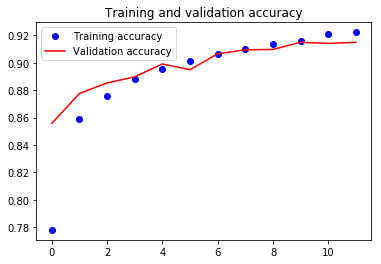

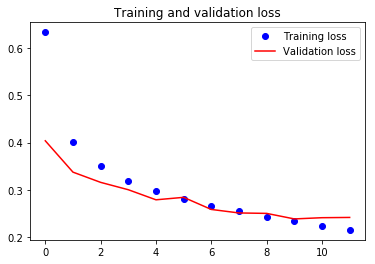

In [12]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
import numpy as np

#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
correct = np.nonzero(predicted_classes == y_test)[0]
incorrect = np.nonzero(predicted_classes != y_test)[0]


In [14]:
from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(num_classes)]

In [15]:
print(classification_report(y_test, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.82      0.92      0.87      1000
    Class 1       0.99      0.98      0.99      1000
    Class 2       0.85      0.89      0.87      1000
    Class 3       0.91      0.94      0.93      1000
    Class 4       0.86      0.89      0.87      1000
    Class 5       0.99      0.97      0.98      1000
    Class 6       0.84      0.64      0.73      1000
    Class 7       0.96      0.96      0.96      1000
    Class 8       0.97      0.98      0.98      1000
    Class 9       0.96      0.97      0.97      1000

avg / total       0.92      0.91      0.91     10000



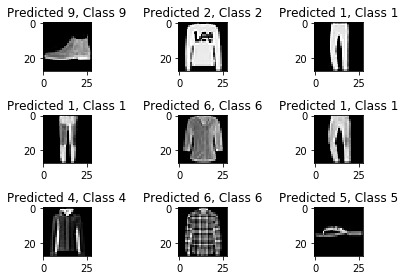

In [16]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()


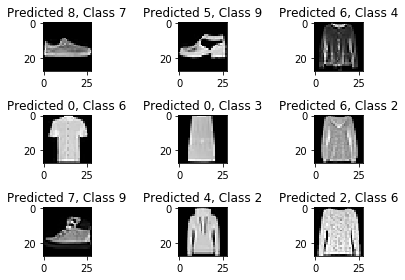

In [17]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()


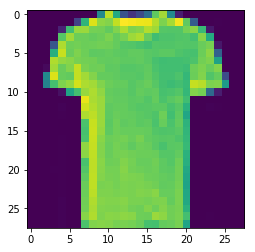

In [18]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28, 28), cmap='viridis', interpolation='none')
plt.show()


/home/maksym/virtualenvs/ml_dl_ds/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  after removing the cwd from sys.path.


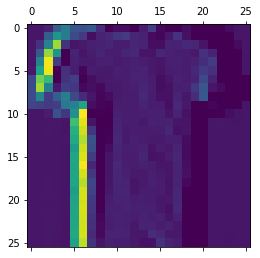

In [19]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1, 28, 28, 1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


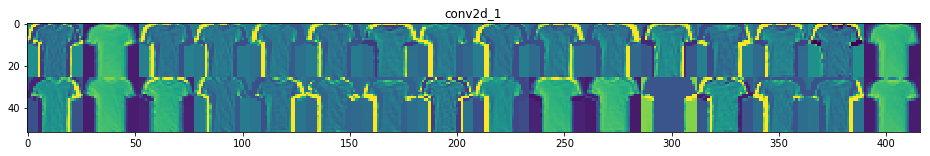

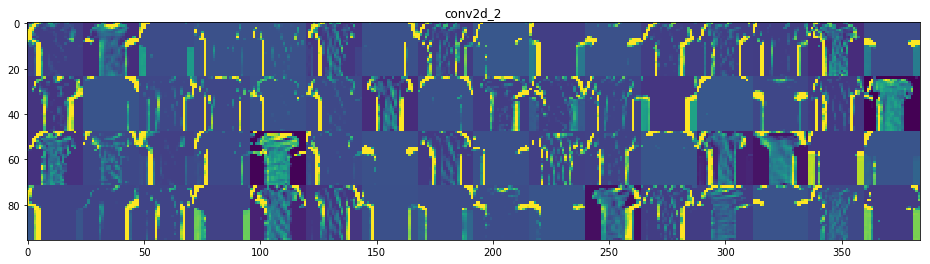

In [20]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size: (col + 1) * size,
                row * size: (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
